In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
--2019-03-14 17:12:55--  https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
Resolving launchpad.net (launchpad.net)... 91.189.89.222, 91.189.89.223, 2001:67c:1560:8003::8003, ...
Connecting to launchpad.net (launchpad.net)|91.189.89.222|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2019-03-14 17:12:56 ERROR 404: Not Found.

dpkg: error: cannot access archive 'google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb': No such file or directory
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


KeyboardInterrupt: ignored

In [0]:
!kill -9 -1 #sıfırlama

In [0]:
#Title

!pip install keras
!pip install tensorboardcolab
!pip install tensorflow
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import optimizers
import os
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D

import matplotlib.pyplot as plt
from tensorboardcolab import *


  Running setup.py bdist_wheel for tensorboardcolab ... - done
  Stored in directory: /root/.cache/pip/wheels/ab/74/02/cda602d1dc28b2f12eab313c49b9bfa14d6371326bc2590e06
Successfully built tensorboardcolab


Using TensorFlow backend.


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 10 14:12:56 2018

@author: ozal
"""

# -*- coding: utf-8 -*-
"""
Created on Fri Jun 29 11:43:44 2018

@author: ozal
"""

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import keras
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,LocallyConnected1D
from keras.layers import LSTM, Dropout, Embedding, Bidirectional, Merge, Flatten
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from sklearn.cross_validation import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import StratifiedKFold

# convert an array of values into a dataset matrix

# fix random seed for reproducibility
import scipy.io as sio
# load the dataset

    
Tra=sio.loadmat('SEDFX(EOG)5.mat');
X1=Tra['data1'];
X2=Tra['data2'];
X=numpy.concatenate([X1,X2]);
Y=Tra['label'];
nb_class=5;
#X1=X1.reshape(-1,1);
Y=numpy.array(Y);
Y=Y.reshape(-1,);
encoder = LabelEncoder()
encoder.fit(Y);
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = np_utils.to_categorical(encoded_Y,num_classes=nb_class)

    


#scaler = MinMaxScaler(feature_range=(0, 1))
#scalers={}
#for i in range(X.shape[2]):
#    scalers[i] = scaler
#    X[:, :, i] = scalers[i].fit_transform(X[:, :, i])
#
#scalers={}
#for i in range(X.shape[2]):
#    scalers[i] = StandardScaler().fit(X[:,:,i])
#    X[:, :, i] = scalers[i].transform(X[:, :, i])
    






scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X = numpy.reshape(X, (127512,3000,1))

seed = 3
numpy.random.seed(seed)

x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.3, random_state=seed)

x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, random_state=seed)

#x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

foldername="model"
filename="/epoch-{epoch:02d}-val-acc-{val_acc:.4f}.hdf5"

checkpoints = []


#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

checkpoints.append(ModelCheckpoint(foldername+filename, 
                                   monitor='val_acc', 
                                   verbose=1, 
                                   save_best_only=True, 
                                   save_weights_only=True, 
                                   mode='max', 
                                   period=1))



from keras import regularizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.6, nesterov=True)
adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-4, amsgrad=False)

#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
#cvscores = []
#for train, test in kfold.split(X, Y):

model = Sequential()


model.add(Conv1D(64,5, strides=3, input_shape = (3000, 1), activation = 'relu'))
model.add(Conv1D(128,3, strides=1,activation = 'relu'))
model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Dropout(0.2))
model.add(Conv1D(128,13, strides=1,activation = 'relu'))
model.add(Conv1D(256,7, strides=1,activation = 'relu'))
model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Conv1D(128,8, strides=1,activation = 'relu'))
model.add(Conv1D(64,4, strides=1,activation = 'relu'))
model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Conv1D(32,3, strides=1,activation = 'relu'))
model.add(Conv1D(64,6, strides=1,activation = 'relu'))
model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Conv1D(8,5, strides=1,activation = 'relu'))
model.add(Conv1D(8,2, strides=1,activation = 'relu'))
model.add(MaxPooling1D(pool_size=2,strides=2))


#model.add(Conv1D(128,3, strides=1,activation = 'relu'))
#model.add(MaxPooling1D(pool_size=2,strides=2))
#model.add(Conv1D(128,3, strides=1,activation = 'relu'))
#model.add(Conv1D(256,3, strides=1,activation = 'relu'))
#model.add(Conv1D(64,3, strides=1,activation = 'relu'))
#model.add(MaxPooling1D(pool_size=2,strides=2))
#model.add(Conv1D(32,3, strides=1,activation = 'relu'))
#model.add(Conv1D(32,3, strides=1,activation = 'relu'))
#model.add(MaxPooling1D(pool_size=2,strides=2))
#model.add(Conv1D(16,3, strides=1,activation = 'relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_class, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
        
#        model.fit(X[train], Y[train],validation_data=(X[test], Y[test]), epochs=50, batch_size=64, verbose=1)
#        scores,acc = model.evaluate(X[test], Y[test], verbose=1)
#        #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#        #scores.append(scores[1] * 100)
#        #cvscores.append(scores[1] * 100)
#
#print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))        
        

history=model.fit(x_train, y_train,
                  batch_size=64,
                  epochs=100,
                  validation_data=(x_val, y_val),shuffle=False) #callbacks=checkpoints
score, acc = model.evaluate(x_val, y_val,
                                   batch_size=64)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.hold
plt.plot(history.history['val_acc'])



model.save_weights("model/SFX6.hdf5")
from sklearn.metrics import classification_report,confusion_matrix
#model.load_weights("model/Best.hdf5")

y_pred = model.predict(x_test)
y_pred = numpy.argmax(y_pred, axis=1)
print(y_pred)
testPredict = model.predict(x_test)

p=model.predict_proba(x_test) # to predict probability

target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 1', 'class 2', 'class 3', 'class 4', 'class 1', 'class 2', 'class 3', 'class 4', 'class 1', 'class 2', 'class 3', 'class 4']
print(classification_report(numpy.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(numpy.argmax(y_test,axis=1), y_pred))

In [0]:
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://d893754a.ngrok.io


In [0]:
!ls 'drive'

ls: cannot access 'drive': No such file or directory


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir('drive')
!ls 'drive'

'Adsız klasör'	 drive


In [0]:
!ls 'drive'

In [0]:
tbc=TensorBoardColab(6006,"result/intersection/OUR6-60/TensorBoardLogs")

Wait for 8 seconds...
TensorBoard link:
http://d893754a.ngrok.io


In [0]:
tensorboard = TensorBoard(log_dir=LOG_DIR, histogram_freq=0, write_graph=True, write_images=True)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, callbacks=[tensorboard], verbose=VERBOSE)

print('Testing...')
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)

print("Test score:", score[0])
print('Test accuracy:', score[1])

model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive

import os
os.chdir("drive")
root='datasets/'

typ='intersection/'

#@title
#@title

#import tensorflow as tf
#tf.nn.sigmoid_cross_entropy_with_logits?


 70_15_15					   intersection.ipynb
 belgeler					   Intersections_16_11.docx
'Colab Notebooks'				   log1
 datasets					   __pycache__
 depo						   result
 drive						   road.ipynb
 google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb


In [0]:
!ls

drive


In [0]:
os.chdir("drive")

In [0]:
#@title
foldername='result/intersection/OUR6-36'
log_dir2=foldername+'/TensorBoardLogs'
LOG_DIR = log_dir2

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

import os
if not os.path.exists(LOG_DIR):
  os.makedirs(LOG_DIR)
  
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR))

get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [0]:
####  80-20 ### RGB ### 192-72  ##################
typ='all2/dataset_2/'
X_train=np.load(root+typ+'x_train.npy')
X_test=np.load(root+typ+'x_test.npy')
X_val=np.load(root+typ+'x_val.npy')

Y_train=np.load(root+typ+'y_train.npy')
Y_test=np.load(root+typ+'y_test.npy')
Y_val=np.load(root+typ+'y_val.npy')

In [0]:
print('Train= ', X_train.shape, '\n Test= ',X_test.shape ,'\n Val',X_val.shape)

Train=  (516, 64, 128, 3) 
 Test=  (107, 64, 128, 3) 
 Val (113, 64, 128, 3)


In [0]:
size(Y_val)

NameError: ignored

In [0]:
ImageDataGenerator(featurewise_center=False, 
                   samplewise_center=False, 
                   featurewise_std_normalization=False, 
                   samplewise_std_normalization=False, 
                   zca_whitening=False, 
                   zca_epsilon=1e-06, 
                   rotation_range=15, 
                   width_shift_range=0.2, 
                   height_shift_range=0.2, 
                   brightness_range=None, 
                   shear_range=0.2, 
                   zoom_range=0.1, 
                   channel_shift_range=0.2, 
                   fill_mode='nearest', 
                   cval=0.1, 
                   horizontal_flip=False, 
                   vertical_flip=False, 
                   rescale=None, 
                   preprocessing_function=None, 
                   data_format=None, 
                   validation_split=0.0)

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
datagen.fit(X_train)

In [0]:
X_train.shape[1]

64

In [0]:
img_h = X_train.shape[1]
img_w = X_train.shape[2]

for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_h, img_w, 3))
    # show the plot
    plt.show()
    break

In [0]:

# Plot images
from keras.datasets import mnist
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

Dataset shape: (516, 64, 128, 3)
516 sample, 64 x 128 x 3  size color image.

Examples:


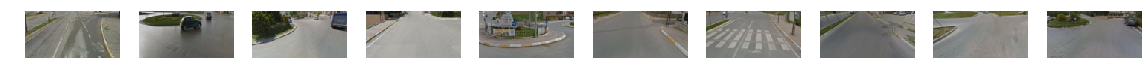

In [0]:
img_h = X_train.shape[1]
img_w = X_train.shape[2]
channel_size = X_train.shape[3] # 1: Grayscale, 3: RGB

print('Dataset shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2], 'x', channel_size, ' size color image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    # Display data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[np.random.randint(0, X_train.shape[0], 1)].reshape(img_h, img_w,channel_size))
    plt.imshow(X_test[np.random.randint(0, X_test.shape[0], 1)].reshape(img_h, img_w,channel_size))

    plt.axis('off')

In [0]:
Y_test.shape

(45, 3)

In [0]:
#@title
img_h = X_train.shape[1]
img_w = X_train.shape[2]
channel_size = X_train.shape[3] # 1: Grayscale, 3: RGB

print('Dataset shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2], 'x', channel_size, ' size color image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(10, 2))
for i in range(1, n+1):
    # Display data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[np.random.randint(0, X_train.shape[0], 1)].reshape(img_h, img_w))
    plt.axis('off')
plt.show()

In [0]:
#@title
img_h = X_test.shape[1]
img_w = X_test.shape[2]
channel_size = X_test.shape[3] # 1: Grayscale, 3: RGB

print('Dataset shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2], 'x', channel_size, ' size color image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    # Display data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_test[np.random.randint(0, X_test.shape[0], 1)].reshape(img_h, img_w,channel_size))
    plt.axis('off')

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive

import os
os.chdir("drive")

In [0]:
from Model_class4_128_64_1_stride2 import our_1_drp
model = our_1_drp()

In [0]:
#@title Default title text 75.62 k33 , (192, 72, 3) 8-20 F:5 S:5
    model = Sequential()

    model.add(Conv2D(32, (5, 5), input_shape=(img_h, img_w, channel_size), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(32, (5, 5), strides=(5,5), padding='SAME'))
    model.add(Activation('relu'))


    model.add(Conv2D(32, (5, 5), padding='SAME'))
    model.add(Activation('relu'))


    model.add(Conv2D(64, (5, 5), padding='SAME'))
    model.add(Activation('relu'))

    model.add(Conv2D(64, (5, 5), strides=(5,5), padding='SAME'))
    model.add(Activation('relu'))


    model.add(Conv2D(64, (5, 5), padding='SAME'))
    model.add(Activation('relu'))

    model.add(Conv2D(128, (5, 5), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(2048))
    model.add(Dense(2048))
    model.add(Dense(2))

    model.add(Activation('softmax'))

In [0]:
#@title Default title text k30 75.82, (192, 72, 3) 8,-20 F:3 S:7
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(32, (3, 3), strides=(7,7), padding='SAME'))
    model.add(Activation('relu'))


    model.add(Conv2D(32, (3, 3), padding='SAME'))
    model.add(Activation('relu'))


    model.add(Conv2D(64, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(64, (3, 3), padding='SAME'))
    model.add(Activation('relu'))


    model.add(Conv2D(64, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(128, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(2048))
    model.add(Dense(2048))
    model.add(Dense(4))

    model.add(Activation('softmax'))

In [0]:
#@title Default title text 85.71 OUR 1 model k28 80-20 input_shape=(192, 72, 3)

name='OUR-1-'
from keras import optimizers
model=""
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(32, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(32, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(64, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(64, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(64, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(128, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Flatten())

# Fully connected layer

model.add(Dense(2048))
model.add(Dense(2048))
model.add(Dense(4))

model.add(Activation('softmax'))




In [0]:
#@title Default title text our F:5, 82.42, our, input_shape=(192, 72, 3) 80-20 C-4

    model = Sequential()

    model.add(Conv2D(32, (5, 5), input_shape=(img_h, img_w, channel_size), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(32, (5, 5), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(32, (5, 5), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(64, (5, 5), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(64, (5, 5), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(64, (5, 5), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(128, (5, 5), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(2048))
    model.add(Dense(2048))
    model.add(Dense(4))

    model.add(Activation('softmax'))


In [0]:
#@title Default title text 84,61 ourbb OUR 2 input_shape=(192, 72, 3), 80-20 C-4
name='OUR-2-'
model=""
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(64, (5, 5), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(Conv2D(128, (5, 5), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Flatten())

# Fully connected layer
model.add(Dense(2048))
BatchNormalization()
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(4))

model.add(Activation('softmax'))


In [0]:
name='OUR-3-'
model=""
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(32, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='SAME'))

model.add(Conv2D(64, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), padding='SAME'))

model.add(Conv2D(64, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(128, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Flatten())

# Fully connected layer

model.add(Dense(4048))
model.add(Dense(2048))
model.add(Dense(4))

model.add(Activation('softmax'))

In [0]:
#@title Default title text LENET 82,42

name='LENET-'
model=""
model = Sequential()

model.add(Conv2D(6, (5, 5), input_shape=(img_h, img_w, channel_size), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(16, (5, 5), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(120, (5, 5), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(Flatten())

# Fully connected layer
model.add(Dense(84))
BatchNormalization()
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(4))

model.add(Activation('softmax'))

In [0]:
#@title Default title text VGG5 modeli 85.71 32 batch, 16 batch 83.52

name='VGG5-'
model=""
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(Conv2D(16, (3, 3), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(48, (3, 3), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Flatten())

# Fully connected layer
model.add(Dense(128))
BatchNormalization()
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(4))

model.add(Activation('softmax'))


In [0]:
#@title Default title text VGG5 modeli 85.71 32 batch, 16 batch 83.52

name='VGG16-'
model=""

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_h,img_w, channel_size)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [0]:
#Alex Net
name="Alex"
model=""
model = Sequential()
model.add(Conv2D(96, (11, 11), activation='relu', input_shape=(img_h,img_w, channel_size),strides=4))
model.add(MaxPooling2D((3, 3),strides=2))

model.add(Conv2D(256, (5, 5), activation='relu',strides=1,padding="same"))
model.add(MaxPooling2D((3, 3),strides=2))

model.add(Conv2D(384, (3, 3), activation='relu',strides=1,padding="same"))
model.add(Conv2D(384, (3, 3), activation='relu',strides=1,padding="same"))
model.add(Conv2D(256, (3, 3), activation='relu',strides=1,padding="same"))
model.add(MaxPooling2D((3, 3),strides=2))

model.add(Dense(4096, activation='relu'))

model.add(Dense(4096, activation='relu'))


model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

In [0]:
#Alex net
name="Alex_drop"
model=""

model = Sequential()
model.add(Conv2D(96, (11, 11), activation='relu', input_shape=(img_h,img_w, 3),strides=4))
model.add(MaxPooling2D((3, 3),strides=2))
model.add(BatchNormalization())
model.add(Conv2D(256, (5, 5), activation='relu',strides=1,padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(384, (3, 3), activation='relu',strides=1,padding="same"))
model.add(Conv2D(384, (3, 3), activation='relu',strides=1,padding="same"))
model.add(Conv2D(256, (3, 3), activation='relu',strides=1,padding="same"))
model.add(MaxPooling2D((3, 3),strides=2))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0,5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0,5))

model.add(Flatten())
model.add(Dense(4, activation='softmax'))

In [0]:
#@title Default title text 85.71 our model k28 80-20 input_shape=(192, 72, 3)
#@title Default title text 85.71 our model k28 70-0 input_shape=(192, 72, 3)
#@title Default title text 85.71 our model o4-3 77.78
name='OUR4-'
model=""
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(32, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(32, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(64, (3, 3), padding='SAME'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Flatten())

# Fully connected layer
model.add(Dense(2048))
model.add(Dense(2048))
model.add(Dense(4))

model.add(Activation('softmax'))

In [0]:
name='OUR5-' #stride left-right
model=""
model = Sequential()

model.add(Conv2D(6, (7, 7), input_shape=(img_h, img_w, channel_size), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(16, (5, 5), strides=(2,2), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

model.add(Conv2D(120, (3, 3), padding='SAME'))
BatchNormalization(axis=-1)
model.add(Activation('relu'))

model.add(Flatten())

# Fully connected layer
model.add(Dense(84))
BatchNormalization()
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(4))

model.add(Activation('softmax'))

In [0]:
name='OUR6-'
model=""
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), strides=(2,2)))
model.add(Conv2D(32, (3, 3), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.25))

# Fully connected layer
model.add(Dense(84))
BatchNormalization()
model.add(Activation('relu'))
model.add(Dense(4))

model.add(Activation('softmax'))

In [0]:
name='OUR6-' #intersection 94.915
model=""
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), strides=(2,2)))
model.add(Conv2D(32, (3, 3), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))

model.add(Conv2D(32, (3, 3), strides=(2,2)))##
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.25))

# Fully connected layer
model.add(Dense(84))
BatchNormalization()
model.add(Activation('relu'))
model.add(Dense(4))

model.add(Activation('softmax'))

In [0]:
#our 6-60 93.20 model

name='OUR6-' #intersection 94.915
model=""
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), strides=(2,2)))
model.add(Conv2D(32, (3, 3), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))

model.add(Conv2D(32, (3, 3), strides=(2,2)))##
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.25))

# Fully connected layer
model.add(Dense(84))
BatchNormalization()
model.add(Activation('relu'))
model.add(Dense(4))

model.add(Activation('softmax'))

In [0]:
name='OUR6-'#for crosswalk

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), strides=(2,2)))
model.add(Dropout(0.10))

model.add(Conv2D(64, (3, 3)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.10))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.25))

# Fully connected layer
model.add(Dense(84))
BatchNormalization()
model.add(Activation('relu'))
model.add(Dense(4))

model.add(Activation('softmax'))

In [0]:

model = Sequential()


model.add(Conv2D(64,5, strides=(2,2), input_shape=(img_h, img_w, channel_size), activation = 'relu'))
model.add(Conv2D(128,3, strides=(1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(128,13, strides=(1,1),activation = 'relu'))
model.add(Conv2D(256,7, strides=(1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(128,8, strides=(1,1),activation = 'relu'))
model.add(Conv2D(64,4, strides=(1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(32,3, strides=(1,1),activation = 'relu'))
model.add(Conv2D(64,6, strides=(1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(8,5, strides=(1,1),activation = 'relu'))
model.add(Conv2D(8,2, strides=(1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [0]:
#x_val[0:29].shape
print(typ)

crosswalk/cn/


In [0]:
x_train[201:308].shape

(107, 64, 128, 3)

In [0]:
#Load Data
import numpy
data='datasets/'+typ
result='result/all2/dataset_2/OUR6-8/'
model.load_weights(result+"epoch-65-val-acc-0.7699.hdf5")

x_train=np.load(data+'x_train.npy')
y_train=np.load(data+'y_train.npy')

x_test=np.load(data+'x_test.npy')
y_test=np.load(data+'y_test.npy')

x_val=np.load(data+'x_val.npy')
y_val=np.load(data+'y_val.npy')

print('Data:\n Train data num: ', x_train.shape, ' sample \n', 'Test data num: ', x_test.shape, 
      ' sample \n', 'Validation data num: ', x_val.shape, ' sample\n')
print('========================================================\n', result, 'Results: \n')


from sklearn.metrics import classification_report, confusion_matrix

#x_train[201:307]
#y_train[201:307]

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

testPredict = model.predict(x_test)

p=model.predict_proba(x_test) # to predict probability

print('Confusion matrix result:\n', confusion_matrix(np.argmax(y_test,axis=1), y_pred),'\n')

score = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print('\n', 'Test accuracy:', score[1])

target_names = ['Intersection', 'Left Seprt.', 'Right Seprt.', 'Crosswalk']
print(classification_report(numpy.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(numpy.argmax(y_test,axis=1), y_pred))

Data:
 Train data num:  (516, 64, 128, 3)  sample 
 Test data num:  (107, 64, 128, 3)  sample 
 Validation data num:  (113, 64, 128, 3)  sample

 result/all2/dataset_2/OUR6-8/ Results: 

Confusion matrix result:
 [[23  2  3  0]
 [ 3  9  4  0]
 [ 3  4 25  2]
 [ 0  0  2 27]] 

107/107 [==============================] - 0s 1ms/step

 Test accuracy: 0.7850467312001737
              precision    recall  f1-score   support

Intersection       0.79      0.82      0.81        28
 Left Seprt.       0.60      0.56      0.58        16
Right Seprt.       0.74      0.74      0.74        34
   Crosswalk       0.93      0.93      0.93        29

 avg / total       0.78      0.79      0.78       107

[[23  2  3  0]
 [ 3  9  4  0]
 [ 3  4 25  2]
 [ 0  0  2 27]]


In [0]:
all-data2 


Data:
 Train data num:  (516, 64, 128, 3)  sample 
 Test data num:  (107, 64, 128, 3)  sample 
 Validation data num:  (113, 64, 128, 3)  sample

========================================================
 result/all2/dataset_2/OUR6-8/ Results: 

Confusion matrix result:
 [[23  2  3  0]
 [ 3  9  4  0]
 [ 3  4 25  2]
 [ 0  0  2 27]] 

107/107 [==============================] - 0s 1ms/step

 Test accuracy: 0.7850467312001737
              precision    recall  f1-score   support

Intersection       0.79      0.82      0.81        28
 Left Seprt.       0.60      0.56      0.58        16
Right Seprt.       0.74      0.74      0.74        34
   Crosswalk       0.93      0.93      0.93        29

 avg / total       0.78      0.79      0.78       107

[[23  2  3  0]
 [ 3  9  4  0]
 [ 3  4 25  2]
 [ 0  0  2 27]]



In [0]:
all2-dataset2

Data:
 Train data num:  (516, 64, 128, 3)  sample 
 Test data num:  (107, 64, 128, 3)  sample 
 Validation data num:  (113, 64, 128, 3)  sample

========================================================
 result/all2/dataset_2/OUR6-8/ Results: 

Confusion matrix result:
 [[25  1  1  1]
 [ 2 12  2  0]
 [ 4  3 25  2]
 [ 1  0  1 27]] 

107/107 [==============================] - 0s 422us/step

 Test accuracy: 0.831775699820474
              precision    recall  f1-score   support

Intersection       0.78      0.89      0.83        28
 Left Seprt.       0.75      0.75      0.75        16
Right Seprt.       0.86      0.74      0.79        34
   Crosswalk       0.90      0.93      0.92        29

 avg / total       0.83      0.83      0.83       107

[[25  1  1  1]
 [ 2 12  2  0]
 [ 4  3 25  2]
 [ 1  0  1 27]]



In [0]:


Data:
 Train data num:  (588, 64, 128, 3)  sample 
 Test data num:  (72, 64, 128, 3)  sample 
 Validation data num:  (76, 64, 128, 3)  sample

========================================================
 result/all2/dataset_1/OUR6-3/ Results: 

Confusion matrix result:
 [[17  1  1  0]
 [ 2  6  3  0]
 [ 1  2 19  1]
 [ 1  0  1 17]] 

72/72 [==============================] - 0s 447us/step

 Test accuracy: 0.8194444444444444
              precision    recall  f1-score   support

Intersection       0.81      0.89      0.85        19
 Left Seprt.       0.67      0.55      0.60        11
Right Seprt.       0.79      0.83      0.81        23
   Crosswalk       0.94      0.89      0.92        19

 avg / total       0.82      0.82      0.82        72

[[17  1  1  0]
 [ 2  6  3  0]
 [ 1  2 19  1]
 [ 1  0  1 17]]



In [0]:
Data:
 Train data num:  (588, 64, 128, 3)  sample 
 Test data num:  (72, 64, 128, 3)  sample 
 Validation data num:  (76, 64, 128, 3)  sample

========================================================
 result/all2/dataset_1/OUR6-3/ Results: 

Confusion matrix result:
 [[15  1  1  2]
 [ 1  7  2  1]
 [ 1  3 19  0]
 [ 1  0  1 17]] 

72/72 [==============================] - 0s 457us/step

 Test accuracy: 0.8055555555555556
              precision    recall  f1-score   support

Intersection       0.83      0.79      0.81        19
 Left Seprt.       0.64      0.64      0.64        11
Right Seprt.       0.83      0.83      0.83        23
   Crosswalk       0.85      0.89      0.87        19

 avg / total       0.81      0.81      0.81        72

[[15  1  1  2]
 [ 1  7  2  1]
 [ 1  3 19  0]
 [ 1  0  1 17]]

In [0]:
Data: INTERSECTIN RESULT
  
 Train data num:  (235, 64, 128, 3)  sample 
 Test data num:  (29, 64, 128, 3)  sample 
 Validation data num:  (30, 64, 128, 3)  sample

========================================================
 result/intersection/OUR6-141/ Results: 

Confusion matrix result:
 [[ 9  1]
 [ 0 19]] 

29/29 [==============================] - 0s 378us/step

 Test accuracy: 0.9655172228813171
             precision    recall  f1-score   support

    class 0       1.00      0.90      0.95        10
    class 1       0.95      1.00      0.97        19

avg / total       0.97      0.97      0.97        29

[[ 9  1]
 [ 0 19]]



100%

Data:
 Train data num:  (234, 64, 128, 3)  sample 
 Test data num:  (29, 64, 128, 3)  sample 
 Validation data num:  (30, 64, 128, 3)  sample

========================================================
 result/intersection/int/OUR6-391/ Results: 

Confusion matrix result:
 [[19  0]
 [ 0 10]] 

29/29 [==============================] - 0s 375us/step

 Test accuracy: 1.0
             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00        19
    class 1       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        29

[[19  0]
 [ 0 10]]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 3
  .format(len(labels), len(target_names))



In [0]:
Y_test

In [0]:
#@title Default title text 85.71 our model k28 80-20 input_shape=(192, 72, 3)
#@title Default title text 85.71 our model k28 70-0 input_shape=(192, 72, 3)
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(96, 36, 3), padding='SAME'))
    model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))
    
    model.add(Conv2D(32, (3, 3), strides=(5,5), padding='SAME', ))
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(64, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(128, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(2048))
    model.add(Dense(2048))
    model.add(Dense(4))

    model.add(Activation('softmax'))

In [0]:
#@title Default title text 85.71 our model k28 80-20 input_shape=(192, 72, 3)
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(32, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(32, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(64, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(64, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(64, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(128, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(2048))
    model.add(Dense(2048))
    model.add(Dense(4))

    model.add(Activation('softmax'))

In [0]:
#@title Default title text 85.71 our model k28 80-20 input_shape=(192, 72, 3)
#@title Default title text 85.71 our model k28 70-30 input_shape=(192, 72, 3)
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(32, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(32, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(64, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(64, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Conv2D(64, (3, 3), padding='SAME'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(2048))
    model.add(Dense(2048))
    model.add(Dense(4))

    model.add(Activation('softmax'))


In [0]:
model.summary()

In [0]:
y_test

In [0]:
k=20

In [0]:
#from keras.callbacks import EarlyStopping
#earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
#                          verbose=1, mode='auto')
#callbacks_list = [earlystop]
#start = time.start()
#end = time.end

root='datasets/'
root2='result/'
k=k+1

from keras import regularizers
sgd = optimizers.SGD(lr=0.00001, decay=1e-5, momentum=0.5, nesterov=True)
adam=optimizers.Adam(lr=0.0001, epsilon=None, decay=1e-5, amsgrad=False)# beta_1=0.9, beta_2=0.999,

#adam=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)

#sgd = optimizers.SGD(lr=0.00001, decay=1e-3, momentum=0.5, nesterov=True)

#model.compile(loss='mean_squared_error', optimizer=sgd)

model.compile(loss='categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy'])
datagen = ImageDataGenerator(width_shift_range=0,vertical_flip=False)

train_generator = datagen.flow(X_train, Y_train, batch_size=32)
foldername=root2+typ+name+str(k)
filename="/epoch-{epoch:02d}-val-acc-{val_acc:.4f}.hdf5"

checkpoints = []

if not os.path.exists(foldername):
    os.makedirs(foldername)

checkpoints.append(ModelCheckpoint(foldername+filename, 
                                   monitor='val_acc', 
                                   verbose=1, 
                                   save_best_only=True, 
                                   save_weights_only=True, 
                                   mode='auto',
                                   period=1))

log_dir2=foldername+'/TensorBoardLogs'

checkpoints.append(TensorBoard(log_dir2, 
                               histogram_freq=0, 
                               write_graph=True, 
                               write_images=False, 
                               embeddings_freq=0, 
                               embeddings_layer_names=None, 
                               embeddings_metadata=None))


In [0]:
#@title Default title text
# TRAINING THE MODEL
model.fit_generator(train_generator, 
                    steps_per_epoch=32, 
                    epochs=100, 
                    validation_data=(X_val, Y_val),
                    validation_steps=32,
                    callbacks=checkpoints)#callbacks_list yerine checkpoints

Epoch 1/100
32/32 [==============================] - 4s 118ms/step - loss: 1.3711 - acc: 0.3024 - val_loss: 1.3570 - val_acc: 0.3041

Epoch 00001: val_acc improved from -inf to 0.30405, saving model to result/all2/dataset_3/LENET-21/epoch-01-val-acc-0.3041.hdf5
Epoch 2/100
32/32 [==============================] - 1s 27ms/step - loss: 1.3400 - acc: 0.3439 - val_loss: 1.3286 - val_acc: 0.3041

Epoch 00002: val_acc did not improve from 0.30405
Epoch 3/100
32/32 [==============================] - 1s 27ms/step - loss: 1.2972 - acc: 0.4105 - val_loss: 1.2632 - val_acc: 0.3581

Epoch 00003: val_acc improved from 0.30405 to 0.35811, saving model to result/all2/dataset_3/LENET-21/epoch-03-val-acc-0.3581.hdf5
Epoch 4/100
32/32 [==============================] - 1s 27ms/step - loss: 1.2206 - acc: 0.4763 - val_loss: 1.1102 - val_acc: 0.6149

Epoch 00004: val_acc improved from 0.35811 to 0.61486, saving model to result/all2/dataset_3/LENET-21/epoch-04-val-acc-0.6149.hdf5
Epoch 5/100
32/32 [========

In [0]:
ALL dataset 2 77 our6-7



Epoch 1/100
32/32 [==============================] - 2s 47ms/step - loss: 1.3776 - acc: 0.2774 - val_loss: 1.3644 - val_acc: 0.3009

Epoch 00001: val_acc improved from -inf to 0.30088, saving model to result/all2/dataset_2/OUR6-7/epoch-01-val-acc-0.3009.hdf5
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 1.3609 - acc: 0.3366 - val_loss: 1.3614 - val_acc: 0.3009

Epoch 00002: val_acc did not improve from 0.30088
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 1.3519 - acc: 0.3083 - val_loss: 1.3589 - val_acc: 0.3009

Epoch 00003: val_acc did not improve from 0.30088
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3584 - acc: 0.3347 - val_loss: 1.3660 - val_acc: 0.3009

Epoch 00004: val_acc did not improve from 0.30088
Epoch 5/100
32/32 [==============================] - 1s 31ms/step - loss: 1.3526 - acc: 0.3312 - val_loss: 1.3550 - val_acc: 0.3009

Epoch 00005: val_acc did not improve from 0.30088
Epoch 6/100
32/32 [==============================] - 1s 29ms/step - loss: 1.3348 - acc: 0.3587 - val_loss: 1.3578 - val_acc: 0.3009

Epoch 00006: val_acc did not improve from 0.30088
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3451 - acc: 0.3329 - val_loss: 1.3442 - val_acc: 0.3097

Epoch 00007: val_acc improved from 0.30088 to 0.30973, saving model to result/all2/dataset_2/OUR6-7/epoch-07-val-acc-0.3097.hdf5
Epoch 8/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3461 - acc: 0.3505 - val_loss: 1.3597 - val_acc: 0.3009

Epoch 00008: val_acc did not improve from 0.30973
Epoch 9/100
32/32 [==============================] - 1s 31ms/step - loss: 1.3461 - acc: 0.3399 - val_loss: 1.3324 - val_acc: 0.3097

Epoch 00009: val_acc did not improve from 0.30973
Epoch 10/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3296 - acc: 0.3846 - val_loss: 1.3240 - val_acc: 0.3717

Epoch 00010: val_acc improved from 0.30973 to 0.37168, saving model to result/all2/dataset_2/OUR6-7/epoch-10-val-acc-0.3717.hdf5
Epoch 11/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3389 - acc: 0.3669 - val_loss: 1.2976 - val_acc: 0.4248

Epoch 00011: val_acc improved from 0.37168 to 0.42478, saving model to result/all2/dataset_2/OUR6-7/epoch-11-val-acc-0.4248.hdf5
Epoch 12/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3115 - acc: 0.3858 - val_loss: 1.2714 - val_acc: 0.4425

Epoch 00012: val_acc improved from 0.42478 to 0.44248, saving model to result/all2/dataset_2/OUR6-7/epoch-12-val-acc-0.4425.hdf5
Epoch 13/100
32/32 [==============================] - 1s 30ms/step - loss: 1.2794 - acc: 0.4310 - val_loss: 1.2589 - val_acc: 0.4071

Epoch 00013: val_acc did not improve from 0.44248
Epoch 14/100
32/32 [==============================] - 1s 29ms/step - loss: 1.2639 - acc: 0.4222 - val_loss: 1.2219 - val_acc: 0.4956

Epoch 00014: val_acc improved from 0.44248 to 0.49558, saving model to result/all2/dataset_2/OUR6-7/epoch-14-val-acc-0.4956.hdf5
Epoch 15/100
32/32 [==============================] - 1s 30ms/step - loss: 1.1970 - acc: 0.4873 - val_loss: 1.1804 - val_acc: 0.4425

Epoch 00015: val_acc did not improve from 0.49558
Epoch 16/100
32/32 [==============================] - 1s 29ms/step - loss: 1.1518 - acc: 0.5377 - val_loss: 1.1165 - val_acc: 0.5752

Epoch 00016: val_acc improved from 0.49558 to 0.57522, saving model to result/all2/dataset_2/OUR6-7/epoch-16-val-acc-0.5752.hdf5
Epoch 17/100
32/32 [==============================] - 1s 32ms/step - loss: 1.1440 - acc: 0.5276 - val_loss: 1.0640 - val_acc: 0.5487

Epoch 00017: val_acc did not improve from 0.57522
Epoch 18/100
32/32 [==============================] - 1s 30ms/step - loss: 1.0735 - acc: 0.5611 - val_loss: 1.1056 - val_acc: 0.5221

Epoch 00018: val_acc did not improve from 0.57522
Epoch 19/100
32/32 [==============================] - 1s 29ms/step - loss: 1.0975 - acc: 0.5259 - val_loss: 1.0405 - val_acc: 0.6018

Epoch 00019: val_acc improved from 0.57522 to 0.60177, saving model to result/all2/dataset_2/OUR6-7/epoch-19-val-acc-0.6018.hdf5
Epoch 20/100
32/32 [==============================] - 1s 29ms/step - loss: 1.0392 - acc: 0.6030 - val_loss: 0.9872 - val_acc: 0.5752

Epoch 00020: val_acc did not improve from 0.60177
Epoch 21/100
32/32 [==============================] - 1s 30ms/step - loss: 1.0247 - acc: 0.5699 - val_loss: 0.9608 - val_acc: 0.5841

Epoch 00021: val_acc did not improve from 0.60177
Epoch 22/100
32/32 [==============================] - 1s 30ms/step - loss: 1.0174 - acc: 0.5898 - val_loss: 1.0502 - val_acc: 0.5398

Epoch 00022: val_acc did not improve from 0.60177
Epoch 23/100
32/32 [==============================] - 1s 29ms/step - loss: 0.9432 - acc: 0.6211 - val_loss: 1.0276 - val_acc: 0.5398

Epoch 00023: val_acc did not improve from 0.60177
Epoch 24/100
32/32 [==============================] - 1s 29ms/step - loss: 0.9565 - acc: 0.6113 - val_loss: 0.9492 - val_acc: 0.5487

Epoch 00024: val_acc did not improve from 0.60177
Epoch 25/100
32/32 [==============================] - 1s 30ms/step - loss: 0.8909 - acc: 0.6522 - val_loss: 0.9707 - val_acc: 0.6106

Epoch 00025: val_acc improved from 0.60177 to 0.61062, saving model to result/all2/dataset_2/OUR6-7/epoch-25-val-acc-0.6106.hdf5
Epoch 26/100
32/32 [==============================] - 1s 30ms/step - loss: 0.8857 - acc: 0.6349 - val_loss: 0.9300 - val_acc: 0.5664

Epoch 00026: val_acc did not improve from 0.61062
Epoch 27/100
32/32 [==============================] - 1s 29ms/step - loss: 0.8970 - acc: 0.6608 - val_loss: 0.9389 - val_acc: 0.5752

Epoch 00027: val_acc did not improve from 0.61062
Epoch 28/100
32/32 [==============================] - 1s 30ms/step - loss: 0.8224 - acc: 0.6825 - val_loss: 0.8813 - val_acc: 0.5929

Epoch 00028: val_acc did not improve from 0.61062
Epoch 29/100
32/32 [==============================] - 1s 30ms/step - loss: 0.8411 - acc: 0.6455 - val_loss: 0.8639 - val_acc: 0.5841

Epoch 00029: val_acc did not improve from 0.61062
Epoch 30/100
32/32 [==============================] - 1s 29ms/step - loss: 0.8611 - acc: 0.6458 - val_loss: 0.9079 - val_acc: 0.5841

Epoch 00030: val_acc did not improve from 0.61062
Epoch 31/100
32/32 [==============================] - 1s 29ms/step - loss: 0.8291 - acc: 0.6634 - val_loss: 0.8768 - val_acc: 0.5664

Epoch 00031: val_acc did not improve from 0.61062
Epoch 32/100
32/32 [==============================] - 1s 30ms/step - loss: 0.8306 - acc: 0.6528 - val_loss: 0.8429 - val_acc: 0.6195

Epoch 00032: val_acc improved from 0.61062 to 0.61947, saving model to result/all2/dataset_2/OUR6-7/epoch-32-val-acc-0.6195.hdf5
Epoch 33/100
32/32 [==============================] - 1s 33ms/step - loss: 0.8335 - acc: 0.6567 - val_loss: 0.8853 - val_acc: 0.6283

Epoch 00033: val_acc improved from 0.61947 to 0.62832, saving model to result/all2/dataset_2/OUR6-7/epoch-33-val-acc-0.6283.hdf5
Epoch 34/100
32/32 [==============================] - 1s 32ms/step - loss: 0.8240 - acc: 0.6644 - val_loss: 0.8397 - val_acc: 0.6195

Epoch 00034: val_acc did not improve from 0.62832
Epoch 35/100
32/32 [==============================] - 1s 30ms/step - loss: 0.7486 - acc: 0.7187 - val_loss: 0.8252 - val_acc: 0.6018

Epoch 00035: val_acc did not improve from 0.62832
Epoch 36/100
32/32 [==============================] - 1s 30ms/step - loss: 0.7311 - acc: 0.7067 - val_loss: 0.8168 - val_acc: 0.5929

Epoch 00036: val_acc did not improve from 0.62832
Epoch 37/100
32/32 [==============================] - 1s 31ms/step - loss: 0.6987 - acc: 0.7343 - val_loss: 0.8206 - val_acc: 0.6018

Epoch 00037: val_acc did not improve from 0.62832
Epoch 38/100
32/32 [==============================] - 1s 31ms/step - loss: 0.7115 - acc: 0.7231 - val_loss: 0.8022 - val_acc: 0.6106

Epoch 00038: val_acc did not improve from 0.62832
Epoch 39/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6777 - acc: 0.7152 - val_loss: 0.8613 - val_acc: 0.6283

Epoch 00039: val_acc improved from 0.62832 to 0.62832, saving model to result/all2/dataset_2/OUR6-7/epoch-39-val-acc-0.6283.hdf5
Epoch 40/100
32/32 [==============================] - 1s 31ms/step - loss: 0.7078 - acc: 0.7150 - val_loss: 0.7934 - val_acc: 0.6372

Epoch 00040: val_acc improved from 0.62832 to 0.63717, saving model to result/all2/dataset_2/OUR6-7/epoch-40-val-acc-0.6372.hdf5
Epoch 41/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6611 - acc: 0.7437 - val_loss: 0.7919 - val_acc: 0.6106

Epoch 00041: val_acc did not improve from 0.63717
Epoch 42/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6782 - acc: 0.7223 - val_loss: 0.7517 - val_acc: 0.6726

Epoch 00042: val_acc improved from 0.63717 to 0.67257, saving model to result/all2/dataset_2/OUR6-7/epoch-42-val-acc-0.6726.hdf5
Epoch 43/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6469 - acc: 0.7439 - val_loss: 0.7533 - val_acc: 0.6814

Epoch 00043: val_acc improved from 0.67257 to 0.68142, saving model to result/all2/dataset_2/OUR6-7/epoch-43-val-acc-0.6814.hdf5
Epoch 44/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6343 - acc: 0.7453 - val_loss: 0.7231 - val_acc: 0.6549

Epoch 00044: val_acc did not improve from 0.68142
Epoch 45/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6280 - acc: 0.7383 - val_loss: 0.7384 - val_acc: 0.6283

Epoch 00045: val_acc did not improve from 0.68142
Epoch 46/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6535 - acc: 0.7277 - val_loss: 0.7386 - val_acc: 0.6814

Epoch 00046: val_acc did not improve from 0.68142
Epoch 47/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6465 - acc: 0.7463 - val_loss: 0.7405 - val_acc: 0.6814

Epoch 00047: val_acc did not improve from 0.68142
Epoch 48/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6534 - acc: 0.7600 - val_loss: 0.7286 - val_acc: 0.6991

Epoch 00048: val_acc improved from 0.68142 to 0.69912, saving model to result/all2/dataset_2/OUR6-7/epoch-48-val-acc-0.6991.hdf5
Epoch 49/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6098 - acc: 0.7416 - val_loss: 0.7443 - val_acc: 0.6637

Epoch 00049: val_acc did not improve from 0.69912
Epoch 50/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5663 - acc: 0.7752 - val_loss: 0.7499 - val_acc: 0.6726

Epoch 00050: val_acc did not improve from 0.69912
Epoch 51/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5844 - acc: 0.7615 - val_loss: 0.7140 - val_acc: 0.6726

Epoch 00051: val_acc did not improve from 0.69912
Epoch 52/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5448 - acc: 0.7987 - val_loss: 0.6958 - val_acc: 0.7168

Epoch 00052: val_acc improved from 0.69912 to 0.71681, saving model to result/all2/dataset_2/OUR6-7/epoch-52-val-acc-0.7168.hdf5
Epoch 53/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5481 - acc: 0.7759 - val_loss: 0.6963 - val_acc: 0.6903

Epoch 00053: val_acc did not improve from 0.71681
Epoch 54/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6098 - acc: 0.7639 - val_loss: 0.7115 - val_acc: 0.7080

Epoch 00054: val_acc did not improve from 0.71681
Epoch 55/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5431 - acc: 0.8038 - val_loss: 0.6908 - val_acc: 0.6903

Epoch 00055: val_acc did not improve from 0.71681
Epoch 56/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5337 - acc: 0.7870 - val_loss: 0.6987 - val_acc: 0.7257

Epoch 00056: val_acc improved from 0.71681 to 0.72566, saving model to result/all2/dataset_2/OUR6-7/epoch-56-val-acc-0.7257.hdf5
Epoch 57/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4651 - acc: 0.8268 - val_loss: 0.6731 - val_acc: 0.7080

Epoch 00057: val_acc did not improve from 0.72566
Epoch 58/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5170 - acc: 0.7911 - val_loss: 0.6579 - val_acc: 0.7168

Epoch 00058: val_acc did not improve from 0.72566
Epoch 59/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4876 - acc: 0.8251 - val_loss: 0.6762 - val_acc: 0.7345

Epoch 00059: val_acc improved from 0.72566 to 0.73451, saving model to result/all2/dataset_2/OUR6-7/epoch-59-val-acc-0.7345.hdf5
Epoch 60/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5142 - acc: 0.8035 - val_loss: 0.6876 - val_acc: 0.7080

Epoch 00060: val_acc did not improve from 0.73451
Epoch 61/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4931 - acc: 0.8097 - val_loss: 0.6710 - val_acc: 0.7257

Epoch 00061: val_acc did not improve from 0.73451
Epoch 62/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5020 - acc: 0.8126 - val_loss: 0.6631 - val_acc: 0.7168

Epoch 00062: val_acc did not improve from 0.73451
Epoch 63/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4515 - acc: 0.8317 - val_loss: 0.6631 - val_acc: 0.7434

Epoch 00063: val_acc improved from 0.73451 to 0.74336, saving model to result/all2/dataset_2/OUR6-7/epoch-63-val-acc-0.7434.hdf5
Epoch 64/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4368 - acc: 0.8259 - val_loss: 0.6572 - val_acc: 0.7611

Epoch 00064: val_acc improved from 0.74336 to 0.76106, saving model to result/all2/dataset_2/OUR6-7/epoch-64-val-acc-0.7611.hdf5
Epoch 65/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4804 - acc: 0.8077 - val_loss: 0.6381 - val_acc: 0.7522

Epoch 00065: val_acc did not improve from 0.76106
Epoch 66/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4105 - acc: 0.8496 - val_loss: 0.6451 - val_acc: 0.7611

Epoch 00066: val_acc improved from 0.76106 to 0.76106, saving model to result/all2/dataset_2/OUR6-7/epoch-66-val-acc-0.7611.hdf5
Epoch 67/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4332 - acc: 0.8427 - val_loss: 0.6367 - val_acc: 0.7522

Epoch 00067: val_acc did not improve from 0.76106
Epoch 68/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4070 - acc: 0.8591 - val_loss: 0.6401 - val_acc: 0.7699

Epoch 00068: val_acc improved from 0.76106 to 0.76991, saving model to result/all2/dataset_2/OUR6-7/epoch-68-val-acc-0.7699.hdf5
Epoch 69/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4341 - acc: 0.8417 - val_loss: 0.6244 - val_acc: 0.7522

Epoch 00069: val_acc did not improve from 0.76991
Epoch 70/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4344 - acc: 0.8273 - val_loss: 0.6292 - val_acc: 0.7699

Epoch 00070: val_acc improved from 0.76991 to 0.76991, saving model to result/all2/dataset_2/OUR6-7/epoch-70-val-acc-0.7699.hdf5
Epoch 71/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3640 - acc: 0.8660 - val_loss: 0.6327 - val_acc: 0.7788

Epoch 00071: val_acc improved from 0.76991 to 0.77876, saving model to result/all2/dataset_2/OUR6-7/epoch-71-val-acc-0.7788.hdf5
Epoch 72/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3984 - acc: 0.8535 - val_loss: 0.6710 - val_acc: 0.7257

Epoch 00072: val_acc did not improve from 0.77876
Epoch 73/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4180 - acc: 0.8312 - val_loss: 0.6869 - val_acc: 0.7522

Epoch 00073: val_acc did not improve from 0.77876
Epoch 74/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3963 - acc: 0.8457 - val_loss: 0.6630 - val_acc: 0.7699

Epoch 00074: val_acc did not improve from 0.77876
Epoch 75/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3788 - acc: 0.8662 - val_loss: 0.6927 - val_acc: 0.7522

Epoch 00075: val_acc did not improve from 0.77876
Epoch 76/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3632 - acc: 0.8582 - val_loss: 0.6705 - val_acc: 0.7611

Epoch 00076: val_acc did not improve from 0.77876
Epoch 77/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3734 - acc: 0.8729 - val_loss: 0.6692 - val_acc: 0.7257

Epoch 00077: val_acc did not improve from 0.77876
Epoch 78/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3511 - acc: 0.8642 - val_loss: 0.6410 - val_acc: 0.7522

Epoch 00078: val_acc did not improve from 0.77876
Epoch 79/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3416 - acc: 0.8787 - val_loss: 0.6481 - val_acc: 0.7699

Epoch 00079: val_acc did not improve from 0.77876
Epoch 80/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3294 - acc: 0.8748 - val_loss: 0.6471 - val_acc: 0.7434

Epoch 00080: val_acc did not improve from 0.77876
Epoch 81/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3873 - acc: 0.8471 - val_loss: 0.6615 - val_acc: 0.7611

Epoch 00081: val_acc did not improve from 0.77876
Epoch 82/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3754 - acc: 0.8605 - val_loss: 0.7571 - val_acc: 0.7345

Epoch 00082: val_acc did not improve from 0.77876
Epoch 83/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3323 - acc: 0.8630 - val_loss: 0.6544 - val_acc: 0.7699

Epoch 00083: val_acc did not improve from 0.77876
Epoch 84/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4153 - acc: 0.8510 - val_loss: 0.7745 - val_acc: 0.7345

Epoch 00084: val_acc did not improve from 0.77876
Epoch 85/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3440 - acc: 0.8807 - val_loss: 0.7175 - val_acc: 0.7611

Epoch 00085: val_acc did not improve from 0.77876
Epoch 86/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3199 - acc: 0.8759 - val_loss: 0.6890 - val_acc: 0.7434

Epoch 00086: val_acc did not improve from 0.77876
Epoch 87/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2975 - acc: 0.8963 - val_loss: 0.6773 - val_acc: 0.7611

Epoch 00087: val_acc did not improve from 0.77876
Epoch 88/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3562 - acc: 0.8693 - val_loss: 0.6459 - val_acc: 0.7611

Epoch 00088: val_acc did not improve from 0.77876
Epoch 89/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3013 - acc: 0.8807 - val_loss: 0.6494 - val_acc: 0.7522

Epoch 00089: val_acc did not improve from 0.77876
Epoch 90/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3042 - acc: 0.8904 - val_loss: 0.6785 - val_acc: 0.7611

Epoch 00090: val_acc did not improve from 0.77876
Epoch 91/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3484 - acc: 0.8691 - val_loss: 0.6770 - val_acc: 0.7434

Epoch 00091: val_acc did not improve from 0.77876
Epoch 92/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3106 - acc: 0.8733 - val_loss: 0.6733 - val_acc: 0.7699

Epoch 00092: val_acc did not improve from 0.77876
Epoch 93/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2853 - acc: 0.8946 - val_loss: 0.6731 - val_acc: 0.7434

Epoch 00093: val_acc did not improve from 0.77876
Epoch 94/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2794 - acc: 0.8984 - val_loss: 0.6890 - val_acc: 0.7434

Epoch 00094: val_acc did not improve from 0.77876
Epoch 95/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2870 - acc: 0.8877 - val_loss: 0.6656 - val_acc: 0.7434

Epoch 00095: val_acc did not improve from 0.77876
Epoch 96/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2440 - acc: 0.9159 - val_loss: 0.7179 - val_acc: 0.7168

Epoch 00096: val_acc did not improve from 0.77876
Epoch 97/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2477 - acc: 0.9247 - val_loss: 0.7021 - val_acc: 0.7434

Epoch 00097: val_acc did not improve from 0.77876
Epoch 98/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3012 - acc: 0.9004 - val_loss: 0.7491 - val_acc: 0.7699

Epoch 00098: val_acc did not improve from 0.77876
Epoch 99/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2502 - acc: 0.9063 - val_loss: 0.7352 - val_acc: 0.7434

Epoch 00099: val_acc did not improve from 0.77876
Epoch 100/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2488 - acc: 0.9061 - val_loss: 0.7532 - val_acc: 0.7434

Epoch 00100: val_acc did not improve from 0.77876

<keras.callbacks.History at 0x7f2aa97f4e10>





In [0]:
All dataset 1 OUR 6-3 84.21 new



Epoch 1/100
32/32 [==============================] - 1s 46ms/step - loss: 1.3774 - acc: 0.2936 - val_loss: 1.3634 - val_acc: 0.3026

Epoch 00001: val_acc improved from -inf to 0.30263, saving model to result/all2/dataset_1/OUR6-3/epoch-01-val-acc-0.3026.hdf5
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 1.3715 - acc: 0.2781 - val_loss: 1.3612 - val_acc: 0.3026

Epoch 00002: val_acc did not improve from 0.30263
Epoch 3/100
32/32 [==============================] - 1s 29ms/step - loss: 1.3610 - acc: 0.2960 - val_loss: 1.3585 - val_acc: 0.3026

Epoch 00003: val_acc did not improve from 0.30263
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3567 - acc: 0.3204 - val_loss: 1.3605 - val_acc: 0.3026

Epoch 00004: val_acc did not improve from 0.30263
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3587 - acc: 0.3387 - val_loss: 1.3582 - val_acc: 0.3026

Epoch 00005: val_acc did not improve from 0.30263
Epoch 6/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3643 - acc: 0.3083 - val_loss: 1.3553 - val_acc: 0.3026

Epoch 00006: val_acc did not improve from 0.30263
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3562 - acc: 0.3295 - val_loss: 1.3534 - val_acc: 0.3026

Epoch 00007: val_acc did not improve from 0.30263
Epoch 8/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3561 - acc: 0.3265 - val_loss: 1.3515 - val_acc: 0.3026

Epoch 00008: val_acc did not improve from 0.30263
Epoch 9/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3393 - acc: 0.3457 - val_loss: 1.3322 - val_acc: 0.3026

Epoch 00009: val_acc did not improve from 0.30263
Epoch 10/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3512 - acc: 0.3311 - val_loss: 1.3437 - val_acc: 0.3026

Epoch 00010: val_acc did not improve from 0.30263
Epoch 11/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3161 - acc: 0.3801 - val_loss: 1.2809 - val_acc: 0.4079

Epoch 00011: val_acc improved from 0.30263 to 0.40789, saving model to result/all2/dataset_1/OUR6-3/epoch-11-val-acc-0.4079.hdf5
Epoch 12/100
32/32 [==============================] - 1s 30ms/step - loss: 1.2766 - acc: 0.4284 - val_loss: 1.2113 - val_acc: 0.4079

Epoch 00012: val_acc did not improve from 0.40789
Epoch 13/100
32/32 [==============================] - 1s 30ms/step - loss: 1.3115 - acc: 0.3661 - val_loss: 1.3518 - val_acc: 0.3026

Epoch 00013: val_acc did not improve from 0.40789
Epoch 14/100
32/32 [==============================] - 1s 30ms/step - loss: 1.2700 - acc: 0.4237 - val_loss: 1.2067 - val_acc: 0.4605

Epoch 00014: val_acc improved from 0.40789 to 0.46053, saving model to result/all2/dataset_1/OUR6-3/epoch-14-val-acc-0.4605.hdf5
Epoch 15/100
32/32 [==============================] - 1s 30ms/step - loss: 1.2121 - acc: 0.4666 - val_loss: 1.1522 - val_acc: 0.4211

Epoch 00015: val_acc did not improve from 0.46053
Epoch 16/100
32/32 [==============================] - 1s 30ms/step - loss: 1.1996 - acc: 0.4668 - val_loss: 1.1546 - val_acc: 0.4474

Epoch 00016: val_acc did not improve from 0.46053
Epoch 17/100
32/32 [==============================] - 1s 30ms/step - loss: 1.1355 - acc: 0.5173 - val_loss: 1.2357 - val_acc: 0.5000

Epoch 00017: val_acc improved from 0.46053 to 0.50000, saving model to result/all2/dataset_1/OUR6-3/epoch-17-val-acc-0.5000.hdf5
Epoch 18/100
32/32 [==============================] - 1s 30ms/step - loss: 1.1286 - acc: 0.5221 - val_loss: 1.0794 - val_acc: 0.5000

Epoch 00018: val_acc improved from 0.50000 to 0.50000, saving model to result/all2/dataset_1/OUR6-3/epoch-18-val-acc-0.5000.hdf5
Epoch 19/100
32/32 [==============================] - 1s 30ms/step - loss: 1.0999 - acc: 0.5205 - val_loss: 1.0744 - val_acc: 0.4605

Epoch 00019: val_acc did not improve from 0.50000
Epoch 20/100
32/32 [==============================] - 1s 30ms/step - loss: 1.0644 - acc: 0.5430 - val_loss: 1.0295 - val_acc: 0.5000

Epoch 00020: val_acc did not improve from 0.50000
Epoch 21/100
32/32 [==============================] - 1s 30ms/step - loss: 1.0234 - acc: 0.5766 - val_loss: 0.9885 - val_acc: 0.5395

Epoch 00021: val_acc improved from 0.50000 to 0.53947, saving model to result/all2/dataset_1/OUR6-3/epoch-21-val-acc-0.5395.hdf5
Epoch 22/100
32/32 [==============================] - 1s 30ms/step - loss: 0.9793 - acc: 0.5970 - val_loss: 0.9639 - val_acc: 0.5526

Epoch 00022: val_acc improved from 0.53947 to 0.55263, saving model to result/all2/dataset_1/OUR6-3/epoch-22-val-acc-0.5526.hdf5
Epoch 23/100
32/32 [==============================] - 1s 30ms/step - loss: 0.9705 - acc: 0.5870 - val_loss: 0.9106 - val_acc: 0.5526

Epoch 00023: val_acc improved from 0.55263 to 0.55263, saving model to result/all2/dataset_1/OUR6-3/epoch-23-val-acc-0.5526.hdf5
Epoch 24/100
32/32 [==============================] - 1s 30ms/step - loss: 0.9554 - acc: 0.5923 - val_loss: 0.9026 - val_acc: 0.6316

Epoch 00024: val_acc improved from 0.55263 to 0.63158, saving model to result/all2/dataset_1/OUR6-3/epoch-24-val-acc-0.6316.hdf5
Epoch 25/100
32/32 [==============================] - 1s 29ms/step - loss: 0.8943 - acc: 0.6373 - val_loss: 0.8854 - val_acc: 0.5263

Epoch 00025: val_acc did not improve from 0.63158
Epoch 26/100
32/32 [==============================] - 1s 30ms/step - loss: 0.8883 - acc: 0.6445 - val_loss: 0.8664 - val_acc: 0.5921

Epoch 00026: val_acc did not improve from 0.63158
Epoch 27/100
32/32 [==============================] - 1s 30ms/step - loss: 0.8414 - acc: 0.6514 - val_loss: 0.7672 - val_acc: 0.6711

Epoch 00027: val_acc improved from 0.63158 to 0.67105, saving model to result/all2/dataset_1/OUR6-3/epoch-27-val-acc-0.6711.hdf5
Epoch 28/100
32/32 [==============================] - 1s 31ms/step - loss: 0.8398 - acc: 0.6794 - val_loss: 0.7724 - val_acc: 0.6711

Epoch 00028: val_acc did not improve from 0.67105
Epoch 29/100
32/32 [==============================] - 1s 30ms/step - loss: 0.8062 - acc: 0.6794 - val_loss: 0.7502 - val_acc: 0.6579

Epoch 00029: val_acc did not improve from 0.67105
Epoch 30/100
32/32 [==============================] - 1s 29ms/step - loss: 0.7687 - acc: 0.6882 - val_loss: 0.7147 - val_acc: 0.6974

Epoch 00030: val_acc improved from 0.67105 to 0.69737, saving model to result/all2/dataset_1/OUR6-3/epoch-30-val-acc-0.6974.hdf5
Epoch 31/100
32/32 [==============================] - 1s 30ms/step - loss: 0.7846 - acc: 0.6864 - val_loss: 0.8778 - val_acc: 0.6447

Epoch 00031: val_acc did not improve from 0.69737
Epoch 32/100
32/32 [==============================] - 1s 30ms/step - loss: 0.7850 - acc: 0.6808 - val_loss: 0.6840 - val_acc: 0.7105

Epoch 00032: val_acc improved from 0.69737 to 0.71053, saving model to result/all2/dataset_1/OUR6-3/epoch-32-val-acc-0.7105.hdf5
Epoch 33/100
32/32 [==============================] - 1s 30ms/step - loss: 0.7338 - acc: 0.7005 - val_loss: 0.6897 - val_acc: 0.6711

Epoch 00033: val_acc did not improve from 0.71053
Epoch 34/100
32/32 [==============================] - 1s 29ms/step - loss: 0.7497 - acc: 0.6919 - val_loss: 0.6638 - val_acc: 0.6842

Epoch 00034: val_acc did not improve from 0.71053
Epoch 35/100
32/32 [==============================] - 1s 30ms/step - loss: 0.7086 - acc: 0.7193 - val_loss: 0.6547 - val_acc: 0.6842

Epoch 00035: val_acc did not improve from 0.71053
Epoch 36/100
32/32 [==============================] - 1s 29ms/step - loss: 0.7137 - acc: 0.7177 - val_loss: 0.6483 - val_acc: 0.7500

Epoch 00036: val_acc improved from 0.71053 to 0.75000, saving model to result/all2/dataset_1/OUR6-3/epoch-36-val-acc-0.7500.hdf5
Epoch 37/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6916 - acc: 0.7232 - val_loss: 0.6523 - val_acc: 0.6974

Epoch 00037: val_acc did not improve from 0.75000
Epoch 38/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6699 - acc: 0.7361 - val_loss: 0.6422 - val_acc: 0.7763

Epoch 00038: val_acc improved from 0.75000 to 0.77632, saving model to result/all2/dataset_1/OUR6-3/epoch-38-val-acc-0.7763.hdf5
Epoch 39/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6765 - acc: 0.7396 - val_loss: 0.6805 - val_acc: 0.7763

Epoch 00039: val_acc did not improve from 0.77632
Epoch 40/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6303 - acc: 0.7469 - val_loss: 0.6164 - val_acc: 0.7368

Epoch 00040: val_acc did not improve from 0.77632
Epoch 41/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6222 - acc: 0.7430 - val_loss: 0.5812 - val_acc: 0.7500

Epoch 00041: val_acc did not improve from 0.77632
Epoch 42/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6112 - acc: 0.7457 - val_loss: 0.5713 - val_acc: 0.7632

Epoch 00042: val_acc did not improve from 0.77632
Epoch 43/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6178 - acc: 0.7523 - val_loss: 0.5740 - val_acc: 0.7632

Epoch 00043: val_acc did not improve from 0.77632
Epoch 44/100
32/32 [==============================] - 1s 29ms/step - loss: 0.5972 - acc: 0.7729 - val_loss: 0.5731 - val_acc: 0.7500

Epoch 00044: val_acc did not improve from 0.77632
Epoch 45/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6004 - acc: 0.7631 - val_loss: 0.5857 - val_acc: 0.7632

Epoch 00045: val_acc did not improve from 0.77632
Epoch 46/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6014 - acc: 0.7656 - val_loss: 0.5558 - val_acc: 0.7763

Epoch 00046: val_acc did not improve from 0.77632
Epoch 47/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5286 - acc: 0.7978 - val_loss: 0.5387 - val_acc: 0.7895

Epoch 00047: val_acc improved from 0.77632 to 0.78947, saving model to result/all2/dataset_1/OUR6-3/epoch-47-val-acc-0.7895.hdf5
Epoch 48/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5506 - acc: 0.7844 - val_loss: 0.5381 - val_acc: 0.7895

Epoch 00048: val_acc did not improve from 0.78947
Epoch 49/100
32/32 [==============================] - 1s 29ms/step - loss: 0.5835 - acc: 0.7678 - val_loss: 0.6625 - val_acc: 0.7500

Epoch 00049: val_acc did not improve from 0.78947
Epoch 50/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5567 - acc: 0.7574 - val_loss: 0.5303 - val_acc: 0.8026

Epoch 00050: val_acc improved from 0.78947 to 0.80263, saving model to result/all2/dataset_1/OUR6-3/epoch-50-val-acc-0.8026.hdf5
Epoch 51/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5379 - acc: 0.7907 - val_loss: 0.5277 - val_acc: 0.8158

Epoch 00051: val_acc improved from 0.80263 to 0.81579, saving model to result/all2/dataset_1/OUR6-3/epoch-51-val-acc-0.8158.hdf5
Epoch 52/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4926 - acc: 0.8058 - val_loss: 0.6534 - val_acc: 0.7500

Epoch 00052: val_acc did not improve from 0.81579
Epoch 53/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5347 - acc: 0.7905 - val_loss: 0.5973 - val_acc: 0.7632

Epoch 00053: val_acc did not improve from 0.81579
Epoch 54/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4986 - acc: 0.8098 - val_loss: 0.5288 - val_acc: 0.8026

Epoch 00054: val_acc did not improve from 0.81579
Epoch 55/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5177 - acc: 0.8148 - val_loss: 0.5612 - val_acc: 0.7763

Epoch 00055: val_acc did not improve from 0.81579
Epoch 56/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4714 - acc: 0.8234 - val_loss: 0.5140 - val_acc: 0.8026

Epoch 00056: val_acc did not improve from 0.81579
Epoch 57/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4368 - acc: 0.8294 - val_loss: 0.5383 - val_acc: 0.7895

Epoch 00057: val_acc did not improve from 0.81579
Epoch 58/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4718 - acc: 0.8210 - val_loss: 0.5037 - val_acc: 0.8158

Epoch 00058: val_acc did not improve from 0.81579
Epoch 59/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4428 - acc: 0.8181 - val_loss: 0.5177 - val_acc: 0.8158

Epoch 00059: val_acc did not improve from 0.81579
Epoch 60/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4402 - acc: 0.8326 - val_loss: 0.5494 - val_acc: 0.7763

Epoch 00060: val_acc did not improve from 0.81579
Epoch 61/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4396 - acc: 0.8346 - val_loss: 0.5244 - val_acc: 0.8026

Epoch 00061: val_acc did not improve from 0.81579
Epoch 62/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4352 - acc: 0.8384 - val_loss: 0.4949 - val_acc: 0.8289

Epoch 00062: val_acc improved from 0.81579 to 0.82895, saving model to result/all2/dataset_1/OUR6-3/epoch-62-val-acc-0.8289.hdf5
Epoch 63/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4173 - acc: 0.8304 - val_loss: 0.5131 - val_acc: 0.8158

Epoch 00063: val_acc did not improve from 0.82895
Epoch 64/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3896 - acc: 0.8493 - val_loss: 0.4935 - val_acc: 0.8289

Epoch 00064: val_acc did not improve from 0.82895
Epoch 65/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4278 - acc: 0.8390 - val_loss: 0.5784 - val_acc: 0.7763

Epoch 00065: val_acc did not improve from 0.82895
Epoch 66/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4444 - acc: 0.8255 - val_loss: 0.5445 - val_acc: 0.7763

Epoch 00066: val_acc did not improve from 0.82895
Epoch 67/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3961 - acc: 0.8579 - val_loss: 0.5084 - val_acc: 0.7763

Epoch 00067: val_acc did not improve from 0.82895
Epoch 68/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3804 - acc: 0.8433 - val_loss: 0.5365 - val_acc: 0.8158

Epoch 00068: val_acc did not improve from 0.82895
Epoch 69/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3751 - acc: 0.8496 - val_loss: 0.5361 - val_acc: 0.8289

Epoch 00069: val_acc did not improve from 0.82895
Epoch 70/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4161 - acc: 0.8313 - val_loss: 0.5050 - val_acc: 0.8289

Epoch 00070: val_acc did not improve from 0.82895
Epoch 71/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3792 - acc: 0.8609 - val_loss: 0.5245 - val_acc: 0.8289

Epoch 00071: val_acc did not improve from 0.82895
Epoch 72/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3703 - acc: 0.8629 - val_loss: 0.5377 - val_acc: 0.7895

Epoch 00072: val_acc did not improve from 0.82895
Epoch 73/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3504 - acc: 0.8681 - val_loss: 0.5257 - val_acc: 0.8289

Epoch 00073: val_acc did not improve from 0.82895
Epoch 74/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3515 - acc: 0.8576 - val_loss: 0.5520 - val_acc: 0.8158

Epoch 00074: val_acc did not improve from 0.82895
Epoch 75/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3341 - acc: 0.8840 - val_loss: 0.6108 - val_acc: 0.7632

Epoch 00075: val_acc did not improve from 0.82895
Epoch 76/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3305 - acc: 0.8715 - val_loss: 0.5087 - val_acc: 0.8421

Epoch 00076: val_acc improved from 0.82895 to 0.84211, saving model to result/all2/dataset_1/OUR6-3/epoch-76-val-acc-0.8421.hdf5
Epoch 77/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3542 - acc: 0.8739 - val_loss: 0.5328 - val_acc: 0.7763

Epoch 00077: val_acc did not improve from 0.84211
Epoch 78/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3000 - acc: 0.8969 - val_loss: 0.5022 - val_acc: 0.8421

Epoch 00078: val_acc improved from 0.84211 to 0.84211, saving model to result/all2/dataset_1/OUR6-3/epoch-78-val-acc-0.8421.hdf5
Epoch 79/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3160 - acc: 0.8820 - val_loss: 0.5950 - val_acc: 0.7500

Epoch 00079: val_acc did not improve from 0.84211
Epoch 80/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3094 - acc: 0.8769 - val_loss: 0.5422 - val_acc: 0.8421

Epoch 00080: val_acc did not improve from 0.84211
Epoch 81/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3206 - acc: 0.8724 - val_loss: 0.5569 - val_acc: 0.7895

Epoch 00081: val_acc did not improve from 0.84211
Epoch 82/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3024 - acc: 0.8906 - val_loss: 0.5383 - val_acc: 0.8158

Epoch 00082: val_acc did not improve from 0.84211
Epoch 83/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2928 - acc: 0.8837 - val_loss: 0.5642 - val_acc: 0.8026

Epoch 00083: val_acc did not improve from 0.84211
Epoch 84/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2705 - acc: 0.8969 - val_loss: 0.5619 - val_acc: 0.8158

Epoch 00084: val_acc did not improve from 0.84211
Epoch 85/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2942 - acc: 0.8954 - val_loss: 0.5991 - val_acc: 0.8026

Epoch 00085: val_acc did not improve from 0.84211
Epoch 86/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2703 - acc: 0.8991 - val_loss: 0.5652 - val_acc: 0.8289

Epoch 00086: val_acc did not improve from 0.84211
Epoch 87/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2785 - acc: 0.8977 - val_loss: 0.6485 - val_acc: 0.7895

Epoch 00087: val_acc did not improve from 0.84211
Epoch 88/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2871 - acc: 0.8818 - val_loss: 0.5951 - val_acc: 0.8026

Epoch 00088: val_acc did not improve from 0.84211
Epoch 89/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2831 - acc: 0.8939 - val_loss: 0.6099 - val_acc: 0.7632

Epoch 00089: val_acc did not improve from 0.84211
Epoch 90/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2966 - acc: 0.8787 - val_loss: 0.6124 - val_acc: 0.7632

Epoch 00090: val_acc did not improve from 0.84211
Epoch 91/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2596 - acc: 0.9018 - val_loss: 0.6246 - val_acc: 0.7763

Epoch 00091: val_acc did not improve from 0.84211
Epoch 92/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2255 - acc: 0.9124 - val_loss: 0.5449 - val_acc: 0.8026

Epoch 00092: val_acc did not improve from 0.84211
Epoch 93/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2529 - acc: 0.9049 - val_loss: 0.5699 - val_acc: 0.8026

Epoch 00093: val_acc did not improve from 0.84211
Epoch 94/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2408 - acc: 0.9102 - val_loss: 0.5748 - val_acc: 0.8158

Epoch 00094: val_acc did not improve from 0.84211
Epoch 95/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2311 - acc: 0.9182 - val_loss: 0.6293 - val_acc: 0.7763

Epoch 00095: val_acc did not improve from 0.84211
Epoch 96/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2272 - acc: 0.9157 - val_loss: 0.5804 - val_acc: 0.7763

Epoch 00096: val_acc did not improve from 0.84211
Epoch 97/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2219 - acc: 0.9290 - val_loss: 0.5623 - val_acc: 0.8158

Epoch 00097: val_acc did not improve from 0.84211
Epoch 98/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2571 - acc: 0.9000 - val_loss: 0.5999 - val_acc: 0.7895

Epoch 00098: val_acc did not improve from 0.84211
Epoch 99/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2360 - acc: 0.9062 - val_loss: 0.6013 - val_acc: 0.7763

Epoch 00099: val_acc did not improve from 0.84211
Epoch 100/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2248 - acc: 0.9192 - val_loss: 0.6197 - val_acc: 0.7895

Epoch 00100: val_acc did not improve from 0.84211

<keras.callbacks.History at 0x7f71d11d9e48>



In [0]:
intersection eski



Epoch 1/100
32/32 [==============================] - 3s 86ms/step - loss: 0.6635 - acc: 0.6256 - val_loss: 0.6866 - val_acc: 0.6000

Epoch 00001: val_acc improved from -inf to 0.60000, saving model to result/intersection/data_80_10_10/OUR6-376/epoch-01-val-acc-0.6000.hdf5
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6400 - acc: 0.6650 - val_loss: 0.6920 - val_acc: 0.6000

Epoch 00002: val_acc did not improve from 0.60000
Epoch 3/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6265 - acc: 0.6677 - val_loss: 0.6873 - val_acc: 0.6000

Epoch 00003: val_acc did not improve from 0.60000
Epoch 4/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6225 - acc: 0.6790 - val_loss: 0.6910 - val_acc: 0.6000

Epoch 00004: val_acc did not improve from 0.60000
Epoch 5/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6274 - acc: 0.6680 - val_loss: 0.6974 - val_acc: 0.6000

Epoch 00005: val_acc did not improve from 0.60000
Epoch 6/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6091 - acc: 0.6618 - val_loss: 0.6537 - val_acc: 0.6000

Epoch 00006: val_acc did not improve from 0.60000
Epoch 7/100
32/32 [==============================] - 1s 29ms/step - loss: 0.5776 - acc: 0.7066 - val_loss: 0.6315 - val_acc: 0.6000

Epoch 00007: val_acc did not improve from 0.60000
Epoch 8/100
32/32 [==============================] - 1s 29ms/step - loss: 0.5265 - acc: 0.7451 - val_loss: 0.5747 - val_acc: 0.7667

Epoch 00008: val_acc improved from 0.60000 to 0.76667, saving model to result/intersection/data_80_10_10/OUR6-376/epoch-08-val-acc-0.7667.hdf5
Epoch 9/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4711 - acc: 0.7874 - val_loss: 0.5292 - val_acc: 0.6667

Epoch 00009: val_acc did not improve from 0.76667
Epoch 10/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3903 - acc: 0.8171 - val_loss: 0.4857 - val_acc: 0.7333

Epoch 00010: val_acc did not improve from 0.76667
Epoch 11/100
32/32 [==============================] - 1s 28ms/step - loss: 0.3361 - acc: 0.8507 - val_loss: 0.5407 - val_acc: 0.7000

Epoch 00011: val_acc did not improve from 0.76667
Epoch 12/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3005 - acc: 0.8716 - val_loss: 0.4628 - val_acc: 0.8000

Epoch 00012: val_acc improved from 0.76667 to 0.80000, saving model to result/intersection/data_80_10_10/OUR6-376/epoch-12-val-acc-0.8000.hdf5
Epoch 13/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2487 - acc: 0.8903 - val_loss: 0.5512 - val_acc: 0.7667

Epoch 00013: val_acc did not improve from 0.80000
Epoch 14/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2424 - acc: 0.9022 - val_loss: 0.5176 - val_acc: 0.7667

Epoch 00014: val_acc did not improve from 0.80000
Epoch 15/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2271 - acc: 0.9024 - val_loss: 0.5360 - val_acc: 0.7667

Epoch 00015: val_acc did not improve from 0.80000
Epoch 16/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1749 - acc: 0.9417 - val_loss: 0.4955 - val_acc: 0.8333

Epoch 00016: val_acc improved from 0.80000 to 0.83333, saving model to result/intersection/data_80_10_10/OUR6-376/epoch-16-val-acc-0.8333.hdf5
Epoch 17/100
32/32 [==============================] - 1s 28ms/step - loss: 0.1672 - acc: 0.9283 - val_loss: 0.5962 - val_acc: 0.7333

Epoch 00017: val_acc did not improve from 0.83333
Epoch 18/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1473 - acc: 0.9455 - val_loss: 0.5441 - val_acc: 0.8000

Epoch 00018: val_acc did not improve from 0.83333
Epoch 19/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1511 - acc: 0.9374 - val_loss: 0.4544 - val_acc: 0.7667

Epoch 00019: val_acc did not improve from 0.83333
Epoch 20/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1208 - acc: 0.9572 - val_loss: 0.5432 - val_acc: 0.7667

Epoch 00020: val_acc did not improve from 0.83333
Epoch 21/100
32/32 [==============================] - 1s 28ms/step - loss: 0.1138 - acc: 0.9620 - val_loss: 0.5490 - val_acc: 0.7667

Epoch 00021: val_acc did not improve from 0.83333
Epoch 22/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1053 - acc: 0.9631 - val_loss: 0.5110 - val_acc: 0.8333

Epoch 00022: val_acc did not improve from 0.83333
Epoch 23/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0909 - acc: 0.9623 - val_loss: 0.4980 - val_acc: 0.8667

Epoch 00023: val_acc improved from 0.83333 to 0.86667, saving model to result/intersection/data_80_10_10/OUR6-376/epoch-23-val-acc-0.8667.hdf5
Epoch 24/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0819 - acc: 0.9669 - val_loss: 0.5098 - val_acc: 0.8667

Epoch 00024: val_acc did not improve from 0.86667
Epoch 25/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0731 - acc: 0.9698 - val_loss: 0.4763 - val_acc: 0.8667

Epoch 00025: val_acc did not improve from 0.86667
Epoch 26/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0610 - acc: 0.9843 - val_loss: 0.5385 - val_acc: 0.8667

Epoch 00026: val_acc did not improve from 0.86667
Epoch 27/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0538 - acc: 0.9814 - val_loss: 0.5481 - val_acc: 0.8000

Epoch 00027: val_acc did not improve from 0.86667
Epoch 28/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0461 - acc: 0.9884 - val_loss: 0.6161 - val_acc: 0.8667

Epoch 00028: val_acc did not improve from 0.86667
Epoch 29/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0434 - acc: 0.9853 - val_loss: 0.5991 - val_acc: 0.8333

Epoch 00029: val_acc did not improve from 0.86667
Epoch 30/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0528 - acc: 0.9824 - val_loss: 0.5445 - val_acc: 0.8667

Epoch 00030: val_acc did not improve from 0.86667
Epoch 31/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0416 - acc: 0.9853 - val_loss: 0.6255 - val_acc: 0.8667

Epoch 00031: val_acc did not improve from 0.86667
Epoch 32/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0574 - acc: 0.9758 - val_loss: 0.5086 - val_acc: 0.9000

Epoch 00032: val_acc improved from 0.86667 to 0.90000, saving model to result/intersection/data_80_10_10/OUR6-376/epoch-32-val-acc-0.9000.hdf5
Epoch 33/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0414 - acc: 0.9884 - val_loss: 0.5816 - val_acc: 0.8667

Epoch 00033: val_acc did not improve from 0.90000
Epoch 34/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0367 - acc: 0.9892 - val_loss: 0.6822 - val_acc: 0.8667

Epoch 00034: val_acc did not improve from 0.90000
Epoch 35/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0288 - acc: 0.9912 - val_loss: 0.7465 - val_acc: 0.8667

Epoch 00035: val_acc did not improve from 0.90000
Epoch 36/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0248 - acc: 0.9941 - val_loss: 0.7223 - val_acc: 0.8667

Epoch 00036: val_acc did not improve from 0.90000
Epoch 37/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0315 - acc: 0.9882 - val_loss: 0.6842 - val_acc: 0.8667

Epoch 00037: val_acc did not improve from 0.90000
Epoch 38/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0296 - acc: 0.9884 - val_loss: 0.6374 - val_acc: 0.8667

Epoch 00038: val_acc did not improve from 0.90000
Epoch 39/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0244 - acc: 0.9923 - val_loss: 0.6944 - val_acc: 0.8667

Epoch 00039: val_acc did not improve from 0.90000
Epoch 40/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0256 - acc: 0.9912 - val_loss: 0.8379 - val_acc: 0.8667

Epoch 00040: val_acc did not improve from 0.90000
Epoch 41/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0218 - acc: 0.9961 - val_loss: 0.8784 - val_acc: 0.8667

Epoch 00041: val_acc did not improve from 0.90000
Epoch 42/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0251 - acc: 0.9941 - val_loss: 0.7656 - val_acc: 0.8667

Epoch 00042: val_acc did not improve from 0.90000
Epoch 43/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0272 - acc: 0.9904 - val_loss: 0.7151 - val_acc: 0.8667

Epoch 00043: val_acc did not improve from 0.90000
Epoch 44/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0256 - acc: 0.9941 - val_loss: 0.8647 - val_acc: 0.8667

Epoch 00044: val_acc did not improve from 0.90000
Epoch 45/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0323 - acc: 0.9866 - val_loss: 0.9662 - val_acc: 0.7667

Epoch 00045: val_acc did not improve from 0.90000
Epoch 46/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0216 - acc: 0.9922 - val_loss: 0.7700 - val_acc: 0.8667

Epoch 00046: val_acc did not improve from 0.90000
Epoch 47/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0129 - acc: 0.9961 - val_loss: 0.8566 - val_acc: 0.8667

Epoch 00047: val_acc did not improve from 0.90000
Epoch 48/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0129 - acc: 0.9951 - val_loss: 0.9003 - val_acc: 0.8667

Epoch 00048: val_acc did not improve from 0.90000
Epoch 49/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0112 - acc: 0.9971 - val_loss: 0.8696 - val_acc: 0.8667

Epoch 00049: val_acc did not improve from 0.90000
Epoch 50/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0268 - acc: 0.9895 - val_loss: 0.8811 - val_acc: 0.8667

Epoch 00050: val_acc did not improve from 0.90000
Epoch 51/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0188 - acc: 0.9951 - val_loss: 0.8382 - val_acc: 0.8667

Epoch 00051: val_acc did not improve from 0.90000
Epoch 52/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0163 - acc: 0.9951 - val_loss: 0.8410 - val_acc: 0.8667

Epoch 00052: val_acc did not improve from 0.90000
Epoch 53/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0114 - acc: 0.9943 - val_loss: 1.0418 - val_acc: 0.8000

Epoch 00053: val_acc did not improve from 0.90000
Epoch 54/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0146 - acc: 0.9951 - val_loss: 0.8852 - val_acc: 0.8333

Epoch 00054: val_acc did not improve from 0.90000
Epoch 55/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0147 - acc: 0.9951 - val_loss: 0.9428 - val_acc: 0.8333

Epoch 00055: val_acc did not improve from 0.90000
Epoch 56/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0141 - acc: 0.9971 - val_loss: 0.9605 - val_acc: 0.8667

Epoch 00056: val_acc did not improve from 0.90000
Epoch 57/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0085 - acc: 0.9990 - val_loss: 0.8784 - val_acc: 0.8667

Epoch 00057: val_acc did not improve from 0.90000
Epoch 58/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0094 - acc: 0.9962 - val_loss: 1.0030 - val_acc: 0.8667

Epoch 00058: val_acc did not improve from 0.90000
Epoch 59/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0052 - acc: 0.9990 - val_loss: 0.9549 - val_acc: 0.8667

Epoch 00059: val_acc did not improve from 0.90000
Epoch 60/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0117 - acc: 0.9971 - val_loss: 0.8038 - val_acc: 0.8667

Epoch 00060: val_acc did not improve from 0.90000
Epoch 61/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0136 - acc: 0.9961 - val_loss: 0.9915 - val_acc: 0.8333

Epoch 00061: val_acc did not improve from 0.90000
Epoch 62/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0156 - acc: 0.9941 - val_loss: 1.0876 - val_acc: 0.8667

Epoch 00062: val_acc did not improve from 0.90000
Epoch 63/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0104 - acc: 0.9971 - val_loss: 1.0997 - val_acc: 0.8667

Epoch 00063: val_acc did not improve from 0.90000
Epoch 64/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0120 - acc: 0.9943 - val_loss: 1.0131 - val_acc: 0.8667

Epoch 00064: val_acc did not improve from 0.90000
Epoch 65/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0232 - acc: 0.9923 - val_loss: 0.8092 - val_acc: 0.8667

Epoch 00065: val_acc did not improve from 0.90000
Epoch 66/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0133 - acc: 0.9925 - val_loss: 0.9224 - val_acc: 0.8667

Epoch 00066: val_acc did not improve from 0.90000
Epoch 67/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0141 - acc: 0.9961 - val_loss: 0.9589 - val_acc: 0.8667

Epoch 00067: val_acc did not improve from 0.90000
Epoch 68/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0078 - acc: 0.9980 - val_loss: 1.0927 - val_acc: 0.8667

Epoch 00068: val_acc did not improve from 0.90000
Epoch 69/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0084 - acc: 0.9980 - val_loss: 0.9393 - val_acc: 0.8667

Epoch 00069: val_acc did not improve from 0.90000
Epoch 70/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0091 - acc: 0.9971 - val_loss: 0.9711 - val_acc: 0.8667

Epoch 00070: val_acc did not improve from 0.90000
Epoch 71/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0051 - acc: 0.9990 - val_loss: 0.8537 - val_acc: 0.8667

Epoch 00071: val_acc did not improve from 0.90000
Epoch 72/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0047 - acc: 0.9971 - val_loss: 1.0740 - val_acc: 0.8667

Epoch 00072: val_acc did not improve from 0.90000
Epoch 73/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 1.0297 - val_acc: 0.8667

Epoch 00073: val_acc did not improve from 0.90000
Epoch 74/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0056 - acc: 1.0000 - val_loss: 1.1773 - val_acc: 0.8333

Epoch 00074: val_acc did not improve from 0.90000
Epoch 75/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0087 - acc: 0.9971 - val_loss: 1.1021 - val_acc: 0.8667

Epoch 00075: val_acc did not improve from 0.90000
Epoch 76/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0083 - acc: 0.9953 - val_loss: 0.9337 - val_acc: 0.8667

Epoch 00076: val_acc did not improve from 0.90000
Epoch 77/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0064 - acc: 0.9990 - val_loss: 1.1918 - val_acc: 0.8667

Epoch 00077: val_acc did not improve from 0.90000
Epoch 78/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0100 - acc: 0.9953 - val_loss: 0.9065 - val_acc: 0.8667

Epoch 00078: val_acc did not improve from 0.90000
Epoch 79/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0113 - acc: 0.9961 - val_loss: 0.8355 - val_acc: 0.8667

Epoch 00079: val_acc did not improve from 0.90000
Epoch 80/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0076 - acc: 0.9980 - val_loss: 1.0747 - val_acc: 0.8667

Epoch 00080: val_acc did not improve from 0.90000
Epoch 81/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.1352 - val_acc: 0.8667

Epoch 00081: val_acc did not improve from 0.90000
Epoch 82/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 1.0129 - val_acc: 0.8667

Epoch 00082: val_acc did not improve from 0.90000
Epoch 83/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.1043 - val_acc: 0.8667

Epoch 00083: val_acc did not improve from 0.90000
Epoch 84/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0041 - acc: 0.9990 - val_loss: 1.1159 - val_acc: 0.8667

Epoch 00084: val_acc did not improve from 0.90000
Epoch 85/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.1887 - val_acc: 0.8667

Epoch 00085: val_acc did not improve from 0.90000
Epoch 86/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0049 - acc: 0.9980 - val_loss: 1.0339 - val_acc: 0.8667

Epoch 00086: val_acc did not improve from 0.90000
Epoch 87/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0092 - acc: 0.9961 - val_loss: 1.1879 - val_acc: 0.8667

Epoch 00087: val_acc did not improve from 0.90000
Epoch 88/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 1.1264 - val_acc: 0.8667

Epoch 00088: val_acc did not improve from 0.90000
Epoch 89/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 1.1642 - val_acc: 0.8667

Epoch 00089: val_acc did not improve from 0.90000
Epoch 90/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0060 - acc: 0.9990 - val_loss: 1.0051 - val_acc: 0.8667

Epoch 00090: val_acc did not improve from 0.90000
Epoch 91/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0028 - acc: 0.9990 - val_loss: 1.1956 - val_acc: 0.8667

Epoch 00091: val_acc did not improve from 0.90000
Epoch 92/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0063 - acc: 0.9980 - val_loss: 1.1173 - val_acc: 0.8667

Epoch 00092: val_acc did not improve from 0.90000
Epoch 93/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0022 - acc: 0.9990 - val_loss: 1.2057 - val_acc: 0.8667

Epoch 00093: val_acc did not improve from 0.90000
Epoch 94/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0026 - acc: 0.9990 - val_loss: 1.1540 - val_acc: 0.8667

Epoch 00094: val_acc did not improve from 0.90000
Epoch 95/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0041 - acc: 0.9990 - val_loss: 1.0944 - val_acc: 0.8667

Epoch 00095: val_acc did not improve from 0.90000
Epoch 96/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.2142 - val_acc: 0.8667

Epoch 00096: val_acc did not improve from 0.90000
Epoch 97/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0039 - acc: 0.9990 - val_loss: 1.1769 - val_acc: 0.8667

Epoch 00097: val_acc did not improve from 0.90000
Epoch 98/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0069 - acc: 0.9980 - val_loss: 1.4474 - val_acc: 0.8000

Epoch 00098: val_acc did not improve from 0.90000
Epoch 99/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0094 - acc: 0.9961 - val_loss: 1.2237 - val_acc: 0.8333

Epoch 00099: val_acc did not improve from 0.90000
Epoch 100/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0051 - acc: 0.9971 - val_loss: 1.2007 - val_acc: 0.8667

Epoch 00100: val_acc did not improve from 0.90000

<keras.callbacks.History at 0x7f82d719ffd0>



In [0]:
#left-right our6-364 88.89



Epoch 1/100
32/32 [==============================] - 2s 60ms/step - loss: 1.0696 - acc: 0.4638 - val_loss: 1.0187 - val_acc: 0.6000

Epoch 00001: val_acc improved from -inf to 0.60000, saving model to result/left-right/new/OUR6-364/epoch-01-val-acc-0.6000.hdf5
Epoch 2/100
32/32 [==============================] - 1s 29ms/step - loss: 1.0233 - acc: 0.5183 - val_loss: 0.9987 - val_acc: 0.6000

Epoch 00002: val_acc did not improve from 0.60000
Epoch 3/100
32/32 [==============================] - 1s 28ms/step - loss: 1.0418 - acc: 0.5198 - val_loss: 0.9865 - val_acc: 0.6000

Epoch 00003: val_acc did not improve from 0.60000
Epoch 4/100
32/32 [==============================] - 1s 29ms/step - loss: 1.0236 - acc: 0.5196 - val_loss: 0.9688 - val_acc: 0.6000

Epoch 00004: val_acc did not improve from 0.60000
Epoch 5/100
32/32 [==============================] - 1s 29ms/step - loss: 1.0282 - acc: 0.5165 - val_loss: 0.9794 - val_acc: 0.6000

Epoch 00005: val_acc did not improve from 0.60000
Epoch 6/100
32/32 [==============================] - 1s 29ms/step - loss: 1.0087 - acc: 0.5310 - val_loss: 0.9723 - val_acc: 0.6000

Epoch 00006: val_acc did not improve from 0.60000
Epoch 7/100
32/32 [==============================] - 1s 29ms/step - loss: 1.0152 - acc: 0.5216 - val_loss: 0.9697 - val_acc: 0.6000

Epoch 00007: val_acc did not improve from 0.60000
Epoch 8/100
32/32 [==============================] - 1s 29ms/step - loss: 1.0278 - acc: 0.5117 - val_loss: 0.9639 - val_acc: 0.6000

Epoch 00008: val_acc did not improve from 0.60000
Epoch 9/100
32/32 [==============================] - 1s 28ms/step - loss: 1.0051 - acc: 0.5167 - val_loss: 0.9822 - val_acc: 0.6000

Epoch 00009: val_acc did not improve from 0.60000
Epoch 10/100
32/32 [==============================] - 1s 29ms/step - loss: 1.0198 - acc: 0.5042 - val_loss: 0.9812 - val_acc: 0.6000

Epoch 00010: val_acc did not improve from 0.60000
Epoch 11/100
32/32 [==============================] - 1s 29ms/step - loss: 1.0025 - acc: 0.5225 - val_loss: 0.9386 - val_acc: 0.6000

Epoch 00011: val_acc did not improve from 0.60000
Epoch 12/100
32/32 [==============================] - 1s 28ms/step - loss: 0.9922 - acc: 0.5244 - val_loss: 0.9294 - val_acc: 0.6000

Epoch 00012: val_acc did not improve from 0.60000
Epoch 13/100
32/32 [==============================] - 1s 29ms/step - loss: 0.9825 - acc: 0.5388 - val_loss: 0.9348 - val_acc: 0.6222

Epoch 00013: val_acc improved from 0.60000 to 0.62222, saving model to result/left-right/new/OUR6-364/epoch-13-val-acc-0.6222.hdf5
Epoch 14/100
32/32 [==============================] - 1s 29ms/step - loss: 0.9639 - acc: 0.5605 - val_loss: 0.8861 - val_acc: 0.6000

Epoch 00014: val_acc did not improve from 0.62222
Epoch 15/100
32/32 [==============================] - 1s 28ms/step - loss: 0.9660 - acc: 0.5433 - val_loss: 0.9048 - val_acc: 0.6444

Epoch 00015: val_acc improved from 0.62222 to 0.64444, saving model to result/left-right/new/OUR6-364/epoch-15-val-acc-0.6444.hdf5
Epoch 16/100
32/32 [==============================] - 1s 28ms/step - loss: 0.9363 - acc: 0.5849 - val_loss: 0.9013 - val_acc: 0.6000

Epoch 00016: val_acc did not improve from 0.64444
Epoch 17/100
32/32 [==============================] - 1s 29ms/step - loss: 0.9622 - acc: 0.5450 - val_loss: 0.8717 - val_acc: 0.6000

Epoch 00017: val_acc did not improve from 0.64444
Epoch 18/100
32/32 [==============================] - 1s 31ms/step - loss: 0.9376 - acc: 0.5732 - val_loss: 0.8671 - val_acc: 0.6444

Epoch 00018: val_acc did not improve from 0.64444
Epoch 19/100
32/32 [==============================] - 1s 29ms/step - loss: 0.9279 - acc: 0.5607 - val_loss: 0.9119 - val_acc: 0.6000

Epoch 00019: val_acc did not improve from 0.64444
Epoch 20/100
32/32 [==============================] - 1s 29ms/step - loss: 0.9246 - acc: 0.5771 - val_loss: 0.9113 - val_acc: 0.6222

Epoch 00020: val_acc did not improve from 0.64444
Epoch 21/100
32/32 [==============================] - 1s 29ms/step - loss: 0.9220 - acc: 0.5828 - val_loss: 0.8576 - val_acc: 0.6444

Epoch 00021: val_acc did not improve from 0.64444
Epoch 22/100
32/32 [==============================] - 1s 29ms/step - loss: 0.8852 - acc: 0.5975 - val_loss: 0.8486 - val_acc: 0.6222

Epoch 00022: val_acc did not improve from 0.64444
Epoch 23/100
32/32 [==============================] - 1s 29ms/step - loss: 0.9052 - acc: 0.5800 - val_loss: 0.8492 - val_acc: 0.6444

Epoch 00023: val_acc did not improve from 0.64444
Epoch 24/100
32/32 [==============================] - 1s 31ms/step - loss: 0.8759 - acc: 0.5898 - val_loss: 0.8406 - val_acc: 0.6222

Epoch 00024: val_acc did not improve from 0.64444
Epoch 25/100
32/32 [==============================] - 1s 29ms/step - loss: 0.8803 - acc: 0.6006 - val_loss: 0.8190 - val_acc: 0.6444

Epoch 00025: val_acc did not improve from 0.64444
Epoch 26/100
32/32 [==============================] - 1s 31ms/step - loss: 0.9016 - acc: 0.5774 - val_loss: 0.8398 - val_acc: 0.6222

Epoch 00026: val_acc did not improve from 0.64444
Epoch 27/100
32/32 [==============================] - 1s 31ms/step - loss: 0.8680 - acc: 0.6025 - val_loss: 0.7875 - val_acc: 0.6667

Epoch 00027: val_acc improved from 0.64444 to 0.66667, saving model to result/left-right/new/OUR6-364/epoch-27-val-acc-0.6667.hdf5
Epoch 28/100
32/32 [==============================] - 1s 29ms/step - loss: 0.8427 - acc: 0.6250 - val_loss: 0.8115 - val_acc: 0.7556

Epoch 00028: val_acc improved from 0.66667 to 0.75556, saving model to result/left-right/new/OUR6-364/epoch-28-val-acc-0.7556.hdf5
Epoch 29/100
32/32 [==============================] - 1s 30ms/step - loss: 0.8183 - acc: 0.6464 - val_loss: 0.7129 - val_acc: 0.7556

Epoch 00029: val_acc improved from 0.75556 to 0.75556, saving model to result/left-right/new/OUR6-364/epoch-29-val-acc-0.7556.hdf5
Epoch 30/100
32/32 [==============================] - 1s 29ms/step - loss: 0.7955 - acc: 0.6450 - val_loss: 0.7035 - val_acc: 0.7556

Epoch 00030: val_acc did not improve from 0.75556
Epoch 31/100
32/32 [==============================] - 1s 28ms/step - loss: 0.7872 - acc: 0.6516 - val_loss: 0.6689 - val_acc: 0.7556

Epoch 00031: val_acc did not improve from 0.75556
Epoch 32/100
32/32 [==============================] - 1s 29ms/step - loss: 0.7353 - acc: 0.6973 - val_loss: 0.6268 - val_acc: 0.8000

Epoch 00032: val_acc improved from 0.75556 to 0.80000, saving model to result/left-right/new/OUR6-364/epoch-32-val-acc-0.8000.hdf5
Epoch 33/100
32/32 [==============================] - 1s 29ms/step - loss: 0.7331 - acc: 0.6754 - val_loss: 0.6121 - val_acc: 0.8000

Epoch 00033: val_acc did not improve from 0.80000
Epoch 34/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6903 - acc: 0.7167 - val_loss: 0.5622 - val_acc: 0.8667

Epoch 00034: val_acc improved from 0.80000 to 0.86667, saving model to result/left-right/new/OUR6-364/epoch-34-val-acc-0.8667.hdf5
Epoch 35/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6786 - acc: 0.7178 - val_loss: 0.5485 - val_acc: 0.8667

Epoch 00035: val_acc did not improve from 0.86667
Epoch 36/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6523 - acc: 0.7337 - val_loss: 0.5258 - val_acc: 0.8444

Epoch 00036: val_acc did not improve from 0.86667
Epoch 37/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6533 - acc: 0.7452 - val_loss: 0.5276 - val_acc: 0.8444

Epoch 00037: val_acc did not improve from 0.86667
Epoch 38/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6068 - acc: 0.7530 - val_loss: 0.5062 - val_acc: 0.8444

Epoch 00038: val_acc did not improve from 0.86667
Epoch 39/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5732 - acc: 0.7812 - val_loss: 0.4938 - val_acc: 0.8667

Epoch 00039: val_acc did not improve from 0.86667
Epoch 40/100
32/32 [==============================] - 1s 29ms/step - loss: 0.5444 - acc: 0.7979 - val_loss: 0.4438 - val_acc: 0.8889

Epoch 00040: val_acc improved from 0.86667 to 0.88889, saving model to result/left-right/new/OUR6-364/epoch-40-val-acc-0.8889.hdf5
Epoch 41/100
32/32 [==============================] - 1s 29ms/step - loss: 0.5503 - acc: 0.7949 - val_loss: 0.4442 - val_acc: 0.8444

Epoch 00041: val_acc did not improve from 0.88889
Epoch 42/100
32/32 [==============================] - 1s 29ms/step - loss: 0.5241 - acc: 0.7970 - val_loss: 0.4424 - val_acc: 0.8889

Epoch 00042: val_acc did not improve from 0.88889
Epoch 43/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4822 - acc: 0.8136 - val_loss: 0.4303 - val_acc: 0.8667

Epoch 00043: val_acc did not improve from 0.88889
Epoch 44/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4857 - acc: 0.8057 - val_loss: 0.4116 - val_acc: 0.8889

Epoch 00044: val_acc did not improve from 0.88889
Epoch 45/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4465 - acc: 0.8399 - val_loss: 0.4552 - val_acc: 0.8222

Epoch 00045: val_acc did not improve from 0.88889
Epoch 46/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4245 - acc: 0.8292 - val_loss: 0.4374 - val_acc: 0.8444

Epoch 00046: val_acc did not improve from 0.88889
Epoch 47/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4101 - acc: 0.8485 - val_loss: 0.4299 - val_acc: 0.8444

Epoch 00047: val_acc did not improve from 0.88889
Epoch 48/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3944 - acc: 0.8672 - val_loss: 0.4326 - val_acc: 0.8222

Epoch 00048: val_acc did not improve from 0.88889
Epoch 49/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3810 - acc: 0.8545 - val_loss: 0.4611 - val_acc: 0.7778

Epoch 00049: val_acc did not improve from 0.88889
Epoch 50/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3810 - acc: 0.8535 - val_loss: 0.3861 - val_acc: 0.8667

Epoch 00050: val_acc did not improve from 0.88889
Epoch 51/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3501 - acc: 0.8661 - val_loss: 0.3766 - val_acc: 0.8889

Epoch 00051: val_acc did not improve from 0.88889
Epoch 52/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3386 - acc: 0.8856 - val_loss: 0.4016 - val_acc: 0.8222

Epoch 00052: val_acc did not improve from 0.88889
Epoch 53/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3550 - acc: 0.8585 - val_loss: 0.3772 - val_acc: 0.8667

Epoch 00053: val_acc did not improve from 0.88889
Epoch 54/100
32/32 [==============================] - 1s 28ms/step - loss: 0.3189 - acc: 0.8838 - val_loss: 0.3640 - val_acc: 0.8667

Epoch 00054: val_acc did not improve from 0.88889
Epoch 55/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3171 - acc: 0.8811 - val_loss: 0.3841 - val_acc: 0.8667

Epoch 00055: val_acc did not improve from 0.88889
Epoch 56/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3135 - acc: 0.8820 - val_loss: 0.3969 - val_acc: 0.7778

Epoch 00056: val_acc did not improve from 0.88889
Epoch 57/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3106 - acc: 0.8899 - val_loss: 0.3816 - val_acc: 0.8444

Epoch 00057: val_acc did not improve from 0.88889
Epoch 58/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2690 - acc: 0.9022 - val_loss: 0.4011 - val_acc: 0.7556

Epoch 00058: val_acc did not improve from 0.88889
Epoch 59/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2623 - acc: 0.9043 - val_loss: 0.4312 - val_acc: 0.7556

Epoch 00059: val_acc did not improve from 0.88889
Epoch 60/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2419 - acc: 0.9201 - val_loss: 0.4382 - val_acc: 0.8222

Epoch 00060: val_acc did not improve from 0.88889
Epoch 61/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2778 - acc: 0.9062 - val_loss: 0.4157 - val_acc: 0.8000

Epoch 00061: val_acc did not improve from 0.88889
Epoch 62/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2320 - acc: 0.9152 - val_loss: 0.4328 - val_acc: 0.8222

Epoch 00062: val_acc did not improve from 0.88889
Epoch 63/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2356 - acc: 0.9090 - val_loss: 0.4083 - val_acc: 0.8444

Epoch 00063: val_acc did not improve from 0.88889
Epoch 64/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2223 - acc: 0.9150 - val_loss: 0.3888 - val_acc: 0.8000

Epoch 00064: val_acc did not improve from 0.88889
Epoch 65/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2063 - acc: 0.9267 - val_loss: 0.4430 - val_acc: 0.8222

Epoch 00065: val_acc did not improve from 0.88889
Epoch 66/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2035 - acc: 0.9172 - val_loss: 0.4212 - val_acc: 0.8667

Epoch 00066: val_acc did not improve from 0.88889
Epoch 67/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1857 - acc: 0.9306 - val_loss: 0.4094 - val_acc: 0.8222

Epoch 00067: val_acc did not improve from 0.88889
Epoch 68/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1777 - acc: 0.9237 - val_loss: 0.4450 - val_acc: 0.8667

Epoch 00068: val_acc did not improve from 0.88889
Epoch 69/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1930 - acc: 0.9239 - val_loss: 0.4143 - val_acc: 0.8444

Epoch 00069: val_acc did not improve from 0.88889
Epoch 70/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1585 - acc: 0.9393 - val_loss: 0.4550 - val_acc: 0.8000

Epoch 00070: val_acc did not improve from 0.88889
Epoch 71/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1357 - acc: 0.9540 - val_loss: 0.4102 - val_acc: 0.8222

Epoch 00071: val_acc did not improve from 0.88889
Epoch 72/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1617 - acc: 0.9491 - val_loss: 0.4888 - val_acc: 0.8222

Epoch 00072: val_acc did not improve from 0.88889
Epoch 73/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1346 - acc: 0.9550 - val_loss: 0.5052 - val_acc: 0.8444

Epoch 00073: val_acc did not improve from 0.88889
Epoch 74/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1445 - acc: 0.9491 - val_loss: 0.4288 - val_acc: 0.8222

Epoch 00074: val_acc did not improve from 0.88889
Epoch 75/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1231 - acc: 0.9570 - val_loss: 0.4467 - val_acc: 0.8444

Epoch 00075: val_acc did not improve from 0.88889
Epoch 76/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1176 - acc: 0.9659 - val_loss: 0.4400 - val_acc: 0.8000

Epoch 00076: val_acc did not improve from 0.88889
Epoch 77/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1326 - acc: 0.9551 - val_loss: 0.4287 - val_acc: 0.8444

Epoch 00077: val_acc did not improve from 0.88889
Epoch 78/100
32/32 [==============================] - 1s 31ms/step - loss: 0.1283 - acc: 0.9522 - val_loss: 0.4059 - val_acc: 0.8444

Epoch 00078: val_acc did not improve from 0.88889
Epoch 79/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1127 - acc: 0.9590 - val_loss: 0.4459 - val_acc: 0.8222

Epoch 00079: val_acc did not improve from 0.88889
Epoch 80/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1035 - acc: 0.9609 - val_loss: 0.5118 - val_acc: 0.8222

Epoch 00080: val_acc did not improve from 0.88889
Epoch 81/100
32/32 [==============================] - 1s 28ms/step - loss: 0.1098 - acc: 0.9649 - val_loss: 0.4763 - val_acc: 0.8444

Epoch 00081: val_acc did not improve from 0.88889
Epoch 82/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0960 - acc: 0.9698 - val_loss: 0.5141 - val_acc: 0.8444

Epoch 00082: val_acc did not improve from 0.88889
Epoch 83/100
32/32 [==============================] - 1s 31ms/step - loss: 0.1079 - acc: 0.9580 - val_loss: 0.5378 - val_acc: 0.8222

Epoch 00083: val_acc did not improve from 0.88889
Epoch 84/100
32/32 [==============================] - 1s 28ms/step - loss: 0.1016 - acc: 0.9677 - val_loss: 0.5134 - val_acc: 0.8000

Epoch 00084: val_acc did not improve from 0.88889
Epoch 85/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0803 - acc: 0.9717 - val_loss: 0.4956 - val_acc: 0.8444

Epoch 00085: val_acc did not improve from 0.88889
Epoch 86/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0794 - acc: 0.9785 - val_loss: 0.5336 - val_acc: 0.8222

Epoch 00086: val_acc did not improve from 0.88889
Epoch 87/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0822 - acc: 0.9765 - val_loss: 0.4680 - val_acc: 0.8222

Epoch 00087: val_acc did not improve from 0.88889
Epoch 88/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0997 - acc: 0.9687 - val_loss: 0.5630 - val_acc: 0.8222

Epoch 00088: val_acc did not improve from 0.88889
Epoch 89/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0963 - acc: 0.9659 - val_loss: 0.5459 - val_acc: 0.7778

Epoch 00089: val_acc did not improve from 0.88889
Epoch 90/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0759 - acc: 0.9765 - val_loss: 0.5395 - val_acc: 0.8444

Epoch 00090: val_acc did not improve from 0.88889
Epoch 91/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0674 - acc: 0.9814 - val_loss: 0.4864 - val_acc: 0.8000

Epoch 00091: val_acc did not improve from 0.88889
Epoch 92/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0734 - acc: 0.9755 - val_loss: 0.5009 - val_acc: 0.8444

Epoch 00092: val_acc did not improve from 0.88889
Epoch 93/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0607 - acc: 0.9863 - val_loss: 0.5860 - val_acc: 0.7778

Epoch 00093: val_acc did not improve from 0.88889
Epoch 94/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0781 - acc: 0.9698 - val_loss: 0.6151 - val_acc: 0.8000

Epoch 00094: val_acc did not improve from 0.88889
Epoch 95/100
32/32 [==============================] - 1s 31ms/step - loss: 0.0707 - acc: 0.9748 - val_loss: 0.6440 - val_acc: 0.8000

Epoch 00095: val_acc did not improve from 0.88889
Epoch 96/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0794 - acc: 0.9728 - val_loss: 0.5648 - val_acc: 0.8000

Epoch 00096: val_acc did not improve from 0.88889
Epoch 97/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0824 - acc: 0.9756 - val_loss: 0.5526 - val_acc: 0.8444

Epoch 00097: val_acc did not improve from 0.88889
Epoch 98/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0624 - acc: 0.9775 - val_loss: 0.4925 - val_acc: 0.8222

Epoch 00098: val_acc did not improve from 0.88889
Epoch 99/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0491 - acc: 0.9835 - val_loss: 0.5272 - val_acc: 0.8222

Epoch 00099: val_acc did not improve from 0.88889
Epoch 100/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0588 - acc: 0.9835 - val_loss: 0.6023 - val_acc: 0.7778

Epoch 00100: val_acc did not improve from 0.88889

<keras.callbacks.History at 0x7fe5800b27b8>



In [0]:
# left- right alex drop 91.11


Epoch 1/100
32/32 [==============================] - 3s 109ms/step - loss: 0.9119 - acc: 0.6084 - val_loss: 1.0522 - val_acc: 0.2889

Epoch 00001: val_acc improved from -inf to 0.28889, saving model to result/left-right/new/Alex_drop361/epoch-01-val-acc-0.2889.hdf5
Epoch 2/100
32/32 [==============================] - 3s 87ms/step - loss: 0.3706 - acc: 0.8604 - val_loss: 0.5092 - val_acc: 0.8222

Epoch 00002: val_acc improved from 0.28889 to 0.82222, saving model to result/left-right/new/Alex_drop361/epoch-02-val-acc-0.8222.hdf5
Epoch 3/100
32/32 [==============================] - 3s 83ms/step - loss: 0.0945 - acc: 0.9726 - val_loss: 0.5703 - val_acc: 0.7556

Epoch 00003: val_acc did not improve from 0.82222
Epoch 4/100
32/32 [==============================] - 3s 84ms/step - loss: 0.0148 - acc: 0.9990 - val_loss: 0.8345 - val_acc: 0.7778

Epoch 00004: val_acc did not improve from 0.82222
Epoch 5/100
32/32 [==============================] - 3s 84ms/step - loss: 0.0647 - acc: 0.9786 - val_loss: 0.7843 - val_acc: 0.7333

Epoch 00005: val_acc did not improve from 0.82222
Epoch 6/100
32/32 [==============================] - 3s 84ms/step - loss: 0.0123 - acc: 0.9990 - val_loss: 0.5370 - val_acc: 0.8444

Epoch 00006: val_acc improved from 0.82222 to 0.84444, saving model to result/left-right/new/Alex_drop361/epoch-06-val-acc-0.8444.hdf5
Epoch 7/100
32/32 [==============================] - 3s 84ms/step - loss: 9.4939e-04 - acc: 1.0000 - val_loss: 0.4413 - val_acc: 0.8222

Epoch 00007: val_acc did not improve from 0.84444
Epoch 8/100
32/32 [==============================] - 3s 85ms/step - loss: 4.4454e-04 - acc: 1.0000 - val_loss: 0.4570 - val_acc: 0.8000

Epoch 00008: val_acc did not improve from 0.84444
Epoch 9/100
32/32 [==============================] - 3s 84ms/step - loss: 2.2413e-04 - acc: 1.0000 - val_loss: 0.4956 - val_acc: 0.8000

Epoch 00009: val_acc did not improve from 0.84444
Epoch 10/100
32/32 [==============================] - 3s 84ms/step - loss: 1.8105e-04 - acc: 1.0000 - val_loss: 0.5166 - val_acc: 0.8000

Epoch 00010: val_acc did not improve from 0.84444
Epoch 11/100
32/32 [==============================] - 3s 85ms/step - loss: 1.3180e-04 - acc: 1.0000 - val_loss: 0.5477 - val_acc: 0.8000

Epoch 00011: val_acc did not improve from 0.84444
Epoch 12/100
32/32 [==============================] - 3s 83ms/step - loss: 1.2308e-04 - acc: 1.0000 - val_loss: 0.5659 - val_acc: 0.8222

Epoch 00012: val_acc did not improve from 0.84444
Epoch 13/100
32/32 [==============================] - 3s 87ms/step - loss: 9.7277e-05 - acc: 1.0000 - val_loss: 0.5842 - val_acc: 0.8000

Epoch 00013: val_acc did not improve from 0.84444
Epoch 14/100
32/32 [==============================] - 3s 85ms/step - loss: 8.3208e-05 - acc: 1.0000 - val_loss: 0.5996 - val_acc: 0.8222

Epoch 00014: val_acc did not improve from 0.84444
Epoch 15/100
32/32 [==============================] - 3s 84ms/step - loss: 7.6875e-05 - acc: 1.0000 - val_loss: 0.6095 - val_acc: 0.8222

Epoch 00015: val_acc did not improve from 0.84444
Epoch 16/100
32/32 [==============================] - 3s 85ms/step - loss: 6.8601e-05 - acc: 1.0000 - val_loss: 0.6223 - val_acc: 0.8000

Epoch 00016: val_acc did not improve from 0.84444
Epoch 17/100
32/32 [==============================] - 3s 85ms/step - loss: 6.1158e-05 - acc: 1.0000 - val_loss: 0.6369 - val_acc: 0.8000

Epoch 00017: val_acc did not improve from 0.84444
Epoch 18/100
32/32 [==============================] - 3s 84ms/step - loss: 4.5285e-05 - acc: 1.0000 - val_loss: 0.6440 - val_acc: 0.8000

Epoch 00018: val_acc did not improve from 0.84444
Epoch 19/100
32/32 [==============================] - 3s 85ms/step - loss: 1.8557e-04 - acc: 1.0000 - val_loss: 0.6538 - val_acc: 0.8000

Epoch 00019: val_acc did not improve from 0.84444
Epoch 20/100
32/32 [==============================] - 3s 84ms/step - loss: 4.5611e-05 - acc: 1.0000 - val_loss: 0.6358 - val_acc: 0.8000

Epoch 00020: val_acc did not improve from 0.84444
Epoch 21/100
32/32 [==============================] - 3s 85ms/step - loss: 4.4157e-05 - acc: 1.0000 - val_loss: 0.6383 - val_acc: 0.8000

Epoch 00021: val_acc did not improve from 0.84444
Epoch 22/100
32/32 [==============================] - 3s 84ms/step - loss: 0.0503 - acc: 0.9815 - val_loss: 1.5489 - val_acc: 0.6444

Epoch 00022: val_acc did not improve from 0.84444
Epoch 23/100
32/32 [==============================] - 3s 85ms/step - loss: 0.2314 - acc: 0.9151 - val_loss: 2.1766 - val_acc: 0.2444

Epoch 00023: val_acc did not improve from 0.84444
Epoch 24/100
32/32 [==============================] - 3s 84ms/step - loss: 0.0760 - acc: 0.9775 - val_loss: 0.7517 - val_acc: 0.6889

Epoch 00024: val_acc did not improve from 0.84444
Epoch 25/100
32/32 [==============================] - 3s 84ms/step - loss: 0.0241 - acc: 0.9971 - val_loss: 0.5519 - val_acc: 0.8222

Epoch 00025: val_acc did not improve from 0.84444
Epoch 26/100
32/32 [==============================] - 3s 85ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6325 - val_acc: 0.7778

Epoch 00026: val_acc did not improve from 0.84444
Epoch 27/100
32/32 [==============================] - 3s 84ms/step - loss: 1.3764e-04 - acc: 1.0000 - val_loss: 0.6338 - val_acc: 0.8000

Epoch 00027: val_acc did not improve from 0.84444
Epoch 28/100
32/32 [==============================] - 3s 84ms/step - loss: 3.4486e-04 - acc: 1.0000 - val_loss: 0.8812 - val_acc: 0.7778

Epoch 00028: val_acc did not improve from 0.84444
Epoch 29/100
32/32 [==============================] - 3s 85ms/step - loss: 0.0330 - acc: 0.9902 - val_loss: 1.2809 - val_acc: 0.3778

Epoch 00029: val_acc did not improve from 0.84444
Epoch 30/100
32/32 [==============================] - 3s 84ms/step - loss: 0.1055 - acc: 0.9698 - val_loss: 1.4766 - val_acc: 0.6444

Epoch 00030: val_acc did not improve from 0.84444
Epoch 31/100
32/32 [==============================] - 3s 84ms/step - loss: 0.1918 - acc: 0.9425 - val_loss: 0.7121 - val_acc: 0.7556

Epoch 00031: val_acc did not improve from 0.84444
Epoch 32/100
32/32 [==============================] - 3s 85ms/step - loss: 0.0119 - acc: 0.9990 - val_loss: 0.5114 - val_acc: 0.7333

Epoch 00032: val_acc did not improve from 0.84444
Epoch 33/100
32/32 [==============================] - 3s 84ms/step - loss: 4.1051e-04 - acc: 1.0000 - val_loss: 0.4338 - val_acc: 0.7556

Epoch 00033: val_acc did not improve from 0.84444
Epoch 34/100
32/32 [==============================] - 3s 85ms/step - loss: 3.5995e-04 - acc: 1.0000 - val_loss: 0.3922 - val_acc: 0.8222

Epoch 00034: val_acc did not improve from 0.84444
Epoch 35/100
32/32 [==============================] - 3s 83ms/step - loss: 1.3024e-04 - acc: 1.0000 - val_loss: 0.2953 - val_acc: 0.8444

Epoch 00035: val_acc did not improve from 0.84444
Epoch 36/100
32/32 [==============================] - 3s 84ms/step - loss: 9.6689e-05 - acc: 1.0000 - val_loss: 0.2685 - val_acc: 0.9111

Epoch 00036: val_acc improved from 0.84444 to 0.91111, saving model to result/left-right/new/Alex_drop361/epoch-36-val-acc-0.9111.hdf5
Epoch 37/100
32/32 [==============================] - 3s 87ms/step - loss: 7.9934e-05 - acc: 1.0000 - val_loss: 0.2758 - val_acc: 0.9111

Epoch 00037: val_acc did not improve from 0.91111
Epoch 38/100
32/32 [==============================] - 3s 84ms/step - loss: 8.1066e-05 - acc: 1.0000 - val_loss: 0.2902 - val_acc: 0.9111

Epoch 00038: val_acc did not improve from 0.91111
Epoch 39/100
32/32 [==============================] - 3s 84ms/step - loss: 5.5603e-05 - acc: 1.0000 - val_loss: 0.3116 - val_acc: 0.9111

Epoch 00039: val_acc did not improve from 0.91111
Epoch 40/100
32/32 [==============================] - 3s 85ms/step - loss: 4.4541e-05 - acc: 1.0000 - val_loss: 0.3274 - val_acc: 0.9111

Epoch 00040: val_acc did not improve from 0.91111
Epoch 41/100
32/32 [==============================] - 3s 83ms/step - loss: 4.1613e-05 - acc: 1.0000 - val_loss: 0.3408 - val_acc: 0.9111

Epoch 00041: val_acc did not improve from 0.91111
Epoch 42/100
32/32 [==============================] - 3s 85ms/step - loss: 3.7056e-05 - acc: 1.0000 - val_loss: 0.3535 - val_acc: 0.9111

Epoch 00042: val_acc did not improve from 0.91111
Epoch 43/100
32/32 [==============================] - 3s 84ms/step - loss: 3.6310e-05 - acc: 1.0000 - val_loss: 0.3747 - val_acc: 0.9111

Epoch 00043: val_acc did not improve from 0.91111
Epoch 44/100
32/32 [==============================] - 3s 84ms/step - loss: 2.8133e-05 - acc: 1.0000 - val_loss: 0.3783 - val_acc: 0.9111

Epoch 00044: val_acc did not improve from 0.91111
Epoch 45/100
32/32 [==============================] - 3s 84ms/step - loss: 2.5650e-05 - acc: 1.0000 - val_loss: 0.3822 - val_acc: 0.9111

Epoch 00045: val_acc did not improve from 0.91111
Epoch 46/100
32/32 [==============================] - 3s 84ms/step - loss: 2.5428e-05 - acc: 1.0000 - val_loss: 0.3885 - val_acc: 0.9111

Epoch 00046: val_acc did not improve from 0.91111
Epoch 47/100
32/32 [==============================] - 3s 85ms/step - loss: 2.6639e-05 - acc: 1.0000 - val_loss: 0.3957 - val_acc: 0.9111

Epoch 00047: val_acc did not improve from 0.91111
Epoch 48/100
32/32 [==============================] - 3s 84ms/step - loss: 1.7568e-05 - acc: 1.0000 - val_loss: 0.3986 - val_acc: 0.9111

Epoch 00048: val_acc did not improve from 0.91111
Epoch 49/100
32/32 [==============================] - 3s 84ms/step - loss: 1.6194e-05 - acc: 1.0000 - val_loss: 0.3984 - val_acc: 0.9111

Epoch 00049: val_acc did not improve from 0.91111
Epoch 50/100
32/32 [==============================] - 3s 84ms/step - loss: 1.5865e-05 - acc: 1.0000 - val_loss: 0.4016 - val_acc: 0.9111

Epoch 00050: val_acc did not improve from 0.91111
Epoch 51/100
32/32 [==============================] - 3s 85ms/step - loss: 1.3046e-05 - acc: 1.0000 - val_loss: 0.4052 - val_acc: 0.9111

Epoch 00051: val_acc did not improve from 0.91111
Epoch 52/100
32/32 [==============================] - 3s 85ms/step - loss: 1.1623e-05 - acc: 1.0000 - val_loss: 0.4086 - val_acc: 0.9111

Epoch 00052: val_acc did not improve from 0.91111
Epoch 53/100
32/32 [==============================] - 3s 84ms/step - loss: 1.0827e-05 - acc: 1.0000 - val_loss: 0.4130 - val_acc: 0.9111

Epoch 00053: val_acc did not improve from 0.91111
Epoch 54/100
32/32 [==============================] - 3s 84ms/step - loss: 1.9125e-05 - acc: 1.0000 - val_loss: 0.4156 - val_acc: 0.9111

Epoch 00054: val_acc did not improve from 0.91111
Epoch 55/100
32/32 [==============================] - 3s 85ms/step - loss: 1.4848e-05 - acc: 1.0000 - val_loss: 0.4163 - val_acc: 0.8889

Epoch 00055: val_acc did not improve from 0.91111
Epoch 56/100
32/32 [==============================] - 3s 82ms/step - loss: 7.9989e-06 - acc: 1.0000 - val_loss: 0.4218 - val_acc: 0.8889

Epoch 00056: val_acc did not improve from 0.91111
Epoch 57/100
32/32 [==============================] - 3s 84ms/step - loss: 8.4937e-06 - acc: 1.0000 - val_loss: 0.4237 - val_acc: 0.9111

Epoch 00057: val_acc did not improve from 0.91111
Epoch 58/100
32/32 [==============================] - 3s 84ms/step - loss: 7.2458e-06 - acc: 1.0000 - val_loss: 0.4276 - val_acc: 0.9111

Epoch 00058: val_acc did not improve from 0.91111
Epoch 59/100
32/32 [==============================] - 3s 83ms/step - loss: 7.4983e-06 - acc: 1.0000 - val_loss: 0.4286 - val_acc: 0.9111

Epoch 00059: val_acc did not improve from 0.91111
Epoch 60/100
32/32 [==============================] - 3s 84ms/step - loss: 5.7226e-06 - acc: 1.0000 - val_loss: 0.4310 - val_acc: 0.9111

Epoch 00060: val_acc did not improve from 0.91111
Epoch 61/100
32/32 [==============================] - 3s 84ms/step - loss: 5.4698e-06 - acc: 1.0000 - val_loss: 0.4339 - val_acc: 0.9111

Epoch 00061: val_acc did not improve from 0.91111
Epoch 62/100
32/32 [==============================] - 3s 84ms/step - loss: 6.5403e-06 - acc: 1.0000 - val_loss: 0.4371 - val_acc: 0.9111

Epoch 00062: val_acc did not improve from 0.91111
Epoch 63/100
32/32 [==============================] - 3s 83ms/step - loss: 5.9855e-06 - acc: 1.0000 - val_loss: 0.4409 - val_acc: 0.9111

Epoch 00063: val_acc did not improve from 0.91111
Epoch 64/100
32/32 [==============================] - 3s 84ms/step - loss: 7.8944e-06 - acc: 1.0000 - val_loss: 0.4450 - val_acc: 0.9111

Epoch 00064: val_acc did not improve from 0.91111
Epoch 65/100
32/32 [==============================] - 3s 84ms/step - loss: 6.2964e-06 - acc: 1.0000 - val_loss: 0.4499 - val_acc: 0.9111

Epoch 00065: val_acc did not improve from 0.91111
Epoch 66/100
32/32 [==============================] - 3s 84ms/step - loss: 3.8917e-06 - acc: 1.0000 - val_loss: 0.4514 - val_acc: 0.9111

Epoch 00066: val_acc did not improve from 0.91111
Epoch 67/100
32/32 [==============================] - 3s 84ms/step - loss: 5.4569e-06 - acc: 1.0000 - val_loss: 0.4515 - val_acc: 0.8889

Epoch 00067: val_acc did not improve from 0.91111
Epoch 68/100
32/32 [==============================] - 3s 84ms/step - loss: 3.8970e-06 - acc: 1.0000 - val_loss: 0.4556 - val_acc: 0.8889

Epoch 00068: val_acc did not improve from 0.91111
Epoch 69/100
32/32 [==============================] - 3s 84ms/step - loss: 3.8613e-06 - acc: 1.0000 - val_loss: 0.4579 - val_acc: 0.8889

Epoch 00069: val_acc did not improve from 0.91111
Epoch 70/100
32/32 [==============================] - 3s 86ms/step - loss: 3.3825e-06 - acc: 1.0000 - val_loss: 0.4604 - val_acc: 0.8889

Epoch 00070: val_acc did not improve from 0.91111
Epoch 71/100
32/32 [==============================] - 3s 83ms/step - loss: 4.1514e-06 - acc: 1.0000 - val_loss: 0.4608 - val_acc: 0.8889

Epoch 00071: val_acc did not improve from 0.91111
Epoch 72/100
32/32 [==============================] - 3s 85ms/step - loss: 3.1311e-06 - acc: 1.0000 - val_loss: 0.4626 - val_acc: 0.8889

Epoch 00072: val_acc did not improve from 0.91111
Epoch 73/100
32/32 [==============================] - 3s 84ms/step - loss: 2.9374e-06 - acc: 1.0000 - val_loss: 0.4642 - val_acc: 0.8889

Epoch 00073: val_acc did not improve from 0.91111
Epoch 74/100
32/32 [==============================] - 3s 83ms/step - loss: 3.1249e-06 - acc: 1.0000 - val_loss: 0.4669 - val_acc: 0.8889

Epoch 00074: val_acc did not improve from 0.91111
Epoch 75/100
32/32 [==============================] - 3s 84ms/step - loss: 2.8439e-06 - acc: 1.0000 - val_loss: 0.4696 - val_acc: 0.8889

Epoch 00075: val_acc did not improve from 0.91111
Epoch 76/100
32/32 [==============================] - 3s 84ms/step - loss: 2.9814e-06 - acc: 1.0000 - val_loss: 0.4719 - val_acc: 0.8889

Epoch 00076: val_acc did not improve from 0.91111
Epoch 77/100
32/32 [==============================] - 3s 83ms/step - loss: 2.7214e-06 - acc: 1.0000 - val_loss: 0.4732 - val_acc: 0.9111

Epoch 00077: val_acc did not improve from 0.91111
Epoch 78/100
32/32 [==============================] - 3s 85ms/step - loss: 2.1015e-06 - acc: 1.0000 - val_loss: 0.4765 - val_acc: 0.9111

Epoch 00078: val_acc did not improve from 0.91111
Epoch 79/100
32/32 [==============================] - 3s 83ms/step - loss: 8.2573e-06 - acc: 1.0000 - val_loss: 0.4931 - val_acc: 0.8889

Epoch 00079: val_acc did not improve from 0.91111
Epoch 80/100
32/32 [==============================] - 3s 85ms/step - loss: 2.0962e-06 - acc: 1.0000 - val_loss: 0.4939 - val_acc: 0.8667

Epoch 00080: val_acc did not improve from 0.91111
Epoch 81/100
32/32 [==============================] - 3s 84ms/step - loss: 2.1476e-06 - acc: 1.0000 - val_loss: 0.4903 - val_acc: 0.8889

Epoch 00081: val_acc did not improve from 0.91111
Epoch 82/100
32/32 [==============================] - 3s 84ms/step - loss: 1.9649e-06 - acc: 1.0000 - val_loss: 0.4884 - val_acc: 0.8889

Epoch 00082: val_acc did not improve from 0.91111
Epoch 83/100
32/32 [==============================] - 3s 85ms/step - loss: 6.7959e-06 - acc: 1.0000 - val_loss: 0.4909 - val_acc: 0.8667

Epoch 00083: val_acc did not improve from 0.91111
Epoch 84/100
32/32 [==============================] - 3s 84ms/step - loss: 1.8656e-06 - acc: 1.0000 - val_loss: 0.4959 - val_acc: 0.8667

Epoch 00084: val_acc did not improve from 0.91111
Epoch 85/100
32/32 [==============================] - 3s 84ms/step - loss: 2.6823e-06 - acc: 1.0000 - val_loss: 0.4963 - val_acc: 0.8667

Epoch 00085: val_acc did not improve from 0.91111
Epoch 86/100
32/32 [==============================] - 3s 84ms/step - loss: 1.8645e-06 - acc: 1.0000 - val_loss: 0.4981 - val_acc: 0.8667

Epoch 00086: val_acc did not improve from 0.91111
Epoch 87/100
32/32 [==============================] - 3s 84ms/step - loss: 1.3747e-06 - acc: 1.0000 - val_loss: 0.5002 - val_acc: 0.8667

Epoch 00087: val_acc did not improve from 0.91111
Epoch 88/100
32/32 [==============================] - 3s 85ms/step - loss: 1.4680e-06 - acc: 1.0000 - val_loss: 0.5015 - val_acc: 0.8667

Epoch 00088: val_acc did not improve from 0.91111
Epoch 89/100
32/32 [==============================] - 3s 84ms/step - loss: 1.4777e-06 - acc: 1.0000 - val_loss: 0.5024 - val_acc: 0.8667

Epoch 00089: val_acc did not improve from 0.91111
Epoch 90/100
32/32 [==============================] - 3s 85ms/step - loss: 1.7753e-06 - acc: 1.0000 - val_loss: 0.5068 - val_acc: 0.8667

Epoch 00090: val_acc did not improve from 0.91111
Epoch 91/100
32/32 [==============================] - 3s 84ms/step - loss: 1.5435e-06 - acc: 1.0000 - val_loss: 0.5072 - val_acc: 0.8667

Epoch 00091: val_acc did not improve from 0.91111
Epoch 92/100
32/32 [==============================] - 3s 85ms/step - loss: 1.1808e-06 - acc: 1.0000 - val_loss: 0.5091 - val_acc: 0.8667

Epoch 00092: val_acc did not improve from 0.91111
Epoch 93/100
32/32 [==============================] - 3s 84ms/step - loss: 1.1810e-06 - acc: 1.0000 - val_loss: 0.5121 - val_acc: 0.8667

Epoch 00093: val_acc did not improve from 0.91111
Epoch 94/100
32/32 [==============================] - 3s 84ms/step - loss: 1.1693e-06 - acc: 1.0000 - val_loss: 0.5127 - val_acc: 0.8667

Epoch 00094: val_acc did not improve from 0.91111
Epoch 95/100
32/32 [==============================] - 3s 85ms/step - loss: 1.5791e-06 - acc: 1.0000 - val_loss: 0.5126 - val_acc: 0.8667

Epoch 00095: val_acc did not improve from 0.91111
Epoch 96/100
32/32 [==============================] - 3s 83ms/step - loss: 9.3105e-07 - acc: 1.0000 - val_loss: 0.5149 - val_acc: 0.8667

Epoch 00096: val_acc did not improve from 0.91111
Epoch 97/100
32/32 [==============================] - 3s 85ms/step - loss: 9.4767e-07 - acc: 1.0000 - val_loss: 0.5154 - val_acc: 0.8667

Epoch 00097: val_acc did not improve from 0.91111
Epoch 98/100
32/32 [==============================] - 3s 83ms/step - loss: 2.0746e-06 - acc: 1.0000 - val_loss: 0.5158 - val_acc: 0.8667

Epoch 00098: val_acc did not improve from 0.91111
Epoch 99/100
32/32 [==============================] - 3s 85ms/step - loss: 9.7002e-07 - acc: 1.0000 - val_loss: 0.5145 - val_acc: 0.8444

Epoch 00099: val_acc did not improve from 0.91111
Epoch 100/100
32/32 [==============================] - 3s 84ms/step - loss: 1.0556e-06 - acc: 1.0000 - val_loss: 0.5157 - val_acc: 0.8667

Epoch 00100: val_acc did not improve from 0.91111

<keras.callbacks.History at 0x7fe581db70f0>



In [0]:
# left rigth our5-359  86.67



Epoch 1/100
32/32 [==============================] - 1s 34ms/step - loss: 1.0266 - acc: 0.5146 - val_loss: 0.9713 - val_acc: 0.6000

Epoch 00001: val_acc improved from -inf to 0.60000, saving model to result/left-right/new/OUR5-362/epoch-01-val-acc-0.6000.hdf5
Epoch 2/100
32/32 [==============================] - 1s 24ms/step - loss: 1.0087 - acc: 0.5186 - val_loss: 0.9487 - val_acc: 0.6000

Epoch 00002: val_acc did not improve from 0.60000
Epoch 3/100
32/32 [==============================] - 1s 21ms/step - loss: 0.9811 - acc: 0.5138 - val_loss: 0.9253 - val_acc: 0.6000

Epoch 00003: val_acc did not improve from 0.60000
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 0.9242 - acc: 0.5623 - val_loss: 0.8937 - val_acc: 0.6222

Epoch 00004: val_acc improved from 0.60000 to 0.62222, saving model to result/left-right/new/OUR5-362/epoch-04-val-acc-0.6222.hdf5
Epoch 5/100
32/32 [==============================] - 1s 21ms/step - loss: 0.8842 - acc: 0.6203 - val_loss: 0.8241 - val_acc: 0.6889

Epoch 00005: val_acc improved from 0.62222 to 0.68889, saving model to result/left-right/new/OUR5-362/epoch-05-val-acc-0.6889.hdf5
Epoch 6/100
32/32 [==============================] - 1s 21ms/step - loss: 0.8109 - acc: 0.6798 - val_loss: 0.7880 - val_acc: 0.7333

Epoch 00006: val_acc improved from 0.68889 to 0.73333, saving model to result/left-right/new/OUR5-362/epoch-06-val-acc-0.7333.hdf5
Epoch 7/100
32/32 [==============================] - 1s 19ms/step - loss: 0.7726 - acc: 0.7034 - val_loss: 0.7070 - val_acc: 0.6667

Epoch 00007: val_acc did not improve from 0.73333
Epoch 8/100
32/32 [==============================] - 1s 19ms/step - loss: 0.7039 - acc: 0.7216 - val_loss: 0.6917 - val_acc: 0.7556

Epoch 00008: val_acc improved from 0.73333 to 0.75556, saving model to result/left-right/new/OUR5-362/epoch-08-val-acc-0.7556.hdf5
Epoch 9/100
32/32 [==============================] - 1s 20ms/step - loss: 0.6606 - acc: 0.7472 - val_loss: 0.6245 - val_acc: 0.7111

Epoch 00009: val_acc did not improve from 0.75556
Epoch 10/100
32/32 [==============================] - 1s 19ms/step - loss: 0.6158 - acc: 0.7704 - val_loss: 0.5878 - val_acc: 0.7333

Epoch 00010: val_acc did not improve from 0.75556
Epoch 11/100
32/32 [==============================] - 1s 19ms/step - loss: 0.5878 - acc: 0.7873 - val_loss: 0.5653 - val_acc: 0.7111

Epoch 00011: val_acc did not improve from 0.75556
Epoch 12/100
32/32 [==============================] - 1s 18ms/step - loss: 0.5483 - acc: 0.8104 - val_loss: 0.5525 - val_acc: 0.7556

Epoch 00012: val_acc did not improve from 0.75556
Epoch 13/100
32/32 [==============================] - 1s 20ms/step - loss: 0.5423 - acc: 0.8007 - val_loss: 0.5617 - val_acc: 0.7556

Epoch 00013: val_acc did not improve from 0.75556
Epoch 14/100
32/32 [==============================] - 1s 22ms/step - loss: 0.5292 - acc: 0.7940 - val_loss: 0.5307 - val_acc: 0.7778

Epoch 00014: val_acc improved from 0.75556 to 0.77778, saving model to result/left-right/new/OUR5-362/epoch-14-val-acc-0.7778.hdf5
Epoch 15/100
32/32 [==============================] - 1s 21ms/step - loss: 0.4961 - acc: 0.8134 - val_loss: 0.5128 - val_acc: 0.7556

Epoch 00015: val_acc did not improve from 0.77778
Epoch 16/100
32/32 [==============================] - 1s 19ms/step - loss: 0.4714 - acc: 0.8233 - val_loss: 0.5395 - val_acc: 0.7778

Epoch 00016: val_acc did not improve from 0.77778
Epoch 17/100
32/32 [==============================] - 1s 19ms/step - loss: 0.4455 - acc: 0.8322 - val_loss: 0.5017 - val_acc: 0.8000

Epoch 00017: val_acc improved from 0.77778 to 0.80000, saving model to result/left-right/new/OUR5-362/epoch-17-val-acc-0.8000.hdf5
Epoch 18/100
32/32 [==============================] - 1s 20ms/step - loss: 0.4220 - acc: 0.8545 - val_loss: 0.4814 - val_acc: 0.7556

Epoch 00018: val_acc did not improve from 0.80000
Epoch 19/100
32/32 [==============================] - 1s 19ms/step - loss: 0.4160 - acc: 0.8505 - val_loss: 0.4914 - val_acc: 0.7778

Epoch 00019: val_acc did not improve from 0.80000
Epoch 20/100
32/32 [==============================] - 1s 19ms/step - loss: 0.4106 - acc: 0.8536 - val_loss: 0.4701 - val_acc: 0.8000

Epoch 00020: val_acc did not improve from 0.80000
Epoch 21/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3711 - acc: 0.8641 - val_loss: 0.5136 - val_acc: 0.7333

Epoch 00021: val_acc did not improve from 0.80000
Epoch 22/100
32/32 [==============================] - 1s 19ms/step - loss: 0.3660 - acc: 0.8585 - val_loss: 0.4803 - val_acc: 0.7778

Epoch 00022: val_acc did not improve from 0.80000
Epoch 23/100
32/32 [==============================] - 1s 19ms/step - loss: 0.3609 - acc: 0.8652 - val_loss: 0.4615 - val_acc: 0.8000

Epoch 00023: val_acc did not improve from 0.80000
Epoch 24/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3263 - acc: 0.8760 - val_loss: 0.4733 - val_acc: 0.8000

Epoch 00024: val_acc did not improve from 0.80000
Epoch 25/100
32/32 [==============================] - 1s 20ms/step - loss: 0.3149 - acc: 0.8965 - val_loss: 0.4683 - val_acc: 0.8000

Epoch 00025: val_acc did not improve from 0.80000
Epoch 26/100
32/32 [==============================] - 1s 19ms/step - loss: 0.3285 - acc: 0.8829 - val_loss: 0.4667 - val_acc: 0.8000

Epoch 00026: val_acc did not improve from 0.80000
Epoch 27/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2976 - acc: 0.8937 - val_loss: 0.4659 - val_acc: 0.8000

Epoch 00027: val_acc did not improve from 0.80000
Epoch 28/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2867 - acc: 0.8996 - val_loss: 0.4836 - val_acc: 0.8222

Epoch 00028: val_acc improved from 0.80000 to 0.82222, saving model to result/left-right/new/OUR5-362/epoch-28-val-acc-0.8222.hdf5
Epoch 29/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2610 - acc: 0.9198 - val_loss: 0.4621 - val_acc: 0.8000

Epoch 00029: val_acc did not improve from 0.82222
Epoch 30/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2404 - acc: 0.9276 - val_loss: 0.4534 - val_acc: 0.8222

Epoch 00030: val_acc did not improve from 0.82222
Epoch 31/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2289 - acc: 0.9315 - val_loss: 0.4591 - val_acc: 0.8222

Epoch 00031: val_acc did not improve from 0.82222
Epoch 32/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2047 - acc: 0.9422 - val_loss: 0.4531 - val_acc: 0.8222

Epoch 00032: val_acc did not improve from 0.82222
Epoch 33/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2141 - acc: 0.9376 - val_loss: 0.4769 - val_acc: 0.7778

Epoch 00033: val_acc did not improve from 0.82222
Epoch 34/100
32/32 [==============================] - 1s 19ms/step - loss: 0.2063 - acc: 0.9345 - val_loss: 0.5215 - val_acc: 0.7778

Epoch 00034: val_acc did not improve from 0.82222
Epoch 35/100
32/32 [==============================] - 1s 20ms/step - loss: 0.1868 - acc: 0.9541 - val_loss: 0.4490 - val_acc: 0.8222

Epoch 00035: val_acc did not improve from 0.82222
Epoch 36/100
32/32 [==============================] - 1s 18ms/step - loss: 0.1734 - acc: 0.9540 - val_loss: 0.4400 - val_acc: 0.8444

Epoch 00036: val_acc improved from 0.82222 to 0.84444, saving model to result/left-right/new/OUR5-362/epoch-36-val-acc-0.8444.hdf5
Epoch 37/100
32/32 [==============================] - 1s 19ms/step - loss: 0.1626 - acc: 0.9579 - val_loss: 0.4947 - val_acc: 0.7778

Epoch 00037: val_acc did not improve from 0.84444
Epoch 38/100
32/32 [==============================] - 1s 19ms/step - loss: 0.1476 - acc: 0.9667 - val_loss: 0.4729 - val_acc: 0.8222

Epoch 00038: val_acc did not improve from 0.84444
Epoch 39/100
32/32 [==============================] - 1s 18ms/step - loss: 0.1379 - acc: 0.9687 - val_loss: 0.4658 - val_acc: 0.8222

Epoch 00039: val_acc did not improve from 0.84444
Epoch 40/100
32/32 [==============================] - 1s 19ms/step - loss: 0.1377 - acc: 0.9736 - val_loss: 0.4814 - val_acc: 0.8000

Epoch 00040: val_acc did not improve from 0.84444
Epoch 41/100
32/32 [==============================] - 1s 20ms/step - loss: 0.1336 - acc: 0.9679 - val_loss: 0.4699 - val_acc: 0.8222

Epoch 00041: val_acc did not improve from 0.84444
Epoch 42/100
32/32 [==============================] - 1s 21ms/step - loss: 0.1352 - acc: 0.9707 - val_loss: 0.4738 - val_acc: 0.8222

Epoch 00042: val_acc did not improve from 0.84444
Epoch 43/100
32/32 [==============================] - 1s 19ms/step - loss: 0.1121 - acc: 0.9755 - val_loss: 0.4565 - val_acc: 0.8222

Epoch 00043: val_acc did not improve from 0.84444
Epoch 44/100
32/32 [==============================] - 1s 19ms/step - loss: 0.1015 - acc: 0.9804 - val_loss: 0.5145 - val_acc: 0.7778

Epoch 00044: val_acc did not improve from 0.84444
Epoch 45/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0997 - acc: 0.9814 - val_loss: 0.5059 - val_acc: 0.8000

Epoch 00045: val_acc did not improve from 0.84444
Epoch 46/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0955 - acc: 0.9863 - val_loss: 0.5046 - val_acc: 0.8222

Epoch 00046: val_acc did not improve from 0.84444
Epoch 47/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0885 - acc: 0.9844 - val_loss: 0.4761 - val_acc: 0.8222

Epoch 00047: val_acc did not improve from 0.84444
Epoch 48/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0812 - acc: 0.9873 - val_loss: 0.5112 - val_acc: 0.8222

Epoch 00048: val_acc did not improve from 0.84444
Epoch 49/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0851 - acc: 0.9864 - val_loss: 0.4855 - val_acc: 0.8444

Epoch 00049: val_acc did not improve from 0.84444
Epoch 50/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0693 - acc: 0.9883 - val_loss: 0.5064 - val_acc: 0.8222

Epoch 00050: val_acc did not improve from 0.84444
Epoch 51/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0678 - acc: 0.9892 - val_loss: 0.5024 - val_acc: 0.8000

Epoch 00051: val_acc did not improve from 0.84444
Epoch 52/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0613 - acc: 0.9951 - val_loss: 0.5160 - val_acc: 0.8222

Epoch 00052: val_acc did not improve from 0.84444
Epoch 53/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0624 - acc: 0.9912 - val_loss: 0.5202 - val_acc: 0.8222

Epoch 00053: val_acc did not improve from 0.84444
Epoch 54/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0556 - acc: 0.9931 - val_loss: 0.5165 - val_acc: 0.8444

Epoch 00054: val_acc did not improve from 0.84444
Epoch 55/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0566 - acc: 0.9932 - val_loss: 0.5457 - val_acc: 0.8222

Epoch 00055: val_acc did not improve from 0.84444
Epoch 56/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0456 - acc: 0.9961 - val_loss: 0.5366 - val_acc: 0.8222

Epoch 00056: val_acc did not improve from 0.84444
Epoch 57/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0459 - acc: 0.9941 - val_loss: 0.5349 - val_acc: 0.7778

Epoch 00057: val_acc did not improve from 0.84444
Epoch 58/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0444 - acc: 0.9971 - val_loss: 0.5015 - val_acc: 0.8444

Epoch 00058: val_acc did not improve from 0.84444
Epoch 59/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0389 - acc: 0.9990 - val_loss: 0.5309 - val_acc: 0.8444

Epoch 00059: val_acc did not improve from 0.84444
Epoch 60/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0452 - acc: 0.9951 - val_loss: 0.5320 - val_acc: 0.8444

Epoch 00060: val_acc did not improve from 0.84444
Epoch 61/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0392 - acc: 0.9971 - val_loss: 0.5282 - val_acc: 0.8444

Epoch 00061: val_acc did not improve from 0.84444
Epoch 62/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0393 - acc: 0.9971 - val_loss: 0.5440 - val_acc: 0.8444

Epoch 00062: val_acc did not improve from 0.84444
Epoch 63/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0490 - acc: 0.9913 - val_loss: 0.5499 - val_acc: 0.8222

Epoch 00063: val_acc did not improve from 0.84444
Epoch 64/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0409 - acc: 0.9951 - val_loss: 0.5280 - val_acc: 0.8444

Epoch 00064: val_acc did not improve from 0.84444
Epoch 65/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0338 - acc: 0.9980 - val_loss: 0.5408 - val_acc: 0.8444

Epoch 00065: val_acc did not improve from 0.84444
Epoch 66/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0312 - acc: 0.9951 - val_loss: 0.5455 - val_acc: 0.8222

Epoch 00066: val_acc did not improve from 0.84444
Epoch 67/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0299 - acc: 0.9980 - val_loss: 0.5656 - val_acc: 0.8444

Epoch 00067: val_acc did not improve from 0.84444
Epoch 68/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0329 - acc: 0.9980 - val_loss: 0.5564 - val_acc: 0.8222

Epoch 00068: val_acc did not improve from 0.84444
Epoch 69/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0294 - acc: 1.0000 - val_loss: 0.5521 - val_acc: 0.8444

Epoch 00069: val_acc did not improve from 0.84444
Epoch 70/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0237 - acc: 0.9980 - val_loss: 0.5769 - val_acc: 0.8444

Epoch 00070: val_acc did not improve from 0.84444
Epoch 71/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0256 - acc: 0.9980 - val_loss: 0.5584 - val_acc: 0.8444

Epoch 00071: val_acc did not improve from 0.84444
Epoch 72/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0248 - acc: 0.9961 - val_loss: 0.5539 - val_acc: 0.8444

Epoch 00072: val_acc did not improve from 0.84444
Epoch 73/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0229 - acc: 1.0000 - val_loss: 0.5496 - val_acc: 0.8444

Epoch 00073: val_acc did not improve from 0.84444
Epoch 74/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0243 - acc: 0.9990 - val_loss: 0.6099 - val_acc: 0.7778

Epoch 00074: val_acc did not improve from 0.84444
Epoch 75/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0230 - acc: 0.9980 - val_loss: 0.5916 - val_acc: 0.8667

Epoch 00075: val_acc improved from 0.84444 to 0.86667, saving model to result/left-right/new/OUR5-362/epoch-75-val-acc-0.8667.hdf5
Epoch 76/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0191 - acc: 0.9971 - val_loss: 0.6109 - val_acc: 0.8444

Epoch 00076: val_acc did not improve from 0.86667
Epoch 77/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0181 - acc: 1.0000 - val_loss: 0.6036 - val_acc: 0.8667

Epoch 00077: val_acc did not improve from 0.86667
Epoch 78/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0247 - acc: 0.9980 - val_loss: 0.5979 - val_acc: 0.7556

Epoch 00078: val_acc did not improve from 0.86667
Epoch 79/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0171 - acc: 1.0000 - val_loss: 0.6179 - val_acc: 0.8222

Epoch 00079: val_acc did not improve from 0.86667
Epoch 80/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0161 - acc: 1.0000 - val_loss: 0.6287 - val_acc: 0.8444

Epoch 00080: val_acc did not improve from 0.86667
Epoch 81/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0167 - acc: 1.0000 - val_loss: 0.6009 - val_acc: 0.8667

Epoch 00081: val_acc did not improve from 0.86667
Epoch 82/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0149 - acc: 1.0000 - val_loss: 0.6348 - val_acc: 0.8444

Epoch 00082: val_acc did not improve from 0.86667
Epoch 83/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0142 - acc: 0.9990 - val_loss: 0.5984 - val_acc: 0.8667

Epoch 00083: val_acc did not improve from 0.86667
Epoch 84/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0130 - acc: 1.0000 - val_loss: 0.6315 - val_acc: 0.8222

Epoch 00084: val_acc did not improve from 0.86667
Epoch 85/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0116 - acc: 1.0000 - val_loss: 0.6261 - val_acc: 0.8444

Epoch 00085: val_acc did not improve from 0.86667
Epoch 86/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0139 - acc: 1.0000 - val_loss: 0.6250 - val_acc: 0.8667

Epoch 00086: val_acc did not improve from 0.86667
Epoch 87/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0133 - acc: 0.9990 - val_loss: 0.6347 - val_acc: 0.8444

Epoch 00087: val_acc did not improve from 0.86667
Epoch 88/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0138 - acc: 0.9990 - val_loss: 0.6042 - val_acc: 0.8444

Epoch 00088: val_acc did not improve from 0.86667
Epoch 89/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0143 - acc: 0.9980 - val_loss: 0.6332 - val_acc: 0.8222

Epoch 00089: val_acc did not improve from 0.86667
Epoch 90/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0117 - acc: 1.0000 - val_loss: 0.6378 - val_acc: 0.8667

Epoch 00090: val_acc did not improve from 0.86667
Epoch 91/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0105 - acc: 1.0000 - val_loss: 0.6400 - val_acc: 0.8667

Epoch 00091: val_acc did not improve from 0.86667
Epoch 92/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0107 - acc: 0.9990 - val_loss: 0.6663 - val_acc: 0.8667

Epoch 00092: val_acc did not improve from 0.86667
Epoch 93/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0098 - acc: 1.0000 - val_loss: 0.6606 - val_acc: 0.8444

Epoch 00093: val_acc did not improve from 0.86667
Epoch 94/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0133 - acc: 0.9980 - val_loss: 0.6736 - val_acc: 0.8667

Epoch 00094: val_acc did not improve from 0.86667
Epoch 95/100
32/32 [==============================] - 1s 20ms/step - loss: 0.0108 - acc: 1.0000 - val_loss: 0.6531 - val_acc: 0.8222

Epoch 00095: val_acc did not improve from 0.86667
Epoch 96/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.6786 - val_acc: 0.8222

Epoch 00096: val_acc did not improve from 0.86667
Epoch 97/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0084 - acc: 1.0000 - val_loss: 0.6858 - val_acc: 0.8444

Epoch 00097: val_acc did not improve from 0.86667
Epoch 98/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0123 - acc: 0.9980 - val_loss: 0.7110 - val_acc: 0.8667

Epoch 00098: val_acc did not improve from 0.86667
Epoch 99/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0089 - acc: 1.0000 - val_loss: 0.6789 - val_acc: 0.8444

Epoch 00099: val_acc did not improve from 0.86667
Epoch 100/100
32/32 [==============================] - 1s 19ms/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.7088 - val_acc: 0.7778

Epoch 00100: val_acc did not improve from 0.86667

<keras.callbacks.History at 0x7fe581d159e8>





In [0]:
#Aguamantation model




root='datasets/'
root2='result/'
k=k+1
sgd = optimizers.SGD(lr=0.01, decay=1e-3, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), 
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(X_train)

         
foldername=root2+typ+name+str(k)
filename="/epoch-{epoch:02d}-val-acc-{val_acc:.4f}.hdf5"

checkpoints = []

if not os.path.exists(foldername):
    os.makedirs(foldername)

checkpoints.append(ModelCheckpoint(foldername+filename, 
                                   monitor='val_acc', 
                                   verbose=1, 
                                   save_best_only=True, 
                                   save_weights_only=True, 
                                   mode='auto',
                                   period=1))

log_dir2=foldername+'/TensorBoardLogs'

checkpoints.append(TensorBoard(log_dir2, 
                               histogram_freq=0, 
                               write_graph=True, 
                               write_images=False, 
                               embeddings_freq=0, 
                               embeddings_layer_names=None, 
                               embeddings_metadata=None))


# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=16),
                    validation_data=(X_test, Y_test),
                    validation_steps=16,
                    callbacks=checkpoints,
                    steps_per_epoch=len(X_train) / 16, epochs=100)

In [0]:
foldername


'result/intersection/OUR6-112'

In [0]:
#@title
import tensorflow as tf
tf.test.gpu_device_name()

In [0]:
#@title
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

In [0]:
#@title
!kill -9 -1 #sıfırlama

In [0]:
#@title
#@title
!kill -9 -1 #sıfırlama
import tensorflow as tf
tf.nn.sigmoid_cross_entropy_with_logits?

In [0]:
foldername='result/intersection/OUR6-60'

In [0]:
#@title

log_dir2=foldername+'/TensorBoardLogs'
LOG_DIR = log_dir2

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

import os
if not os.path.exists(LOG_DIR):
  os.makedirs(LOG_DIR)
  
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR))

get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [0]:
#@title Default title text
# TRAINING THE MODEL
model.fit_generator(train_generator, 
                    steps_per_epoch=32, 
                    epochs=10, 
                    validation_data=(X_val, Y_val),
                    validation_steps=32,
                    callbacks=checkpoints)#callbacks_list yerine checkpoints

In [0]:
Y_val.shape

(126, 5)

In [0]:
# five vgg 75-15-15 75.39



Epoch 1/100
64/64 [==============================] - 4s 62ms/step - loss: 1.4776 - acc: 0.3760 - val_loss: 1.3027 - val_acc: 0.4286

Epoch 00001: val_acc improved from -inf to 0.42857, saving model to result/all/five/data_70_15_15/VGG5-17/epoch-01-val-acc-0.4286.hdf5
Epoch 2/100
64/64 [==============================] - 3s 47ms/step - loss: 0.8591 - acc: 0.6953 - val_loss: 0.9374 - val_acc: 0.6429

Epoch 00002: val_acc improved from 0.42857 to 0.64286, saving model to result/all/five/data_70_15_15/VGG5-17/epoch-02-val-acc-0.6429.hdf5
Epoch 3/100
64/64 [==============================] - 3s 46ms/step - loss: 0.4092 - acc: 0.8677 - val_loss: 1.1732 - val_acc: 0.6111

Epoch 00003: val_acc did not improve from 0.64286
Epoch 4/100
64/64 [==============================] - 3s 46ms/step - loss: 0.1730 - acc: 0.9557 - val_loss: 1.1877 - val_acc: 0.7063

Epoch 00004: val_acc improved from 0.64286 to 0.70635, saving model to result/all/five/data_70_15_15/VGG5-17/epoch-04-val-acc-0.7063.hdf5
Epoch 5/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0818 - acc: 0.9834 - val_loss: 1.2020 - val_acc: 0.7222

Epoch 00005: val_acc improved from 0.70635 to 0.72222, saving model to result/all/five/data_70_15_15/VGG5-17/epoch-05-val-acc-0.7222.hdf5
Epoch 6/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0421 - acc: 0.9902 - val_loss: 1.6125 - val_acc: 0.6508

Epoch 00006: val_acc did not improve from 0.72222
Epoch 7/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0256 - acc: 0.9941 - val_loss: 1.3925 - val_acc: 0.7302

Epoch 00007: val_acc improved from 0.72222 to 0.73016, saving model to result/all/five/data_70_15_15/VGG5-17/epoch-07-val-acc-0.7302.hdf5
Epoch 8/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0104 - acc: 0.9988 - val_loss: 1.5324 - val_acc: 0.7381

Epoch 00008: val_acc improved from 0.73016 to 0.73810, saving model to result/all/five/data_70_15_15/VGG5-17/epoch-08-val-acc-0.7381.hdf5
Epoch 9/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0108 - acc: 0.9971 - val_loss: 1.6067 - val_acc: 0.6984

Epoch 00009: val_acc did not improve from 0.73810
Epoch 10/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0062 - acc: 0.9993 - val_loss: 1.6596 - val_acc: 0.7302

Epoch 00010: val_acc did not improve from 0.73810
Epoch 11/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0051 - acc: 0.9995 - val_loss: 1.7039 - val_acc: 0.7302

Epoch 00011: val_acc did not improve from 0.73810
Epoch 12/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0070 - acc: 0.9985 - val_loss: 1.6069 - val_acc: 0.7460

Epoch 00012: val_acc improved from 0.73810 to 0.74603, saving model to result/all/five/data_70_15_15/VGG5-17/epoch-12-val-acc-0.7460.hdf5
Epoch 13/100
64/64 [==============================] - 3s 48ms/step - loss: 0.0036 - acc: 0.9995 - val_loss: 1.7566 - val_acc: 0.7540

Epoch 00013: val_acc improved from 0.74603 to 0.75397, saving model to result/all/five/data_70_15_15/VGG5-17/epoch-13-val-acc-0.7540.hdf5
Epoch 14/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0042 - acc: 0.9995 - val_loss: 1.6784 - val_acc: 0.7460

Epoch 00014: val_acc did not improve from 0.75397
Epoch 15/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.8216 - val_acc: 0.7302

Epoch 00015: val_acc did not improve from 0.75397
Epoch 16/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0054 - acc: 0.9990 - val_loss: 1.8001 - val_acc: 0.7302

Epoch 00016: val_acc did not improve from 0.75397
Epoch 17/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0036 - acc: 0.9995 - val_loss: 1.8328 - val_acc: 0.7143

Epoch 00017: val_acc did not improve from 0.75397
Epoch 18/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.8334 - val_acc: 0.7460

Epoch 00018: val_acc did not improve from 0.75397
Epoch 19/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0024 - acc: 0.9995 - val_loss: 1.8072 - val_acc: 0.7063

Epoch 00019: val_acc did not improve from 0.75397
Epoch 20/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0045 - acc: 0.9995 - val_loss: 1.9475 - val_acc: 0.7222

Epoch 00020: val_acc did not improve from 0.75397
Epoch 21/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0050 - acc: 0.9993 - val_loss: 1.7429 - val_acc: 0.7143

Epoch 00021: val_acc did not improve from 0.75397
Epoch 22/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0066 - acc: 0.9990 - val_loss: 1.7526 - val_acc: 0.6984

Epoch 00022: val_acc did not improve from 0.75397
Epoch 23/100
64/64 [==============================] - 3s 49ms/step - loss: 0.0401 - acc: 0.9900 - val_loss: 1.9397 - val_acc: 0.6746

Epoch 00023: val_acc did not improve from 0.75397
Epoch 24/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0169 - acc: 0.9958 - val_loss: 1.8389 - val_acc: 0.7143

Epoch 00024: val_acc did not improve from 0.75397
Epoch 25/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.9345 - val_acc: 0.7063

Epoch 00025: val_acc did not improve from 0.75397
Epoch 26/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0022 - acc: 0.9993 - val_loss: 2.0575 - val_acc: 0.7063

Epoch 00026: val_acc did not improve from 0.75397
Epoch 27/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0039 - acc: 0.9993 - val_loss: 2.0580 - val_acc: 0.6825

Epoch 00027: val_acc did not improve from 0.75397
Epoch 28/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0042 - acc: 0.9993 - val_loss: 2.0268 - val_acc: 0.6905

Epoch 00028: val_acc did not improve from 0.75397
Epoch 29/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0025 - acc: 0.9993 - val_loss: 2.0016 - val_acc: 0.6984

Epoch 00029: val_acc did not improve from 0.75397
Epoch 30/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.1489 - val_acc: 0.7143

Epoch 00030: val_acc did not improve from 0.75397
Epoch 31/100
64/64 [==============================] - 3s 46ms/step - loss: 6.7256e-04 - acc: 1.0000 - val_loss: 2.1893 - val_acc: 0.7063

Epoch 00031: val_acc did not improve from 0.75397
Epoch 32/100
64/64 [==============================] - 3s 46ms/step - loss: 5.0511e-04 - acc: 1.0000 - val_loss: 2.2490 - val_acc: 0.7063

Epoch 00032: val_acc did not improve from 0.75397
Epoch 33/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0020 - acc: 0.9993 - val_loss: 2.1328 - val_acc: 0.6746

Epoch 00033: val_acc did not improve from 0.75397
Epoch 34/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.1486 - val_acc: 0.6984

Epoch 00034: val_acc did not improve from 0.75397
Epoch 35/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0017 - acc: 0.9995 - val_loss: 2.1414 - val_acc: 0.7222

Epoch 00035: val_acc did not improve from 0.75397
Epoch 36/100
64/64 [==============================] - 3s 47ms/step - loss: 7.3894e-04 - acc: 1.0000 - val_loss: 2.2839 - val_acc: 0.7302

Epoch 00036: val_acc did not improve from 0.75397
Epoch 37/100
64/64 [==============================] - 3s 45ms/step - loss: 5.2404e-04 - acc: 1.0000 - val_loss: 2.4964 - val_acc: 0.6825

Epoch 00037: val_acc did not improve from 0.75397
Epoch 38/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0051 - acc: 0.9988 - val_loss: 1.6510 - val_acc: 0.6984

Epoch 00038: val_acc did not improve from 0.75397
Epoch 39/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0032 - acc: 0.9990 - val_loss: 2.1033 - val_acc: 0.6984

Epoch 00039: val_acc did not improve from 0.75397
Epoch 40/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 2.0199 - val_acc: 0.7302

Epoch 00040: val_acc did not improve from 0.75397
Epoch 41/100
64/64 [==============================] - 3s 46ms/step - loss: 7.1681e-04 - acc: 1.0000 - val_loss: 2.1082 - val_acc: 0.7302

Epoch 00041: val_acc did not improve from 0.75397
Epoch 42/100
64/64 [==============================] - 3s 46ms/step - loss: 4.7406e-04 - acc: 1.0000 - val_loss: 2.2127 - val_acc: 0.7143

Epoch 00042: val_acc did not improve from 0.75397
Epoch 43/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0010 - acc: 0.9998 - val_loss: 2.1575 - val_acc: 0.7143

Epoch 00043: val_acc did not improve from 0.75397
Epoch 44/100
64/64 [==============================] - 3s 47ms/step - loss: 4.1577e-04 - acc: 1.0000 - val_loss: 2.2867 - val_acc: 0.7302

Epoch 00044: val_acc did not improve from 0.75397
Epoch 45/100
64/64 [==============================] - 3s 45ms/step - loss: 5.8186e-04 - acc: 1.0000 - val_loss: 2.2850 - val_acc: 0.7302

Epoch 00045: val_acc did not improve from 0.75397
Epoch 46/100
64/64 [==============================] - 3s 46ms/step - loss: 2.3184e-04 - acc: 1.0000 - val_loss: 2.2826 - val_acc: 0.7381

Epoch 00046: val_acc did not improve from 0.75397
Epoch 47/100
64/64 [==============================] - 3s 46ms/step - loss: 4.6723e-04 - acc: 1.0000 - val_loss: 2.3513 - val_acc: 0.7143

Epoch 00047: val_acc did not improve from 0.75397
Epoch 48/100
64/64 [==============================] - 3s 45ms/step - loss: 5.9748e-04 - acc: 0.9998 - val_loss: 2.1459 - val_acc: 0.7540

Epoch 00048: val_acc did not improve from 0.75397
Epoch 49/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0102 - acc: 0.9966 - val_loss: 2.1475 - val_acc: 0.6349

Epoch 00049: val_acc did not improve from 0.75397
Epoch 50/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0059 - acc: 0.9988 - val_loss: 2.0461 - val_acc: 0.6746

Epoch 00050: val_acc did not improve from 0.75397
Epoch 51/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0045 - acc: 0.9988 - val_loss: 2.2366 - val_acc: 0.6825

Epoch 00051: val_acc did not improve from 0.75397
Epoch 52/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0058 - acc: 0.9985 - val_loss: 2.0486 - val_acc: 0.7302

Epoch 00052: val_acc did not improve from 0.75397
Epoch 53/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0012 - acc: 0.9998 - val_loss: 2.2619 - val_acc: 0.6905

Epoch 00053: val_acc did not improve from 0.75397
Epoch 54/100
64/64 [==============================] - 3s 45ms/step - loss: 8.9517e-04 - acc: 1.0000 - val_loss: 2.3958 - val_acc: 0.7063

Epoch 00054: val_acc did not improve from 0.75397
Epoch 55/100
64/64 [==============================] - 3s 45ms/step - loss: 2.4456e-04 - acc: 1.0000 - val_loss: 2.3813 - val_acc: 0.7063

Epoch 00055: val_acc did not improve from 0.75397
Epoch 56/100
64/64 [==============================] - 3s 46ms/step - loss: 1.0932e-04 - acc: 1.0000 - val_loss: 2.4863 - val_acc: 0.7063

Epoch 00056: val_acc did not improve from 0.75397
Epoch 57/100
64/64 [==============================] - 3s 45ms/step - loss: 7.7448e-05 - acc: 1.0000 - val_loss: 2.5509 - val_acc: 0.6984

Epoch 00057: val_acc did not improve from 0.75397
Epoch 58/100
64/64 [==============================] - 3s 45ms/step - loss: 1.8354e-04 - acc: 1.0000 - val_loss: 2.5825 - val_acc: 0.6905

Epoch 00058: val_acc did not improve from 0.75397
Epoch 59/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0019 - acc: 0.9995 - val_loss: 2.3458 - val_acc: 0.6905

Epoch 00059: val_acc did not improve from 0.75397
Epoch 60/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0029 - acc: 0.9990 - val_loss: 2.1729 - val_acc: 0.7143

Epoch 00060: val_acc did not improve from 0.75397
Epoch 61/100
64/64 [==============================] - 3s 46ms/step - loss: 6.8205e-04 - acc: 1.0000 - val_loss: 2.3845 - val_acc: 0.7143

Epoch 00061: val_acc did not improve from 0.75397
Epoch 62/100
64/64 [==============================] - 3s 45ms/step - loss: 6.6862e-04 - acc: 0.9998 - val_loss: 2.5366 - val_acc: 0.7063

Epoch 00062: val_acc did not improve from 0.75397
Epoch 63/100
64/64 [==============================] - 3s 45ms/step - loss: 1.5274e-04 - acc: 1.0000 - val_loss: 2.6545 - val_acc: 0.6984

Epoch 00063: val_acc did not improve from 0.75397
Epoch 64/100
64/64 [==============================] - 3s 46ms/step - loss: 4.4522e-04 - acc: 0.9998 - val_loss: 2.7115 - val_acc: 0.6825

Epoch 00064: val_acc did not improve from 0.75397
Epoch 65/100
64/64 [==============================] - 3s 45ms/step - loss: 5.6102e-04 - acc: 1.0000 - val_loss: 2.7855 - val_acc: 0.6984

Epoch 00065: val_acc did not improve from 0.75397
Epoch 66/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0011 - acc: 0.9998 - val_loss: 3.4290 - val_acc: 0.6587

Epoch 00066: val_acc did not improve from 0.75397
Epoch 67/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0048 - acc: 0.9988 - val_loss: 2.4505 - val_acc: 0.6746

Epoch 00067: val_acc did not improve from 0.75397
Epoch 68/100
64/64 [==============================] - 3s 45ms/step - loss: 6.7884e-04 - acc: 1.0000 - val_loss: 2.5982 - val_acc: 0.6746

Epoch 00068: val_acc did not improve from 0.75397
Epoch 69/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0049 - acc: 0.9978 - val_loss: 2.3084 - val_acc: 0.6825

Epoch 00069: val_acc did not improve from 0.75397
Epoch 70/100
64/64 [==============================] - 3s 47ms/step - loss: 8.4986e-04 - acc: 1.0000 - val_loss: 2.5266 - val_acc: 0.7063

Epoch 00070: val_acc did not improve from 0.75397
Epoch 71/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0040 - acc: 0.9993 - val_loss: 2.5827 - val_acc: 0.6746

Epoch 00071: val_acc did not improve from 0.75397
Epoch 72/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0025 - acc: 0.9995 - val_loss: 2.4731 - val_acc: 0.6508

Epoch 00072: val_acc did not improve from 0.75397
Epoch 73/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0039 - acc: 0.9988 - val_loss: 2.1955 - val_acc: 0.6667

Epoch 00073: val_acc did not improve from 0.75397
Epoch 74/100
64/64 [==============================] - 3s 46ms/step - loss: 9.3439e-04 - acc: 0.9995 - val_loss: 2.3638 - val_acc: 0.6587

Epoch 00074: val_acc did not improve from 0.75397
Epoch 75/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0012 - acc: 0.9995 - val_loss: 2.3757 - val_acc: 0.7143

Epoch 00075: val_acc did not improve from 0.75397
Epoch 76/100
64/64 [==============================] - 3s 45ms/step - loss: 5.6460e-04 - acc: 1.0000 - val_loss: 2.4419 - val_acc: 0.7143

Epoch 00076: val_acc did not improve from 0.75397
Epoch 77/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0170 - acc: 0.9936 - val_loss: 2.2524 - val_acc: 0.6587

Epoch 00077: val_acc did not improve from 0.75397
Epoch 78/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0050 - acc: 0.9988 - val_loss: 2.3093 - val_acc: 0.6667

Epoch 00078: val_acc did not improve from 0.75397
Epoch 79/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0039 - acc: 0.9980 - val_loss: 2.4869 - val_acc: 0.6111

Epoch 00079: val_acc did not improve from 0.75397
Epoch 80/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0027 - acc: 0.9993 - val_loss: 2.7198 - val_acc: 0.6349

Epoch 00080: val_acc did not improve from 0.75397
Epoch 81/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0186 - acc: 0.9905 - val_loss: 2.9254 - val_acc: 0.6429

Epoch 00081: val_acc did not improve from 0.75397
Epoch 82/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0032 - acc: 0.9990 - val_loss: 2.6504 - val_acc: 0.6667

Epoch 00082: val_acc did not improve from 0.75397
Epoch 83/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0037 - acc: 0.9990 - val_loss: 2.7270 - val_acc: 0.6349

Epoch 00083: val_acc did not improve from 0.75397
Epoch 84/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0018 - acc: 0.9998 - val_loss: 2.6812 - val_acc: 0.6587

Epoch 00084: val_acc did not improve from 0.75397
Epoch 85/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0010 - acc: 0.9998 - val_loss: 2.6551 - val_acc: 0.6746

Epoch 00085: val_acc did not improve from 0.75397
Epoch 86/100
64/64 [==============================] - 3s 45ms/step - loss: 2.2624e-04 - acc: 1.0000 - val_loss: 2.7241 - val_acc: 0.6905

Epoch 00086: val_acc did not improve from 0.75397
Epoch 87/100
64/64 [==============================] - 3s 47ms/step - loss: 8.0100e-05 - acc: 1.0000 - val_loss: 2.7617 - val_acc: 0.6905

Epoch 00087: val_acc did not improve from 0.75397
Epoch 88/100
64/64 [==============================] - 3s 46ms/step - loss: 3.2103e-04 - acc: 1.0000 - val_loss: 2.7675 - val_acc: 0.6667

Epoch 00088: val_acc did not improve from 0.75397
Epoch 89/100
64/64 [==============================] - 3s 45ms/step - loss: 3.6263e-04 - acc: 0.9998 - val_loss: 2.8951 - val_acc: 0.6349

Epoch 00089: val_acc did not improve from 0.75397
Epoch 90/100
64/64 [==============================] - 3s 45ms/step - loss: 2.4676e-04 - acc: 1.0000 - val_loss: 2.8634 - val_acc: 0.6905

Epoch 00090: val_acc did not improve from 0.75397
Epoch 91/100
64/64 [==============================] - 3s 45ms/step - loss: 1.2215e-04 - acc: 1.0000 - val_loss: 2.9568 - val_acc: 0.6984

Epoch 00091: val_acc did not improve from 0.75397
Epoch 92/100
64/64 [==============================] - 3s 45ms/step - loss: 1.7740e-04 - acc: 1.0000 - val_loss: 2.9778 - val_acc: 0.6825

Epoch 00092: val_acc did not improve from 0.75397
Epoch 93/100
64/64 [==============================] - 3s 45ms/step - loss: 1.0822e-04 - acc: 1.0000 - val_loss: 2.9622 - val_acc: 0.6429

Epoch 00093: val_acc did not improve from 0.75397
Epoch 94/100
64/64 [==============================] - 3s 45ms/step - loss: 8.1295e-05 - acc: 1.0000 - val_loss: 2.9529 - val_acc: 0.6508

Epoch 00094: val_acc did not improve from 0.75397
Epoch 95/100
64/64 [==============================] - 3s 45ms/step - loss: 8.3057e-05 - acc: 1.0000 - val_loss: 2.9986 - val_acc: 0.6587

Epoch 00095: val_acc did not improve from 0.75397
Epoch 96/100
64/64 [==============================] - 3s 46ms/step - loss: 1.1791e-04 - acc: 1.0000 - val_loss: 2.9223 - val_acc: 0.6587

Epoch 00096: val_acc did not improve from 0.75397
Epoch 97/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0017 - acc: 0.9993 - val_loss: 2.9537 - val_acc: 0.6270

Epoch 00097: val_acc did not improve from 0.75397
Epoch 98/100
64/64 [==============================] - 3s 46ms/step - loss: 8.3711e-04 - acc: 0.9998 - val_loss: 2.8869 - val_acc: 0.6746

Epoch 00098: val_acc did not improve from 0.75397
Epoch 99/100
64/64 [==============================] - 3s 45ms/step - loss: 2.2374e-04 - acc: 1.0000 - val_loss: 2.9719 - val_acc: 0.6587

Epoch 00099: val_acc did not improve from 0.75397
Epoch 100/100
64/64 [==============================] - 3s 45ms/step - loss: 9.3827e-05 - acc: 1.0000 - val_loss: 2.8449 - val_acc: 0.6667

Epoch 00100: val_acc did not improve from 0.75397

<keras.callbacks.History at 0x7ff3f69ba2e8>



In [0]:
#five all 70-15-15 76.98

Epoch 1/100
64/64 [==============================] - 4s 59ms/step - loss: 1.5705 - acc: 0.2592 - val_loss: 1.6054 - val_acc: 0.2381

Epoch 00001: val_acc improved from -inf to 0.23810, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-01-val-acc-0.2381.hdf5
Epoch 2/100
64/64 [==============================] - 3s 44ms/step - loss: 1.5578 - acc: 0.2771 - val_loss: 1.5110 - val_acc: 0.2540

Epoch 00002: val_acc improved from 0.23810 to 0.25397, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-02-val-acc-0.2540.hdf5
Epoch 3/100
64/64 [==============================] - 3s 41ms/step - loss: 1.4293 - acc: 0.3912 - val_loss: 1.3260 - val_acc: 0.5238

Epoch 00003: val_acc improved from 0.25397 to 0.52381, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-03-val-acc-0.5238.hdf5
Epoch 4/100
64/64 [==============================] - 3s 42ms/step - loss: 1.0962 - acc: 0.5906 - val_loss: 1.1973 - val_acc: 0.5397

Epoch 00004: val_acc improved from 0.52381 to 0.53968, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-04-val-acc-0.5397.hdf5
Epoch 5/100
64/64 [==============================] - 3s 42ms/step - loss: 0.6990 - acc: 0.7455 - val_loss: 1.0203 - val_acc: 0.6270

Epoch 00005: val_acc improved from 0.53968 to 0.62698, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-05-val-acc-0.6270.hdf5
Epoch 6/100
64/64 [==============================] - 3s 41ms/step - loss: 0.3289 - acc: 0.8731 - val_loss: 1.3373 - val_acc: 0.6984

Epoch 00006: val_acc improved from 0.62698 to 0.69841, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-06-val-acc-0.6984.hdf5
Epoch 7/100
64/64 [==============================] - 3s 42ms/step - loss: 0.2002 - acc: 0.9257 - val_loss: 1.3044 - val_acc: 0.7381

Epoch 00007: val_acc improved from 0.69841 to 0.73810, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-07-val-acc-0.7381.hdf5
Epoch 8/100
64/64 [==============================] - 3s 43ms/step - loss: 0.0635 - acc: 0.9800 - val_loss: 1.9065 - val_acc: 0.6905

Epoch 00008: val_acc did not improve from 0.73810
Epoch 9/100
64/64 [==============================] - 3s 41ms/step - loss: 0.0747 - acc: 0.9738 - val_loss: 1.5297 - val_acc: 0.7460

Epoch 00009: val_acc improved from 0.73810 to 0.74603, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-09-val-acc-0.7460.hdf5
Epoch 10/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.8208 - val_acc: 0.7381

Epoch 00010: val_acc did not improve from 0.74603
Epoch 11/100
64/64 [==============================] - 3s 44ms/step - loss: 2.5509e-04 - acc: 1.0000 - val_loss: 1.8627 - val_acc: 0.7302

Epoch 00011: val_acc did not improve from 0.74603
Epoch 12/100
64/64 [==============================] - 3s 42ms/step - loss: 1.3829e-04 - acc: 1.0000 - val_loss: 1.9108 - val_acc: 0.7302

Epoch 00012: val_acc did not improve from 0.74603
Epoch 13/100
64/64 [==============================] - 3s 42ms/step - loss: 8.5447e-05 - acc: 1.0000 - val_loss: 1.9844 - val_acc: 0.7222

Epoch 00013: val_acc did not improve from 0.74603
Epoch 14/100
64/64 [==============================] - 3s 41ms/step - loss: 5.2587e-05 - acc: 1.0000 - val_loss: 1.9795 - val_acc: 0.7460

Epoch 00014: val_acc improved from 0.74603 to 0.74603, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-14-val-acc-0.7460.hdf5
Epoch 15/100
64/64 [==============================] - 3s 42ms/step - loss: 3.5717e-05 - acc: 1.0000 - val_loss: 2.0243 - val_acc: 0.7460

Epoch 00015: val_acc did not improve from 0.74603
Epoch 16/100
64/64 [==============================] - 3s 42ms/step - loss: 2.6271e-05 - acc: 1.0000 - val_loss: 2.0152 - val_acc: 0.7302

Epoch 00016: val_acc did not improve from 0.74603
Epoch 17/100
64/64 [==============================] - 3s 42ms/step - loss: 2.1098e-05 - acc: 1.0000 - val_loss: 2.0449 - val_acc: 0.7381

Epoch 00017: val_acc did not improve from 0.74603
Epoch 18/100
64/64 [==============================] - 3s 42ms/step - loss: 1.7451e-05 - acc: 1.0000 - val_loss: 2.0571 - val_acc: 0.7381

Epoch 00018: val_acc did not improve from 0.74603
Epoch 19/100
64/64 [==============================] - 3s 41ms/step - loss: 1.4156e-05 - acc: 1.0000 - val_loss: 2.0579 - val_acc: 0.7460

Epoch 00019: val_acc improved from 0.74603 to 0.74603, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-19-val-acc-0.7460.hdf5
Epoch 20/100
64/64 [==============================] - 3s 43ms/step - loss: 1.2046e-05 - acc: 1.0000 - val_loss: 2.0622 - val_acc: 0.7460

Epoch 00020: val_acc did not improve from 0.74603
Epoch 21/100
64/64 [==============================] - 3s 41ms/step - loss: 1.0019e-05 - acc: 1.0000 - val_loss: 2.0777 - val_acc: 0.7460

Epoch 00021: val_acc did not improve from 0.74603
Epoch 22/100
64/64 [==============================] - 3s 42ms/step - loss: 8.9896e-06 - acc: 1.0000 - val_loss: 2.0850 - val_acc: 0.7381

Epoch 00022: val_acc did not improve from 0.74603
Epoch 23/100
64/64 [==============================] - 3s 43ms/step - loss: 7.3304e-06 - acc: 1.0000 - val_loss: 2.0973 - val_acc: 0.7381

Epoch 00023: val_acc did not improve from 0.74603
Epoch 24/100
64/64 [==============================] - 3s 42ms/step - loss: 7.0002e-06 - acc: 1.0000 - val_loss: 2.0934 - val_acc: 0.7460

Epoch 00024: val_acc did not improve from 0.74603
Epoch 25/100
64/64 [==============================] - 3s 42ms/step - loss: 5.7196e-06 - acc: 1.0000 - val_loss: 2.1211 - val_acc: 0.7381

Epoch 00025: val_acc did not improve from 0.74603
Epoch 26/100
64/64 [==============================] - 3s 42ms/step - loss: 5.3073e-06 - acc: 1.0000 - val_loss: 2.1343 - val_acc: 0.7381

Epoch 00026: val_acc did not improve from 0.74603
Epoch 27/100
64/64 [==============================] - 3s 42ms/step - loss: 4.5096e-06 - acc: 1.0000 - val_loss: 2.1631 - val_acc: 0.7381

Epoch 00027: val_acc did not improve from 0.74603
Epoch 28/100
64/64 [==============================] - 3s 43ms/step - loss: 4.1077e-06 - acc: 1.0000 - val_loss: 2.1505 - val_acc: 0.7460

Epoch 00028: val_acc did not improve from 0.74603
Epoch 29/100
64/64 [==============================] - 3s 41ms/step - loss: 3.9274e-06 - acc: 1.0000 - val_loss: 2.1708 - val_acc: 0.7460

Epoch 00029: val_acc did not improve from 0.74603
Epoch 30/100
64/64 [==============================] - 3s 42ms/step - loss: 3.2080e-06 - acc: 1.0000 - val_loss: 2.1696 - val_acc: 0.7381

Epoch 00030: val_acc did not improve from 0.74603
Epoch 31/100
64/64 [==============================] - 3s 42ms/step - loss: 2.9978e-06 - acc: 1.0000 - val_loss: 2.1878 - val_acc: 0.7381

Epoch 00031: val_acc did not improve from 0.74603
Epoch 32/100
64/64 [==============================] - 3s 42ms/step - loss: 2.9498e-06 - acc: 1.0000 - val_loss: 2.1954 - val_acc: 0.7381

Epoch 00032: val_acc did not improve from 0.74603
Epoch 33/100
64/64 [==============================] - 3s 42ms/step - loss: 2.5974e-06 - acc: 1.0000 - val_loss: 2.1960 - val_acc: 0.7381

Epoch 00033: val_acc did not improve from 0.74603
Epoch 34/100
64/64 [==============================] - 3s 42ms/step - loss: 2.3004e-06 - acc: 1.0000 - val_loss: 2.2060 - val_acc: 0.7381

Epoch 00034: val_acc did not improve from 0.74603
Epoch 35/100
64/64 [==============================] - 3s 43ms/step - loss: 2.3272e-06 - acc: 1.0000 - val_loss: 2.2179 - val_acc: 0.7302

Epoch 00035: val_acc did not improve from 0.74603
Epoch 36/100
64/64 [==============================] - 3s 41ms/step - loss: 2.0692e-06 - acc: 1.0000 - val_loss: 2.2084 - val_acc: 0.7460

Epoch 00036: val_acc did not improve from 0.74603
Epoch 37/100
64/64 [==============================] - 3s 42ms/step - loss: 1.9304e-06 - acc: 1.0000 - val_loss: 2.2147 - val_acc: 0.7460

Epoch 00037: val_acc did not improve from 0.74603
Epoch 38/100
64/64 [==============================] - 3s 43ms/step - loss: 1.7698e-06 - acc: 1.0000 - val_loss: 2.2308 - val_acc: 0.7381

Epoch 00038: val_acc did not improve from 0.74603
Epoch 39/100
64/64 [==============================] - 3s 42ms/step - loss: 1.7090e-06 - acc: 1.0000 - val_loss: 2.2259 - val_acc: 0.7460

Epoch 00039: val_acc did not improve from 0.74603
Epoch 40/100
64/64 [==============================] - 3s 42ms/step - loss: 1.5179e-06 - acc: 1.0000 - val_loss: 2.2263 - val_acc: 0.7460

Epoch 00040: val_acc did not improve from 0.74603
Epoch 41/100
64/64 [==============================] - 3s 43ms/step - loss: 1.5174e-06 - acc: 1.0000 - val_loss: 2.2375 - val_acc: 0.7540

Epoch 00041: val_acc improved from 0.74603 to 0.75397, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-41-val-acc-0.7540.hdf5
Epoch 42/100
64/64 [==============================] - 3s 42ms/step - loss: 1.4185e-06 - acc: 1.0000 - val_loss: 2.2473 - val_acc: 0.7619

Epoch 00042: val_acc improved from 0.75397 to 0.76190, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-42-val-acc-0.7619.hdf5
Epoch 43/100
64/64 [==============================] - 3s 42ms/step - loss: 1.2518e-06 - acc: 1.0000 - val_loss: 2.2475 - val_acc: 0.7540

Epoch 00043: val_acc did not improve from 0.76190
Epoch 44/100
64/64 [==============================] - 3s 44ms/step - loss: 1.1955e-06 - acc: 1.0000 - val_loss: 2.2464 - val_acc: 0.7540

Epoch 00044: val_acc did not improve from 0.76190
Epoch 45/100
64/64 [==============================] - 3s 41ms/step - loss: 1.1302e-06 - acc: 1.0000 - val_loss: 2.2523 - val_acc: 0.7540

Epoch 00045: val_acc did not improve from 0.76190
Epoch 46/100
64/64 [==============================] - 3s 42ms/step - loss: 1.0739e-06 - acc: 1.0000 - val_loss: 2.2597 - val_acc: 0.7460

Epoch 00046: val_acc did not improve from 0.76190
Epoch 47/100
64/64 [==============================] - 3s 42ms/step - loss: 1.0261e-06 - acc: 1.0000 - val_loss: 2.2615 - val_acc: 0.7460

Epoch 00047: val_acc did not improve from 0.76190
Epoch 48/100
64/64 [==============================] - 3s 42ms/step - loss: 9.5995e-07 - acc: 1.0000 - val_loss: 2.2591 - val_acc: 0.7619

Epoch 00048: val_acc did not improve from 0.76190
Epoch 49/100
64/64 [==============================] - 3s 42ms/step - loss: 9.0341e-07 - acc: 1.0000 - val_loss: 2.2703 - val_acc: 0.7540

Epoch 00049: val_acc did not improve from 0.76190
Epoch 50/100
64/64 [==============================] - 3s 42ms/step - loss: 8.8908e-07 - acc: 1.0000 - val_loss: 2.2686 - val_acc: 0.7619

Epoch 00050: val_acc did not improve from 0.76190
Epoch 51/100
64/64 [==============================] - 3s 42ms/step - loss: 8.4452e-07 - acc: 1.0000 - val_loss: 2.2750 - val_acc: 0.7698

Epoch 00051: val_acc improved from 0.76190 to 0.76984, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-51-val-acc-0.7698.hdf5
Epoch 52/100
64/64 [==============================] - 3s 41ms/step - loss: 7.9433e-07 - acc: 1.0000 - val_loss: 2.2760 - val_acc: 0.7698

Epoch 00052: val_acc did not improve from 0.76984
Epoch 53/100
64/64 [==============================] - 3s 42ms/step - loss: 7.9222e-07 - acc: 1.0000 - val_loss: 2.2829 - val_acc: 0.7698

Epoch 00053: val_acc did not improve from 0.76984
Epoch 54/100
64/64 [==============================] - 3s 42ms/step - loss: 7.4454e-07 - acc: 1.0000 - val_loss: 2.2792 - val_acc: 0.7698

Epoch 00054: val_acc did not improve from 0.76984
Epoch 55/100
64/64 [==============================] - 3s 42ms/step - loss: 7.3320e-07 - acc: 1.0000 - val_loss: 2.2833 - val_acc: 0.7698

Epoch 00055: val_acc did not improve from 0.76984
Epoch 56/100
64/64 [==============================] - 3s 42ms/step - loss: 6.8343e-07 - acc: 1.0000 - val_loss: 2.2910 - val_acc: 0.7698

Epoch 00056: val_acc did not improve from 0.76984
Epoch 57/100
64/64 [==============================] - 3s 42ms/step - loss: 6.5722e-07 - acc: 1.0000 - val_loss: 2.2976 - val_acc: 0.7698

Epoch 00057: val_acc did not improve from 0.76984
Epoch 58/100
64/64 [==============================] - 3s 42ms/step - loss: 6.1215e-07 - acc: 1.0000 - val_loss: 2.2894 - val_acc: 0.7698

Epoch 00058: val_acc did not improve from 0.76984
Epoch 59/100
64/64 [==============================] - 3s 42ms/step - loss: 6.1188e-07 - acc: 1.0000 - val_loss: 2.2896 - val_acc: 0.7698

Epoch 00059: val_acc did not improve from 0.76984
Epoch 60/100
64/64 [==============================] - 3s 41ms/step - loss: 5.8026e-07 - acc: 1.0000 - val_loss: 2.3035 - val_acc: 0.7698

Epoch 00060: val_acc did not improve from 0.76984
Epoch 61/100
64/64 [==============================] - 3s 42ms/step - loss: 5.7920e-07 - acc: 1.0000 - val_loss: 2.3050 - val_acc: 0.7698

Epoch 00061: val_acc did not improve from 0.76984
Epoch 62/100
64/64 [==============================] - 3s 43ms/step - loss: 5.3423e-07 - acc: 1.0000 - val_loss: 2.3017 - val_acc: 0.7698

Epoch 00062: val_acc did not improve from 0.76984
Epoch 63/100
64/64 [==============================] - 3s 42ms/step - loss: 5.0366e-07 - acc: 1.0000 - val_loss: 2.3069 - val_acc: 0.7698

Epoch 00063: val_acc did not improve from 0.76984
Epoch 64/100
64/64 [==============================] - 3s 43ms/step - loss: 5.0167e-07 - acc: 1.0000 - val_loss: 2.3066 - val_acc: 0.7698

Epoch 00064: val_acc did not improve from 0.76984
Epoch 65/100
64/64 [==============================] - 3s 42ms/step - loss: 5.1359e-07 - acc: 1.0000 - val_loss: 2.3119 - val_acc: 0.7698

Epoch 00065: val_acc did not improve from 0.76984
Epoch 66/100
64/64 [==============================] - 3s 43ms/step - loss: 4.4897e-07 - acc: 1.0000 - val_loss: 2.3237 - val_acc: 0.7698

Epoch 00066: val_acc did not improve from 0.76984
Epoch 67/100
64/64 [==============================] - 3s 42ms/step - loss: 4.5576e-07 - acc: 1.0000 - val_loss: 2.3161 - val_acc: 0.7698

Epoch 00067: val_acc did not improve from 0.76984
Epoch 68/100
64/64 [==============================] - 3s 42ms/step - loss: 4.2137e-07 - acc: 1.0000 - val_loss: 2.3268 - val_acc: 0.7698

Epoch 00068: val_acc did not improve from 0.76984
Epoch 69/100
64/64 [==============================] - 3s 42ms/step - loss: 4.4082e-07 - acc: 1.0000 - val_loss: 2.3257 - val_acc: 0.7698

Epoch 00069: val_acc improved from 0.76984 to 0.76984, saving model to result/all/five/data_70_15_15/OUR-1-14/epoch-69-val-acc-0.7698.hdf5
Epoch 70/100
64/64 [==============================] - 3s 43ms/step - loss: 4.1127e-07 - acc: 1.0000 - val_loss: 2.3277 - val_acc: 0.7698

Epoch 00070: val_acc did not improve from 0.76984
Epoch 71/100
64/64 [==============================] - 3s 44ms/step - loss: 3.9507e-07 - acc: 1.0000 - val_loss: 2.3323 - val_acc: 0.7698

Epoch 00071: val_acc did not improve from 0.76984
Epoch 72/100
64/64 [==============================] - 3s 43ms/step - loss: 3.7783e-07 - acc: 1.0000 - val_loss: 2.3273 - val_acc: 0.7619

Epoch 00072: val_acc did not improve from 0.76984
Epoch 73/100
64/64 [==============================] - 3s 43ms/step - loss: 3.7135e-07 - acc: 1.0000 - val_loss: 2.3427 - val_acc: 0.7698

Epoch 00073: val_acc did not improve from 0.76984
Epoch 74/100
64/64 [==============================] - 3s 43ms/step - loss: 3.6864e-07 - acc: 1.0000 - val_loss: 2.3399 - val_acc: 0.7698

Epoch 00074: val_acc did not improve from 0.76984
Epoch 75/100
64/64 [==============================] - 3s 42ms/step - loss: 3.4803e-07 - acc: 1.0000 - val_loss: 2.3447 - val_acc: 0.7698

Epoch 00075: val_acc did not improve from 0.76984
Epoch 76/100
64/64 [==============================] - 3s 42ms/step - loss: 3.4212e-07 - acc: 1.0000 - val_loss: 2.3420 - val_acc: 0.7698

Epoch 00076: val_acc did not improve from 0.76984
Epoch 77/100
64/64 [==============================] - 3s 43ms/step - loss: 3.2986e-07 - acc: 1.0000 - val_loss: 2.3451 - val_acc: 0.7698

Epoch 00077: val_acc did not improve from 0.76984
Epoch 78/100
64/64 [==============================] - 3s 43ms/step - loss: 3.1434e-07 - acc: 1.0000 - val_loss: 2.3472 - val_acc: 0.7698

Epoch 00078: val_acc did not improve from 0.76984
Epoch 79/100
64/64 [==============================] - 3s 42ms/step - loss: 3.1215e-07 - acc: 1.0000 - val_loss: 2.3534 - val_acc: 0.7698

Epoch 00079: val_acc did not improve from 0.76984
Epoch 80/100
64/64 [==============================] - 3s 42ms/step - loss: 2.9573e-07 - acc: 1.0000 - val_loss: 2.3529 - val_acc: 0.7698

Epoch 00080: val_acc did not improve from 0.76984
Epoch 81/100
64/64 [==============================] - 3s 42ms/step - loss: 2.9219e-07 - acc: 1.0000 - val_loss: 2.3569 - val_acc: 0.7698

Epoch 00081: val_acc did not improve from 0.76984
Epoch 82/100
64/64 [==============================] - 3s 44ms/step - loss: 2.7920e-07 - acc: 1.0000 - val_loss: 2.3589 - val_acc: 0.7698

Epoch 00082: val_acc did not improve from 0.76984
Epoch 83/100
64/64 [==============================] - 3s 43ms/step - loss: 2.8372e-07 - acc: 1.0000 - val_loss: 2.3650 - val_acc: 0.7698

Epoch 00083: val_acc did not improve from 0.76984
Epoch 84/100
64/64 [==============================] - 3s 42ms/step - loss: 2.6985e-07 - acc: 1.0000 - val_loss: 2.3631 - val_acc: 0.7698

Epoch 00084: val_acc did not improve from 0.76984
Epoch 85/100
64/64 [==============================] - 3s 43ms/step - loss: 2.6641e-07 - acc: 1.0000 - val_loss: 2.3706 - val_acc: 0.7698

Epoch 00085: val_acc did not improve from 0.76984
Epoch 86/100
64/64 [==============================] - 3s 41ms/step - loss: 2.5861e-07 - acc: 1.0000 - val_loss: 2.3745 - val_acc: 0.7698

Epoch 00086: val_acc did not improve from 0.76984
Epoch 87/100
64/64 [==============================] - 3s 41ms/step - loss: 2.6578e-07 - acc: 1.0000 - val_loss: 2.3750 - val_acc: 0.7698

Epoch 00087: val_acc did not improve from 0.76984
Epoch 88/100
64/64 [==============================] - 3s 43ms/step - loss: 2.4045e-07 - acc: 1.0000 - val_loss: 2.3843 - val_acc: 0.7698

Epoch 00088: val_acc did not improve from 0.76984
Epoch 89/100
64/64 [==============================] - 3s 43ms/step - loss: 2.4580e-07 - acc: 1.0000 - val_loss: 2.3799 - val_acc: 0.7619

Epoch 00089: val_acc did not improve from 0.76984
Epoch 90/100
64/64 [==============================] - 3s 42ms/step - loss: 2.3393e-07 - acc: 1.0000 - val_loss: 2.3836 - val_acc: 0.7619

Epoch 00090: val_acc did not improve from 0.76984
Epoch 91/100
64/64 [==============================] - 3s 44ms/step - loss: 2.3090e-07 - acc: 1.0000 - val_loss: 2.3879 - val_acc: 0.7619

Epoch 00091: val_acc did not improve from 0.76984
Epoch 92/100
64/64 [==============================] - 3s 42ms/step - loss: 2.1872e-07 - acc: 1.0000 - val_loss: 2.3844 - val_acc: 0.7619

Epoch 00092: val_acc did not improve from 0.76984
Epoch 93/100
64/64 [==============================] - 3s 42ms/step - loss: 2.1919e-07 - acc: 1.0000 - val_loss: 2.3837 - val_acc: 0.7619

Epoch 00093: val_acc did not improve from 0.76984
Epoch 94/100
64/64 [==============================] - 3s 42ms/step - loss: 2.1618e-07 - acc: 1.0000 - val_loss: 2.3833 - val_acc: 0.7619

Epoch 00094: val_acc did not improve from 0.76984
Epoch 95/100
64/64 [==============================] - 3s 44ms/step - loss: 2.0819e-07 - acc: 1.0000 - val_loss: 2.3928 - val_acc: 0.7619

Epoch 00095: val_acc did not improve from 0.76984
Epoch 96/100
64/64 [==============================] - 3s 41ms/step - loss: 2.1131e-07 - acc: 1.0000 - val_loss: 2.3881 - val_acc: 0.7619

Epoch 00096: val_acc did not improve from 0.76984
Epoch 97/100
64/64 [==============================] - 3s 43ms/step - loss: 2.0604e-07 - acc: 1.0000 - val_loss: 2.4054 - val_acc: 0.7619

Epoch 00097: val_acc did not improve from 0.76984
Epoch 98/100
64/64 [==============================] - 3s 44ms/step - loss: 1.9650e-07 - acc: 1.0000 - val_loss: 2.3986 - val_acc: 0.7619

Epoch 00098: val_acc did not improve from 0.76984
Epoch 99/100
64/64 [==============================] - 3s 42ms/step - loss: 1.9073e-07 - acc: 1.0000 - val_loss: 2.4009 - val_acc: 0.7619

Epoch 00099: val_acc did not improve from 0.76984
Epoch 100/100
64/64 [==============================] - 3s 43ms/step - loss: 1.9310e-07 - acc: 1.0000 - val_loss: 2.4025 - val_acc: 0.7619

Epoch 00100: val_acc did not improve from 0.76984

<keras.callbacks.History at 0x7ff3f644d390>



In [0]:
#Alexnet 78

Epoch 1/100
64/64 [==============================] - 9s 139ms/step - loss: 1.4782 - acc: 0.3422 - val_loss: 1.4888 - val_acc: 0.3000

Epoch 00001: val_acc improved from -inf to 0.30000, saving model to result/all/four/data_70_15_15/Alex_drop7/epoch-01-val-acc-0.3000.hdf5
Epoch 2/100
64/64 [==============================] - 8s 119ms/step - loss: 1.1847 - acc: 0.5092 - val_loss: 1.2472 - val_acc: 0.4818

Epoch 00002: val_acc improved from 0.30000 to 0.48182, saving model to result/all/four/data_70_15_15/Alex_drop7/epoch-02-val-acc-0.4818.hdf5
Epoch 3/100
64/64 [==============================] - 7s 116ms/step - loss: 0.9656 - acc: 0.6049 - val_loss: 6.8619 - val_acc: 0.3000

Epoch 00003: val_acc did not improve from 0.48182
Epoch 4/100
64/64 [==============================] - 7s 116ms/step - loss: 0.8294 - acc: 0.6662 - val_loss: 1.2203 - val_acc: 0.4455

Epoch 00004: val_acc did not improve from 0.48182
Epoch 5/100
64/64 [==============================] - 7s 112ms/step - loss: 0.8584 - acc: 0.6461 - val_loss: 10.4755 - val_acc: 0.2818

Epoch 00005: val_acc did not improve from 0.48182
Epoch 6/100
64/64 [==============================] - 7s 112ms/step - loss: 0.8937 - acc: 0.6593 - val_loss: 1.5605 - val_acc: 0.4818

Epoch 00006: val_acc did not improve from 0.48182
Epoch 7/100
64/64 [==============================] - 7s 112ms/step - loss: 0.6947 - acc: 0.7233 - val_loss: 1.4471 - val_acc: 0.4727

Epoch 00007: val_acc did not improve from 0.48182
Epoch 8/100
64/64 [==============================] - 7s 117ms/step - loss: 0.6895 - acc: 0.7398 - val_loss: 1.9394 - val_acc: 0.3727

Epoch 00008: val_acc did not improve from 0.48182
Epoch 9/100
64/64 [==============================] - 7s 112ms/step - loss: 0.8985 - acc: 0.6701 - val_loss: 1.6681 - val_acc: 0.3364

Epoch 00009: val_acc did not improve from 0.48182
Epoch 10/100
64/64 [==============================] - 7s 113ms/step - loss: 0.7616 - acc: 0.7193 - val_loss: 2.0468 - val_acc: 0.3727

Epoch 00010: val_acc did not improve from 0.48182
Epoch 11/100
64/64 [==============================] - 7s 111ms/step - loss: 0.6419 - acc: 0.7527 - val_loss: 1.8454 - val_acc: 0.3727

Epoch 00011: val_acc did not improve from 0.48182
Epoch 12/100
64/64 [==============================] - 7s 117ms/step - loss: 0.5067 - acc: 0.8146 - val_loss: 1.3948 - val_acc: 0.5455

Epoch 00012: val_acc improved from 0.48182 to 0.54545, saving model to result/all/four/data_70_15_15/Alex_drop7/epoch-12-val-acc-0.5455.hdf5
Epoch 13/100
64/64 [==============================] - 7s 114ms/step - loss: 0.5283 - acc: 0.8287 - val_loss: 2.1945 - val_acc: 0.5000

Epoch 00013: val_acc did not improve from 0.54545
Epoch 14/100
64/64 [==============================] - 7s 116ms/step - loss: 0.5402 - acc: 0.8298 - val_loss: 2.8601 - val_acc: 0.4273

Epoch 00014: val_acc did not improve from 0.54545
Epoch 15/100
64/64 [==============================] - 7s 116ms/step - loss: 0.3182 - acc: 0.9069 - val_loss: 1.4952 - val_acc: 0.6545

Epoch 00015: val_acc improved from 0.54545 to 0.65455, saving model to result/all/four/data_70_15_15/Alex_drop7/epoch-15-val-acc-0.6545.hdf5
Epoch 16/100
64/64 [==============================] - 7s 113ms/step - loss: 0.3622 - acc: 0.8767 - val_loss: 1.5678 - val_acc: 0.4818

Epoch 00016: val_acc did not improve from 0.65455
Epoch 17/100
64/64 [==============================] - 7s 111ms/step - loss: 0.4771 - acc: 0.8201 - val_loss: 4.3421 - val_acc: 0.4273

Epoch 00017: val_acc did not improve from 0.65455
Epoch 18/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2499 - acc: 0.9138 - val_loss: 3.1264 - val_acc: 0.4818

Epoch 00018: val_acc did not improve from 0.65455
Epoch 19/100
64/64 [==============================] - 7s 112ms/step - loss: 0.6229 - acc: 0.8181 - val_loss: 1.5132 - val_acc: 0.5182

Epoch 00019: val_acc did not improve from 0.65455
Epoch 20/100
64/64 [==============================] - 7s 112ms/step - loss: 0.4843 - acc: 0.8387 - val_loss: 4.3242 - val_acc: 0.4727

Epoch 00020: val_acc did not improve from 0.65455
Epoch 21/100
64/64 [==============================] - 7s 112ms/step - loss: 0.3947 - acc: 0.8879 - val_loss: 5.4333 - val_acc: 0.4182

Epoch 00021: val_acc did not improve from 0.65455
Epoch 22/100
64/64 [==============================] - 7s 112ms/step - loss: 0.5280 - acc: 0.8238 - val_loss: 2.9836 - val_acc: 0.5455

Epoch 00022: val_acc did not improve from 0.65455
Epoch 23/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2908 - acc: 0.8980 - val_loss: 2.0136 - val_acc: 0.6636

Epoch 00023: val_acc improved from 0.65455 to 0.66364, saving model to result/all/four/data_70_15_15/Alex_drop7/epoch-23-val-acc-0.6636.hdf5
Epoch 24/100
64/64 [==============================] - 7s 117ms/step - loss: 0.3224 - acc: 0.9027 - val_loss: 4.9653 - val_acc: 0.4727

Epoch 00024: val_acc did not improve from 0.66364
Epoch 25/100
64/64 [==============================] - 7s 112ms/step - loss: 0.5387 - acc: 0.8724 - val_loss: 4.6321 - val_acc: 0.4273

Epoch 00025: val_acc did not improve from 0.66364
Epoch 26/100
64/64 [==============================] - 7s 112ms/step - loss: 0.8756 - acc: 0.7259 - val_loss: 5.2105 - val_acc: 0.3091

Epoch 00026: val_acc did not improve from 0.66364
Epoch 27/100
64/64 [==============================] - 7s 112ms/step - loss: 0.6200 - acc: 0.8226 - val_loss: 5.3140 - val_acc: 0.4545

Epoch 00027: val_acc did not improve from 0.66364
Epoch 28/100
64/64 [==============================] - 7s 112ms/step - loss: 0.3273 - acc: 0.8793 - val_loss: 3.5799 - val_acc: 0.5636

Epoch 00028: val_acc did not improve from 0.66364
Epoch 29/100
64/64 [==============================] - 7s 112ms/step - loss: 0.6600 - acc: 0.8376 - val_loss: 2.6503 - val_acc: 0.3818

Epoch 00029: val_acc did not improve from 0.66364
Epoch 30/100
64/64 [==============================] - 7s 113ms/step - loss: 0.4204 - acc: 0.8458 - val_loss: 1.6715 - val_acc: 0.5455

Epoch 00030: val_acc did not improve from 0.66364
Epoch 31/100
64/64 [==============================] - 7s 112ms/step - loss: 0.1505 - acc: 0.9451 - val_loss: 2.9438 - val_acc: 0.5455

Epoch 00031: val_acc did not improve from 0.66364
Epoch 32/100
64/64 [==============================] - 7s 112ms/step - loss: 0.1201 - acc: 0.9623 - val_loss: 1.8542 - val_acc: 0.6636

Epoch 00032: val_acc did not improve from 0.66364
Epoch 33/100
64/64 [==============================] - 7s 111ms/step - loss: 0.3297 - acc: 0.9246 - val_loss: 6.2811 - val_acc: 0.4091

Epoch 00033: val_acc did not improve from 0.66364
Epoch 34/100
64/64 [==============================] - 7s 112ms/step - loss: 0.7514 - acc: 0.8411 - val_loss: 7.6380 - val_acc: 0.2545

Epoch 00034: val_acc did not improve from 0.66364
Epoch 35/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2735 - acc: 0.9059 - val_loss: 2.0389 - val_acc: 0.6000

Epoch 00035: val_acc did not improve from 0.66364
Epoch 36/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2022 - acc: 0.9614 - val_loss: 3.7447 - val_acc: 0.5364

Epoch 00036: val_acc did not improve from 0.66364
Epoch 37/100
64/64 [==============================] - 7s 112ms/step - loss: 0.1608 - acc: 0.9632 - val_loss: 2.8953 - val_acc: 0.6182

Epoch 00037: val_acc did not improve from 0.66364
Epoch 38/100
64/64 [==============================] - 7s 111ms/step - loss: 0.4100 - acc: 0.9000 - val_loss: 5.8662 - val_acc: 0.4727

Epoch 00038: val_acc did not improve from 0.66364
Epoch 39/100
64/64 [==============================] - 7s 111ms/step - loss: 0.1248 - acc: 0.9729 - val_loss: 3.4995 - val_acc: 0.6000

Epoch 00039: val_acc did not improve from 0.66364
Epoch 40/100
64/64 [==============================] - 7s 113ms/step - loss: 0.1666 - acc: 0.9705 - val_loss: 4.3206 - val_acc: 0.5273

Epoch 00040: val_acc did not improve from 0.66364
Epoch 41/100
64/64 [==============================] - 7s 112ms/step - loss: 0.6613 - acc: 0.8966 - val_loss: 10.9058 - val_acc: 0.2727

Epoch 00041: val_acc did not improve from 0.66364
Epoch 42/100
64/64 [==============================] - 7s 116ms/step - loss: 0.2774 - acc: 0.9162 - val_loss: 3.5341 - val_acc: 0.2818

Epoch 00042: val_acc did not improve from 0.66364
Epoch 43/100
64/64 [==============================] - 7s 116ms/step - loss: 0.4697 - acc: 0.8898 - val_loss: 2.5526 - val_acc: 0.5727

Epoch 00043: val_acc did not improve from 0.66364
Epoch 44/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2454 - acc: 0.9291 - val_loss: 2.1144 - val_acc: 0.5364

Epoch 00044: val_acc did not improve from 0.66364
Epoch 45/100
64/64 [==============================] - 7s 112ms/step - loss: 0.0954 - acc: 0.9785 - val_loss: 2.1018 - val_acc: 0.6455

Epoch 00045: val_acc did not improve from 0.66364
Epoch 46/100
64/64 [==============================] - 7s 112ms/step - loss: 0.1733 - acc: 0.9686 - val_loss: 5.3552 - val_acc: 0.4091

Epoch 00046: val_acc did not improve from 0.66364
Epoch 47/100
64/64 [==============================] - 7s 112ms/step - loss: 0.1549 - acc: 0.9764 - val_loss: 6.9712 - val_acc: 0.5091

Epoch 00047: val_acc did not improve from 0.66364
Epoch 48/100
64/64 [==============================] - 7s 116ms/step - loss: 0.9126 - acc: 0.8494 - val_loss: 1.7384 - val_acc: 0.4273

Epoch 00048: val_acc did not improve from 0.66364
Epoch 49/100
64/64 [==============================] - 7s 113ms/step - loss: 0.3673 - acc: 0.9082 - val_loss: 2.9330 - val_acc: 0.5909

Epoch 00049: val_acc did not improve from 0.66364
Epoch 50/100
64/64 [==============================] - 7s 111ms/step - loss: 0.5093 - acc: 0.8756 - val_loss: 9.3911 - val_acc: 0.3091

Epoch 00050: val_acc did not improve from 0.66364
Epoch 51/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2793 - acc: 0.9237 - val_loss: 4.5383 - val_acc: 0.6091

Epoch 00051: val_acc did not improve from 0.66364
Epoch 52/100
64/64 [==============================] - 7s 111ms/step - loss: 0.2026 - acc: 0.9637 - val_loss: 3.9131 - val_acc: 0.6182

Epoch 00052: val_acc did not improve from 0.66364
Epoch 53/100
64/64 [==============================] - 7s 112ms/step - loss: 0.3918 - acc: 0.9130 - val_loss: 4.2207 - val_acc: 0.6000

Epoch 00053: val_acc did not improve from 0.66364
Epoch 54/100
64/64 [==============================] - 7s 111ms/step - loss: 0.2857 - acc: 0.9468 - val_loss: 3.9784 - val_acc: 0.6636

Epoch 00054: val_acc improved from 0.66364 to 0.66364, saving model to result/all/four/data_70_15_15/Alex_drop7/epoch-54-val-acc-0.6636.hdf5
Epoch 55/100
64/64 [==============================] - 7s 115ms/step - loss: 0.1188 - acc: 0.9686 - val_loss: 2.2700 - val_acc: 0.7000

Epoch 00055: val_acc improved from 0.66364 to 0.70000, saving model to result/all/four/data_70_15_15/Alex_drop7/epoch-55-val-acc-0.7000.hdf5
Epoch 56/100
64/64 [==============================] - 7s 115ms/step - loss: 0.0407 - acc: 0.9949 - val_loss: 1.9349 - val_acc: 0.7273

Epoch 00056: val_acc improved from 0.70000 to 0.72727, saving model to result/all/four/data_70_15_15/Alex_drop7/epoch-56-val-acc-0.7273.hdf5
Epoch 57/100
64/64 [==============================] - 8s 117ms/step - loss: 0.2825 - acc: 0.9408 - val_loss: 5.0382 - val_acc: 0.5091

Epoch 00057: val_acc did not improve from 0.72727
Epoch 58/100
64/64 [==============================] - 7s 111ms/step - loss: 0.0998 - acc: 0.9809 - val_loss: 3.0001 - val_acc: 0.7091

Epoch 00058: val_acc did not improve from 0.72727
Epoch 59/100
64/64 [==============================] - 7s 112ms/step - loss: 0.9266 - acc: 0.8748 - val_loss: 4.0189 - val_acc: 0.4091

Epoch 00059: val_acc did not improve from 0.72727
Epoch 60/100
64/64 [==============================] - 7s 110ms/step - loss: 0.4359 - acc: 0.8837 - val_loss: 2.2066 - val_acc: 0.4636

Epoch 00060: val_acc did not improve from 0.72727
Epoch 61/100
64/64 [==============================] - 8s 117ms/step - loss: 0.2917 - acc: 0.9287 - val_loss: 5.6855 - val_acc: 0.5545

Epoch 00061: val_acc did not improve from 0.72727
Epoch 62/100
64/64 [==============================] - 7s 112ms/step - loss: 0.3939 - acc: 0.9248 - val_loss: 5.7840 - val_acc: 0.4727

Epoch 00062: val_acc did not improve from 0.72727
Epoch 63/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2492 - acc: 0.9678 - val_loss: 3.6885 - val_acc: 0.6636

Epoch 00063: val_acc did not improve from 0.72727
Epoch 64/100
64/64 [==============================] - 7s 112ms/step - loss: 0.0128 - acc: 0.9968 - val_loss: 3.6451 - val_acc: 0.6545

Epoch 00064: val_acc did not improve from 0.72727
Epoch 65/100
64/64 [==============================] - 7s 112ms/step - loss: 1.0845 - acc: 0.8243 - val_loss: 5.8293 - val_acc: 0.2909

Epoch 00065: val_acc did not improve from 0.72727
Epoch 66/100
64/64 [==============================] - 7s 112ms/step - loss: 0.3279 - acc: 0.9023 - val_loss: 1.8511 - val_acc: 0.6182

Epoch 00066: val_acc did not improve from 0.72727
Epoch 67/100
64/64 [==============================] - 7s 115ms/step - loss: 0.6347 - acc: 0.8816 - val_loss: 4.4448 - val_acc: 0.5091

Epoch 00067: val_acc did not improve from 0.72727
Epoch 68/100
64/64 [==============================] - 7s 117ms/step - loss: 0.3432 - acc: 0.9210 - val_loss: 2.4066 - val_acc: 0.6091

Epoch 00068: val_acc did not improve from 0.72727
Epoch 69/100
64/64 [==============================] - 7s 112ms/step - loss: 0.6053 - acc: 0.9126 - val_loss: 5.1407 - val_acc: 0.5727

Epoch 00069: val_acc did not improve from 0.72727
Epoch 70/100
64/64 [==============================] - 7s 116ms/step - loss: 0.5509 - acc: 0.8746 - val_loss: 2.2664 - val_acc: 0.5818

Epoch 00070: val_acc did not improve from 0.72727
Epoch 71/100
64/64 [==============================] - 7s 112ms/step - loss: 0.4151 - acc: 0.9072 - val_loss: 2.8883 - val_acc: 0.5727

Epoch 00071: val_acc did not improve from 0.72727
Epoch 72/100
64/64 [==============================] - 7s 112ms/step - loss: 0.0940 - acc: 0.9834 - val_loss: 2.1740 - val_acc: 0.6727

Epoch 00072: val_acc did not improve from 0.72727
Epoch 73/100
64/64 [==============================] - 7s 112ms/step - loss: 0.6559 - acc: 0.8409 - val_loss: 4.3632 - val_acc: 0.5727

Epoch 00073: val_acc did not improve from 0.72727
Epoch 74/100
64/64 [==============================] - 7s 111ms/step - loss: 0.4524 - acc: 0.8945 - val_loss: 2.8618 - val_acc: 0.5727

Epoch 00074: val_acc did not improve from 0.72727
Epoch 75/100
64/64 [==============================] - 7s 112ms/step - loss: 0.1283 - acc: 0.9802 - val_loss: 2.2343 - val_acc: 0.6727

Epoch 00075: val_acc did not improve from 0.72727
Epoch 76/100
64/64 [==============================] - 7s 111ms/step - loss: 0.6514 - acc: 0.8879 - val_loss: 4.1423 - val_acc: 0.4182

Epoch 00076: val_acc did not improve from 0.72727
Epoch 77/100
64/64 [==============================] - 7s 110ms/step - loss: 0.6025 - acc: 0.8362 - val_loss: 1.9162 - val_acc: 0.5545

Epoch 00077: val_acc did not improve from 0.72727
Epoch 78/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2195 - acc: 0.9386 - val_loss: 1.9455 - val_acc: 0.6091

Epoch 00078: val_acc did not improve from 0.72727
Epoch 79/100
64/64 [==============================] - 7s 113ms/step - loss: 0.1423 - acc: 0.9488 - val_loss: 1.7016 - val_acc: 0.6727

Epoch 00079: val_acc did not improve from 0.72727
Epoch 80/100
64/64 [==============================] - 7s 111ms/step - loss: 0.3099 - acc: 0.9324 - val_loss: 1.8009 - val_acc: 0.6636

Epoch 00080: val_acc did not improve from 0.72727
Epoch 81/100
64/64 [==============================] - 7s 116ms/step - loss: 0.1036 - acc: 0.9668 - val_loss: 3.0973 - val_acc: 0.5636

Epoch 00081: val_acc did not improve from 0.72727
Epoch 82/100
64/64 [==============================] - 7s 111ms/step - loss: 0.4356 - acc: 0.9100 - val_loss: 1.6750 - val_acc: 0.7000

Epoch 00082: val_acc did not improve from 0.72727
Epoch 83/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2931 - acc: 0.9531 - val_loss: 1.7391 - val_acc: 0.6909

Epoch 00083: val_acc did not improve from 0.72727
Epoch 84/100
64/64 [==============================] - 7s 111ms/step - loss: 0.1726 - acc: 0.9597 - val_loss: 4.6585 - val_acc: 0.5727

Epoch 00084: val_acc did not improve from 0.72727
Epoch 85/100
64/64 [==============================] - 7s 111ms/step - loss: 0.2678 - acc: 0.9240 - val_loss: 2.2208 - val_acc: 0.6455

Epoch 00085: val_acc did not improve from 0.72727
Epoch 86/100
64/64 [==============================] - 7s 111ms/step - loss: 0.4541 - acc: 0.9178 - val_loss: 2.0874 - val_acc: 0.5818

Epoch 00086: val_acc did not improve from 0.72727
Epoch 87/100
64/64 [==============================] - 7s 113ms/step - loss: 0.3016 - acc: 0.9513 - val_loss: 3.2081 - val_acc: 0.5909

Epoch 00087: val_acc did not improve from 0.72727
Epoch 88/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2409 - acc: 0.9477 - val_loss: 3.1067 - val_acc: 0.6182

Epoch 00088: val_acc did not improve from 0.72727
Epoch 89/100
64/64 [==============================] - 7s 111ms/step - loss: 1.0533 - acc: 0.8763 - val_loss: 7.7739 - val_acc: 0.3909

Epoch 00089: val_acc did not improve from 0.72727
Epoch 90/100
64/64 [==============================] - 7s 113ms/step - loss: 0.5108 - acc: 0.8661 - val_loss: 4.9737 - val_acc: 0.3455

Epoch 00090: val_acc did not improve from 0.72727
Epoch 91/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2851 - acc: 0.9342 - val_loss: 2.9468 - val_acc: 0.5636

Epoch 00091: val_acc did not improve from 0.72727
Epoch 92/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2976 - acc: 0.9377 - val_loss: 2.9018 - val_acc: 0.5273

Epoch 00092: val_acc did not improve from 0.72727
Epoch 93/100
64/64 [==============================] - 7s 111ms/step - loss: 0.2417 - acc: 0.9439 - val_loss: 1.5093 - val_acc: 0.7000

Epoch 00093: val_acc did not improve from 0.72727
Epoch 94/100
64/64 [==============================] - 7s 112ms/step - loss: 0.2227 - acc: 0.9525 - val_loss: 1.1860 - val_acc: 0.6727

Epoch 00094: val_acc did not improve from 0.72727
Epoch 95/100
64/64 [==============================] - 7s 112ms/step - loss: 0.1205 - acc: 0.9582 - val_loss: 5.7810 - val_acc: 0.4364

Epoch 00095: val_acc did not improve from 0.72727
Epoch 96/100
64/64 [==============================] - 7s 110ms/step - loss: 0.0919 - acc: 0.9823 - val_loss: 2.7857 - val_acc: 0.6455

Epoch 00096: val_acc did not improve from 0.72727
Epoch 97/100
64/64 [==============================] - 7s 114ms/step - loss: 0.3070 - acc: 0.9351 - val_loss: 7.2856 - val_acc: 0.4000

Epoch 00097: val_acc did not improve from 0.72727
Epoch 98/100
64/64 [==============================] - 7s 116ms/step - loss: 0.2241 - acc: 0.9529 - val_loss: 1.4937 - val_acc: 0.7545

Epoch 00098: val_acc improved from 0.72727 to 0.75455, saving model to result/all/four/data_70_15_15/Alex_drop7/epoch-98-val-acc-0.7545.hdf5
Epoch 99/100
64/64 [==============================] - 8s 119ms/step - loss: 0.3393 - acc: 0.9340 - val_loss: 1.6161 - val_acc: 0.7273

Epoch 00099: val_acc did not improve from 0.75455
Epoch 100/100
64/64 [==============================] - 7s 112ms/step - loss: 0.1197 - acc: 0.9683 - val_loss: 1.1788 - val_acc: 0.7818

Epoch 00100: val_acc improved from 0.75455 to 0.78182, saving model to result/all/four/data_70_15_15/Alex_drop7/epoch-100-val-acc-0.7818.hdf5

<keras.callbacks.History at 0x7f3a0aa917f0>



In [0]:
#four 70-15-15 75.45



Epoch 1/100
64/64 [==============================] - 3s 53ms/step - loss: 1.3758 - acc: 0.2918 - val_loss: 1.3720 - val_acc: 0.2727

Epoch 00001: val_acc improved from -inf to 0.27273, saving model to result/all/four/data_70_15_15/OUR6-6/epoch-01-val-acc-0.2727.hdf5
Epoch 2/100
64/64 [==============================] - 3s 45ms/step - loss: 1.3330 - acc: 0.3435 - val_loss: 1.3299 - val_acc: 0.4000

Epoch 00002: val_acc improved from 0.27273 to 0.40000, saving model to result/all/four/data_70_15_15/OUR6-6/epoch-02-val-acc-0.4000.hdf5
Epoch 3/100
64/64 [==============================] - 3s 45ms/step - loss: 1.0994 - acc: 0.5601 - val_loss: 1.1177 - val_acc: 0.5545

Epoch 00003: val_acc improved from 0.40000 to 0.55455, saving model to result/all/four/data_70_15_15/OUR6-6/epoch-03-val-acc-0.5545.hdf5
Epoch 4/100
64/64 [==============================] - 3s 44ms/step - loss: 0.8062 - acc: 0.6888 - val_loss: 0.9467 - val_acc: 0.6636

Epoch 00004: val_acc improved from 0.55455 to 0.66364, saving model to result/all/four/data_70_15_15/OUR6-6/epoch-04-val-acc-0.6636.hdf5
Epoch 5/100
64/64 [==============================] - 3s 45ms/step - loss: 0.7043 - acc: 0.7320 - val_loss: 1.0058 - val_acc: 0.7091

Epoch 00005: val_acc improved from 0.66364 to 0.70909, saving model to result/all/four/data_70_15_15/OUR6-6/epoch-05-val-acc-0.7091.hdf5
Epoch 6/100
64/64 [==============================] - 3s 45ms/step - loss: 0.3615 - acc: 0.8624 - val_loss: 1.1119 - val_acc: 0.6545

Epoch 00006: val_acc did not improve from 0.70909
Epoch 7/100
64/64 [==============================] - 3s 44ms/step - loss: 0.3645 - acc: 0.8638 - val_loss: 1.2735 - val_acc: 0.6545

Epoch 00007: val_acc did not improve from 0.70909
Epoch 8/100
64/64 [==============================] - 3s 44ms/step - loss: 0.1359 - acc: 0.9530 - val_loss: 1.4163 - val_acc: 0.6727

Epoch 00008: val_acc did not improve from 0.70909
Epoch 9/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0743 - acc: 0.9748 - val_loss: 1.7035 - val_acc: 0.6455

Epoch 00009: val_acc did not improve from 0.70909
Epoch 10/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0804 - acc: 0.9705 - val_loss: 2.6419 - val_acc: 0.5182

Epoch 00010: val_acc did not improve from 0.70909
Epoch 11/100
64/64 [==============================] - 3s 46ms/step - loss: 0.3065 - acc: 0.9098 - val_loss: 1.3230 - val_acc: 0.7091

Epoch 00011: val_acc did not improve from 0.70909
Epoch 12/100
64/64 [==============================] - 3s 45ms/step - loss: 0.5038 - acc: 0.8324 - val_loss: 1.1371 - val_acc: 0.6818

Epoch 00012: val_acc did not improve from 0.70909
Epoch 13/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0870 - acc: 0.9714 - val_loss: 1.3057 - val_acc: 0.7364

Epoch 00013: val_acc improved from 0.70909 to 0.73636, saving model to result/all/four/data_70_15_15/OUR6-6/epoch-13-val-acc-0.7364.hdf5
Epoch 14/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0651 - acc: 0.9790 - val_loss: 1.2732 - val_acc: 0.7273

Epoch 00014: val_acc did not improve from 0.73636
Epoch 15/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0294 - acc: 0.9912 - val_loss: 1.4014 - val_acc: 0.7364

Epoch 00015: val_acc did not improve from 0.73636
Epoch 16/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0922 - acc: 0.9659 - val_loss: 1.3138 - val_acc: 0.7545

Epoch 00016: val_acc improved from 0.73636 to 0.75455, saving model to result/all/four/data_70_15_15/OUR6-6/epoch-16-val-acc-0.7545.hdf5
Epoch 17/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0282 - acc: 0.9924 - val_loss: 1.3132 - val_acc: 0.6909

Epoch 00017: val_acc did not improve from 0.75455
Epoch 18/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0881 - acc: 0.9705 - val_loss: 1.5540 - val_acc: 0.7273

Epoch 00018: val_acc did not improve from 0.75455
Epoch 19/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0217 - acc: 0.9932 - val_loss: 1.5053 - val_acc: 0.7091

Epoch 00019: val_acc did not improve from 0.75455
Epoch 20/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0121 - acc: 0.9958 - val_loss: 1.6185 - val_acc: 0.7273

Epoch 00020: val_acc did not improve from 0.75455
Epoch 21/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0178 - acc: 0.9946 - val_loss: 1.6010 - val_acc: 0.7000

Epoch 00021: val_acc did not improve from 0.75455
Epoch 22/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0064 - acc: 0.9980 - val_loss: 1.7398 - val_acc: 0.7455

Epoch 00022: val_acc did not improve from 0.75455
Epoch 23/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0088 - acc: 0.9973 - val_loss: 1.6965 - val_acc: 0.7364

Epoch 00023: val_acc did not improve from 0.75455
Epoch 24/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0078 - acc: 0.9976 - val_loss: 1.7000 - val_acc: 0.7545

Epoch 00024: val_acc did not improve from 0.75455
Epoch 25/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0075 - acc: 0.9978 - val_loss: 1.8012 - val_acc: 0.7273

Epoch 00025: val_acc did not improve from 0.75455
Epoch 26/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0108 - acc: 0.9968 - val_loss: 1.8552 - val_acc: 0.7182

Epoch 00026: val_acc did not improve from 0.75455
Epoch 27/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0070 - acc: 0.9980 - val_loss: 1.8089 - val_acc: 0.7545

Epoch 00027: val_acc did not improve from 0.75455
Epoch 28/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0051 - acc: 0.9985 - val_loss: 1.7561 - val_acc: 0.7273

Epoch 00028: val_acc did not improve from 0.75455
Epoch 29/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0042 - acc: 0.9985 - val_loss: 1.7896 - val_acc: 0.7273

Epoch 00029: val_acc did not improve from 0.75455
Epoch 30/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0051 - acc: 0.9990 - val_loss: 1.7755 - val_acc: 0.7364

Epoch 00030: val_acc did not improve from 0.75455
Epoch 31/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0061 - acc: 0.9980 - val_loss: 1.8614 - val_acc: 0.7273

Epoch 00031: val_acc did not improve from 0.75455
Epoch 32/100
64/64 [==============================] - 3s 48ms/step - loss: 0.0041 - acc: 0.9990 - val_loss: 1.9031 - val_acc: 0.7273

Epoch 00032: val_acc did not improve from 0.75455
Epoch 33/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0026 - acc: 0.9995 - val_loss: 1.9377 - val_acc: 0.7091

Epoch 00033: val_acc did not improve from 0.75455
Epoch 34/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.8740 - val_acc: 0.7091

Epoch 00034: val_acc did not improve from 0.75455
Epoch 35/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0036 - acc: 0.9988 - val_loss: 1.9977 - val_acc: 0.7091

Epoch 00035: val_acc did not improve from 0.75455
Epoch 36/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0043 - acc: 0.9988 - val_loss: 2.1934 - val_acc: 0.7455

Epoch 00036: val_acc did not improve from 0.75455
Epoch 37/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0092 - acc: 0.9963 - val_loss: 2.0730 - val_acc: 0.7273

Epoch 00037: val_acc did not improve from 0.75455
Epoch 38/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0041 - acc: 0.9995 - val_loss: 1.9315 - val_acc: 0.7000

Epoch 00038: val_acc did not improve from 0.75455
Epoch 39/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0035 - acc: 0.9985 - val_loss: 1.9316 - val_acc: 0.7455

Epoch 00039: val_acc did not improve from 0.75455
Epoch 40/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0017 - acc: 0.9998 - val_loss: 1.9680 - val_acc: 0.7455

Epoch 00040: val_acc did not improve from 0.75455
Epoch 41/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0089 - acc: 0.9968 - val_loss: 2.5246 - val_acc: 0.6818

Epoch 00041: val_acc did not improve from 0.75455
Epoch 42/100
64/64 [==============================] - 3s 47ms/step - loss: 0.7223 - acc: 0.8892 - val_loss: 3.3284 - val_acc: 0.5545

Epoch 00042: val_acc did not improve from 0.75455
Epoch 43/100
64/64 [==============================] - 3s 46ms/step - loss: 0.4684 - acc: 0.8780 - val_loss: 2.3763 - val_acc: 0.5455

Epoch 00043: val_acc did not improve from 0.75455
Epoch 44/100
64/64 [==============================] - 3s 45ms/step - loss: 0.3861 - acc: 0.8860 - val_loss: 1.4146 - val_acc: 0.6909

Epoch 00044: val_acc did not improve from 0.75455
Epoch 45/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0457 - acc: 0.9829 - val_loss: 1.5740 - val_acc: 0.6818

Epoch 00045: val_acc did not improve from 0.75455
Epoch 46/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0233 - acc: 0.9922 - val_loss: 1.7036 - val_acc: 0.6818

Epoch 00046: val_acc did not improve from 0.75455
Epoch 47/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0133 - acc: 0.9963 - val_loss: 1.7061 - val_acc: 0.6636

Epoch 00047: val_acc did not improve from 0.75455
Epoch 48/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0135 - acc: 0.9946 - val_loss: 1.8143 - val_acc: 0.6545

Epoch 00048: val_acc did not improve from 0.75455
Epoch 49/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0103 - acc: 0.9963 - val_loss: 1.8072 - val_acc: 0.6727

Epoch 00049: val_acc did not improve from 0.75455
Epoch 50/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0108 - acc: 0.9973 - val_loss: 1.8641 - val_acc: 0.7000

Epoch 00050: val_acc did not improve from 0.75455
Epoch 51/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0136 - acc: 0.9961 - val_loss: 1.9029 - val_acc: 0.7000

Epoch 00051: val_acc did not improve from 0.75455
Epoch 52/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0129 - acc: 0.9951 - val_loss: 1.8725 - val_acc: 0.7182

Epoch 00052: val_acc did not improve from 0.75455
Epoch 53/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0065 - acc: 0.9978 - val_loss: 1.9533 - val_acc: 0.6818

Epoch 00053: val_acc did not improve from 0.75455
Epoch 54/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0046 - acc: 0.9990 - val_loss: 1.9013 - val_acc: 0.7000

Epoch 00054: val_acc did not improve from 0.75455
Epoch 55/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0044 - acc: 0.9983 - val_loss: 1.9572 - val_acc: 0.7273

Epoch 00055: val_acc did not improve from 0.75455
Epoch 56/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0038 - acc: 0.9983 - val_loss: 1.9705 - val_acc: 0.7091

Epoch 00056: val_acc did not improve from 0.75455
Epoch 57/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0053 - acc: 0.9985 - val_loss: 1.9203 - val_acc: 0.7273

Epoch 00057: val_acc did not improve from 0.75455
Epoch 58/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0037 - acc: 0.9990 - val_loss: 1.9551 - val_acc: 0.6818

Epoch 00058: val_acc did not improve from 0.75455
Epoch 59/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0025 - acc: 0.9993 - val_loss: 1.9096 - val_acc: 0.6909

Epoch 00059: val_acc did not improve from 0.75455
Epoch 60/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0036 - acc: 0.9988 - val_loss: 2.0633 - val_acc: 0.7182

Epoch 00060: val_acc did not improve from 0.75455
Epoch 61/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0023 - acc: 0.9993 - val_loss: 2.1498 - val_acc: 0.7000

Epoch 00061: val_acc did not improve from 0.75455
Epoch 62/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0047 - acc: 0.9985 - val_loss: 2.1007 - val_acc: 0.7000

Epoch 00062: val_acc did not improve from 0.75455
Epoch 63/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0056 - acc: 0.9978 - val_loss: 2.0145 - val_acc: 0.7273

Epoch 00063: val_acc did not improve from 0.75455
Epoch 64/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0166 - acc: 0.9956 - val_loss: 2.1372 - val_acc: 0.7091

Epoch 00064: val_acc did not improve from 0.75455
Epoch 65/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0074 - acc: 0.9971 - val_loss: 2.1024 - val_acc: 0.7000

Epoch 00065: val_acc did not improve from 0.75455
Epoch 66/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0118 - acc: 0.9973 - val_loss: 2.2061 - val_acc: 0.6636

Epoch 00066: val_acc did not improve from 0.75455
Epoch 67/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0311 - acc: 0.9934 - val_loss: 2.3541 - val_acc: 0.6818

Epoch 00067: val_acc did not improve from 0.75455
Epoch 68/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0126 - acc: 0.9963 - val_loss: 2.0827 - val_acc: 0.7000

Epoch 00068: val_acc did not improve from 0.75455
Epoch 69/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0102 - acc: 0.9968 - val_loss: 1.9240 - val_acc: 0.6636

Epoch 00069: val_acc did not improve from 0.75455
Epoch 70/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0070 - acc: 0.9988 - val_loss: 2.0891 - val_acc: 0.6636

Epoch 00070: val_acc did not improve from 0.75455
Epoch 71/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0079 - acc: 0.9980 - val_loss: 1.9339 - val_acc: 0.6818

Epoch 00071: val_acc did not improve from 0.75455
Epoch 72/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0052 - acc: 0.9980 - val_loss: 2.1014 - val_acc: 0.6909

Epoch 00072: val_acc did not improve from 0.75455
Epoch 73/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0037 - acc: 0.9995 - val_loss: 2.1762 - val_acc: 0.6909

Epoch 00073: val_acc did not improve from 0.75455
Epoch 74/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0341 - acc: 0.9857 - val_loss: 3.0612 - val_acc: 0.6273

Epoch 00074: val_acc did not improve from 0.75455
Epoch 75/100
64/64 [==============================] - 3s 46ms/step - loss: 0.1044 - acc: 0.9699 - val_loss: 2.2016 - val_acc: 0.6182

Epoch 00075: val_acc did not improve from 0.75455
Epoch 76/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0148 - acc: 0.9954 - val_loss: 2.2207 - val_acc: 0.6455

Epoch 00076: val_acc did not improve from 0.75455
Epoch 77/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0123 - acc: 0.9963 - val_loss: 2.3595 - val_acc: 0.6273

Epoch 00077: val_acc did not improve from 0.75455
Epoch 78/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0076 - acc: 0.9980 - val_loss: 2.2649 - val_acc: 0.6636

Epoch 00078: val_acc did not improve from 0.75455
Epoch 79/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0049 - acc: 0.9973 - val_loss: 2.3547 - val_acc: 0.6636

Epoch 00079: val_acc did not improve from 0.75455
Epoch 80/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0032 - acc: 0.9990 - val_loss: 2.3970 - val_acc: 0.6545

Epoch 00080: val_acc did not improve from 0.75455
Epoch 81/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0054 - acc: 0.9985 - val_loss: 2.3436 - val_acc: 0.6545

Epoch 00081: val_acc did not improve from 0.75455
Epoch 82/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0033 - acc: 0.9990 - val_loss: 2.4953 - val_acc: 0.6455

Epoch 00082: val_acc did not improve from 0.75455
Epoch 83/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0138 - acc: 0.9963 - val_loss: 2.4869 - val_acc: 0.6636

Epoch 00083: val_acc did not improve from 0.75455
Epoch 84/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0057 - acc: 0.9973 - val_loss: 2.4262 - val_acc: 0.6818

Epoch 00084: val_acc did not improve from 0.75455
Epoch 85/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0077 - acc: 0.9973 - val_loss: 2.4269 - val_acc: 0.6727

Epoch 00085: val_acc did not improve from 0.75455
Epoch 86/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0056 - acc: 0.9973 - val_loss: 2.3890 - val_acc: 0.6818

Epoch 00086: val_acc did not improve from 0.75455
Epoch 87/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0020 - acc: 0.9998 - val_loss: 2.3249 - val_acc: 0.6727

Epoch 00087: val_acc did not improve from 0.75455
Epoch 88/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0030 - acc: 0.9993 - val_loss: 2.3201 - val_acc: 0.6727

Epoch 00088: val_acc did not improve from 0.75455
Epoch 89/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0021 - acc: 0.9993 - val_loss: 2.3333 - val_acc: 0.6636

Epoch 00089: val_acc did not improve from 0.75455
Epoch 90/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0015 - acc: 0.9998 - val_loss: 2.3233 - val_acc: 0.7000

Epoch 00090: val_acc did not improve from 0.75455
Epoch 91/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0018 - acc: 0.9993 - val_loss: 2.2980 - val_acc: 0.6727

Epoch 00091: val_acc did not improve from 0.75455
Epoch 92/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0037 - acc: 0.9988 - val_loss: 2.3242 - val_acc: 0.6818

Epoch 00092: val_acc did not improve from 0.75455
Epoch 93/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0016 - acc: 0.9995 - val_loss: 2.2750 - val_acc: 0.6818

Epoch 00093: val_acc did not improve from 0.75455
Epoch 94/100
64/64 [==============================] - 3s 44ms/step - loss: 4.7696e-04 - acc: 1.0000 - val_loss: 2.3054 - val_acc: 0.6818

Epoch 00094: val_acc did not improve from 0.75455
Epoch 95/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0054 - acc: 0.9985 - val_loss: 2.3364 - val_acc: 0.7000

Epoch 00095: val_acc did not improve from 0.75455
Epoch 96/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0024 - acc: 0.9990 - val_loss: 2.4406 - val_acc: 0.6909

Epoch 00096: val_acc did not improve from 0.75455
Epoch 97/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0014 - acc: 0.9995 - val_loss: 2.4771 - val_acc: 0.6727

Epoch 00097: val_acc did not improve from 0.75455
Epoch 98/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0028 - acc: 0.9985 - val_loss: 2.3008 - val_acc: 0.6545

Epoch 00098: val_acc did not improve from 0.75455
Epoch 99/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0027 - acc: 0.9988 - val_loss: 2.6274 - val_acc: 0.6636

Epoch 00099: val_acc did not improve from 0.75455
Epoch 100/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0041 - acc: 0.9983 - val_loss: 2.5733 - val_acc: 0.6818

Epoch 00100: val_acc did not improve from 0.75455

<keras.callbacks.History at 0x7f3a0c0c8da0>



In [0]:
#five our6-22 77.38

Epoch 1/100
64/64 [==============================] - 4s 57ms/step - loss: 1.5673 - acc: 0.2865 - val_loss: 1.5267 - val_acc: 0.3690

Epoch 00001: val_acc improved from -inf to 0.36905, saving model to result/all/five/new/OUR6-22/epoch-01-val-acc-0.3690.hdf5
Epoch 2/100
64/64 [==============================] - 3s 48ms/step - loss: 1.1761 - acc: 0.5169 - val_loss: 0.9396 - val_acc: 0.6190

Epoch 00002: val_acc improved from 0.36905 to 0.61905, saving model to result/all/five/new/OUR6-22/epoch-02-val-acc-0.6190.hdf5
Epoch 3/100
64/64 [==============================] - 3s 47ms/step - loss: 0.7180 - acc: 0.7227 - val_loss: 1.0184 - val_acc: 0.6190

Epoch 00003: val_acc did not improve from 0.61905
Epoch 4/100
64/64 [==============================] - 3s 46ms/step - loss: 0.4228 - acc: 0.8498 - val_loss: 0.8692 - val_acc: 0.6667

Epoch 00004: val_acc improved from 0.61905 to 0.66667, saving model to result/all/five/new/OUR6-22/epoch-04-val-acc-0.6667.hdf5
Epoch 5/100
64/64 [==============================] - 3s 47ms/step - loss: 0.3117 - acc: 0.8881 - val_loss: 1.0873 - val_acc: 0.6786

Epoch 00005: val_acc improved from 0.66667 to 0.67857, saving model to result/all/five/new/OUR6-22/epoch-05-val-acc-0.6786.hdf5
Epoch 6/100
64/64 [==============================] - 3s 46ms/step - loss: 0.1646 - acc: 0.9424 - val_loss: 1.2815 - val_acc: 0.6786

Epoch 00006: val_acc did not improve from 0.67857
Epoch 7/100
64/64 [==============================] - 3s 46ms/step - loss: 0.1273 - acc: 0.9556 - val_loss: 1.5488 - val_acc: 0.6190

Epoch 00007: val_acc did not improve from 0.67857
Epoch 8/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0945 - acc: 0.9681 - val_loss: 1.3814 - val_acc: 0.6905

Epoch 00008: val_acc improved from 0.67857 to 0.69048, saving model to result/all/five/new/OUR6-22/epoch-08-val-acc-0.6905.hdf5
Epoch 9/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0945 - acc: 0.9673 - val_loss: 1.3630 - val_acc: 0.6905

Epoch 00009: val_acc improved from 0.69048 to 0.69048, saving model to result/all/five/new/OUR6-22/epoch-09-val-acc-0.6905.hdf5
Epoch 10/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0822 - acc: 0.9710 - val_loss: 1.7780 - val_acc: 0.6071

Epoch 00010: val_acc did not improve from 0.69048
Epoch 11/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0683 - acc: 0.9758 - val_loss: 1.3240 - val_acc: 0.7024

Epoch 00011: val_acc improved from 0.69048 to 0.70238, saving model to result/all/five/new/OUR6-22/epoch-11-val-acc-0.7024.hdf5
Epoch 12/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0537 - acc: 0.9842 - val_loss: 1.5561 - val_acc: 0.6310

Epoch 00012: val_acc did not improve from 0.70238
Epoch 13/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0388 - acc: 0.9879 - val_loss: 1.5049 - val_acc: 0.6786

Epoch 00013: val_acc did not improve from 0.70238
Epoch 14/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0456 - acc: 0.9860 - val_loss: 2.0336 - val_acc: 0.6310

Epoch 00014: val_acc did not improve from 0.70238
Epoch 15/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0579 - acc: 0.9821 - val_loss: 1.4092 - val_acc: 0.6667

Epoch 00015: val_acc did not improve from 0.70238
Epoch 16/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0317 - acc: 0.9887 - val_loss: 1.7337 - val_acc: 0.6786

Epoch 00016: val_acc did not improve from 0.70238
Epoch 17/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0326 - acc: 0.9882 - val_loss: 1.9236 - val_acc: 0.6310

Epoch 00017: val_acc did not improve from 0.70238
Epoch 18/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0541 - acc: 0.9848 - val_loss: 1.4786 - val_acc: 0.7024

Epoch 00018: val_acc did not improve from 0.70238
Epoch 19/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0710 - acc: 0.9792 - val_loss: 1.5451 - val_acc: 0.6429

Epoch 00019: val_acc did not improve from 0.70238
Epoch 20/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0239 - acc: 0.9912 - val_loss: 1.9949 - val_acc: 0.7143

Epoch 00020: val_acc improved from 0.70238 to 0.71429, saving model to result/all/five/new/OUR6-22/epoch-20-val-acc-0.7143.hdf5
Epoch 21/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0139 - acc: 0.9951 - val_loss: 1.8531 - val_acc: 0.6548

Epoch 00021: val_acc did not improve from 0.71429
Epoch 22/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0202 - acc: 0.9938 - val_loss: 1.9187 - val_acc: 0.6905

Epoch 00022: val_acc did not improve from 0.71429
Epoch 23/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0123 - acc: 0.9963 - val_loss: 2.0857 - val_acc: 0.6190

Epoch 00023: val_acc did not improve from 0.71429
Epoch 24/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0656 - acc: 0.9802 - val_loss: 2.0910 - val_acc: 0.7024

Epoch 00024: val_acc did not improve from 0.71429
Epoch 25/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0448 - acc: 0.9835 - val_loss: 1.8430 - val_acc: 0.6429

Epoch 00025: val_acc did not improve from 0.71429
Epoch 26/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0433 - acc: 0.9855 - val_loss: 1.7525 - val_acc: 0.6667

Epoch 00026: val_acc did not improve from 0.71429
Epoch 27/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0370 - acc: 0.9883 - val_loss: 1.9176 - val_acc: 0.6190

Epoch 00027: val_acc did not improve from 0.71429
Epoch 28/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0276 - acc: 0.9910 - val_loss: 1.7160 - val_acc: 0.6548

Epoch 00028: val_acc did not improve from 0.71429
Epoch 29/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0197 - acc: 0.9932 - val_loss: 1.9633 - val_acc: 0.6548

Epoch 00029: val_acc did not improve from 0.71429
Epoch 30/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0270 - acc: 0.9919 - val_loss: 1.7426 - val_acc: 0.6786

Epoch 00030: val_acc did not improve from 0.71429
Epoch 31/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0343 - acc: 0.9891 - val_loss: 2.0555 - val_acc: 0.6429

Epoch 00031: val_acc did not improve from 0.71429
Epoch 32/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0212 - acc: 0.9941 - val_loss: 1.9849 - val_acc: 0.7024

Epoch 00032: val_acc did not improve from 0.71429
Epoch 33/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0124 - acc: 0.9949 - val_loss: 2.0687 - val_acc: 0.6786

Epoch 00033: val_acc did not improve from 0.71429
Epoch 34/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0199 - acc: 0.9934 - val_loss: 1.9383 - val_acc: 0.6905

Epoch 00034: val_acc did not improve from 0.71429
Epoch 35/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0336 - acc: 0.9878 - val_loss: 2.3828 - val_acc: 0.7024

Epoch 00035: val_acc did not improve from 0.71429
Epoch 36/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0685 - acc: 0.9775 - val_loss: 2.4766 - val_acc: 0.6310

Epoch 00036: val_acc did not improve from 0.71429
Epoch 37/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0610 - acc: 0.9840 - val_loss: 2.3177 - val_acc: 0.6905

Epoch 00037: val_acc did not improve from 0.71429
Epoch 38/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0305 - acc: 0.9900 - val_loss: 1.8590 - val_acc: 0.6786

Epoch 00038: val_acc did not improve from 0.71429
Epoch 39/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0214 - acc: 0.9936 - val_loss: 1.8265 - val_acc: 0.6905

Epoch 00039: val_acc did not improve from 0.71429
Epoch 40/100
64/64 [==============================] - 3s 48ms/step - loss: 0.0125 - acc: 0.9954 - val_loss: 1.9992 - val_acc: 0.6905

Epoch 00040: val_acc did not improve from 0.71429
Epoch 41/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0163 - acc: 0.9941 - val_loss: 2.2527 - val_acc: 0.6905

Epoch 00041: val_acc did not improve from 0.71429
Epoch 42/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0158 - acc: 0.9951 - val_loss: 2.0760 - val_acc: 0.6667

Epoch 00042: val_acc did not improve from 0.71429
Epoch 43/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0037 - acc: 0.9990 - val_loss: 1.8997 - val_acc: 0.6905

Epoch 00043: val_acc did not improve from 0.71429
Epoch 44/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0097 - acc: 0.9960 - val_loss: 1.9726 - val_acc: 0.6429

Epoch 00044: val_acc did not improve from 0.71429
Epoch 45/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0131 - acc: 0.9956 - val_loss: 2.3356 - val_acc: 0.6905

Epoch 00045: val_acc did not improve from 0.71429
Epoch 46/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0379 - acc: 0.9889 - val_loss: 2.6432 - val_acc: 0.6786

Epoch 00046: val_acc did not improve from 0.71429
Epoch 47/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0234 - acc: 0.9924 - val_loss: 2.4949 - val_acc: 0.6786

Epoch 00047: val_acc did not improve from 0.71429
Epoch 48/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0279 - acc: 0.9916 - val_loss: 2.3734 - val_acc: 0.6429

Epoch 00048: val_acc did not improve from 0.71429
Epoch 49/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0348 - acc: 0.9890 - val_loss: 2.4318 - val_acc: 0.6310

Epoch 00049: val_acc did not improve from 0.71429
Epoch 50/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0371 - acc: 0.9914 - val_loss: 2.3052 - val_acc: 0.6667

Epoch 00050: val_acc did not improve from 0.71429
Epoch 51/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0216 - acc: 0.9919 - val_loss: 2.1855 - val_acc: 0.7381

Epoch 00051: val_acc improved from 0.71429 to 0.73810, saving model to result/all/five/new/OUR6-22/epoch-51-val-acc-0.7381.hdf5
Epoch 52/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0168 - acc: 0.9948 - val_loss: 2.1865 - val_acc: 0.6786

Epoch 00052: val_acc did not improve from 0.73810
Epoch 53/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0214 - acc: 0.9933 - val_loss: 2.1225 - val_acc: 0.6905

Epoch 00053: val_acc did not improve from 0.73810
Epoch 54/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0288 - acc: 0.9912 - val_loss: 1.8968 - val_acc: 0.6786

Epoch 00054: val_acc did not improve from 0.73810
Epoch 55/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0275 - acc: 0.9932 - val_loss: 2.0801 - val_acc: 0.6905

Epoch 00055: val_acc did not improve from 0.73810
Epoch 56/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0111 - acc: 0.9971 - val_loss: 1.9686 - val_acc: 0.6786

Epoch 00056: val_acc did not improve from 0.73810
Epoch 57/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0138 - acc: 0.9953 - val_loss: 2.2871 - val_acc: 0.6548

Epoch 00057: val_acc did not improve from 0.73810
Epoch 58/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0164 - acc: 0.9943 - val_loss: 2.2327 - val_acc: 0.6667

Epoch 00058: val_acc did not improve from 0.73810
Epoch 59/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0093 - acc: 0.9958 - val_loss: 2.2297 - val_acc: 0.6667

Epoch 00059: val_acc did not improve from 0.73810
Epoch 60/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0115 - acc: 0.9971 - val_loss: 2.4073 - val_acc: 0.6905

Epoch 00060: val_acc did not improve from 0.73810
Epoch 61/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0112 - acc: 0.9973 - val_loss: 2.1377 - val_acc: 0.7024

Epoch 00061: val_acc did not improve from 0.73810
Epoch 62/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0079 - acc: 0.9978 - val_loss: 2.0651 - val_acc: 0.7024

Epoch 00062: val_acc did not improve from 0.73810
Epoch 63/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0062 - acc: 0.9972 - val_loss: 1.9426 - val_acc: 0.7262

Epoch 00063: val_acc did not improve from 0.73810
Epoch 64/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0180 - acc: 0.9938 - val_loss: 2.0126 - val_acc: 0.6905

Epoch 00064: val_acc did not improve from 0.73810
Epoch 65/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0547 - acc: 0.9879 - val_loss: 2.0901 - val_acc: 0.7262

Epoch 00065: val_acc did not improve from 0.73810
Epoch 66/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0546 - acc: 0.9847 - val_loss: 1.8193 - val_acc: 0.7500

Epoch 00066: val_acc improved from 0.73810 to 0.75000, saving model to result/all/five/new/OUR6-22/epoch-66-val-acc-0.7500.hdf5
Epoch 67/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0296 - acc: 0.9914 - val_loss: 2.1803 - val_acc: 0.7619

Epoch 00067: val_acc improved from 0.75000 to 0.76190, saving model to result/all/five/new/OUR6-22/epoch-67-val-acc-0.7619.hdf5
Epoch 68/100
64/64 [==============================] - 3s 48ms/step - loss: 0.0305 - acc: 0.9924 - val_loss: 2.3580 - val_acc: 0.6786

Epoch 00068: val_acc did not improve from 0.76190
Epoch 69/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0234 - acc: 0.9932 - val_loss: 2.3460 - val_acc: 0.7262

Epoch 00069: val_acc did not improve from 0.76190
Epoch 70/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0127 - acc: 0.9951 - val_loss: 2.4218 - val_acc: 0.6905

Epoch 00070: val_acc did not improve from 0.76190
Epoch 71/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0171 - acc: 0.9951 - val_loss: 2.3685 - val_acc: 0.6786

Epoch 00071: val_acc did not improve from 0.76190
Epoch 72/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0372 - acc: 0.9914 - val_loss: 2.3303 - val_acc: 0.6667

Epoch 00072: val_acc did not improve from 0.76190
Epoch 73/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0107 - acc: 0.9958 - val_loss: 2.0259 - val_acc: 0.7381

Epoch 00073: val_acc did not improve from 0.76190
Epoch 74/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0106 - acc: 0.9966 - val_loss: 2.3047 - val_acc: 0.7262

Epoch 00074: val_acc did not improve from 0.76190
Epoch 75/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0088 - acc: 0.9970 - val_loss: 2.4205 - val_acc: 0.7024

Epoch 00075: val_acc did not improve from 0.76190
Epoch 76/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0043 - acc: 0.9990 - val_loss: 2.4672 - val_acc: 0.6429

Epoch 00076: val_acc did not improve from 0.76190
Epoch 77/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0081 - acc: 0.9980 - val_loss: 2.4133 - val_acc: 0.6429

Epoch 00077: val_acc did not improve from 0.76190
Epoch 78/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0159 - acc: 0.9953 - val_loss: 2.2227 - val_acc: 0.7024

Epoch 00078: val_acc did not improve from 0.76190
Epoch 79/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0100 - acc: 0.9973 - val_loss: 2.5787 - val_acc: 0.6905

Epoch 00079: val_acc did not improve from 0.76190
Epoch 80/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0186 - acc: 0.9944 - val_loss: 2.3989 - val_acc: 0.7143

Epoch 00080: val_acc did not improve from 0.76190
Epoch 81/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0074 - acc: 0.9978 - val_loss: 2.7920 - val_acc: 0.7143

Epoch 00081: val_acc did not improve from 0.76190
Epoch 82/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0282 - acc: 0.9923 - val_loss: 2.4549 - val_acc: 0.7143

Epoch 00082: val_acc did not improve from 0.76190
Epoch 83/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0228 - acc: 0.9936 - val_loss: 2.2929 - val_acc: 0.7143

Epoch 00083: val_acc did not improve from 0.76190
Epoch 84/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0102 - acc: 0.9968 - val_loss: 2.0905 - val_acc: 0.7381

Epoch 00084: val_acc did not improve from 0.76190
Epoch 85/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0133 - acc: 0.9958 - val_loss: 1.9728 - val_acc: 0.7738

Epoch 00085: val_acc improved from 0.76190 to 0.77381, saving model to result/all/five/new/OUR6-22/epoch-85-val-acc-0.7738.hdf5
Epoch 86/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0140 - acc: 0.9958 - val_loss: 2.3714 - val_acc: 0.6667

Epoch 00086: val_acc did not improve from 0.77381
Epoch 87/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0126 - acc: 0.9970 - val_loss: 2.4614 - val_acc: 0.6905

Epoch 00087: val_acc did not improve from 0.77381
Epoch 88/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0066 - acc: 0.9976 - val_loss: 2.0050 - val_acc: 0.7500

Epoch 00088: val_acc did not improve from 0.77381
Epoch 89/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0291 - acc: 0.9935 - val_loss: 2.2504 - val_acc: 0.7619

Epoch 00089: val_acc did not improve from 0.77381
Epoch 90/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0288 - acc: 0.9914 - val_loss: 2.0579 - val_acc: 0.6786

Epoch 00090: val_acc did not improve from 0.77381
Epoch 91/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0408 - acc: 0.9898 - val_loss: 2.0609 - val_acc: 0.7024

Epoch 00091: val_acc did not improve from 0.77381
Epoch 92/100
64/64 [==============================] - 3s 47ms/step - loss: 0.0125 - acc: 0.9956 - val_loss: 2.1785 - val_acc: 0.7500

Epoch 00092: val_acc did not improve from 0.77381
Epoch 93/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0077 - acc: 0.9982 - val_loss: 2.3598 - val_acc: 0.7024

Epoch 00093: val_acc did not improve from 0.77381
Epoch 94/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0186 - acc: 0.9951 - val_loss: 2.7578 - val_acc: 0.6786

Epoch 00094: val_acc did not improve from 0.77381
Epoch 95/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0253 - acc: 0.9940 - val_loss: 1.8138 - val_acc: 0.7500

Epoch 00095: val_acc did not improve from 0.77381
Epoch 96/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0327 - acc: 0.9908 - val_loss: 2.2365 - val_acc: 0.7024

Epoch 00096: val_acc did not improve from 0.77381
Epoch 97/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0220 - acc: 0.9938 - val_loss: 2.2565 - val_acc: 0.7262

Epoch 00097: val_acc did not improve from 0.77381
Epoch 98/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0285 - acc: 0.9925 - val_loss: 2.6735 - val_acc: 0.6905

Epoch 00098: val_acc did not improve from 0.77381
Epoch 99/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0163 - acc: 0.9936 - val_loss: 2.3577 - val_acc: 0.6905

Epoch 00099: val_acc did not improve from 0.77381
Epoch 100/100
64/64 [==============================] - 3s 46ms/step - loss: 0.0070 - acc: 0.9973 - val_loss: 2.2823 - val_acc: 0.7619

Epoch 00100: val_acc did not improve from 0.77381

<keras.callbacks.History at 0x7f93822c6438>



In [0]:
five all 72.62



Epoch 1/100
16/16 [==============================] - 1s 77ms/step - loss: 1.5885 - acc: 0.2639 - val_loss: 1.5954 - val_acc: 0.2619

Epoch 00001: val_acc improved from -inf to 0.26190, saving model to result/all/five/new/OUR6-5/epoch-01-val-acc-0.2619.hdf5
Epoch 2/100
16/16 [==============================] - 1s 48ms/step - loss: 1.5697 - acc: 0.2654 - val_loss: 1.5876 - val_acc: 0.2619

Epoch 00002: val_acc improved from 0.26190 to 0.26190, saving model to result/all/five/new/OUR6-5/epoch-02-val-acc-0.2619.hdf5
Epoch 3/100
16/16 [==============================] - 1s 51ms/step - loss: 1.5628 - acc: 0.2797 - val_loss: 1.5808 - val_acc: 0.2619

Epoch 00003: val_acc did not improve from 0.26190
Epoch 4/100
16/16 [==============================] - 1s 46ms/step - loss: 1.5615 - acc: 0.2829 - val_loss: 1.5725 - val_acc: 0.2738

Epoch 00004: val_acc improved from 0.26190 to 0.27381, saving model to result/all/five/new/OUR6-5/epoch-04-val-acc-0.2738.hdf5
Epoch 5/100
16/16 [==============================] - 1s 48ms/step - loss: 1.5553 - acc: 0.2686 - val_loss: 1.5785 - val_acc: 0.2738

Epoch 00005: val_acc did not improve from 0.27381
Epoch 6/100
16/16 [==============================] - 1s 45ms/step - loss: 1.5553 - acc: 0.3036 - val_loss: 1.5824 - val_acc: 0.2619

Epoch 00006: val_acc did not improve from 0.27381
Epoch 7/100
16/16 [==============================] - 1s 47ms/step - loss: 1.5505 - acc: 0.2938 - val_loss: 1.5610 - val_acc: 0.2738

Epoch 00007: val_acc improved from 0.27381 to 0.27381, saving model to result/all/five/new/OUR6-5/epoch-07-val-acc-0.2738.hdf5
Epoch 8/100
16/16 [==============================] - 1s 45ms/step - loss: 1.5459 - acc: 0.3201 - val_loss: 1.5618 - val_acc: 0.2619

Epoch 00008: val_acc did not improve from 0.27381
Epoch 9/100
16/16 [==============================] - 1s 48ms/step - loss: 1.5219 - acc: 0.3262 - val_loss: 1.5895 - val_acc: 0.2619

Epoch 00009: val_acc did not improve from 0.27381
Epoch 10/100
16/16 [==============================] - 1s 44ms/step - loss: 1.5381 - acc: 0.2696 - val_loss: 1.5356 - val_acc: 0.3690

Epoch 00010: val_acc improved from 0.27381 to 0.36905, saving model to result/all/five/new/OUR6-5/epoch-10-val-acc-0.3690.hdf5
Epoch 11/100
16/16 [==============================] - 1s 46ms/step - loss: 1.5342 - acc: 0.3181 - val_loss: 1.5110 - val_acc: 0.4167

Epoch 00011: val_acc improved from 0.36905 to 0.41667, saving model to result/all/five/new/OUR6-5/epoch-11-val-acc-0.4167.hdf5
Epoch 12/100
16/16 [==============================] - 1s 47ms/step - loss: 1.5092 - acc: 0.3699 - val_loss: 1.4822 - val_acc: 0.4048

Epoch 00012: val_acc did not improve from 0.41667
Epoch 13/100
16/16 [==============================] - 1s 45ms/step - loss: 1.4899 - acc: 0.3604 - val_loss: 1.4574 - val_acc: 0.3929

Epoch 00013: val_acc did not improve from 0.41667
Epoch 14/100
16/16 [==============================] - 1s 48ms/step - loss: 1.4510 - acc: 0.4056 - val_loss: 1.4342 - val_acc: 0.4286

Epoch 00014: val_acc improved from 0.41667 to 0.42857, saving model to result/all/five/new/OUR6-5/epoch-14-val-acc-0.4286.hdf5
Epoch 15/100
16/16 [==============================] - 1s 45ms/step - loss: 1.4453 - acc: 0.3783 - val_loss: 1.4383 - val_acc: 0.4048

Epoch 00015: val_acc did not improve from 0.42857
Epoch 16/100
16/16 [==============================] - 1s 47ms/step - loss: 1.4037 - acc: 0.4105 - val_loss: 1.3348 - val_acc: 0.4881

Epoch 00016: val_acc improved from 0.42857 to 0.48810, saving model to result/all/five/new/OUR6-5/epoch-16-val-acc-0.4881.hdf5
Epoch 17/100
16/16 [==============================] - 1s 48ms/step - loss: 1.3628 - acc: 0.4640 - val_loss: 1.4032 - val_acc: 0.4286

Epoch 00017: val_acc did not improve from 0.48810
Epoch 18/100
16/16 [==============================] - 1s 47ms/step - loss: 1.3415 - acc: 0.4461 - val_loss: 1.4487 - val_acc: 0.3690

Epoch 00018: val_acc did not improve from 0.48810
Epoch 19/100
16/16 [==============================] - 1s 45ms/step - loss: 1.3421 - acc: 0.4459 - val_loss: 1.2719 - val_acc: 0.5595

Epoch 00019: val_acc improved from 0.48810 to 0.55952, saving model to result/all/five/new/OUR6-5/epoch-19-val-acc-0.5595.hdf5
Epoch 20/100
16/16 [==============================] - 1s 49ms/step - loss: 1.2835 - acc: 0.4961 - val_loss: 1.2055 - val_acc: 0.5595

Epoch 00020: val_acc improved from 0.55952 to 0.55952, saving model to result/all/five/new/OUR6-5/epoch-20-val-acc-0.5595.hdf5
Epoch 21/100
16/16 [==============================] - 1s 45ms/step - loss: 1.2306 - acc: 0.5375 - val_loss: 1.1905 - val_acc: 0.5595

Epoch 00021: val_acc did not improve from 0.55952
Epoch 22/100
16/16 [==============================] - 1s 44ms/step - loss: 1.2310 - acc: 0.5035 - val_loss: 1.1459 - val_acc: 0.5595

Epoch 00022: val_acc did not improve from 0.55952
Epoch 23/100
16/16 [==============================] - 1s 47ms/step - loss: 1.1973 - acc: 0.5205 - val_loss: 1.1379 - val_acc: 0.5476

Epoch 00023: val_acc did not improve from 0.55952
Epoch 24/100
16/16 [==============================] - 1s 47ms/step - loss: 1.2202 - acc: 0.5001 - val_loss: 1.2475 - val_acc: 0.4762

Epoch 00024: val_acc did not improve from 0.55952
Epoch 25/100
16/16 [==============================] - 1s 48ms/step - loss: 1.1541 - acc: 0.5491 - val_loss: 1.1397 - val_acc: 0.5714

Epoch 00025: val_acc improved from 0.55952 to 0.57143, saving model to result/all/five/new/OUR6-5/epoch-25-val-acc-0.5714.hdf5
Epoch 26/100
16/16 [==============================] - 1s 44ms/step - loss: 1.1370 - acc: 0.5684 - val_loss: 1.0591 - val_acc: 0.6310

Epoch 00026: val_acc improved from 0.57143 to 0.63095, saving model to result/all/five/new/OUR6-5/epoch-26-val-acc-0.6310.hdf5
Epoch 27/100
16/16 [==============================] - 1s 48ms/step - loss: 1.0772 - acc: 0.6095 - val_loss: 1.0684 - val_acc: 0.6429

Epoch 00027: val_acc improved from 0.63095 to 0.64286, saving model to result/all/five/new/OUR6-5/epoch-27-val-acc-0.6429.hdf5
Epoch 28/100
16/16 [==============================] - 1s 44ms/step - loss: 1.0537 - acc: 0.5964 - val_loss: 1.0508 - val_acc: 0.5952

Epoch 00028: val_acc did not improve from 0.64286
Epoch 29/100
16/16 [==============================] - 1s 48ms/step - loss: 1.0117 - acc: 0.6261 - val_loss: 1.0586 - val_acc: 0.6071

Epoch 00029: val_acc did not improve from 0.64286
Epoch 30/100
16/16 [==============================] - 1s 43ms/step - loss: 0.9890 - acc: 0.6319 - val_loss: 0.9963 - val_acc: 0.6190

Epoch 00030: val_acc did not improve from 0.64286
Epoch 31/100
16/16 [==============================] - 1s 48ms/step - loss: 0.9686 - acc: 0.6433 - val_loss: 1.0377 - val_acc: 0.6071

Epoch 00031: val_acc did not improve from 0.64286
Epoch 32/100
16/16 [==============================] - 1s 45ms/step - loss: 0.9811 - acc: 0.6198 - val_loss: 1.0028 - val_acc: 0.6071

Epoch 00032: val_acc did not improve from 0.64286
Epoch 33/100
16/16 [==============================] - 1s 44ms/step - loss: 0.9610 - acc: 0.6312 - val_loss: 1.0255 - val_acc: 0.6071

Epoch 00033: val_acc did not improve from 0.64286
Epoch 34/100
16/16 [==============================] - 1s 48ms/step - loss: 0.9402 - acc: 0.6449 - val_loss: 1.0352 - val_acc: 0.5952

Epoch 00034: val_acc did not improve from 0.64286
Epoch 35/100
16/16 [==============================] - 1s 45ms/step - loss: 0.8858 - acc: 0.6749 - val_loss: 0.9800 - val_acc: 0.6071

Epoch 00035: val_acc did not improve from 0.64286
Epoch 36/100
16/16 [==============================] - 1s 48ms/step - loss: 0.8748 - acc: 0.6675 - val_loss: 0.9920 - val_acc: 0.5952

Epoch 00036: val_acc did not improve from 0.64286
Epoch 37/100
16/16 [==============================] - 1s 44ms/step - loss: 0.8638 - acc: 0.6727 - val_loss: 0.9791 - val_acc: 0.6190

Epoch 00037: val_acc did not improve from 0.64286
Epoch 38/100
16/16 [==============================] - 1s 47ms/step - loss: 0.8690 - acc: 0.6835 - val_loss: 0.9723 - val_acc: 0.6071

Epoch 00038: val_acc did not improve from 0.64286
Epoch 39/100
16/16 [==============================] - 1s 44ms/step - loss: 0.8927 - acc: 0.6407 - val_loss: 0.9739 - val_acc: 0.6190

Epoch 00039: val_acc did not improve from 0.64286
Epoch 40/100
16/16 [==============================] - 1s 48ms/step - loss: 0.8434 - acc: 0.6761 - val_loss: 0.9648 - val_acc: 0.6548

Epoch 00040: val_acc improved from 0.64286 to 0.65476, saving model to result/all/five/new/OUR6-5/epoch-40-val-acc-0.6548.hdf5
Epoch 41/100
16/16 [==============================] - 1s 46ms/step - loss: 0.8583 - acc: 0.6640 - val_loss: 1.0805 - val_acc: 0.5833

Epoch 00041: val_acc did not improve from 0.65476
Epoch 42/100
16/16 [==============================] - 1s 47ms/step - loss: 0.8116 - acc: 0.6922 - val_loss: 1.0119 - val_acc: 0.6310

Epoch 00042: val_acc did not improve from 0.65476
Epoch 43/100
16/16 [==============================] - 1s 44ms/step - loss: 0.8377 - acc: 0.6859 - val_loss: 0.9685 - val_acc: 0.6190

Epoch 00043: val_acc did not improve from 0.65476
Epoch 44/100
16/16 [==============================] - 1s 45ms/step - loss: 0.7951 - acc: 0.6861 - val_loss: 0.9847 - val_acc: 0.6071

Epoch 00044: val_acc did not improve from 0.65476
Epoch 45/100
16/16 [==============================] - 1s 46ms/step - loss: 0.7966 - acc: 0.6970 - val_loss: 0.9567 - val_acc: 0.6310

Epoch 00045: val_acc did not improve from 0.65476
Epoch 46/100
16/16 [==============================] - 1s 46ms/step - loss: 0.7709 - acc: 0.6992 - val_loss: 0.9284 - val_acc: 0.6548

Epoch 00046: val_acc did not improve from 0.65476
Epoch 47/100
16/16 [==============================] - 1s 45ms/step - loss: 0.7626 - acc: 0.6999 - val_loss: 0.9494 - val_acc: 0.6667

Epoch 00047: val_acc improved from 0.65476 to 0.66667, saving model to result/all/five/new/OUR6-5/epoch-47-val-acc-0.6667.hdf5
Epoch 48/100
16/16 [==============================] - 1s 46ms/step - loss: 0.7128 - acc: 0.7445 - val_loss: 0.9397 - val_acc: 0.6190

Epoch 00048: val_acc did not improve from 0.66667
Epoch 49/100
16/16 [==============================] - 1s 47ms/step - loss: 0.7262 - acc: 0.7304 - val_loss: 0.9336 - val_acc: 0.6429

Epoch 00049: val_acc did not improve from 0.66667
Epoch 50/100
16/16 [==============================] - 1s 46ms/step - loss: 0.7142 - acc: 0.7295 - val_loss: 0.9328 - val_acc: 0.6310

Epoch 00050: val_acc did not improve from 0.66667
Epoch 51/100
16/16 [==============================] - 1s 47ms/step - loss: 0.7120 - acc: 0.7350 - val_loss: 0.9190 - val_acc: 0.6190

Epoch 00051: val_acc did not improve from 0.66667
Epoch 52/100
16/16 [==============================] - 1s 45ms/step - loss: 0.7124 - acc: 0.7368 - val_loss: 0.9524 - val_acc: 0.6548

Epoch 00052: val_acc did not improve from 0.66667
Epoch 53/100
16/16 [==============================] - 1s 46ms/step - loss: 0.7047 - acc: 0.7369 - val_loss: 0.9718 - val_acc: 0.6548

Epoch 00053: val_acc did not improve from 0.66667
Epoch 54/100
16/16 [==============================] - 1s 44ms/step - loss: 0.6733 - acc: 0.7521 - val_loss: 0.9434 - val_acc: 0.6548

Epoch 00054: val_acc did not improve from 0.66667
Epoch 55/100
16/16 [==============================] - 1s 46ms/step - loss: 0.6707 - acc: 0.7403 - val_loss: 0.9289 - val_acc: 0.6667

Epoch 00055: val_acc did not improve from 0.66667
Epoch 56/100
16/16 [==============================] - 1s 47ms/step - loss: 0.6727 - acc: 0.7336 - val_loss: 0.9363 - val_acc: 0.6310

Epoch 00056: val_acc did not improve from 0.66667
Epoch 57/100
16/16 [==============================] - 1s 44ms/step - loss: 0.6442 - acc: 0.7510 - val_loss: 0.9800 - val_acc: 0.6190

Epoch 00057: val_acc did not improve from 0.66667
Epoch 58/100
16/16 [==============================] - 1s 48ms/step - loss: 0.6468 - acc: 0.7607 - val_loss: 0.9387 - val_acc: 0.6548

Epoch 00058: val_acc did not improve from 0.66667
Epoch 59/100
16/16 [==============================] - 1s 45ms/step - loss: 0.6785 - acc: 0.7396 - val_loss: 0.9041 - val_acc: 0.6667

Epoch 00059: val_acc did not improve from 0.66667
Epoch 60/100
16/16 [==============================] - 1s 48ms/step - loss: 0.6249 - acc: 0.7625 - val_loss: 0.9235 - val_acc: 0.6667

Epoch 00060: val_acc did not improve from 0.66667
Epoch 61/100
16/16 [==============================] - 1s 45ms/step - loss: 0.6282 - acc: 0.7527 - val_loss: 1.0166 - val_acc: 0.6548

Epoch 00061: val_acc did not improve from 0.66667
Epoch 62/100
16/16 [==============================] - 1s 46ms/step - loss: 0.6607 - acc: 0.7599 - val_loss: 1.0042 - val_acc: 0.6548

Epoch 00062: val_acc did not improve from 0.66667
Epoch 63/100
16/16 [==============================] - 1s 45ms/step - loss: 0.6163 - acc: 0.7678 - val_loss: 0.9919 - val_acc: 0.6786

Epoch 00063: val_acc improved from 0.66667 to 0.67857, saving model to result/all/five/new/OUR6-5/epoch-63-val-acc-0.6786.hdf5
Epoch 64/100
16/16 [==============================] - 1s 49ms/step - loss: 0.6337 - acc: 0.7638 - val_loss: 0.9830 - val_acc: 0.6429

Epoch 00064: val_acc did not improve from 0.67857
Epoch 65/100
16/16 [==============================] - 1s 45ms/step - loss: 0.5781 - acc: 0.7837 - val_loss: 0.8925 - val_acc: 0.6786

Epoch 00065: val_acc improved from 0.67857 to 0.67857, saving model to result/all/five/new/OUR6-5/epoch-65-val-acc-0.6786.hdf5
Epoch 66/100
16/16 [==============================] - 1s 45ms/step - loss: 0.6044 - acc: 0.7749 - val_loss: 0.9314 - val_acc: 0.6548

Epoch 00066: val_acc did not improve from 0.67857
Epoch 67/100
16/16 [==============================] - 1s 47ms/step - loss: 0.5561 - acc: 0.7943 - val_loss: 0.9010 - val_acc: 0.6786

Epoch 00067: val_acc did not improve from 0.67857
Epoch 68/100
16/16 [==============================] - 1s 44ms/step - loss: 0.5810 - acc: 0.7686 - val_loss: 0.9246 - val_acc: 0.6786

Epoch 00068: val_acc did not improve from 0.67857
Epoch 69/100
16/16 [==============================] - 1s 48ms/step - loss: 0.6011 - acc: 0.7810 - val_loss: 0.9027 - val_acc: 0.6786

Epoch 00069: val_acc improved from 0.67857 to 0.67857, saving model to result/all/five/new/OUR6-5/epoch-69-val-acc-0.6786.hdf5
Epoch 70/100
16/16 [==============================] - 1s 44ms/step - loss: 0.5862 - acc: 0.7811 - val_loss: 1.0100 - val_acc: 0.6667

Epoch 00070: val_acc did not improve from 0.67857
Epoch 71/100
16/16 [==============================] - 1s 48ms/step - loss: 0.5415 - acc: 0.8123 - val_loss: 0.9337 - val_acc: 0.7024

Epoch 00071: val_acc improved from 0.67857 to 0.70238, saving model to result/all/five/new/OUR6-5/epoch-71-val-acc-0.7024.hdf5
Epoch 72/100
16/16 [==============================] - 1s 45ms/step - loss: 0.5468 - acc: 0.7796 - val_loss: 0.9098 - val_acc: 0.6786

Epoch 00072: val_acc did not improve from 0.70238
Epoch 73/100
16/16 [==============================] - 1s 48ms/step - loss: 0.5240 - acc: 0.7926 - val_loss: 0.9037 - val_acc: 0.6905

Epoch 00073: val_acc did not improve from 0.70238
Epoch 74/100
16/16 [==============================] - 1s 45ms/step - loss: 0.5430 - acc: 0.7927 - val_loss: 0.8998 - val_acc: 0.7143

Epoch 00074: val_acc improved from 0.70238 to 0.71429, saving model to result/all/five/new/OUR6-5/epoch-74-val-acc-0.7143.hdf5
Epoch 75/100
16/16 [==============================] - 1s 48ms/step - loss: 0.5069 - acc: 0.8164 - val_loss: 0.9043 - val_acc: 0.6786

Epoch 00075: val_acc did not improve from 0.71429
Epoch 76/100
16/16 [==============================] - 1s 46ms/step - loss: 0.4885 - acc: 0.8125 - val_loss: 0.9057 - val_acc: 0.6786

Epoch 00076: val_acc did not improve from 0.71429
Epoch 77/100
16/16 [==============================] - 1s 44ms/step - loss: 0.4894 - acc: 0.8119 - val_loss: 0.9083 - val_acc: 0.6786

Epoch 00077: val_acc did not improve from 0.71429
Epoch 78/100
16/16 [==============================] - 1s 47ms/step - loss: 0.4768 - acc: 0.8186 - val_loss: 0.9064 - val_acc: 0.7024

Epoch 00078: val_acc did not improve from 0.71429
Epoch 79/100
16/16 [==============================] - 1s 44ms/step - loss: 0.4944 - acc: 0.7983 - val_loss: 0.9083 - val_acc: 0.6786

Epoch 00079: val_acc did not improve from 0.71429
Epoch 80/100
16/16 [==============================] - 1s 51ms/step - loss: 0.5029 - acc: 0.8085 - val_loss: 0.9535 - val_acc: 0.6786

Epoch 00080: val_acc did not improve from 0.71429
Epoch 81/100
16/16 [==============================] - 1s 45ms/step - loss: 0.4461 - acc: 0.8188 - val_loss: 0.9631 - val_acc: 0.6548

Epoch 00081: val_acc did not improve from 0.71429
Epoch 82/100
16/16 [==============================] - 1s 48ms/step - loss: 0.4877 - acc: 0.8319 - val_loss: 0.8938 - val_acc: 0.6905

Epoch 00082: val_acc did not improve from 0.71429
Epoch 83/100
16/16 [==============================] - 1s 44ms/step - loss: 0.4576 - acc: 0.8290 - val_loss: 0.9186 - val_acc: 0.7024

Epoch 00083: val_acc did not improve from 0.71429
Epoch 84/100
16/16 [==============================] - 1s 48ms/step - loss: 0.4745 - acc: 0.8075 - val_loss: 0.8947 - val_acc: 0.7024

Epoch 00084: val_acc did not improve from 0.71429
Epoch 85/100
16/16 [==============================] - 1s 44ms/step - loss: 0.4852 - acc: 0.8114 - val_loss: 0.9300 - val_acc: 0.6667

Epoch 00085: val_acc did not improve from 0.71429
Epoch 86/100
16/16 [==============================] - 1s 47ms/step - loss: 0.4064 - acc: 0.8499 - val_loss: 0.9138 - val_acc: 0.7024

Epoch 00086: val_acc did not improve from 0.71429
Epoch 87/100
16/16 [==============================] - 1s 45ms/step - loss: 0.4365 - acc: 0.8429 - val_loss: 0.9544 - val_acc: 0.6786

Epoch 00087: val_acc did not improve from 0.71429
Epoch 88/100
16/16 [==============================] - 1s 44ms/step - loss: 0.4358 - acc: 0.8311 - val_loss: 0.9321 - val_acc: 0.6667

Epoch 00088: val_acc did not improve from 0.71429
Epoch 89/100
16/16 [==============================] - 1s 46ms/step - loss: 0.4093 - acc: 0.8558 - val_loss: 0.9199 - val_acc: 0.6667

Epoch 00089: val_acc did not improve from 0.71429
Epoch 90/100
16/16 [==============================] - 1s 45ms/step - loss: 0.4171 - acc: 0.8478 - val_loss: 0.9397 - val_acc: 0.7024

Epoch 00090: val_acc did not improve from 0.71429
Epoch 91/100
16/16 [==============================] - 1s 48ms/step - loss: 0.4283 - acc: 0.8316 - val_loss: 0.9017 - val_acc: 0.7143

Epoch 00091: val_acc improved from 0.71429 to 0.71429, saving model to result/all/five/new/OUR6-5/epoch-91-val-acc-0.7143.hdf5
Epoch 92/100
16/16 [==============================] - 1s 45ms/step - loss: 0.3890 - acc: 0.8609 - val_loss: 0.9322 - val_acc: 0.7024

Epoch 00092: val_acc did not improve from 0.71429
Epoch 93/100
16/16 [==============================] - 1s 48ms/step - loss: 0.4233 - acc: 0.8368 - val_loss: 0.9683 - val_acc: 0.6905

Epoch 00093: val_acc did not improve from 0.71429
Epoch 94/100
16/16 [==============================] - 1s 44ms/step - loss: 0.3678 - acc: 0.8683 - val_loss: 0.9008 - val_acc: 0.7143

Epoch 00094: val_acc did not improve from 0.71429
Epoch 95/100
16/16 [==============================] - 1s 48ms/step - loss: 0.3714 - acc: 0.8496 - val_loss: 0.8913 - val_acc: 0.6786

Epoch 00095: val_acc did not improve from 0.71429
Epoch 96/100
16/16 [==============================] - 1s 45ms/step - loss: 0.3715 - acc: 0.8569 - val_loss: 0.8741 - val_acc: 0.7024

Epoch 00096: val_acc did not improve from 0.71429
Epoch 97/100
16/16 [==============================] - 1s 47ms/step - loss: 0.3534 - acc: 0.8749 - val_loss: 0.8758 - val_acc: 0.7024

Epoch 00097: val_acc did not improve from 0.71429
Epoch 98/100
16/16 [==============================] - 1s 45ms/step - loss: 0.3486 - acc: 0.8674 - val_loss: 0.8886 - val_acc: 0.7024

Epoch 00098: val_acc did not improve from 0.71429
Epoch 99/100
16/16 [==============================] - 1s 44ms/step - loss: 0.3474 - acc: 0.8699 - val_loss: 0.8985 - val_acc: 0.7024

Epoch 00099: val_acc did not improve from 0.71429
Epoch 100/100
16/16 [==============================] - 1s 47ms/step - loss: 0.3707 - acc: 0.8606 - val_loss: 0.8918 - val_acc: 0.7262

Epoch 00100: val_acc improved from 0.71429 to 0.72619, saving model to result/all/five/new/OUR6-5/epoch-100-val-acc-0.7262.hdf5

<keras.callbacks.History at 0x7f91422c7940>



In [0]:
# left-right 90


Epoch 1/100
16/16 [==============================] - 1s 63ms/step - loss: 1.0286 - acc: 0.5190 - val_loss: 1.0249 - val_acc: 0.4889

Epoch 00001: val_acc improved from -inf to 0.48889, saving model to result/left-right/OUR5-33/epoch-01-val-acc-0.4889.hdf5
Epoch 2/100
16/16 [==============================] - 1s 36ms/step - loss: 0.9518 - acc: 0.5395 - val_loss: 0.8769 - val_acc: 0.5444

Epoch 00002: val_acc improved from 0.48889 to 0.54444, saving model to result/left-right/OUR5-33/epoch-02-val-acc-0.5444.hdf5
Epoch 3/100
16/16 [==============================] - 0s 28ms/step - loss: 0.7580 - acc: 0.6558 - val_loss: 0.6634 - val_acc: 0.7111

Epoch 00003: val_acc improved from 0.54444 to 0.71111, saving model to result/left-right/OUR5-33/epoch-03-val-acc-0.7111.hdf5
Epoch 4/100
16/16 [==============================] - 1s 33ms/step - loss: 0.5790 - acc: 0.7645 - val_loss: 0.7042 - val_acc: 0.7000

Epoch 00004: val_acc did not improve from 0.71111
Epoch 5/100
16/16 [==============================] - 1s 33ms/step - loss: 0.5009 - acc: 0.8093 - val_loss: 0.6161 - val_acc: 0.7556

Epoch 00005: val_acc improved from 0.71111 to 0.75556, saving model to result/left-right/OUR5-33/epoch-05-val-acc-0.7556.hdf5
Epoch 6/100
16/16 [==============================] - 0s 28ms/step - loss: 0.3958 - acc: 0.8480 - val_loss: 0.6024 - val_acc: 0.7111

Epoch 00006: val_acc did not improve from 0.75556
Epoch 7/100
16/16 [==============================] - 1s 35ms/step - loss: 0.3084 - acc: 0.8890 - val_loss: 0.5389 - val_acc: 0.7778

Epoch 00007: val_acc improved from 0.75556 to 0.77778, saving model to result/left-right/OUR5-33/epoch-07-val-acc-0.7778.hdf5
Epoch 8/100
16/16 [==============================] - 1s 35ms/step - loss: 0.2671 - acc: 0.9005 - val_loss: 0.7028 - val_acc: 0.7333

Epoch 00008: val_acc did not improve from 0.77778
Epoch 9/100
16/16 [==============================] - 0s 30ms/step - loss: 0.2183 - acc: 0.9283 - val_loss: 0.6396 - val_acc: 0.7778

Epoch 00009: val_acc did not improve from 0.77778
Epoch 10/100
16/16 [==============================] - 1s 34ms/step - loss: 0.1393 - acc: 0.9531 - val_loss: 0.6142 - val_acc: 0.7556

Epoch 00010: val_acc did not improve from 0.77778
Epoch 11/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0955 - acc: 0.9744 - val_loss: 0.7692 - val_acc: 0.7667

Epoch 00011: val_acc did not improve from 0.77778
Epoch 12/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0699 - acc: 0.9873 - val_loss: 0.8314 - val_acc: 0.7778

Epoch 00012: val_acc did not improve from 0.77778
Epoch 13/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0409 - acc: 0.9936 - val_loss: 0.6931 - val_acc: 0.8111

Epoch 00013: val_acc improved from 0.77778 to 0.81111, saving model to result/left-right/OUR5-33/epoch-13-val-acc-0.8111.hdf5
Epoch 14/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0282 - acc: 0.9971 - val_loss: 0.6815 - val_acc: 0.7889

Epoch 00014: val_acc did not improve from 0.81111
Epoch 15/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0255 - acc: 0.9941 - val_loss: 0.6499 - val_acc: 0.8333

Epoch 00015: val_acc improved from 0.81111 to 0.83333, saving model to result/left-right/OUR5-33/epoch-15-val-acc-0.8333.hdf5
Epoch 16/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0184 - acc: 0.9980 - val_loss: 0.7118 - val_acc: 0.7889

Epoch 00016: val_acc did not improve from 0.83333
Epoch 17/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0287 - acc: 0.9951 - val_loss: 0.5384 - val_acc: 0.8556

Epoch 00017: val_acc improved from 0.83333 to 0.85556, saving model to result/left-right/OUR5-33/epoch-17-val-acc-0.8556.hdf5
Epoch 18/100
16/16 [==============================] - 0s 29ms/step - loss: 0.0221 - acc: 0.9990 - val_loss: 0.8407 - val_acc: 0.8111

Epoch 00018: val_acc did not improve from 0.85556
Epoch 19/100
16/16 [==============================] - 1s 33ms/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.7756 - val_acc: 0.8222

Epoch 00019: val_acc did not improve from 0.85556
Epoch 20/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.9090 - val_acc: 0.8000

Epoch 00020: val_acc did not improve from 0.85556
Epoch 21/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.8177 - val_acc: 0.8222

Epoch 00021: val_acc did not improve from 0.85556
Epoch 22/100
16/16 [==============================] - 1s 36ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.7864 - val_acc: 0.8000

Epoch 00022: val_acc did not improve from 0.85556
Epoch 23/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0.7823 - val_acc: 0.8444

Epoch 00023: val_acc did not improve from 0.85556
Epoch 24/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.8305 - val_acc: 0.8333

Epoch 00024: val_acc did not improve from 0.85556
Epoch 25/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.9016 - val_acc: 0.8333

Epoch 00025: val_acc did not improve from 0.85556
Epoch 26/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.9954 - val_acc: 0.8000

Epoch 00026: val_acc did not improve from 0.85556
Epoch 27/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.8237 - val_acc: 0.8111

Epoch 00027: val_acc did not improve from 0.85556
Epoch 28/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0065 - acc: 0.9990 - val_loss: 0.9287 - val_acc: 0.8000

Epoch 00028: val_acc did not improve from 0.85556
Epoch 29/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0121 - acc: 0.9975 - val_loss: 0.6851 - val_acc: 0.8444

Epoch 00029: val_acc did not improve from 0.85556
Epoch 30/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.7483 - val_acc: 0.8556

Epoch 00030: val_acc did not improve from 0.85556
Epoch 31/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.6847 - val_acc: 0.8444

Epoch 00031: val_acc did not improve from 0.85556
Epoch 32/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.7693 - val_acc: 0.8556

Epoch 00032: val_acc improved from 0.85556 to 0.85556, saving model to result/left-right/OUR5-33/epoch-32-val-acc-0.8556.hdf5
Epoch 33/100
16/16 [==============================] - 0s 28ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.8817 - val_acc: 0.8333

Epoch 00033: val_acc did not improve from 0.85556
Epoch 34/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.7540 - val_acc: 0.8444

Epoch 00034: val_acc did not improve from 0.85556
Epoch 35/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.8582 - val_acc: 0.8444

Epoch 00035: val_acc did not improve from 0.85556
Epoch 36/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9215 - val_acc: 0.8333

Epoch 00036: val_acc did not improve from 0.85556
Epoch 37/100
16/16 [==============================] - 1s 32ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.8219 - val_acc: 0.8222

Epoch 00037: val_acc did not improve from 0.85556
Epoch 38/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0055 - acc: 0.9990 - val_loss: 0.7405 - val_acc: 0.8222

Epoch 00038: val_acc did not improve from 0.85556
Epoch 39/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.9821 - val_acc: 0.7889

Epoch 00039: val_acc did not improve from 0.85556
Epoch 40/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.8452 - val_acc: 0.8111

Epoch 00040: val_acc did not improve from 0.85556
Epoch 41/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0110 - acc: 0.9971 - val_loss: 0.8772 - val_acc: 0.8111

Epoch 00041: val_acc did not improve from 0.85556
Epoch 42/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0151 - acc: 0.9955 - val_loss: 0.9625 - val_acc: 0.8000

Epoch 00042: val_acc did not improve from 0.85556
Epoch 43/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0106 - acc: 0.9990 - val_loss: 0.8505 - val_acc: 0.8222

Epoch 00043: val_acc did not improve from 0.85556
Epoch 44/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.8582 - val_acc: 0.8556

Epoch 00044: val_acc did not improve from 0.85556
Epoch 45/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.8206 - val_acc: 0.8444

Epoch 00045: val_acc did not improve from 0.85556
Epoch 46/100
16/16 [==============================] - 1s 36ms/step - loss: 0.0040 - acc: 0.9990 - val_loss: 0.9099 - val_acc: 0.7889

Epoch 00046: val_acc did not improve from 0.85556
Epoch 47/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.7388 - val_acc: 0.8444

Epoch 00047: val_acc did not improve from 0.85556
Epoch 48/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.9506 - val_acc: 0.8222

Epoch 00048: val_acc did not improve from 0.85556
Epoch 49/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.0085 - val_acc: 0.8333

Epoch 00049: val_acc did not improve from 0.85556
Epoch 50/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0093 - acc: 0.9980 - val_loss: 1.1954 - val_acc: 0.8111

Epoch 00050: val_acc did not improve from 0.85556
Epoch 51/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.8993 - val_acc: 0.8556

Epoch 00051: val_acc did not improve from 0.85556
Epoch 52/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.9940 - val_acc: 0.8222

Epoch 00052: val_acc did not improve from 0.85556
Epoch 53/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.9522 - val_acc: 0.8444

Epoch 00053: val_acc did not improve from 0.85556
Epoch 54/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0060 - acc: 0.9975 - val_loss: 0.8570 - val_acc: 0.8444

Epoch 00054: val_acc did not improve from 0.85556
Epoch 55/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.7545 - val_acc: 0.8667

Epoch 00055: val_acc improved from 0.85556 to 0.86667, saving model to result/left-right/OUR5-33/epoch-55-val-acc-0.8667.hdf5
Epoch 56/100
16/16 [==============================] - 1s 36ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.9421 - val_acc: 0.8444

Epoch 00056: val_acc did not improve from 0.86667
Epoch 57/100
16/16 [==============================] - 0s 30ms/step - loss: 5.6947e-04 - acc: 1.0000 - val_loss: 0.9463 - val_acc: 0.8444

Epoch 00057: val_acc did not improve from 0.86667
Epoch 58/100
16/16 [==============================] - 1s 35ms/step - loss: 5.4304e-04 - acc: 1.0000 - val_loss: 0.9509 - val_acc: 0.8444

Epoch 00058: val_acc did not improve from 0.86667
Epoch 59/100
16/16 [==============================] - 1s 35ms/step - loss: 9.9493e-04 - acc: 1.0000 - val_loss: 0.9293 - val_acc: 0.8333

Epoch 00059: val_acc did not improve from 0.86667
Epoch 60/100
16/16 [==============================] - 0s 30ms/step - loss: 2.6883e-04 - acc: 1.0000 - val_loss: 0.8543 - val_acc: 0.8667

Epoch 00060: val_acc did not improve from 0.86667
Epoch 61/100
16/16 [==============================] - 1s 34ms/step - loss: 6.1757e-04 - acc: 1.0000 - val_loss: 0.9218 - val_acc: 0.8556

Epoch 00061: val_acc did not improve from 0.86667
Epoch 62/100
16/16 [==============================] - 1s 35ms/step - loss: 2.3070e-04 - acc: 1.0000 - val_loss: 0.9895 - val_acc: 0.8333

Epoch 00062: val_acc did not improve from 0.86667
Epoch 63/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.9298 - val_acc: 0.8667

Epoch 00063: val_acc did not improve from 0.86667
Epoch 64/100
16/16 [==============================] - 1s 34ms/step - loss: 5.4541e-04 - acc: 1.0000 - val_loss: 0.9594 - val_acc: 0.8778

Epoch 00064: val_acc improved from 0.86667 to 0.87778, saving model to result/left-right/OUR5-33/epoch-64-val-acc-0.8778.hdf5
Epoch 65/100
16/16 [==============================] - 1s 36ms/step - loss: 6.0262e-04 - acc: 1.0000 - val_loss: 1.1394 - val_acc: 0.8444

Epoch 00065: val_acc did not improve from 0.87778
Epoch 66/100
16/16 [==============================] - 0s 31ms/step - loss: 4.8310e-04 - acc: 1.0000 - val_loss: 1.0676 - val_acc: 0.8444

Epoch 00066: val_acc did not improve from 0.87778
Epoch 67/100
16/16 [==============================] - 1s 34ms/step - loss: 1.5085e-04 - acc: 1.0000 - val_loss: 0.9701 - val_acc: 0.8556

Epoch 00067: val_acc did not improve from 0.87778
Epoch 68/100
16/16 [==============================] - 1s 35ms/step - loss: 2.0330e-04 - acc: 1.0000 - val_loss: 1.0134 - val_acc: 0.8556

Epoch 00068: val_acc did not improve from 0.87778
Epoch 69/100
16/16 [==============================] - 0s 30ms/step - loss: 2.0504e-04 - acc: 1.0000 - val_loss: 1.0571 - val_acc: 0.8556

Epoch 00069: val_acc did not improve from 0.87778
Epoch 70/100
16/16 [==============================] - 1s 35ms/step - loss: 5.5606e-04 - acc: 1.0000 - val_loss: 1.0537 - val_acc: 0.8333

Epoch 00070: val_acc did not improve from 0.87778
Epoch 71/100
16/16 [==============================] - 1s 34ms/step - loss: 7.3805e-04 - acc: 1.0000 - val_loss: 1.1344 - val_acc: 0.8111

Epoch 00071: val_acc did not improve from 0.87778
Epoch 72/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.9500 - val_acc: 0.8444

Epoch 00072: val_acc did not improve from 0.87778
Epoch 73/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0021 - acc: 0.9990 - val_loss: 1.1187 - val_acc: 0.8111

Epoch 00073: val_acc did not improve from 0.87778
Epoch 74/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0037 - acc: 0.9990 - val_loss: 1.4055 - val_acc: 0.7778

Epoch 00074: val_acc did not improve from 0.87778
Epoch 75/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0035 - acc: 0.9990 - val_loss: 0.8477 - val_acc: 0.8333

Epoch 00075: val_acc did not improve from 0.87778
Epoch 76/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0092 - acc: 0.9961 - val_loss: 0.7390 - val_acc: 0.8556

Epoch 00076: val_acc did not improve from 0.87778
Epoch 77/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.9509 - val_acc: 0.8667

Epoch 00077: val_acc did not improve from 0.87778
Epoch 78/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.8058 - val_acc: 0.8667

Epoch 00078: val_acc did not improve from 0.87778
Epoch 79/100
16/16 [==============================] - 1s 34ms/step - loss: 8.3519e-04 - acc: 1.0000 - val_loss: 0.9923 - val_acc: 0.8556

Epoch 00079: val_acc did not improve from 0.87778
Epoch 80/100
16/16 [==============================] - 1s 35ms/step - loss: 4.2866e-04 - acc: 1.0000 - val_loss: 0.9793 - val_acc: 0.8667

Epoch 00080: val_acc did not improve from 0.87778
Epoch 81/100
16/16 [==============================] - 0s 30ms/step - loss: 5.1218e-04 - acc: 1.0000 - val_loss: 1.1468 - val_acc: 0.8222

Epoch 00081: val_acc did not improve from 0.87778
Epoch 82/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.8322 - val_acc: 0.9000

Epoch 00082: val_acc improved from 0.87778 to 0.90000, saving model to result/left-right/OUR5-33/epoch-82-val-acc-0.9000.hdf5
Epoch 83/100
16/16 [==============================] - 1s 36ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.1411 - val_acc: 0.8222

Epoch 00083: val_acc did not improve from 0.90000
Epoch 84/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0023 - acc: 0.9990 - val_loss: 0.6788 - val_acc: 0.8889

Epoch 00084: val_acc did not improve from 0.90000
Epoch 85/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0023 - acc: 0.9990 - val_loss: 0.8523 - val_acc: 0.8444

Epoch 00085: val_acc did not improve from 0.90000
Epoch 86/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0020 - acc: 0.9990 - val_loss: 1.0095 - val_acc: 0.8444

Epoch 00086: val_acc did not improve from 0.90000
Epoch 87/100
16/16 [==============================] - 0s 30ms/step - loss: 7.4720e-04 - acc: 1.0000 - val_loss: 0.7911 - val_acc: 0.8667

Epoch 00087: val_acc did not improve from 0.90000
Epoch 88/100
16/16 [==============================] - 1s 35ms/step - loss: 4.0182e-04 - acc: 1.0000 - val_loss: 0.8786 - val_acc: 0.8333

Epoch 00088: val_acc did not improve from 0.90000
Epoch 89/100
16/16 [==============================] - 1s 35ms/step - loss: 4.0814e-04 - acc: 1.0000 - val_loss: 0.9154 - val_acc: 0.8444

Epoch 00089: val_acc did not improve from 0.90000
Epoch 90/100
16/16 [==============================] - 0s 30ms/step - loss: 1.3945e-04 - acc: 1.0000 - val_loss: 0.8807 - val_acc: 0.8667

Epoch 00090: val_acc did not improve from 0.90000
Epoch 91/100
16/16 [==============================] - 1s 34ms/step - loss: 2.5736e-04 - acc: 1.0000 - val_loss: 0.8676 - val_acc: 0.8667

Epoch 00091: val_acc did not improve from 0.90000
Epoch 92/100
16/16 [==============================] - 1s 35ms/step - loss: 1.7742e-04 - acc: 1.0000 - val_loss: 0.8662 - val_acc: 0.8667

Epoch 00092: val_acc did not improve from 0.90000
Epoch 93/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0293 - acc: 0.9920 - val_loss: 0.9911 - val_acc: 0.7778

Epoch 00093: val_acc did not improve from 0.90000
Epoch 94/100
16/16 [==============================] - 1s 34ms/step - loss: 0.2797 - acc: 0.9031 - val_loss: 0.6015 - val_acc: 0.7778

Epoch 00094: val_acc did not improve from 0.90000
Epoch 95/100
16/16 [==============================] - 1s 35ms/step - loss: 0.1015 - acc: 0.9618 - val_loss: 0.6575 - val_acc: 0.7778

Epoch 00095: val_acc did not improve from 0.90000
Epoch 96/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0402 - acc: 0.9885 - val_loss: 0.6553 - val_acc: 0.8222

Epoch 00096: val_acc did not improve from 0.90000
Epoch 97/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0137 - acc: 0.9965 - val_loss: 0.6713 - val_acc: 0.8333

Epoch 00097: val_acc did not improve from 0.90000
Epoch 98/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.8596 - val_acc: 0.8333

Epoch 00098: val_acc did not improve from 0.90000
Epoch 99/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0052 - acc: 0.9980 - val_loss: 0.8635 - val_acc: 0.8333

Epoch 00099: val_acc did not improve from 0.90000
Epoch 100/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.7938 - val_acc: 0.8111

Epoch 00100: val_acc did not improve from 0.90000

<keras.callbacks.History at 0x7f91a85c0f60>



In [0]:
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=0,
                              verbose=0, mode='auto')

In [0]:
keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

In [0]:
filepath="result/intersection/OUR6-60/epoch-70-val-acc-0.9322.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# check 5 epochs
early_stop = EarlyStopping(monitor='val_acc', patience=5, mode='max') 

callbacks_list = [checkpoint, early_stop]

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, callbacks=callbacks_list)

Train on 235 samples, validate on 59 samples
Epoch 1/100
235/235 [==============================] - 0s 981us/step - loss: 0.0616 - acc: 0.9830 - val_loss: 0.2965 - val_acc: 0.8475

Epoch 00001: val_acc improved from -inf to 0.84746, saving model to result/intersection/OUR6-60/epoch-70-val-acc-0.9322.hdf5
Epoch 2/100
235/235 [==============================] - 0s 1ms/step - loss: 0.0362 - acc: 0.9830 - val_loss: 0.4142 - val_acc: 0.8136

Epoch 00002: val_acc did not improve from 0.84746
Epoch 3/100
235/235 [==============================] - 0s 1ms/step - loss: 0.0311 - acc: 0.9915 - val_loss: 0.7985 - val_acc: 0.7627

Epoch 00003: val_acc did not improve from 0.84746
Epoch 4/100
235/235 [==============================] - 0s 1ms/step - loss: 0.0390 - acc: 0.9787 - val_loss: 0.3880 - val_acc: 0.8644

Epoch 00004: val_acc improved from 0.84746 to 0.86441, saving model to result/intersection/OUR6-60/epoch-70-val-acc-0.9322.hdf5
Epoch 5/100
235/235 [==============================] - 0s 958us/

In [0]:
#left right 90



Epoch 1/100
16/16 [==============================] - 1s 63ms/step - loss: 1.0286 - acc: 0.5190 - val_loss: 1.0249 - val_acc: 0.4889

Epoch 00001: val_acc improved from -inf to 0.48889, saving model to result/left-right/OUR5-33/epoch-01-val-acc-0.4889.hdf5
Epoch 2/100
16/16 [==============================] - 1s 36ms/step - loss: 0.9518 - acc: 0.5395 - val_loss: 0.8769 - val_acc: 0.5444

Epoch 00002: val_acc improved from 0.48889 to 0.54444, saving model to result/left-right/OUR5-33/epoch-02-val-acc-0.5444.hdf5
Epoch 3/100
16/16 [==============================] - 0s 28ms/step - loss: 0.7580 - acc: 0.6558 - val_loss: 0.6634 - val_acc: 0.7111

Epoch 00003: val_acc improved from 0.54444 to 0.71111, saving model to result/left-right/OUR5-33/epoch-03-val-acc-0.7111.hdf5
Epoch 4/100
16/16 [==============================] - 1s 33ms/step - loss: 0.5790 - acc: 0.7645 - val_loss: 0.7042 - val_acc: 0.7000

Epoch 00004: val_acc did not improve from 0.71111
Epoch 5/100
16/16 [==============================] - 1s 33ms/step - loss: 0.5009 - acc: 0.8093 - val_loss: 0.6161 - val_acc: 0.7556

Epoch 00005: val_acc improved from 0.71111 to 0.75556, saving model to result/left-right/OUR5-33/epoch-05-val-acc-0.7556.hdf5
Epoch 6/100
16/16 [==============================] - 0s 28ms/step - loss: 0.3958 - acc: 0.8480 - val_loss: 0.6024 - val_acc: 0.7111

Epoch 00006: val_acc did not improve from 0.75556
Epoch 7/100
16/16 [==============================] - 1s 35ms/step - loss: 0.3084 - acc: 0.8890 - val_loss: 0.5389 - val_acc: 0.7778

Epoch 00007: val_acc improved from 0.75556 to 0.77778, saving model to result/left-right/OUR5-33/epoch-07-val-acc-0.7778.hdf5
Epoch 8/100
16/16 [==============================] - 1s 35ms/step - loss: 0.2671 - acc: 0.9005 - val_loss: 0.7028 - val_acc: 0.7333

Epoch 00008: val_acc did not improve from 0.77778
Epoch 9/100
16/16 [==============================] - 0s 30ms/step - loss: 0.2183 - acc: 0.9283 - val_loss: 0.6396 - val_acc: 0.7778

Epoch 00009: val_acc did not improve from 0.77778
Epoch 10/100
16/16 [==============================] - 1s 34ms/step - loss: 0.1393 - acc: 0.9531 - val_loss: 0.6142 - val_acc: 0.7556

Epoch 00010: val_acc did not improve from 0.77778
Epoch 11/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0955 - acc: 0.9744 - val_loss: 0.7692 - val_acc: 0.7667

Epoch 00011: val_acc did not improve from 0.77778
Epoch 12/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0699 - acc: 0.9873 - val_loss: 0.8314 - val_acc: 0.7778

Epoch 00012: val_acc did not improve from 0.77778
Epoch 13/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0409 - acc: 0.9936 - val_loss: 0.6931 - val_acc: 0.8111

Epoch 00013: val_acc improved from 0.77778 to 0.81111, saving model to result/left-right/OUR5-33/epoch-13-val-acc-0.8111.hdf5
Epoch 14/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0282 - acc: 0.9971 - val_loss: 0.6815 - val_acc: 0.7889

Epoch 00014: val_acc did not improve from 0.81111
Epoch 15/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0255 - acc: 0.9941 - val_loss: 0.6499 - val_acc: 0.8333

Epoch 00015: val_acc improved from 0.81111 to 0.83333, saving model to result/left-right/OUR5-33/epoch-15-val-acc-0.8333.hdf5
Epoch 16/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0184 - acc: 0.9980 - val_loss: 0.7118 - val_acc: 0.7889

Epoch 00016: val_acc did not improve from 0.83333
Epoch 17/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0287 - acc: 0.9951 - val_loss: 0.5384 - val_acc: 0.8556

Epoch 00017: val_acc improved from 0.83333 to 0.85556, saving model to result/left-right/OUR5-33/epoch-17-val-acc-0.8556.hdf5
Epoch 18/100
16/16 [==============================] - 0s 29ms/step - loss: 0.0221 - acc: 0.9990 - val_loss: 0.8407 - val_acc: 0.8111

Epoch 00018: val_acc did not improve from 0.85556
Epoch 19/100
16/16 [==============================] - 1s 33ms/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.7756 - val_acc: 0.8222

Epoch 00019: val_acc did not improve from 0.85556
Epoch 20/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.9090 - val_acc: 0.8000

Epoch 00020: val_acc did not improve from 0.85556
Epoch 21/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.8177 - val_acc: 0.8222

Epoch 00021: val_acc did not improve from 0.85556
Epoch 22/100
16/16 [==============================] - 1s 36ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.7864 - val_acc: 0.8000

Epoch 00022: val_acc did not improve from 0.85556
Epoch 23/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0.7823 - val_acc: 0.8444

Epoch 00023: val_acc did not improve from 0.85556
Epoch 24/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.8305 - val_acc: 0.8333

Epoch 00024: val_acc did not improve from 0.85556
Epoch 25/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.9016 - val_acc: 0.8333

Epoch 00025: val_acc did not improve from 0.85556
Epoch 26/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.9954 - val_acc: 0.8000

Epoch 00026: val_acc did not improve from 0.85556
Epoch 27/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.8237 - val_acc: 0.8111

Epoch 00027: val_acc did not improve from 0.85556
Epoch 28/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0065 - acc: 0.9990 - val_loss: 0.9287 - val_acc: 0.8000

Epoch 00028: val_acc did not improve from 0.85556
Epoch 29/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0121 - acc: 0.9975 - val_loss: 0.6851 - val_acc: 0.8444

Epoch 00029: val_acc did not improve from 0.85556
Epoch 30/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.7483 - val_acc: 0.8556

Epoch 00030: val_acc did not improve from 0.85556
Epoch 31/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.6847 - val_acc: 0.8444

Epoch 00031: val_acc did not improve from 0.85556
Epoch 32/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.7693 - val_acc: 0.8556

Epoch 00032: val_acc improved from 0.85556 to 0.85556, saving model to result/left-right/OUR5-33/epoch-32-val-acc-0.8556.hdf5
Epoch 33/100
16/16 [==============================] - 0s 28ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.8817 - val_acc: 0.8333

Epoch 00033: val_acc did not improve from 0.85556
Epoch 34/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.7540 - val_acc: 0.8444

Epoch 00034: val_acc did not improve from 0.85556
Epoch 35/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.8582 - val_acc: 0.8444

Epoch 00035: val_acc did not improve from 0.85556
Epoch 36/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9215 - val_acc: 0.8333

Epoch 00036: val_acc did not improve from 0.85556
Epoch 37/100
16/16 [==============================] - 1s 32ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.8219 - val_acc: 0.8222

Epoch 00037: val_acc did not improve from 0.85556
Epoch 38/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0055 - acc: 0.9990 - val_loss: 0.7405 - val_acc: 0.8222

Epoch 00038: val_acc did not improve from 0.85556
Epoch 39/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.9821 - val_acc: 0.7889

Epoch 00039: val_acc did not improve from 0.85556
Epoch 40/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.8452 - val_acc: 0.8111

Epoch 00040: val_acc did not improve from 0.85556
Epoch 41/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0110 - acc: 0.9971 - val_loss: 0.8772 - val_acc: 0.8111

Epoch 00041: val_acc did not improve from 0.85556
Epoch 42/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0151 - acc: 0.9955 - val_loss: 0.9625 - val_acc: 0.8000

Epoch 00042: val_acc did not improve from 0.85556
Epoch 43/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0106 - acc: 0.9990 - val_loss: 0.8505 - val_acc: 0.8222

Epoch 00043: val_acc did not improve from 0.85556
Epoch 44/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.8582 - val_acc: 0.8556

Epoch 00044: val_acc did not improve from 0.85556
Epoch 45/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.8206 - val_acc: 0.8444

Epoch 00045: val_acc did not improve from 0.85556
Epoch 46/100
16/16 [==============================] - 1s 36ms/step - loss: 0.0040 - acc: 0.9990 - val_loss: 0.9099 - val_acc: 0.7889

Epoch 00046: val_acc did not improve from 0.85556
Epoch 47/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.7388 - val_acc: 0.8444

Epoch 00047: val_acc did not improve from 0.85556
Epoch 48/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.9506 - val_acc: 0.8222

Epoch 00048: val_acc did not improve from 0.85556
Epoch 49/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.0085 - val_acc: 0.8333

Epoch 00049: val_acc did not improve from 0.85556
Epoch 50/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0093 - acc: 0.9980 - val_loss: 1.1954 - val_acc: 0.8111

Epoch 00050: val_acc did not improve from 0.85556
Epoch 51/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.8993 - val_acc: 0.8556

Epoch 00051: val_acc did not improve from 0.85556
Epoch 52/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.9940 - val_acc: 0.8222

Epoch 00052: val_acc did not improve from 0.85556
Epoch 53/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.9522 - val_acc: 0.8444

Epoch 00053: val_acc did not improve from 0.85556
Epoch 54/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0060 - acc: 0.9975 - val_loss: 0.8570 - val_acc: 0.8444

Epoch 00054: val_acc did not improve from 0.85556
Epoch 55/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.7545 - val_acc: 0.8667

Epoch 00055: val_acc improved from 0.85556 to 0.86667, saving model to result/left-right/OUR5-33/epoch-55-val-acc-0.8667.hdf5
Epoch 56/100
16/16 [==============================] - 1s 36ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.9421 - val_acc: 0.8444

Epoch 00056: val_acc did not improve from 0.86667
Epoch 57/100
16/16 [==============================] - 0s 30ms/step - loss: 5.6947e-04 - acc: 1.0000 - val_loss: 0.9463 - val_acc: 0.8444

Epoch 00057: val_acc did not improve from 0.86667
Epoch 58/100
16/16 [==============================] - 1s 35ms/step - loss: 5.4304e-04 - acc: 1.0000 - val_loss: 0.9509 - val_acc: 0.8444

Epoch 00058: val_acc did not improve from 0.86667
Epoch 59/100
16/16 [==============================] - 1s 35ms/step - loss: 9.9493e-04 - acc: 1.0000 - val_loss: 0.9293 - val_acc: 0.8333

Epoch 00059: val_acc did not improve from 0.86667
Epoch 60/100
16/16 [==============================] - 0s 30ms/step - loss: 2.6883e-04 - acc: 1.0000 - val_loss: 0.8543 - val_acc: 0.8667

Epoch 00060: val_acc did not improve from 0.86667
Epoch 61/100
16/16 [==============================] - 1s 34ms/step - loss: 6.1757e-04 - acc: 1.0000 - val_loss: 0.9218 - val_acc: 0.8556

Epoch 00061: val_acc did not improve from 0.86667
Epoch 62/100
16/16 [==============================] - 1s 35ms/step - loss: 2.3070e-04 - acc: 1.0000 - val_loss: 0.9895 - val_acc: 0.8333

Epoch 00062: val_acc did not improve from 0.86667
Epoch 63/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.9298 - val_acc: 0.8667

Epoch 00063: val_acc did not improve from 0.86667
Epoch 64/100
16/16 [==============================] - 1s 34ms/step - loss: 5.4541e-04 - acc: 1.0000 - val_loss: 0.9594 - val_acc: 0.8778

Epoch 00064: val_acc improved from 0.86667 to 0.87778, saving model to result/left-right/OUR5-33/epoch-64-val-acc-0.8778.hdf5
Epoch 65/100
16/16 [==============================] - 1s 36ms/step - loss: 6.0262e-04 - acc: 1.0000 - val_loss: 1.1394 - val_acc: 0.8444

Epoch 00065: val_acc did not improve from 0.87778
Epoch 66/100
16/16 [==============================] - 0s 31ms/step - loss: 4.8310e-04 - acc: 1.0000 - val_loss: 1.0676 - val_acc: 0.8444

Epoch 00066: val_acc did not improve from 0.87778
Epoch 67/100
16/16 [==============================] - 1s 34ms/step - loss: 1.5085e-04 - acc: 1.0000 - val_loss: 0.9701 - val_acc: 0.8556

Epoch 00067: val_acc did not improve from 0.87778
Epoch 68/100
16/16 [==============================] - 1s 35ms/step - loss: 2.0330e-04 - acc: 1.0000 - val_loss: 1.0134 - val_acc: 0.8556

Epoch 00068: val_acc did not improve from 0.87778
Epoch 69/100
16/16 [==============================] - 0s 30ms/step - loss: 2.0504e-04 - acc: 1.0000 - val_loss: 1.0571 - val_acc: 0.8556

Epoch 00069: val_acc did not improve from 0.87778
Epoch 70/100
16/16 [==============================] - 1s 35ms/step - loss: 5.5606e-04 - acc: 1.0000 - val_loss: 1.0537 - val_acc: 0.8333

Epoch 00070: val_acc did not improve from 0.87778
Epoch 71/100
16/16 [==============================] - 1s 34ms/step - loss: 7.3805e-04 - acc: 1.0000 - val_loss: 1.1344 - val_acc: 0.8111

Epoch 00071: val_acc did not improve from 0.87778
Epoch 72/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.9500 - val_acc: 0.8444

Epoch 00072: val_acc did not improve from 0.87778
Epoch 73/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0021 - acc: 0.9990 - val_loss: 1.1187 - val_acc: 0.8111

Epoch 00073: val_acc did not improve from 0.87778
Epoch 74/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0037 - acc: 0.9990 - val_loss: 1.4055 - val_acc: 0.7778

Epoch 00074: val_acc did not improve from 0.87778
Epoch 75/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0035 - acc: 0.9990 - val_loss: 0.8477 - val_acc: 0.8333

Epoch 00075: val_acc did not improve from 0.87778
Epoch 76/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0092 - acc: 0.9961 - val_loss: 0.7390 - val_acc: 0.8556

Epoch 00076: val_acc did not improve from 0.87778
Epoch 77/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.9509 - val_acc: 0.8667

Epoch 00077: val_acc did not improve from 0.87778
Epoch 78/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.8058 - val_acc: 0.8667

Epoch 00078: val_acc did not improve from 0.87778
Epoch 79/100
16/16 [==============================] - 1s 34ms/step - loss: 8.3519e-04 - acc: 1.0000 - val_loss: 0.9923 - val_acc: 0.8556

Epoch 00079: val_acc did not improve from 0.87778
Epoch 80/100
16/16 [==============================] - 1s 35ms/step - loss: 4.2866e-04 - acc: 1.0000 - val_loss: 0.9793 - val_acc: 0.8667

Epoch 00080: val_acc did not improve from 0.87778
Epoch 81/100
16/16 [==============================] - 0s 30ms/step - loss: 5.1218e-04 - acc: 1.0000 - val_loss: 1.1468 - val_acc: 0.8222

Epoch 00081: val_acc did not improve from 0.87778
Epoch 82/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.8322 - val_acc: 0.9000

Epoch 00082: val_acc improved from 0.87778 to 0.90000, saving model to result/left-right/OUR5-33/epoch-82-val-acc-0.9000.hdf5
Epoch 83/100
16/16 [==============================] - 1s 36ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.1411 - val_acc: 0.8222

Epoch 00083: val_acc did not improve from 0.90000
Epoch 84/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0023 - acc: 0.9990 - val_loss: 0.6788 - val_acc: 0.8889

Epoch 00084: val_acc did not improve from 0.90000
Epoch 85/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0023 - acc: 0.9990 - val_loss: 0.8523 - val_acc: 0.8444

Epoch 00085: val_acc did not improve from 0.90000
Epoch 86/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0020 - acc: 0.9990 - val_loss: 1.0095 - val_acc: 0.8444

Epoch 00086: val_acc did not improve from 0.90000
Epoch 87/100
16/16 [==============================] - 0s 30ms/step - loss: 7.4720e-04 - acc: 1.0000 - val_loss: 0.7911 - val_acc: 0.8667

Epoch 00087: val_acc did not improve from 0.90000
Epoch 88/100
16/16 [==============================] - 1s 35ms/step - loss: 4.0182e-04 - acc: 1.0000 - val_loss: 0.8786 - val_acc: 0.8333

Epoch 00088: val_acc did not improve from 0.90000
Epoch 89/100
16/16 [==============================] - 1s 35ms/step - loss: 4.0814e-04 - acc: 1.0000 - val_loss: 0.9154 - val_acc: 0.8444

Epoch 00089: val_acc did not improve from 0.90000
Epoch 90/100
16/16 [==============================] - 0s 30ms/step - loss: 1.3945e-04 - acc: 1.0000 - val_loss: 0.8807 - val_acc: 0.8667

Epoch 00090: val_acc did not improve from 0.90000
Epoch 91/100
16/16 [==============================] - 1s 34ms/step - loss: 2.5736e-04 - acc: 1.0000 - val_loss: 0.8676 - val_acc: 0.8667

Epoch 00091: val_acc did not improve from 0.90000
Epoch 92/100
16/16 [==============================] - 1s 35ms/step - loss: 1.7742e-04 - acc: 1.0000 - val_loss: 0.8662 - val_acc: 0.8667

Epoch 00092: val_acc did not improve from 0.90000
Epoch 93/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0293 - acc: 0.9920 - val_loss: 0.9911 - val_acc: 0.7778

Epoch 00093: val_acc did not improve from 0.90000
Epoch 94/100
16/16 [==============================] - 1s 34ms/step - loss: 0.2797 - acc: 0.9031 - val_loss: 0.6015 - val_acc: 0.7778

Epoch 00094: val_acc did not improve from 0.90000
Epoch 95/100
16/16 [==============================] - 1s 35ms/step - loss: 0.1015 - acc: 0.9618 - val_loss: 0.6575 - val_acc: 0.7778

Epoch 00095: val_acc did not improve from 0.90000
Epoch 96/100
16/16 [==============================] - 0s 30ms/step - loss: 0.0402 - acc: 0.9885 - val_loss: 0.6553 - val_acc: 0.8222

Epoch 00096: val_acc did not improve from 0.90000
Epoch 97/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0137 - acc: 0.9965 - val_loss: 0.6713 - val_acc: 0.8333

Epoch 00097: val_acc did not improve from 0.90000
Epoch 98/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.8596 - val_acc: 0.8333

Epoch 00098: val_acc did not improve from 0.90000
Epoch 99/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0052 - acc: 0.9980 - val_loss: 0.8635 - val_acc: 0.8333

Epoch 00099: val_acc did not improve from 0.90000
Epoch 100/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.7938 - val_acc: 0.8111

Epoch 00100: val_acc did not improve from 0.90000

<keras.callbacks.History at 0x7f91a85c0f60>



In [0]:
#intersection
#our 6-60




Epoch 1/100
16/16 [==============================] - 2s 104ms/step - loss: 0.6716 - acc: 0.6379 - val_loss: 0.6577 - val_acc: 0.6271

Epoch 00001: val_acc improved from -inf to 0.62712, saving model to result/intersection/OUR6-60/epoch-01-val-acc-0.6271.hdf5
Epoch 2/100
16/16 [==============================] - 1s 50ms/step - loss: 0.6546 - acc: 0.6505 - val_loss: 0.6517 - val_acc: 0.6271

Epoch 00002: val_acc did not improve from 0.62712
Epoch 3/100
16/16 [==============================] - 1s 50ms/step - loss: 0.6257 - acc: 0.6712 - val_loss: 0.6066 - val_acc: 0.6441

Epoch 00003: val_acc improved from 0.62712 to 0.64407, saving model to result/intersection/OUR6-60/epoch-03-val-acc-0.6441.hdf5
Epoch 4/100
16/16 [==============================] - 1s 50ms/step - loss: 0.4871 - acc: 0.7557 - val_loss: 0.5067 - val_acc: 0.7627

Epoch 00004: val_acc improved from 0.64407 to 0.76271, saving model to result/intersection/OUR6-60/epoch-04-val-acc-0.7627.hdf5
Epoch 5/100
16/16 [==============================] - 1s 49ms/step - loss: 0.3597 - acc: 0.8381 - val_loss: 0.4046 - val_acc: 0.8305

Epoch 00005: val_acc improved from 0.76271 to 0.83051, saving model to result/intersection/OUR6-60/epoch-05-val-acc-0.8305.hdf5
Epoch 6/100
16/16 [==============================] - 1s 49ms/step - loss: 0.2075 - acc: 0.9180 - val_loss: 0.4349 - val_acc: 0.8136

Epoch 00006: val_acc did not improve from 0.83051
Epoch 7/100
16/16 [==============================] - 1s 50ms/step - loss: 0.1128 - acc: 0.9662 - val_loss: 0.3020 - val_acc: 0.8983

Epoch 00007: val_acc improved from 0.83051 to 0.89831, saving model to result/intersection/OUR6-60/epoch-07-val-acc-0.8983.hdf5
Epoch 8/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0920 - acc: 0.9620 - val_loss: 0.2654 - val_acc: 0.8983

Epoch 00008: val_acc did not improve from 0.89831
Epoch 9/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0606 - acc: 0.9805 - val_loss: 0.5250 - val_acc: 0.8644

Epoch 00009: val_acc did not improve from 0.89831
Epoch 10/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0361 - acc: 0.9912 - val_loss: 0.4713 - val_acc: 0.8983

Epoch 00010: val_acc did not improve from 0.89831
Epoch 11/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0430 - acc: 0.9850 - val_loss: 0.4420 - val_acc: 0.8983

Epoch 00011: val_acc improved from 0.89831 to 0.89831, saving model to result/intersection/OUR6-60/epoch-11-val-acc-0.8983.hdf5
Epoch 12/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0287 - acc: 0.9863 - val_loss: 0.5667 - val_acc: 0.8644

Epoch 00012: val_acc did not improve from 0.89831
Epoch 13/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0394 - acc: 0.9831 - val_loss: 0.5526 - val_acc: 0.8814

Epoch 00013: val_acc did not improve from 0.89831
Epoch 14/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0314 - acc: 0.9921 - val_loss: 0.5248 - val_acc: 0.9153

Epoch 00014: val_acc improved from 0.89831 to 0.91525, saving model to result/intersection/OUR6-60/epoch-14-val-acc-0.9153.hdf5
Epoch 15/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0321 - acc: 0.9873 - val_loss: 0.5541 - val_acc: 0.9153

Epoch 00015: val_acc did not improve from 0.91525
Epoch 16/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0144 - acc: 0.9951 - val_loss: 0.6444 - val_acc: 0.8644

Epoch 00016: val_acc did not improve from 0.91525
Epoch 17/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0110 - acc: 0.9971 - val_loss: 0.7179 - val_acc: 0.8983

Epoch 00017: val_acc did not improve from 0.91525
Epoch 18/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0207 - acc: 0.9937 - val_loss: 0.5463 - val_acc: 0.9153

Epoch 00018: val_acc did not improve from 0.91525
Epoch 19/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0099 - acc: 0.9951 - val_loss: 0.6515 - val_acc: 0.8983

Epoch 00019: val_acc did not improve from 0.91525
Epoch 20/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0163 - acc: 0.9961 - val_loss: 0.7470 - val_acc: 0.8644

Epoch 00020: val_acc did not improve from 0.91525
Epoch 21/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0083 - acc: 0.9966 - val_loss: 0.7308 - val_acc: 0.8644

Epoch 00021: val_acc did not improve from 0.91525
Epoch 22/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0086 - acc: 0.9976 - val_loss: 0.7427 - val_acc: 0.8644

Epoch 00022: val_acc did not improve from 0.91525
Epoch 23/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0114 - acc: 0.9990 - val_loss: 0.7314 - val_acc: 0.8983

Epoch 00023: val_acc did not improve from 0.91525
Epoch 24/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.8384 - val_acc: 0.8814

Epoch 00024: val_acc did not improve from 0.91525
Epoch 25/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0089 - acc: 0.9971 - val_loss: 0.9369 - val_acc: 0.8644

Epoch 00025: val_acc did not improve from 0.91525
Epoch 26/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.0402 - val_acc: 0.8475

Epoch 00026: val_acc did not improve from 0.91525
Epoch 27/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0109 - acc: 0.9961 - val_loss: 0.6426 - val_acc: 0.8644

Epoch 00027: val_acc did not improve from 0.91525
Epoch 28/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.7643 - val_acc: 0.8644

Epoch 00028: val_acc did not improve from 0.91525
Epoch 29/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.8978 - val_acc: 0.8644

Epoch 00029: val_acc did not improve from 0.91525
Epoch 30/100
16/16 [==============================] - 1s 49ms/step - loss: 5.7785e-04 - acc: 1.0000 - val_loss: 0.9282 - val_acc: 0.8644

Epoch 00030: val_acc did not improve from 0.91525
Epoch 31/100
16/16 [==============================] - 1s 50ms/step - loss: 7.4373e-04 - acc: 1.0000 - val_loss: 0.9357 - val_acc: 0.8644

Epoch 00031: val_acc did not improve from 0.91525
Epoch 32/100
16/16 [==============================] - 1s 50ms/step - loss: 9.2383e-04 - acc: 1.0000 - val_loss: 0.8507 - val_acc: 0.8644

Epoch 00032: val_acc did not improve from 0.91525
Epoch 33/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0016 - acc: 0.9990 - val_loss: 0.7855 - val_acc: 0.8983

Epoch 00033: val_acc did not improve from 0.91525
Epoch 34/100
16/16 [==============================] - 1s 49ms/step - loss: 5.9383e-04 - acc: 1.0000 - val_loss: 0.6700 - val_acc: 0.8983

Epoch 00034: val_acc did not improve from 0.91525
Epoch 35/100
16/16 [==============================] - 1s 50ms/step - loss: 7.5669e-04 - acc: 1.0000 - val_loss: 0.7742 - val_acc: 0.8983

Epoch 00035: val_acc did not improve from 0.91525
Epoch 36/100
16/16 [==============================] - 1s 50ms/step - loss: 3.3613e-04 - acc: 1.0000 - val_loss: 0.8332 - val_acc: 0.8983

Epoch 00036: val_acc did not improve from 0.91525
Epoch 37/100
16/16 [==============================] - 1s 50ms/step - loss: 2.8558e-04 - acc: 1.0000 - val_loss: 0.9014 - val_acc: 0.8814

Epoch 00037: val_acc did not improve from 0.91525
Epoch 38/100
16/16 [==============================] - 1s 50ms/step - loss: 5.5694e-05 - acc: 1.0000 - val_loss: 0.9062 - val_acc: 0.8814

Epoch 00038: val_acc did not improve from 0.91525
Epoch 39/100
16/16 [==============================] - 1s 50ms/step - loss: 1.0377e-04 - acc: 1.0000 - val_loss: 0.8935 - val_acc: 0.8983

Epoch 00039: val_acc did not improve from 0.91525
Epoch 40/100
16/16 [==============================] - 1s 50ms/step - loss: 8.3422e-05 - acc: 1.0000 - val_loss: 0.8923 - val_acc: 0.8983

Epoch 00040: val_acc did not improve from 0.91525
Epoch 41/100
16/16 [==============================] - 1s 50ms/step - loss: 2.8290e-04 - acc: 1.0000 - val_loss: 0.8290 - val_acc: 0.8983

Epoch 00041: val_acc did not improve from 0.91525
Epoch 42/100
16/16 [==============================] - 1s 50ms/step - loss: 2.0200e-04 - acc: 1.0000 - val_loss: 0.8980 - val_acc: 0.8814

Epoch 00042: val_acc did not improve from 0.91525
Epoch 43/100
16/16 [==============================] - 1s 50ms/step - loss: 2.3232e-04 - acc: 1.0000 - val_loss: 0.8818 - val_acc: 0.8814

Epoch 00043: val_acc did not improve from 0.91525
Epoch 44/100
16/16 [==============================] - 1s 49ms/step - loss: 2.9530e-04 - acc: 1.0000 - val_loss: 0.8522 - val_acc: 0.8814

Epoch 00044: val_acc did not improve from 0.91525
Epoch 45/100
16/16 [==============================] - 1s 50ms/step - loss: 1.5182e-04 - acc: 1.0000 - val_loss: 0.8368 - val_acc: 0.8814

Epoch 00045: val_acc did not improve from 0.91525
Epoch 46/100
16/16 [==============================] - 1s 50ms/step - loss: 5.6731e-05 - acc: 1.0000 - val_loss: 0.8628 - val_acc: 0.8814

Epoch 00046: val_acc did not improve from 0.91525
Epoch 47/100
16/16 [==============================] - 1s 50ms/step - loss: 5.8438e-05 - acc: 1.0000 - val_loss: 0.8788 - val_acc: 0.8814

Epoch 00047: val_acc did not improve from 0.91525
Epoch 48/100
16/16 [==============================] - 1s 50ms/step - loss: 6.7971e-04 - acc: 1.0000 - val_loss: 0.8451 - val_acc: 0.8983

Epoch 00048: val_acc did not improve from 0.91525
Epoch 49/100
16/16 [==============================] - 1s 50ms/step - loss: 2.1614e-04 - acc: 1.0000 - val_loss: 0.9862 - val_acc: 0.8814

Epoch 00049: val_acc did not improve from 0.91525
Epoch 50/100
16/16 [==============================] - 1s 50ms/step - loss: 6.0773e-05 - acc: 1.0000 - val_loss: 0.9668 - val_acc: 0.8814

Epoch 00050: val_acc did not improve from 0.91525
Epoch 51/100
16/16 [==============================] - 1s 50ms/step - loss: 1.3250e-04 - acc: 1.0000 - val_loss: 0.8558 - val_acc: 0.8983

Epoch 00051: val_acc did not improve from 0.91525
Epoch 52/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0327 - acc: 0.9918 - val_loss: 0.9529 - val_acc: 0.8475

Epoch 00052: val_acc did not improve from 0.91525
Epoch 53/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0548 - acc: 0.9882 - val_loss: 0.7098 - val_acc: 0.8644

Epoch 00053: val_acc did not improve from 0.91525
Epoch 54/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0178 - acc: 0.9922 - val_loss: 0.7977 - val_acc: 0.9153

Epoch 00054: val_acc did not improve from 0.91525
Epoch 55/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0176 - acc: 0.9951 - val_loss: 1.2356 - val_acc: 0.8305

Epoch 00055: val_acc did not improve from 0.91525
Epoch 56/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0446 - acc: 0.9843 - val_loss: 0.8580 - val_acc: 0.7966

Epoch 00056: val_acc did not improve from 0.91525
Epoch 57/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0648 - acc: 0.9781 - val_loss: 0.8473 - val_acc: 0.8983

Epoch 00057: val_acc did not improve from 0.91525
Epoch 58/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0833 - acc: 0.9729 - val_loss: 0.8254 - val_acc: 0.8305

Epoch 00058: val_acc did not improve from 0.91525
Epoch 59/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0303 - acc: 0.9907 - val_loss: 0.5835 - val_acc: 0.8814

Epoch 00059: val_acc did not improve from 0.91525
Epoch 60/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0084 - acc: 0.9951 - val_loss: 0.6294 - val_acc: 0.8983

Epoch 00060: val_acc did not improve from 0.91525
Epoch 61/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0015 - acc: 0.9990 - val_loss: 0.7775 - val_acc: 0.8644

Epoch 00061: val_acc did not improve from 0.91525
Epoch 62/100
16/16 [==============================] - 1s 50ms/step - loss: 5.7995e-04 - acc: 1.0000 - val_loss: 0.7126 - val_acc: 0.8983

Epoch 00062: val_acc did not improve from 0.91525
Epoch 63/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0079 - acc: 0.9976 - val_loss: 0.8168 - val_acc: 0.8644

Epoch 00063: val_acc did not improve from 0.91525
Epoch 64/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.8514 - val_acc: 0.8814

Epoch 00064: val_acc did not improve from 0.91525
Epoch 65/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0047 - acc: 0.9976 - val_loss: 1.0550 - val_acc: 0.8814

Epoch 00065: val_acc did not improve from 0.91525
Epoch 66/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0032 - acc: 0.9990 - val_loss: 1.0856 - val_acc: 0.8814

Epoch 00066: val_acc did not improve from 0.91525
Epoch 67/100
16/16 [==============================] - 1s 50ms/step - loss: 8.1651e-04 - acc: 1.0000 - val_loss: 1.0313 - val_acc: 0.8814

Epoch 00067: val_acc did not improve from 0.91525
Epoch 68/100
16/16 [==============================] - 1s 50ms/step - loss: 1.8562e-04 - acc: 1.0000 - val_loss: 1.0284 - val_acc: 0.8983

Epoch 00068: val_acc did not improve from 0.91525
Epoch 69/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0032 - acc: 0.9990 - val_loss: 0.8928 - val_acc: 0.9153

Epoch 00069: val_acc did not improve from 0.91525
Epoch 70/100
16/16 [==============================] - 1s 50ms/step - loss: 2.1766e-04 - acc: 1.0000 - val_loss: 0.9379 - val_acc: 0.9322

Epoch 00070: val_acc improved from 0.91525 to 0.93220, saving model to result/intersection/OUR6-60/epoch-70-val-acc-0.9322.hdf5
Epoch 71/100
16/16 [==============================] - 1s 49ms/step - loss: 7.4875e-04 - acc: 1.0000 - val_loss: 0.9379 - val_acc: 0.9322

Epoch 00071: val_acc did not improve from 0.93220
Epoch 72/100
16/16 [==============================] - 1s 49ms/step - loss: 5.8317e-04 - acc: 1.0000 - val_loss: 1.1228 - val_acc: 0.8814

Epoch 00072: val_acc did not improve from 0.93220
Epoch 73/100
16/16 [==============================] - 1s 50ms/step - loss: 4.6474e-04 - acc: 1.0000 - val_loss: 0.9350 - val_acc: 0.9153

Epoch 00073: val_acc did not improve from 0.93220
Epoch 74/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0039 - acc: 0.9980 - val_loss: 1.0790 - val_acc: 0.8983

Epoch 00074: val_acc did not improve from 0.93220
Epoch 75/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0045 - acc: 0.9990 - val_loss: 1.2481 - val_acc: 0.8644

Epoch 00075: val_acc did not improve from 0.93220
Epoch 76/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0210 - acc: 0.9947 - val_loss: 1.1154 - val_acc: 0.8475

Epoch 00076: val_acc did not improve from 0.93220
Epoch 77/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0342 - acc: 0.9927 - val_loss: 0.9903 - val_acc: 0.8136

Epoch 00077: val_acc did not improve from 0.93220
Epoch 78/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0176 - acc: 0.9931 - val_loss: 1.2690 - val_acc: 0.8305

Epoch 00078: val_acc did not improve from 0.93220
Epoch 79/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0086 - acc: 0.9971 - val_loss: 1.1911 - val_acc: 0.8305

Epoch 00079: val_acc did not improve from 0.93220
Epoch 80/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0061 - acc: 0.9980 - val_loss: 1.1323 - val_acc: 0.8644

Epoch 00080: val_acc did not improve from 0.93220
Epoch 81/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0041 - acc: 0.9980 - val_loss: 1.0810 - val_acc: 0.8475

Epoch 00081: val_acc did not improve from 0.93220
Epoch 82/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0050 - acc: 0.9980 - val_loss: 1.0843 - val_acc: 0.8475

Epoch 00082: val_acc did not improve from 0.93220
Epoch 83/100
16/16 [==============================] - 1s 50ms/step - loss: 9.6748e-04 - acc: 1.0000 - val_loss: 1.0218 - val_acc: 0.8475

Epoch 00083: val_acc did not improve from 0.93220
Epoch 84/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0058 - acc: 0.9990 - val_loss: 0.7811 - val_acc: 0.8814

Epoch 00084: val_acc did not improve from 0.93220
Epoch 85/100
16/16 [==============================] - 1s 50ms/step - loss: 3.1299e-04 - acc: 1.0000 - val_loss: 0.7973 - val_acc: 0.8814

Epoch 00085: val_acc did not improve from 0.93220
Epoch 86/100
16/16 [==============================] - 1s 50ms/step - loss: 7.0096e-04 - acc: 1.0000 - val_loss: 0.8016 - val_acc: 0.8814

Epoch 00086: val_acc did not improve from 0.93220
Epoch 87/100
16/16 [==============================] - 1s 50ms/step - loss: 1.6404e-04 - acc: 1.0000 - val_loss: 0.8295 - val_acc: 0.8983

Epoch 00087: val_acc did not improve from 0.93220
Epoch 88/100
16/16 [==============================] - 1s 50ms/step - loss: 1.9313e-04 - acc: 1.0000 - val_loss: 0.8557 - val_acc: 0.8814

Epoch 00088: val_acc did not improve from 0.93220
Epoch 89/100
16/16 [==============================] - 1s 50ms/step - loss: 1.4094e-04 - acc: 1.0000 - val_loss: 0.8634 - val_acc: 0.8814

Epoch 00089: val_acc did not improve from 0.93220
Epoch 90/100
16/16 [==============================] - 1s 50ms/step - loss: 7.6526e-05 - acc: 1.0000 - val_loss: 0.8786 - val_acc: 0.8814

Epoch 00090: val_acc did not improve from 0.93220
Epoch 91/100
16/16 [==============================] - 1s 50ms/step - loss: 7.5778e-05 - acc: 1.0000 - val_loss: 0.8699 - val_acc: 0.8814

Epoch 00091: val_acc did not improve from 0.93220
Epoch 92/100
16/16 [==============================] - 1s 50ms/step - loss: 2.3247e-04 - acc: 1.0000 - val_loss: 0.8041 - val_acc: 0.8983

Epoch 00092: val_acc did not improve from 0.93220
Epoch 93/100
16/16 [==============================] - 1s 50ms/step - loss: 1.1892e-04 - acc: 1.0000 - val_loss: 0.8025 - val_acc: 0.8983

Epoch 00093: val_acc did not improve from 0.93220
Epoch 94/100
16/16 [==============================] - 1s 50ms/step - loss: 1.0574e-04 - acc: 1.0000 - val_loss: 0.8087 - val_acc: 0.8983

Epoch 00094: val_acc did not improve from 0.93220
Epoch 95/100
16/16 [==============================] - 1s 50ms/step - loss: 4.3506e-05 - acc: 1.0000 - val_loss: 0.8144 - val_acc: 0.8983

Epoch 00095: val_acc did not improve from 0.93220
Epoch 96/100
16/16 [==============================] - 1s 50ms/step - loss: 9.5422e-05 - acc: 1.0000 - val_loss: 0.8296 - val_acc: 0.8983

Epoch 00096: val_acc did not improve from 0.93220
Epoch 97/100
16/16 [==============================] - 1s 50ms/step - loss: 2.6130e-05 - acc: 1.0000 - val_loss: 0.8397 - val_acc: 0.8983

Epoch 00097: val_acc did not improve from 0.93220
Epoch 98/100
16/16 [==============================] - 1s 50ms/step - loss: 4.1492e-05 - acc: 1.0000 - val_loss: 0.8568 - val_acc: 0.9153

Epoch 00098: val_acc did not improve from 0.93220
Epoch 99/100
16/16 [==============================] - 1s 50ms/step - loss: 5.5095e-05 - acc: 1.0000 - val_loss: 0.8677 - val_acc: 0.9153

Epoch 00099: val_acc did not improve from 0.93220
Epoch 100/100
16/16 [==============================] - 1s 50ms/step - loss: 1.3765e-05 - acc: 1.0000 - val_loss: 0.8850 - val_acc: 0.9153

Epoch 00100: val_acc did not improve from 0.93220

<keras.callbacks.History at 0x7f4c20db10b8>



In [0]:
# intersectin 89
#our 6-55 moment=0.5

Epoch 1/100
16/16 [==============================] - 1s 81ms/step - loss: 0.6654 - acc: 0.6261 - val_loss: 0.6351 - val_acc: 0.6271

Epoch 00001: val_acc improved from -inf to 0.62712, saving model to result/intersection/OUR6-46/epoch-01-val-acc-0.6271.hdf5
Epoch 2/100
16/16 [==============================] - 1s 50ms/step - loss: 0.6286 - acc: 0.6688 - val_loss: 0.5978 - val_acc: 0.7627

Epoch 00002: val_acc improved from 0.62712 to 0.76271, saving model to result/intersection/OUR6-46/epoch-02-val-acc-0.7627.hdf5
Epoch 3/100
16/16 [==============================] - 1s 49ms/step - loss: 0.4704 - acc: 0.7722 - val_loss: 0.5930 - val_acc: 0.6780

Epoch 00003: val_acc did not improve from 0.76271
Epoch 4/100
16/16 [==============================] - 1s 50ms/step - loss: 0.2652 - acc: 0.8763 - val_loss: 0.3849 - val_acc: 0.8136

Epoch 00004: val_acc improved from 0.76271 to 0.81356, saving model to result/intersection/OUR6-46/epoch-04-val-acc-0.8136.hdf5
Epoch 5/100
16/16 [==============================] - 1s 50ms/step - loss: 0.1676 - acc: 0.9283 - val_loss: 0.5133 - val_acc: 0.8644

Epoch 00005: val_acc improved from 0.81356 to 0.86441, saving model to result/intersection/OUR6-46/epoch-05-val-acc-0.8644.hdf5
Epoch 6/100
16/16 [==============================] - 1s 49ms/step - loss: 0.1447 - acc: 0.9438 - val_loss: 0.3910 - val_acc: 0.8644

Epoch 00006: val_acc did not improve from 0.86441
Epoch 7/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0721 - acc: 0.9718 - val_loss: 0.4875 - val_acc: 0.8475

Epoch 00007: val_acc did not improve from 0.86441
Epoch 8/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0313 - acc: 0.9882 - val_loss: 0.7337 - val_acc: 0.8305

Epoch 00008: val_acc did not improve from 0.86441
Epoch 9/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0188 - acc: 0.9937 - val_loss: 0.8816 - val_acc: 0.8644

Epoch 00009: val_acc improved from 0.86441 to 0.86441, saving model to result/intersection/OUR6-46/epoch-09-val-acc-0.8644.hdf5
Epoch 10/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0201 - acc: 0.9922 - val_loss: 0.7918 - val_acc: 0.8644

Epoch 00010: val_acc did not improve from 0.86441
Epoch 11/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0121 - acc: 0.9946 - val_loss: 1.3000 - val_acc: 0.8136

Epoch 00011: val_acc did not improve from 0.86441
Epoch 12/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0410 - acc: 0.9800 - val_loss: 0.7596 - val_acc: 0.8475

Epoch 00012: val_acc did not improve from 0.86441
Epoch 13/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0304 - acc: 0.9854 - val_loss: 0.8026 - val_acc: 0.8644

Epoch 00013: val_acc did not improve from 0.86441
Epoch 14/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0165 - acc: 0.9941 - val_loss: 0.6962 - val_acc: 0.8644

Epoch 00014: val_acc did not improve from 0.86441
Epoch 15/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0049 - acc: 0.9990 - val_loss: 0.9024 - val_acc: 0.8305

Epoch 00015: val_acc did not improve from 0.86441
Epoch 16/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0096 - acc: 0.9980 - val_loss: 0.7740 - val_acc: 0.8644

Epoch 00016: val_acc did not improve from 0.86441
Epoch 17/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.8201 - val_acc: 0.8644

Epoch 00017: val_acc did not improve from 0.86441
Epoch 18/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0052 - acc: 0.9990 - val_loss: 0.8927 - val_acc: 0.8475

Epoch 00018: val_acc did not improve from 0.86441
Epoch 19/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0078 - acc: 0.9980 - val_loss: 0.8295 - val_acc: 0.8644

Epoch 00019: val_acc did not improve from 0.86441
Epoch 20/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.7565 - val_acc: 0.8475

Epoch 00020: val_acc did not improve from 0.86441
Epoch 21/100
16/16 [==============================] - 1s 50ms/step - loss: 5.6706e-04 - acc: 1.0000 - val_loss: 0.7636 - val_acc: 0.8644

Epoch 00021: val_acc did not improve from 0.86441
Epoch 22/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0022 - acc: 0.9986 - val_loss: 0.9871 - val_acc: 0.8136

Epoch 00022: val_acc did not improve from 0.86441
Epoch 23/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.0311 - val_acc: 0.8305

Epoch 00023: val_acc did not improve from 0.86441
Epoch 24/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.2405 - val_acc: 0.8136

Epoch 00024: val_acc did not improve from 0.86441
Epoch 25/100
16/16 [==============================] - 1s 50ms/step - loss: 3.1844e-04 - acc: 1.0000 - val_loss: 1.1958 - val_acc: 0.8475

Epoch 00025: val_acc did not improve from 0.86441
Epoch 26/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0018 - acc: 0.9986 - val_loss: 0.8960 - val_acc: 0.8814

Epoch 00026: val_acc improved from 0.86441 to 0.88136, saving model to result/intersection/OUR6-46/epoch-26-val-acc-0.8814.hdf5
Epoch 27/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0062 - acc: 0.9980 - val_loss: 1.3711 - val_acc: 0.8136

Epoch 00027: val_acc did not improve from 0.88136
Epoch 28/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0065 - acc: 0.9980 - val_loss: 0.7735 - val_acc: 0.8644

Epoch 00028: val_acc did not improve from 0.88136
Epoch 29/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0153 - acc: 0.9922 - val_loss: 1.4683 - val_acc: 0.8305

Epoch 00029: val_acc did not improve from 0.88136
Epoch 30/100
16/16 [==============================] - 1s 50ms/step - loss: 0.1266 - acc: 0.9738 - val_loss: 0.7664 - val_acc: 0.8475

Epoch 00030: val_acc did not improve from 0.88136
Epoch 31/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0367 - acc: 0.9858 - val_loss: 0.9432 - val_acc: 0.8305

Epoch 00031: val_acc did not improve from 0.88136
Epoch 32/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0560 - acc: 0.9820 - val_loss: 0.8969 - val_acc: 0.8305

Epoch 00032: val_acc did not improve from 0.88136
Epoch 33/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0108 - acc: 0.9956 - val_loss: 0.9544 - val_acc: 0.8305

Epoch 00033: val_acc did not improve from 0.88136
Epoch 34/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.1289 - val_acc: 0.7966

Epoch 00034: val_acc did not improve from 0.88136
Epoch 35/100
16/16 [==============================] - 1s 50ms/step - loss: 4.3271e-04 - acc: 1.0000 - val_loss: 1.1426 - val_acc: 0.7966

Epoch 00035: val_acc did not improve from 0.88136
Epoch 36/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 1.4748 - val_acc: 0.7797

Epoch 00036: val_acc did not improve from 0.88136
Epoch 37/100
16/16 [==============================] - 1s 50ms/step - loss: 6.6571e-04 - acc: 1.0000 - val_loss: 1.1398 - val_acc: 0.7797

Epoch 00037: val_acc did not improve from 0.88136
Epoch 38/100
16/16 [==============================] - 1s 50ms/step - loss: 6.1551e-04 - acc: 1.0000 - val_loss: 0.9440 - val_acc: 0.8644

Epoch 00038: val_acc did not improve from 0.88136
Epoch 39/100
16/16 [==============================] - 1s 50ms/step - loss: 1.4623e-04 - acc: 1.0000 - val_loss: 1.0142 - val_acc: 0.8305

Epoch 00039: val_acc did not improve from 0.88136
Epoch 40/100
16/16 [==============================] - 1s 50ms/step - loss: 9.5317e-05 - acc: 1.0000 - val_loss: 1.0586 - val_acc: 0.8475

Epoch 00040: val_acc did not improve from 0.88136
Epoch 41/100
16/16 [==============================] - 1s 50ms/step - loss: 4.8496e-05 - acc: 1.0000 - val_loss: 1.0880 - val_acc: 0.8305

Epoch 00041: val_acc did not improve from 0.88136
Epoch 42/100
16/16 [==============================] - 1s 50ms/step - loss: 7.8134e-05 - acc: 1.0000 - val_loss: 1.1117 - val_acc: 0.8305

Epoch 00042: val_acc did not improve from 0.88136
Epoch 43/100
16/16 [==============================] - 1s 50ms/step - loss: 1.3914e-04 - acc: 1.0000 - val_loss: 1.1385 - val_acc: 0.8305

Epoch 00043: val_acc did not improve from 0.88136
Epoch 44/100
16/16 [==============================] - 1s 50ms/step - loss: 5.0643e-04 - acc: 1.0000 - val_loss: 1.4062 - val_acc: 0.8136

Epoch 00044: val_acc did not improve from 0.88136
Epoch 45/100
16/16 [==============================] - 1s 50ms/step - loss: 6.3605e-04 - acc: 1.0000 - val_loss: 1.2070 - val_acc: 0.8305

Epoch 00045: val_acc did not improve from 0.88136
Epoch 46/100
16/16 [==============================] - 1s 50ms/step - loss: 3.4124e-05 - acc: 1.0000 - val_loss: 1.1029 - val_acc: 0.8136

Epoch 00046: val_acc did not improve from 0.88136
Epoch 47/100
16/16 [==============================] - 1s 50ms/step - loss: 1.0934e-04 - acc: 1.0000 - val_loss: 1.1337 - val_acc: 0.8136

Epoch 00047: val_acc did not improve from 0.88136
Epoch 48/100
16/16 [==============================] - 1s 50ms/step - loss: 7.3064e-05 - acc: 1.0000 - val_loss: 1.1626 - val_acc: 0.8305

Epoch 00048: val_acc did not improve from 0.88136
Epoch 49/100
16/16 [==============================] - 1s 50ms/step - loss: 1.0980e-05 - acc: 1.0000 - val_loss: 1.1701 - val_acc: 0.8305

Epoch 00049: val_acc did not improve from 0.88136
Epoch 50/100
16/16 [==============================] - 1s 50ms/step - loss: 7.8451e-04 - acc: 0.9990 - val_loss: 1.1690 - val_acc: 0.8305

Epoch 00050: val_acc did not improve from 0.88136
Epoch 51/100
16/16 [==============================] - 1s 50ms/step - loss: 1.1790e-04 - acc: 1.0000 - val_loss: 1.0462 - val_acc: 0.8475

Epoch 00051: val_acc did not improve from 0.88136
Epoch 52/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0024 - acc: 0.9986 - val_loss: 1.2157 - val_acc: 0.8475

Epoch 00052: val_acc did not improve from 0.88136
Epoch 53/100
16/16 [==============================] - 1s 50ms/step - loss: 7.1690e-04 - acc: 1.0000 - val_loss: 0.8956 - val_acc: 0.8475

Epoch 00053: val_acc did not improve from 0.88136
Epoch 54/100
16/16 [==============================] - 1s 50ms/step - loss: 5.4155e-05 - acc: 1.0000 - val_loss: 0.8926 - val_acc: 0.8644

Epoch 00054: val_acc did not improve from 0.88136
Epoch 55/100
16/16 [==============================] - 1s 50ms/step - loss: 7.7029e-05 - acc: 1.0000 - val_loss: 0.9151 - val_acc: 0.8475

Epoch 00055: val_acc did not improve from 0.88136
Epoch 56/100
16/16 [==============================] - 1s 50ms/step - loss: 1.6718e-04 - acc: 1.0000 - val_loss: 0.9703 - val_acc: 0.8136

Epoch 00056: val_acc did not improve from 0.88136
Epoch 57/100
16/16 [==============================] - 1s 51ms/step - loss: 6.5578e-05 - acc: 1.0000 - val_loss: 1.0271 - val_acc: 0.8136

Epoch 00057: val_acc did not improve from 0.88136
Epoch 58/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0061 - acc: 0.9980 - val_loss: 1.6155 - val_acc: 0.8136

Epoch 00058: val_acc did not improve from 0.88136
Epoch 59/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0015 - acc: 0.9986 - val_loss: 1.4249 - val_acc: 0.8136

Epoch 00059: val_acc did not improve from 0.88136
Epoch 60/100
16/16 [==============================] - 1s 50ms/step - loss: 6.8488e-04 - acc: 1.0000 - val_loss: 1.4655 - val_acc: 0.8136

Epoch 00060: val_acc did not improve from 0.88136
Epoch 61/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0013 - acc: 0.9990 - val_loss: 1.1622 - val_acc: 0.8814

Epoch 00061: val_acc did not improve from 0.88136
Epoch 62/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0149 - acc: 0.9961 - val_loss: 1.1358 - val_acc: 0.8136

Epoch 00062: val_acc did not improve from 0.88136
Epoch 63/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0037 - acc: 0.9990 - val_loss: 2.5948 - val_acc: 0.7797

Epoch 00063: val_acc did not improve from 0.88136
Epoch 64/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0283 - acc: 0.9928 - val_loss: 1.2359 - val_acc: 0.8644

Epoch 00064: val_acc did not improve from 0.88136
Epoch 65/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0993 - acc: 0.9859 - val_loss: 1.1204 - val_acc: 0.8644

Epoch 00065: val_acc did not improve from 0.88136
Epoch 66/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0322 - acc: 0.9898 - val_loss: 1.4027 - val_acc: 0.8305

Epoch 00066: val_acc did not improve from 0.88136
Epoch 67/100
16/16 [==============================] - 1s 50ms/step - loss: 0.1160 - acc: 0.9762 - val_loss: 0.9451 - val_acc: 0.8983

Epoch 00067: val_acc improved from 0.88136 to 0.89831, saving model to result/intersection/OUR6-46/epoch-67-val-acc-0.8983.hdf5
Epoch 68/100
16/16 [==============================] - 1s 49ms/step - loss: 0.1689 - acc: 0.9728 - val_loss: 1.2560 - val_acc: 0.8475

Epoch 00068: val_acc did not improve from 0.89831
Epoch 69/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0693 - acc: 0.9800 - val_loss: 1.5831 - val_acc: 0.8305

Epoch 00069: val_acc did not improve from 0.89831
Epoch 70/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0606 - acc: 0.9907 - val_loss: 1.1248 - val_acc: 0.8644

Epoch 00070: val_acc did not improve from 0.89831
Epoch 71/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0119 - acc: 0.9951 - val_loss: 0.9948 - val_acc: 0.8644

Epoch 00071: val_acc did not improve from 0.89831
Epoch 72/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0047 - acc: 0.9976 - val_loss: 0.9113 - val_acc: 0.8814

Epoch 00072: val_acc did not improve from 0.89831
Epoch 73/100
16/16 [==============================] - 1s 50ms/step - loss: 8.2767e-04 - acc: 1.0000 - val_loss: 1.2260 - val_acc: 0.8814

Epoch 00073: val_acc did not improve from 0.89831
Epoch 74/100
16/16 [==============================] - 1s 50ms/step - loss: 1.9621e-05 - acc: 1.0000 - val_loss: 1.2564 - val_acc: 0.8814

Epoch 00074: val_acc did not improve from 0.89831
Epoch 75/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0061 - acc: 0.9986 - val_loss: 1.2240 - val_acc: 0.8644

Epoch 00075: val_acc did not improve from 0.89831
Epoch 76/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0014 - acc: 0.9990 - val_loss: 1.2320 - val_acc: 0.8644

Epoch 00076: val_acc did not improve from 0.89831
Epoch 77/100
16/16 [==============================] - 1s 50ms/step - loss: 5.2010e-04 - acc: 1.0000 - val_loss: 0.9163 - val_acc: 0.8814

Epoch 00077: val_acc did not improve from 0.89831
Epoch 78/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0020 - acc: 0.9986 - val_loss: 0.9220 - val_acc: 0.8814

Epoch 00078: val_acc did not improve from 0.89831
Epoch 79/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0066 - acc: 0.9990 - val_loss: 1.1049 - val_acc: 0.8814

Epoch 00079: val_acc did not improve from 0.89831
Epoch 80/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0015 - acc: 0.9990 - val_loss: 0.9273 - val_acc: 0.8814

Epoch 00080: val_acc did not improve from 0.89831
Epoch 81/100
16/16 [==============================] - 1s 50ms/step - loss: 1.3269e-05 - acc: 1.0000 - val_loss: 0.8171 - val_acc: 0.8644

Epoch 00081: val_acc did not improve from 0.89831
Epoch 82/100
16/16 [==============================] - 1s 50ms/step - loss: 7.7850e-06 - acc: 1.0000 - val_loss: 0.8043 - val_acc: 0.8644

Epoch 00082: val_acc did not improve from 0.89831
Epoch 83/100
16/16 [==============================] - 1s 50ms/step - loss: 1.3109e-06 - acc: 1.0000 - val_loss: 0.8038 - val_acc: 0.8644

Epoch 00083: val_acc did not improve from 0.89831
Epoch 84/100
16/16 [==============================] - 1s 49ms/step - loss: 6.4393e-06 - acc: 1.0000 - val_loss: 0.8028 - val_acc: 0.8644

Epoch 00084: val_acc did not improve from 0.89831
Epoch 85/100
16/16 [==============================] - 1s 50ms/step - loss: 1.2678e-05 - acc: 1.0000 - val_loss: 0.8022 - val_acc: 0.8644

Epoch 00085: val_acc did not improve from 0.89831
Epoch 86/100
16/16 [==============================] - 1s 50ms/step - loss: 5.2858e-06 - acc: 1.0000 - val_loss: 0.8032 - val_acc: 0.8644

Epoch 00086: val_acc did not improve from 0.89831
Epoch 87/100
16/16 [==============================] - 1s 50ms/step - loss: 7.4268e-06 - acc: 1.0000 - val_loss: 0.8044 - val_acc: 0.8644

Epoch 00087: val_acc did not improve from 0.89831
Epoch 88/100
16/16 [==============================] - 1s 50ms/step - loss: 1.2505e-06 - acc: 1.0000 - val_loss: 0.8046 - val_acc: 0.8644

Epoch 00088: val_acc did not improve from 0.89831
Epoch 89/100
16/16 [==============================] - 1s 50ms/step - loss: 3.9369e-07 - acc: 1.0000 - val_loss: 0.8050 - val_acc: 0.8644

Epoch 00089: val_acc did not improve from 0.89831
Epoch 90/100
16/16 [==============================] - 1s 50ms/step - loss: 9.4234e-06 - acc: 1.0000 - val_loss: 0.8050 - val_acc: 0.8644

Epoch 00090: val_acc did not improve from 0.89831
Epoch 91/100
16/16 [==============================] - 1s 50ms/step - loss: 3.5531e-05 - acc: 1.0000 - val_loss: 0.8010 - val_acc: 0.8644

Epoch 00091: val_acc did not improve from 0.89831
Epoch 92/100
16/16 [==============================] - 1s 50ms/step - loss: 2.6999e-06 - acc: 1.0000 - val_loss: 0.8036 - val_acc: 0.8644

Epoch 00092: val_acc did not improve from 0.89831
Epoch 93/100
16/16 [==============================] - 1s 50ms/step - loss: 6.2532e-06 - acc: 1.0000 - val_loss: 0.8080 - val_acc: 0.8644

Epoch 00093: val_acc did not improve from 0.89831
Epoch 94/100
16/16 [==============================] - 1s 50ms/step - loss: 1.3543e-04 - acc: 1.0000 - val_loss: 0.8179 - val_acc: 0.8644

Epoch 00094: val_acc did not improve from 0.89831
Epoch 95/100
16/16 [==============================] - 1s 50ms/step - loss: 1.3124e-04 - acc: 1.0000 - val_loss: 0.8488 - val_acc: 0.8814

Epoch 00095: val_acc did not improve from 0.89831
Epoch 96/100
16/16 [==============================] - 1s 50ms/step - loss: 7.2824e-06 - acc: 1.0000 - val_loss: 0.8987 - val_acc: 0.8814

Epoch 00096: val_acc did not improve from 0.89831
Epoch 97/100
16/16 [==============================] - 1s 50ms/step - loss: 2.8114e-07 - acc: 1.0000 - val_loss: 0.9090 - val_acc: 0.8814

Epoch 00097: val_acc did not improve from 0.89831
Epoch 98/100
16/16 [==============================] - 1s 50ms/step - loss: 5.1583e-06 - acc: 1.0000 - val_loss: 0.9101 - val_acc: 0.8814

Epoch 00098: val_acc did not improve from 0.89831
Epoch 99/100
16/16 [==============================] - 1s 49ms/step - loss: 6.7236e-06 - acc: 1.0000 - val_loss: 0.9104 - val_acc: 0.8814

Epoch 00099: val_acc did not improve from 0.89831
Epoch 100/100
16/16 [==============================] - 1s 50ms/step - loss: 4.2454e-05 - acc: 1.0000 - val_loss: 0.8932 - val_acc: 0.8814

Epoch 00100: val_acc did not improve from 0.89831

<keras.callbacks.History at 0x7f4c27f2a320>



In [0]:
# intersection 91.52



Epoch 1/100
16/16 [==============================] - 1s 74ms/step - loss: 0.6789 - acc: 0.6194 - val_loss: 0.6762 - val_acc: 0.6949

Epoch 00001: val_acc improved from -inf to 0.69492, saving model to result/intersection/OUR6-41/epoch-01-val-acc-0.6949.hdf5
Epoch 2/100
16/16 [==============================] - 1s 49ms/step - loss: 0.6311 - acc: 0.6526 - val_loss: 0.6216 - val_acc: 0.6271

Epoch 00002: val_acc did not improve from 0.69492
Epoch 3/100
16/16 [==============================] - 1s 50ms/step - loss: 0.5489 - acc: 0.7301 - val_loss: 0.4733 - val_acc: 0.7797

Epoch 00003: val_acc improved from 0.69492 to 0.77966, saving model to result/intersection/OUR6-41/epoch-03-val-acc-0.7797.hdf5
Epoch 4/100
16/16 [==============================] - 1s 49ms/step - loss: 0.3472 - acc: 0.8542 - val_loss: 0.4586 - val_acc: 0.7797

Epoch 00004: val_acc did not improve from 0.77966
Epoch 5/100
16/16 [==============================] - 1s 50ms/step - loss: 0.2391 - acc: 0.9072 - val_loss: 0.4367 - val_acc: 0.8305

Epoch 00005: val_acc improved from 0.77966 to 0.83051, saving model to result/intersection/OUR6-41/epoch-05-val-acc-0.8305.hdf5
Epoch 6/100
16/16 [==============================] - 1s 49ms/step - loss: 0.1460 - acc: 0.9439 - val_loss: 0.5183 - val_acc: 0.8644

Epoch 00006: val_acc improved from 0.83051 to 0.86441, saving model to result/intersection/OUR6-41/epoch-06-val-acc-0.8644.hdf5
Epoch 7/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0823 - acc: 0.9654 - val_loss: 0.6000 - val_acc: 0.8644

Epoch 00007: val_acc did not improve from 0.86441
Epoch 8/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0515 - acc: 0.9805 - val_loss: 0.7330 - val_acc: 0.8305

Epoch 00008: val_acc did not improve from 0.86441
Epoch 9/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0244 - acc: 0.9912 - val_loss: 0.7974 - val_acc: 0.8475

Epoch 00009: val_acc did not improve from 0.86441
Epoch 10/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0130 - acc: 0.9980 - val_loss: 0.8897 - val_acc: 0.8475

Epoch 00010: val_acc did not improve from 0.86441
Epoch 11/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0242 - acc: 0.9921 - val_loss: 0.9046 - val_acc: 0.8475

Epoch 00011: val_acc did not improve from 0.86441
Epoch 12/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0121 - acc: 0.9980 - val_loss: 0.9384 - val_acc: 0.8475

Epoch 00012: val_acc did not improve from 0.86441
Epoch 13/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0182 - acc: 0.9966 - val_loss: 1.1783 - val_acc: 0.8475

Epoch 00013: val_acc did not improve from 0.86441
Epoch 14/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0067 - acc: 0.9986 - val_loss: 1.3190 - val_acc: 0.8475

Epoch 00014: val_acc did not improve from 0.86441
Epoch 15/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0442 - acc: 0.9882 - val_loss: 1.0439 - val_acc: 0.8475

Epoch 00015: val_acc did not improve from 0.86441
Epoch 16/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0237 - acc: 0.9927 - val_loss: 1.0898 - val_acc: 0.8136

Epoch 00016: val_acc did not improve from 0.86441
Epoch 17/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0086 - acc: 0.9971 - val_loss: 1.3626 - val_acc: 0.8305

Epoch 00017: val_acc did not improve from 0.86441
Epoch 18/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0175 - acc: 0.9951 - val_loss: 1.1930 - val_acc: 0.8475

Epoch 00018: val_acc did not improve from 0.86441
Epoch 19/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 1.1506 - val_acc: 0.8475

Epoch 00019: val_acc did not improve from 0.86441
Epoch 20/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.4140 - val_acc: 0.8475

Epoch 00020: val_acc did not improve from 0.86441
Epoch 21/100
16/16 [==============================] - 1s 50ms/step - loss: 5.1184e-04 - acc: 1.0000 - val_loss: 1.4467 - val_acc: 0.8475

Epoch 00021: val_acc did not improve from 0.86441
Epoch 22/100
16/16 [==============================] - 1s 50ms/step - loss: 5.6341e-04 - acc: 1.0000 - val_loss: 1.4980 - val_acc: 0.8475

Epoch 00022: val_acc did not improve from 0.86441
Epoch 23/100
16/16 [==============================] - 1s 50ms/step - loss: 2.6416e-04 - acc: 1.0000 - val_loss: 1.5259 - val_acc: 0.8475

Epoch 00023: val_acc did not improve from 0.86441
Epoch 24/100
16/16 [==============================] - 1s 50ms/step - loss: 6.0165e-04 - acc: 1.0000 - val_loss: 1.5282 - val_acc: 0.8475

Epoch 00024: val_acc did not improve from 0.86441
Epoch 25/100
16/16 [==============================] - 1s 50ms/step - loss: 1.7503e-04 - acc: 1.0000 - val_loss: 1.5266 - val_acc: 0.8475

Epoch 00025: val_acc did not improve from 0.86441
Epoch 26/100
16/16 [==============================] - 1s 50ms/step - loss: 2.6965e-04 - acc: 1.0000 - val_loss: 1.5411 - val_acc: 0.8475

Epoch 00026: val_acc did not improve from 0.86441
Epoch 27/100
16/16 [==============================] - 1s 50ms/step - loss: 6.1486e-04 - acc: 1.0000 - val_loss: 1.4108 - val_acc: 0.8475

Epoch 00027: val_acc did not improve from 0.86441
Epoch 28/100
16/16 [==============================] - 1s 50ms/step - loss: 2.3792e-04 - acc: 1.0000 - val_loss: 1.4804 - val_acc: 0.8475

Epoch 00028: val_acc did not improve from 0.86441
Epoch 29/100
16/16 [==============================] - 1s 50ms/step - loss: 2.3445e-04 - acc: 1.0000 - val_loss: 1.5133 - val_acc: 0.8475

Epoch 00029: val_acc did not improve from 0.86441
Epoch 30/100
16/16 [==============================] - 1s 51ms/step - loss: 3.5591e-04 - acc: 1.0000 - val_loss: 1.5295 - val_acc: 0.8475

Epoch 00030: val_acc did not improve from 0.86441
Epoch 31/100
16/16 [==============================] - 1s 49ms/step - loss: 2.3646e-04 - acc: 1.0000 - val_loss: 1.4967 - val_acc: 0.8475

Epoch 00031: val_acc did not improve from 0.86441
Epoch 32/100
16/16 [==============================] - 1s 50ms/step - loss: 2.7322e-04 - acc: 1.0000 - val_loss: 1.5592 - val_acc: 0.8475

Epoch 00032: val_acc did not improve from 0.86441
Epoch 33/100
16/16 [==============================] - 1s 50ms/step - loss: 3.5506e-04 - acc: 1.0000 - val_loss: 1.6984 - val_acc: 0.8475

Epoch 00033: val_acc did not improve from 0.86441
Epoch 34/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.6254 - val_acc: 0.8475

Epoch 00034: val_acc did not improve from 0.86441
Epoch 35/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0028 - acc: 0.9980 - val_loss: 1.4574 - val_acc: 0.8475

Epoch 00035: val_acc did not improve from 0.86441
Epoch 36/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0135 - acc: 0.9961 - val_loss: 1.2922 - val_acc: 0.8475

Epoch 00036: val_acc did not improve from 0.86441
Epoch 37/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0586 - acc: 0.9800 - val_loss: 1.7796 - val_acc: 0.7966

Epoch 00037: val_acc did not improve from 0.86441
Epoch 38/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0919 - acc: 0.9776 - val_loss: 0.8282 - val_acc: 0.8136

Epoch 00038: val_acc did not improve from 0.86441
Epoch 39/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0397 - acc: 0.9849 - val_loss: 0.8443 - val_acc: 0.8475

Epoch 00039: val_acc did not improve from 0.86441
Epoch 40/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0257 - acc: 0.9903 - val_loss: 0.9273 - val_acc: 0.8814

Epoch 00040: val_acc improved from 0.86441 to 0.88136, saving model to result/intersection/OUR6-41/epoch-40-val-acc-0.8814.hdf5
Epoch 41/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0105 - acc: 0.9976 - val_loss: 0.8686 - val_acc: 0.8983

Epoch 00041: val_acc improved from 0.88136 to 0.89831, saving model to result/intersection/OUR6-41/epoch-41-val-acc-0.8983.hdf5
Epoch 42/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0042 - acc: 0.9986 - val_loss: 0.7895 - val_acc: 0.8814

Epoch 00042: val_acc did not improve from 0.89831
Epoch 43/100
16/16 [==============================] - 1s 50ms/step - loss: 8.2948e-04 - acc: 1.0000 - val_loss: 0.7477 - val_acc: 0.8814

Epoch 00043: val_acc did not improve from 0.89831
Epoch 44/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0067 - acc: 0.9976 - val_loss: 0.8172 - val_acc: 0.8814

Epoch 00044: val_acc did not improve from 0.89831
Epoch 45/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0014 - acc: 0.9990 - val_loss: 0.8562 - val_acc: 0.8814

Epoch 00045: val_acc did not improve from 0.89831
Epoch 46/100
16/16 [==============================] - 1s 49ms/step - loss: 6.3828e-04 - acc: 1.0000 - val_loss: 0.8868 - val_acc: 0.8644

Epoch 00046: val_acc did not improve from 0.89831
Epoch 47/100
16/16 [==============================] - 1s 50ms/step - loss: 3.3115e-04 - acc: 1.0000 - val_loss: 0.8869 - val_acc: 0.8644

Epoch 00047: val_acc did not improve from 0.89831
Epoch 48/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0043 - acc: 0.9976 - val_loss: 0.7893 - val_acc: 0.8983

Epoch 00048: val_acc did not improve from 0.89831
Epoch 49/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0075 - acc: 0.9971 - val_loss: 1.1207 - val_acc: 0.8475

Epoch 00049: val_acc did not improve from 0.89831
Epoch 50/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0042 - acc: 0.9990 - val_loss: 1.2468 - val_acc: 0.8475

Epoch 00050: val_acc did not improve from 0.89831
Epoch 51/100
16/16 [==============================] - 1s 50ms/step - loss: 6.6952e-04 - acc: 1.0000 - val_loss: 1.2531 - val_acc: 0.8644

Epoch 00051: val_acc did not improve from 0.89831
Epoch 52/100
16/16 [==============================] - 1s 50ms/step - loss: 9.0240e-04 - acc: 1.0000 - val_loss: 1.0726 - val_acc: 0.8644

Epoch 00052: val_acc did not improve from 0.89831
Epoch 53/100
16/16 [==============================] - 1s 50ms/step - loss: 7.8136e-04 - acc: 1.0000 - val_loss: 1.3248 - val_acc: 0.8475

Epoch 00053: val_acc did not improve from 0.89831
Epoch 54/100
16/16 [==============================] - 1s 50ms/step - loss: 1.6978e-04 - acc: 1.0000 - val_loss: 1.3459 - val_acc: 0.8475

Epoch 00054: val_acc did not improve from 0.89831
Epoch 55/100
16/16 [==============================] - 1s 50ms/step - loss: 7.4571e-05 - acc: 1.0000 - val_loss: 1.3343 - val_acc: 0.8475

Epoch 00055: val_acc did not improve from 0.89831
Epoch 56/100
16/16 [==============================] - 1s 50ms/step - loss: 6.1859e-04 - acc: 1.0000 - val_loss: 1.1791 - val_acc: 0.8644

Epoch 00056: val_acc did not improve from 0.89831
Epoch 57/100
16/16 [==============================] - 1s 50ms/step - loss: 1.0389e-04 - acc: 1.0000 - val_loss: 1.1756 - val_acc: 0.8644

Epoch 00057: val_acc did not improve from 0.89831
Epoch 58/100
16/16 [==============================] - 1s 50ms/step - loss: 1.9155e-04 - acc: 1.0000 - val_loss: 1.2182 - val_acc: 0.8644

Epoch 00058: val_acc did not improve from 0.89831
Epoch 59/100
16/16 [==============================] - 1s 50ms/step - loss: 5.4716e-04 - acc: 1.0000 - val_loss: 1.3561 - val_acc: 0.8644

Epoch 00059: val_acc did not improve from 0.89831
Epoch 60/100
16/16 [==============================] - 1s 50ms/step - loss: 3.0412e-05 - acc: 1.0000 - val_loss: 1.5154 - val_acc: 0.8475

Epoch 00060: val_acc did not improve from 0.89831
Epoch 61/100
16/16 [==============================] - 1s 50ms/step - loss: 6.9473e-05 - acc: 1.0000 - val_loss: 1.5384 - val_acc: 0.8475

Epoch 00061: val_acc did not improve from 0.89831
Epoch 62/100
16/16 [==============================] - 1s 50ms/step - loss: 1.3870e-04 - acc: 1.0000 - val_loss: 1.5227 - val_acc: 0.8475

Epoch 00062: val_acc did not improve from 0.89831
Epoch 63/100
16/16 [==============================] - 1s 50ms/step - loss: 1.0400e-05 - acc: 1.0000 - val_loss: 1.5224 - val_acc: 0.8475

Epoch 00063: val_acc did not improve from 0.89831
Epoch 64/100
16/16 [==============================] - 1s 50ms/step - loss: 6.6735e-05 - acc: 1.0000 - val_loss: 1.5165 - val_acc: 0.8644

Epoch 00064: val_acc did not improve from 0.89831
Epoch 65/100
16/16 [==============================] - 1s 50ms/step - loss: 2.4265e-05 - acc: 1.0000 - val_loss: 1.5040 - val_acc: 0.8644

Epoch 00065: val_acc did not improve from 0.89831
Epoch 66/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0015 - acc: 0.9990 - val_loss: 1.5678 - val_acc: 0.8644

Epoch 00066: val_acc did not improve from 0.89831
Epoch 67/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0106 - acc: 0.9956 - val_loss: 1.3933 - val_acc: 0.8814

Epoch 00067: val_acc did not improve from 0.89831
Epoch 68/100
16/16 [==============================] - 1s 50ms/step - loss: 0.2307 - acc: 0.9580 - val_loss: 1.6924 - val_acc: 0.7966

Epoch 00068: val_acc did not improve from 0.89831
Epoch 69/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0900 - acc: 0.9809 - val_loss: 0.7657 - val_acc: 0.8644

Epoch 00069: val_acc did not improve from 0.89831
Epoch 70/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0458 - acc: 0.9791 - val_loss: 0.9910 - val_acc: 0.8475

Epoch 00070: val_acc did not improve from 0.89831
Epoch 71/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0128 - acc: 0.9966 - val_loss: 1.2764 - val_acc: 0.8475

Epoch 00071: val_acc did not improve from 0.89831
Epoch 72/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0154 - acc: 0.9952 - val_loss: 0.9894 - val_acc: 0.8644

Epoch 00072: val_acc did not improve from 0.89831
Epoch 73/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0252 - acc: 0.9913 - val_loss: 1.2959 - val_acc: 0.8475

Epoch 00073: val_acc did not improve from 0.89831
Epoch 74/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0063 - acc: 0.9951 - val_loss: 1.5665 - val_acc: 0.8475

Epoch 00074: val_acc did not improve from 0.89831
Epoch 75/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0242 - acc: 0.9941 - val_loss: 0.8543 - val_acc: 0.9153

Epoch 00075: val_acc improved from 0.89831 to 0.91525, saving model to result/intersection/OUR6-41/epoch-75-val-acc-0.9153.hdf5
Epoch 76/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0106 - acc: 0.9971 - val_loss: 0.9966 - val_acc: 0.8475

Epoch 00076: val_acc did not improve from 0.91525
Epoch 77/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0177 - acc: 0.9980 - val_loss: 1.4199 - val_acc: 0.8136

Epoch 00077: val_acc did not improve from 0.91525
Epoch 78/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0015 - acc: 0.9990 - val_loss: 1.2922 - val_acc: 0.8475

Epoch 00078: val_acc did not improve from 0.91525
Epoch 79/100
16/16 [==============================] - 1s 50ms/step - loss: 9.3891e-04 - acc: 1.0000 - val_loss: 1.2639 - val_acc: 0.8475

Epoch 00079: val_acc did not improve from 0.91525
Epoch 80/100
16/16 [==============================] - 1s 50ms/step - loss: 2.4774e-04 - acc: 1.0000 - val_loss: 1.4519 - val_acc: 0.8475

Epoch 00080: val_acc did not improve from 0.91525
Epoch 81/100
16/16 [==============================] - 1s 50ms/step - loss: 1.0998e-04 - acc: 1.0000 - val_loss: 1.4738 - val_acc: 0.8475

Epoch 00081: val_acc did not improve from 0.91525
Epoch 82/100
16/16 [==============================] - 1s 50ms/step - loss: 3.3564e-05 - acc: 1.0000 - val_loss: 1.4609 - val_acc: 0.8475

Epoch 00082: val_acc did not improve from 0.91525
Epoch 83/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0021 - acc: 0.9990 - val_loss: 1.2920 - val_acc: 0.8475

Epoch 00083: val_acc did not improve from 0.91525
Epoch 84/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0026 - acc: 0.9990 - val_loss: 1.2562 - val_acc: 0.8814

Epoch 00084: val_acc did not improve from 0.91525
Epoch 85/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0031 - acc: 0.9990 - val_loss: 1.0495 - val_acc: 0.8814

Epoch 00085: val_acc did not improve from 0.91525
Epoch 86/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.2095 - val_acc: 0.8644

Epoch 00086: val_acc did not improve from 0.91525
Epoch 87/100
16/16 [==============================] - 1s 50ms/step - loss: 6.1244e-05 - acc: 1.0000 - val_loss: 1.3092 - val_acc: 0.8644

Epoch 00087: val_acc did not improve from 0.91525
Epoch 88/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0018 - acc: 0.9990 - val_loss: 1.2728 - val_acc: 0.8644

Epoch 00088: val_acc did not improve from 0.91525
Epoch 89/100
16/16 [==============================] - 1s 50ms/step - loss: 3.6836e-04 - acc: 1.0000 - val_loss: 1.0308 - val_acc: 0.8814

Epoch 00089: val_acc did not improve from 0.91525
Epoch 90/100
16/16 [==============================] - 1s 50ms/step - loss: 1.1887e-04 - acc: 1.0000 - val_loss: 1.0319 - val_acc: 0.8814

Epoch 00090: val_acc did not improve from 0.91525
Epoch 91/100
16/16 [==============================] - 1s 51ms/step - loss: 6.7068e-04 - acc: 1.0000 - val_loss: 1.1731 - val_acc: 0.8475

Epoch 00091: val_acc did not improve from 0.91525
Epoch 92/100
16/16 [==============================] - 1s 50ms/step - loss: 3.5323e-06 - acc: 1.0000 - val_loss: 1.3233 - val_acc: 0.8644

Epoch 00092: val_acc did not improve from 0.91525
Epoch 93/100
16/16 [==============================] - 1s 50ms/step - loss: 1.6877e-05 - acc: 1.0000 - val_loss: 1.3409 - val_acc: 0.8644

Epoch 00093: val_acc did not improve from 0.91525
Epoch 94/100
16/16 [==============================] - 1s 50ms/step - loss: 2.9726e-04 - acc: 1.0000 - val_loss: 1.2481 - val_acc: 0.8644

Epoch 00094: val_acc did not improve from 0.91525
Epoch 95/100
16/16 [==============================] - 1s 51ms/step - loss: 2.7017e-04 - acc: 1.0000 - val_loss: 1.2079 - val_acc: 0.8475

Epoch 00095: val_acc did not improve from 0.91525
Epoch 96/100
16/16 [==============================] - 1s 50ms/step - loss: 3.6975e-06 - acc: 1.0000 - val_loss: 1.2043 - val_acc: 0.8475

Epoch 00096: val_acc did not improve from 0.91525
Epoch 97/100
16/16 [==============================] - 1s 50ms/step - loss: 6.3121e-06 - acc: 1.0000 - val_loss: 1.2068 - val_acc: 0.8475

Epoch 00097: val_acc did not improve from 0.91525
Epoch 98/100
16/16 [==============================] - 1s 50ms/step - loss: 2.5293e-05 - acc: 1.0000 - val_loss: 1.2222 - val_acc: 0.8475

Epoch 00098: val_acc did not improve from 0.91525
Epoch 99/100
16/16 [==============================] - 1s 50ms/step - loss: 3.2215e-06 - acc: 1.0000 - val_loss: 1.2448 - val_acc: 0.8475

Epoch 00099: val_acc did not improve from 0.91525
Epoch 100/100
16/16 [==============================] - 1s 50ms/step - loss: 5.1455e-05 - acc: 1.0000 - val_loss: 1.2647 - val_acc: 0.8475

Epoch 00100: val_acc did not improve from 0.91525

<keras.callbacks.History at 0x7f4c298f1978>



In [0]:
our 6 82.43


Epoch 1/100
16/16 [==============================] - 2s 108ms/step - loss: 1.3952 - acc: 0.2707 - val_loss: 1.3992 - val_acc: 0.2432

Epoch 00001: val_acc improved from -inf to 0.24324, saving model to result/all/four/two/OUR6-2/epoch-01-val-acc-0.2432.hdf5
Epoch 2/100
16/16 [==============================] - 1s 65ms/step - loss: 1.3640 - acc: 0.3215 - val_loss: 1.3534 - val_acc: 0.4730

Epoch 00002: val_acc improved from 0.24324 to 0.47297, saving model to result/all/four/two/OUR6-2/epoch-02-val-acc-0.4730.hdf5
Epoch 3/100
16/16 [==============================] - 1s 51ms/step - loss: 1.3057 - acc: 0.3808 - val_loss: 1.2823 - val_acc: 0.4189

Epoch 00003: val_acc did not improve from 0.47297
Epoch 4/100
16/16 [==============================] - 1s 53ms/step - loss: 1.3185 - acc: 0.4119 - val_loss: 1.4282 - val_acc: 0.2432

Epoch 00004: val_acc did not improve from 0.47297
Epoch 5/100
16/16 [==============================] - 1s 50ms/step - loss: 1.3050 - acc: 0.3857 - val_loss: 1.2630 - val_acc: 0.4459

Epoch 00005: val_acc did not improve from 0.47297
Epoch 6/100
16/16 [==============================] - 1s 55ms/step - loss: 1.2266 - acc: 0.4351 - val_loss: 1.2212 - val_acc: 0.4730

Epoch 00006: val_acc did not improve from 0.47297
Epoch 7/100
16/16 [==============================] - 1s 55ms/step - loss: 1.0390 - acc: 0.5840 - val_loss: 1.1211 - val_acc: 0.4730

Epoch 00007: val_acc did not improve from 0.47297
Epoch 8/100
16/16 [==============================] - 1s 56ms/step - loss: 1.0393 - acc: 0.6039 - val_loss: 1.0637 - val_acc: 0.6081

Epoch 00008: val_acc improved from 0.47297 to 0.60811, saving model to result/all/four/two/OUR6-2/epoch-08-val-acc-0.6081.hdf5
Epoch 9/100
16/16 [==============================] - 1s 51ms/step - loss: 0.8214 - acc: 0.6833 - val_loss: 0.8781 - val_acc: 0.6216

Epoch 00009: val_acc improved from 0.60811 to 0.62162, saving model to result/all/four/two/OUR6-2/epoch-09-val-acc-0.6216.hdf5
Epoch 10/100
16/16 [==============================] - 1s 53ms/step - loss: 0.7477 - acc: 0.7019 - val_loss: 0.9311 - val_acc: 0.6486

Epoch 00010: val_acc improved from 0.62162 to 0.64865, saving model to result/all/four/two/OUR6-2/epoch-10-val-acc-0.6486.hdf5
Epoch 11/100
16/16 [==============================] - 1s 54ms/step - loss: 0.7037 - acc: 0.7323 - val_loss: 0.9390 - val_acc: 0.6486

Epoch 00011: val_acc did not improve from 0.64865
Epoch 12/100
16/16 [==============================] - 1s 49ms/step - loss: 0.6408 - acc: 0.7431 - val_loss: 0.8357 - val_acc: 0.6757

Epoch 00012: val_acc improved from 0.64865 to 0.67568, saving model to result/all/four/two/OUR6-2/epoch-12-val-acc-0.6757.hdf5
Epoch 13/100
16/16 [==============================] - 1s 52ms/step - loss: 0.5532 - acc: 0.7893 - val_loss: 0.8116 - val_acc: 0.7297

Epoch 00013: val_acc improved from 0.67568 to 0.72973, saving model to result/all/four/two/OUR6-2/epoch-13-val-acc-0.7297.hdf5
Epoch 14/100
16/16 [==============================] - 1s 51ms/step - loss: 0.4590 - acc: 0.8368 - val_loss: 0.8766 - val_acc: 0.6757

Epoch 00014: val_acc did not improve from 0.72973
Epoch 15/100
16/16 [==============================] - 1s 52ms/step - loss: 0.3915 - acc: 0.8482 - val_loss: 0.7691 - val_acc: 0.7297

Epoch 00015: val_acc did not improve from 0.72973
Epoch 16/100
16/16 [==============================] - 1s 52ms/step - loss: 0.3449 - acc: 0.8744 - val_loss: 0.8709 - val_acc: 0.7297

Epoch 00016: val_acc improved from 0.72973 to 0.72973, saving model to result/all/four/two/OUR6-2/epoch-16-val-acc-0.7297.hdf5
Epoch 17/100
16/16 [==============================] - 1s 53ms/step - loss: 0.3247 - acc: 0.8730 - val_loss: 0.9963 - val_acc: 0.7027

Epoch 00017: val_acc did not improve from 0.72973
Epoch 18/100
16/16 [==============================] - 1s 54ms/step - loss: 0.2662 - acc: 0.8997 - val_loss: 0.8936 - val_acc: 0.6757

Epoch 00018: val_acc did not improve from 0.72973
Epoch 19/100
16/16 [==============================] - 1s 52ms/step - loss: 0.2683 - acc: 0.8932 - val_loss: 0.9299 - val_acc: 0.7568

Epoch 00019: val_acc improved from 0.72973 to 0.75676, saving model to result/all/four/two/OUR6-2/epoch-19-val-acc-0.7568.hdf5
Epoch 20/100
16/16 [==============================] - 1s 51ms/step - loss: 0.2749 - acc: 0.8819 - val_loss: 0.9925 - val_acc: 0.7027

Epoch 00020: val_acc did not improve from 0.75676
Epoch 21/100
16/16 [==============================] - 1s 50ms/step - loss: 0.2103 - acc: 0.9262 - val_loss: 0.9948 - val_acc: 0.7027

Epoch 00021: val_acc did not improve from 0.75676
Epoch 22/100
16/16 [==============================] - 1s 52ms/step - loss: 0.2278 - acc: 0.9104 - val_loss: 1.0924 - val_acc: 0.6757

Epoch 00022: val_acc did not improve from 0.75676
Epoch 23/100
16/16 [==============================] - 1s 56ms/step - loss: 0.1578 - acc: 0.9412 - val_loss: 1.1100 - val_acc: 0.6622

Epoch 00023: val_acc did not improve from 0.75676
Epoch 24/100
16/16 [==============================] - 1s 49ms/step - loss: 0.1569 - acc: 0.9538 - val_loss: 1.0778 - val_acc: 0.7432

Epoch 00024: val_acc did not improve from 0.75676
Epoch 25/100
16/16 [==============================] - 1s 53ms/step - loss: 0.1388 - acc: 0.9401 - val_loss: 1.5147 - val_acc: 0.6216

Epoch 00025: val_acc did not improve from 0.75676
Epoch 26/100
16/16 [==============================] - 1s 54ms/step - loss: 0.1176 - acc: 0.9539 - val_loss: 1.3835 - val_acc: 0.7162

Epoch 00026: val_acc did not improve from 0.75676
Epoch 27/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1272 - acc: 0.9616 - val_loss: 1.3638 - val_acc: 0.7297

Epoch 00027: val_acc did not improve from 0.75676
Epoch 28/100
16/16 [==============================] - 1s 49ms/step - loss: 0.1155 - acc: 0.9666 - val_loss: 1.1886 - val_acc: 0.7027

Epoch 00028: val_acc did not improve from 0.75676
Epoch 29/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0771 - acc: 0.9734 - val_loss: 1.2139 - val_acc: 0.7297

Epoch 00029: val_acc did not improve from 0.75676
Epoch 30/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0718 - acc: 0.9715 - val_loss: 1.2847 - val_acc: 0.7162

Epoch 00030: val_acc did not improve from 0.75676
Epoch 31/100
16/16 [==============================] - 1s 49ms/step - loss: 0.0678 - acc: 0.9754 - val_loss: 1.4156 - val_acc: 0.7162

Epoch 00031: val_acc did not improve from 0.75676
Epoch 32/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0635 - acc: 0.9824 - val_loss: 1.5098 - val_acc: 0.6892

Epoch 00032: val_acc did not improve from 0.75676
Epoch 33/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0526 - acc: 0.9823 - val_loss: 1.5097 - val_acc: 0.7297

Epoch 00033: val_acc did not improve from 0.75676
Epoch 34/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0374 - acc: 0.9892 - val_loss: 1.4905 - val_acc: 0.6892

Epoch 00034: val_acc did not improve from 0.75676
Epoch 35/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0786 - acc: 0.9784 - val_loss: 2.1439 - val_acc: 0.6351

Epoch 00035: val_acc did not improve from 0.75676
Epoch 36/100
16/16 [==============================] - 1s 56ms/step - loss: 0.1950 - acc: 0.9390 - val_loss: 1.4729 - val_acc: 0.7703

Epoch 00036: val_acc improved from 0.75676 to 0.77027, saving model to result/all/four/two/OUR6-2/epoch-36-val-acc-0.7703.hdf5
Epoch 37/100
16/16 [==============================] - 1s 64ms/step - loss: 0.1444 - acc: 0.9498 - val_loss: 1.5019 - val_acc: 0.7297

Epoch 00037: val_acc did not improve from 0.77027
Epoch 38/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0941 - acc: 0.9677 - val_loss: 1.5635 - val_acc: 0.7162

Epoch 00038: val_acc did not improve from 0.77027
Epoch 39/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0938 - acc: 0.9647 - val_loss: 1.6044 - val_acc: 0.6892

Epoch 00039: val_acc did not improve from 0.77027
Epoch 40/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0745 - acc: 0.9675 - val_loss: 1.3416 - val_acc: 0.7432

Epoch 00040: val_acc did not improve from 0.77027
Epoch 41/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0499 - acc: 0.9862 - val_loss: 1.3567 - val_acc: 0.7568

Epoch 00041: val_acc did not improve from 0.77027
Epoch 42/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0691 - acc: 0.9843 - val_loss: 1.5127 - val_acc: 0.7027

Epoch 00042: val_acc did not improve from 0.77027
Epoch 43/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0370 - acc: 0.9873 - val_loss: 1.5888 - val_acc: 0.7297

Epoch 00043: val_acc did not improve from 0.77027
Epoch 44/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0258 - acc: 0.9951 - val_loss: 1.5308 - val_acc: 0.7162

Epoch 00044: val_acc did not improve from 0.77027
Epoch 45/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0456 - acc: 0.9843 - val_loss: 1.6127 - val_acc: 0.6622

Epoch 00045: val_acc did not improve from 0.77027
Epoch 46/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0370 - acc: 0.9902 - val_loss: 1.5753 - val_acc: 0.6892

Epoch 00046: val_acc did not improve from 0.77027
Epoch 47/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0300 - acc: 0.9882 - val_loss: 1.5600 - val_acc: 0.6757

Epoch 00047: val_acc did not improve from 0.77027
Epoch 48/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0322 - acc: 0.9931 - val_loss: 1.7127 - val_acc: 0.7297

Epoch 00048: val_acc did not improve from 0.77027
Epoch 49/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0384 - acc: 0.9843 - val_loss: 1.6502 - val_acc: 0.7027

Epoch 00049: val_acc did not improve from 0.77027
Epoch 50/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0571 - acc: 0.9753 - val_loss: 1.9069 - val_acc: 0.6486

Epoch 00050: val_acc did not improve from 0.77027
Epoch 51/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0661 - acc: 0.9784 - val_loss: 2.1453 - val_acc: 0.7162

Epoch 00051: val_acc did not improve from 0.77027
Epoch 52/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0501 - acc: 0.9852 - val_loss: 1.9693 - val_acc: 0.6486

Epoch 00052: val_acc did not improve from 0.77027
Epoch 53/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0465 - acc: 0.9853 - val_loss: 1.5582 - val_acc: 0.6892

Epoch 00053: val_acc did not improve from 0.77027
Epoch 54/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0383 - acc: 0.9892 - val_loss: 1.6595 - val_acc: 0.7027

Epoch 00054: val_acc did not improve from 0.77027
Epoch 55/100
16/16 [==============================] - 1s 51ms/step - loss: 0.1023 - acc: 0.9714 - val_loss: 1.6082 - val_acc: 0.6486

Epoch 00055: val_acc did not improve from 0.77027
Epoch 56/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0436 - acc: 0.9853 - val_loss: 2.1291 - val_acc: 0.6486

Epoch 00056: val_acc did not improve from 0.77027
Epoch 57/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0660 - acc: 0.9753 - val_loss: 1.9438 - val_acc: 0.6351

Epoch 00057: val_acc did not improve from 0.77027
Epoch 58/100
16/16 [==============================] - 1s 51ms/step - loss: 0.1133 - acc: 0.9696 - val_loss: 1.8197 - val_acc: 0.6486

Epoch 00058: val_acc did not improve from 0.77027
Epoch 59/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0544 - acc: 0.9833 - val_loss: 1.8201 - val_acc: 0.6486

Epoch 00059: val_acc did not improve from 0.77027
Epoch 60/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0377 - acc: 0.9882 - val_loss: 1.8436 - val_acc: 0.6622

Epoch 00060: val_acc did not improve from 0.77027
Epoch 61/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0285 - acc: 0.9921 - val_loss: 1.8238 - val_acc: 0.6351

Epoch 00061: val_acc did not improve from 0.77027
Epoch 62/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0388 - acc: 0.9852 - val_loss: 2.2143 - val_acc: 0.6486

Epoch 00062: val_acc did not improve from 0.77027
Epoch 63/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0301 - acc: 0.9872 - val_loss: 1.7589 - val_acc: 0.6622

Epoch 00063: val_acc did not improve from 0.77027
Epoch 64/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0553 - acc: 0.9823 - val_loss: 1.9596 - val_acc: 0.7027

Epoch 00064: val_acc did not improve from 0.77027
Epoch 65/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0333 - acc: 0.9862 - val_loss: 1.8422 - val_acc: 0.6892

Epoch 00065: val_acc did not improve from 0.77027
Epoch 66/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0217 - acc: 0.9941 - val_loss: 2.1650 - val_acc: 0.6486

Epoch 00066: val_acc did not improve from 0.77027
Epoch 67/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0448 - acc: 0.9911 - val_loss: 2.0598 - val_acc: 0.6351

Epoch 00067: val_acc did not improve from 0.77027
Epoch 68/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1304 - acc: 0.9656 - val_loss: 2.7177 - val_acc: 0.6216

Epoch 00068: val_acc did not improve from 0.77027
Epoch 69/100
16/16 [==============================] - 1s 52ms/step - loss: 0.1227 - acc: 0.9618 - val_loss: 2.3810 - val_acc: 0.6892

Epoch 00069: val_acc did not improve from 0.77027
Epoch 70/100
16/16 [==============================] - 1s 50ms/step - loss: 0.1096 - acc: 0.9617 - val_loss: 2.2228 - val_acc: 0.6622

Epoch 00070: val_acc did not improve from 0.77027
Epoch 71/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0668 - acc: 0.9764 - val_loss: 1.9278 - val_acc: 0.6757

Epoch 00071: val_acc did not improve from 0.77027
Epoch 72/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0583 - acc: 0.9843 - val_loss: 2.0380 - val_acc: 0.7297

Epoch 00072: val_acc did not improve from 0.77027
Epoch 73/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0365 - acc: 0.9882 - val_loss: 2.0858 - val_acc: 0.6757

Epoch 00073: val_acc did not improve from 0.77027
Epoch 74/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0537 - acc: 0.9804 - val_loss: 2.0798 - val_acc: 0.7162

Epoch 00074: val_acc did not improve from 0.77027
Epoch 75/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0451 - acc: 0.9823 - val_loss: 1.9481 - val_acc: 0.6622

Epoch 00075: val_acc did not improve from 0.77027
Epoch 76/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0121 - acc: 0.9971 - val_loss: 2.1706 - val_acc: 0.6892

Epoch 00076: val_acc did not improve from 0.77027
Epoch 77/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0239 - acc: 0.9901 - val_loss: 2.3986 - val_acc: 0.6081

Epoch 00077: val_acc did not improve from 0.77027
Epoch 78/100
16/16 [==============================] - 1s 50ms/step - loss: 0.1219 - acc: 0.9596 - val_loss: 2.3215 - val_acc: 0.6486

Epoch 00078: val_acc did not improve from 0.77027
Epoch 79/100
16/16 [==============================] - 1s 56ms/step - loss: 0.2310 - acc: 0.9481 - val_loss: 1.9006 - val_acc: 0.6892

Epoch 00079: val_acc did not improve from 0.77027
Epoch 80/100
16/16 [==============================] - 1s 50ms/step - loss: 0.1256 - acc: 0.9607 - val_loss: 2.2450 - val_acc: 0.6486

Epoch 00080: val_acc did not improve from 0.77027
Epoch 81/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0531 - acc: 0.9813 - val_loss: 2.0826 - val_acc: 0.6486

Epoch 00081: val_acc did not improve from 0.77027
Epoch 82/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0383 - acc: 0.9833 - val_loss: 2.4297 - val_acc: 0.6216

Epoch 00082: val_acc did not improve from 0.77027
Epoch 83/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0305 - acc: 0.9843 - val_loss: 2.1611 - val_acc: 0.6486

Epoch 00083: val_acc did not improve from 0.77027
Epoch 84/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0355 - acc: 0.9902 - val_loss: 1.9958 - val_acc: 0.6486

Epoch 00084: val_acc did not improve from 0.77027
Epoch 85/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0151 - acc: 0.9931 - val_loss: 1.9852 - val_acc: 0.6622

Epoch 00085: val_acc did not improve from 0.77027
Epoch 86/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0123 - acc: 0.9971 - val_loss: 2.2037 - val_acc: 0.6622

Epoch 00086: val_acc did not improve from 0.77027
Epoch 87/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0105 - acc: 0.9971 - val_loss: 2.1776 - val_acc: 0.6892

Epoch 00087: val_acc did not improve from 0.77027
Epoch 88/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0162 - acc: 0.9941 - val_loss: 2.1248 - val_acc: 0.7027

Epoch 00088: val_acc did not improve from 0.77027
Epoch 89/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0077 - acc: 0.9971 - val_loss: 2.0898 - val_acc: 0.7027

Epoch 00089: val_acc did not improve from 0.77027
Epoch 90/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0083 - acc: 0.9980 - val_loss: 2.0998 - val_acc: 0.6892

Epoch 00090: val_acc did not improve from 0.77027
Epoch 91/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0169 - acc: 0.9951 - val_loss: 2.0933 - val_acc: 0.6892

Epoch 00091: val_acc did not improve from 0.77027
Epoch 92/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0094 - acc: 0.9980 - val_loss: 1.8560 - val_acc: 0.6892

Epoch 00092: val_acc did not improve from 0.77027
Epoch 93/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0057 - acc: 0.9980 - val_loss: 1.8528 - val_acc: 0.6622

Epoch 00093: val_acc did not improve from 0.77027
Epoch 94/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0451 - acc: 0.9892 - val_loss: 1.8367 - val_acc: 0.6486

Epoch 00094: val_acc did not improve from 0.77027
Epoch 95/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0411 - acc: 0.9862 - val_loss: 2.0219 - val_acc: 0.6757

Epoch 00095: val_acc did not improve from 0.77027
Epoch 96/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0613 - acc: 0.9814 - val_loss: 2.3906 - val_acc: 0.6216

Epoch 00096: val_acc did not improve from 0.77027
Epoch 97/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0390 - acc: 0.9882 - val_loss: 1.8687 - val_acc: 0.6757

Epoch 00097: val_acc did not improve from 0.77027
Epoch 98/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0976 - acc: 0.9833 - val_loss: 2.1106 - val_acc: 0.6622

Epoch 00098: val_acc did not improve from 0.77027
Epoch 99/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0200 - acc: 0.9931 - val_loss: 2.0695 - val_acc: 0.7027

Epoch 00099: val_acc did not improve from 0.77027
Epoch 100/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0230 - acc: 0.9931 - val_loss: 1.9401 - val_acc: 0.7027

Epoch 00100: val_acc did not improve from 0.77027

<keras.callbacks.History at 0x7fd780829a20>



In [0]:
our 1-6



Epoch 1/100
16/16 [==============================] - 2s 130ms/step - loss: 1.3744 - acc: 0.2960 - val_loss: 1.4071 - val_acc: 0.1892

Epoch 00001: val_acc improved from -inf to 0.18919, saving model to result/all/four/two/OUR6-8/epoch-01-val-acc-0.1892.hdf5
Epoch 2/100
16/16 [==============================] - 1s 64ms/step - loss: 1.3648 - acc: 0.3231 - val_loss: 1.3412 - val_acc: 0.2027

Epoch 00002: val_acc improved from 0.18919 to 0.20270, saving model to result/all/four/two/OUR6-8/epoch-02-val-acc-0.2027.hdf5
Epoch 3/100
16/16 [==============================] - 1s 56ms/step - loss: 1.3329 - acc: 0.3531 - val_loss: 1.3412 - val_acc: 0.4189

Epoch 00003: val_acc improved from 0.20270 to 0.41892, saving model to result/all/four/two/OUR6-8/epoch-03-val-acc-0.4189.hdf5
Epoch 4/100
16/16 [==============================] - 1s 56ms/step - loss: 1.2825 - acc: 0.4225 - val_loss: 1.2007 - val_acc: 0.4730

Epoch 00004: val_acc improved from 0.41892 to 0.47297, saving model to result/all/four/two/OUR6-8/epoch-04-val-acc-0.4730.hdf5
Epoch 5/100
16/16 [==============================] - 1s 54ms/step - loss: 1.1853 - acc: 0.4844 - val_loss: 1.1062 - val_acc: 0.5541

Epoch 00005: val_acc improved from 0.47297 to 0.55405, saving model to result/all/four/two/OUR6-8/epoch-05-val-acc-0.5541.hdf5
Epoch 6/100
16/16 [==============================] - 1s 54ms/step - loss: 1.1419 - acc: 0.5226 - val_loss: 1.1495 - val_acc: 0.5135

Epoch 00006: val_acc did not improve from 0.55405
Epoch 7/100
16/16 [==============================] - 1s 58ms/step - loss: 0.9281 - acc: 0.6038 - val_loss: 1.2545 - val_acc: 0.5000

Epoch 00007: val_acc did not improve from 0.55405
Epoch 8/100
16/16 [==============================] - 1s 54ms/step - loss: 0.9288 - acc: 0.6417 - val_loss: 0.8675 - val_acc: 0.6486

Epoch 00008: val_acc improved from 0.55405 to 0.64865, saving model to result/all/four/two/OUR6-8/epoch-08-val-acc-0.6486.hdf5
Epoch 9/100
16/16 [==============================] - 1s 56ms/step - loss: 0.7536 - acc: 0.7148 - val_loss: 0.9214 - val_acc: 0.6351

Epoch 00009: val_acc did not improve from 0.64865
Epoch 10/100
16/16 [==============================] - 1s 55ms/step - loss: 0.7139 - acc: 0.7265 - val_loss: 0.8488 - val_acc: 0.7027

Epoch 00010: val_acc improved from 0.64865 to 0.70270, saving model to result/all/four/two/OUR6-8/epoch-10-val-acc-0.7027.hdf5
Epoch 11/100
16/16 [==============================] - 1s 56ms/step - loss: 0.6842 - acc: 0.7334 - val_loss: 0.8360 - val_acc: 0.7027

Epoch 00011: val_acc improved from 0.70270 to 0.70270, saving model to result/all/four/two/OUR6-8/epoch-11-val-acc-0.7027.hdf5
Epoch 12/100
16/16 [==============================] - 1s 54ms/step - loss: 0.5060 - acc: 0.8190 - val_loss: 0.8751 - val_acc: 0.6622

Epoch 00012: val_acc did not improve from 0.70270
Epoch 13/100
16/16 [==============================] - 1s 55ms/step - loss: 0.4992 - acc: 0.8081 - val_loss: 0.7930 - val_acc: 0.7162

Epoch 00013: val_acc improved from 0.70270 to 0.71622, saving model to result/all/four/two/OUR6-8/epoch-13-val-acc-0.7162.hdf5
Epoch 14/100
16/16 [==============================] - 1s 56ms/step - loss: 0.4577 - acc: 0.8068 - val_loss: 0.8826 - val_acc: 0.7297

Epoch 00014: val_acc improved from 0.71622 to 0.72973, saving model to result/all/four/two/OUR6-8/epoch-14-val-acc-0.7297.hdf5
Epoch 15/100
16/16 [==============================] - 1s 54ms/step - loss: 0.3326 - acc: 0.8721 - val_loss: 0.7827 - val_acc: 0.7568

Epoch 00015: val_acc improved from 0.72973 to 0.75676, saving model to result/all/four/two/OUR6-8/epoch-15-val-acc-0.7568.hdf5
Epoch 16/100
16/16 [==============================] - 1s 62ms/step - loss: 0.3035 - acc: 0.8844 - val_loss: 0.9380 - val_acc: 0.7297

Epoch 00016: val_acc did not improve from 0.75676
Epoch 17/100
16/16 [==============================] - 1s 56ms/step - loss: 0.2393 - acc: 0.9125 - val_loss: 0.7761 - val_acc: 0.7838

Epoch 00017: val_acc improved from 0.75676 to 0.78378, saving model to result/all/four/two/OUR6-8/epoch-17-val-acc-0.7838.hdf5
Epoch 18/100
16/16 [==============================] - 1s 54ms/step - loss: 0.1739 - acc: 0.9351 - val_loss: 0.9719 - val_acc: 0.7432

Epoch 00018: val_acc did not improve from 0.78378
Epoch 19/100
16/16 [==============================] - 1s 58ms/step - loss: 0.1176 - acc: 0.9618 - val_loss: 0.9345 - val_acc: 0.7703

Epoch 00019: val_acc did not improve from 0.78378
Epoch 20/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1202 - acc: 0.9488 - val_loss: 0.9927 - val_acc: 0.7568

Epoch 00020: val_acc did not improve from 0.78378
Epoch 21/100
16/16 [==============================] - 1s 54ms/step - loss: 0.2014 - acc: 0.9242 - val_loss: 0.8773 - val_acc: 0.7703

Epoch 00021: val_acc did not improve from 0.78378
Epoch 22/100
16/16 [==============================] - 1s 58ms/step - loss: 0.1569 - acc: 0.9392 - val_loss: 0.9194 - val_acc: 0.7027

Epoch 00022: val_acc did not improve from 0.78378
Epoch 23/100
16/16 [==============================] - 1s 56ms/step - loss: 0.2169 - acc: 0.9153 - val_loss: 1.1668 - val_acc: 0.7432

Epoch 00023: val_acc did not improve from 0.78378
Epoch 24/100
16/16 [==============================] - 1s 55ms/step - loss: 0.2243 - acc: 0.9243 - val_loss: 1.1984 - val_acc: 0.7432

Epoch 00024: val_acc did not improve from 0.78378
Epoch 25/100
16/16 [==============================] - 1s 57ms/step - loss: 0.1281 - acc: 0.9549 - val_loss: 1.0368 - val_acc: 0.7568

Epoch 00025: val_acc did not improve from 0.78378
Epoch 26/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0760 - acc: 0.9843 - val_loss: 0.9819 - val_acc: 0.8108

Epoch 00026: val_acc improved from 0.78378 to 0.81081, saving model to result/all/four/two/OUR6-8/epoch-26-val-acc-0.8108.hdf5
Epoch 27/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0759 - acc: 0.9744 - val_loss: 1.0781 - val_acc: 0.7838

Epoch 00027: val_acc did not improve from 0.81081
Epoch 28/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0454 - acc: 0.9882 - val_loss: 1.0337 - val_acc: 0.7838

Epoch 00028: val_acc did not improve from 0.81081
Epoch 29/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0435 - acc: 0.9833 - val_loss: 1.1318 - val_acc: 0.7973

Epoch 00029: val_acc did not improve from 0.81081
Epoch 30/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0587 - acc: 0.9823 - val_loss: 1.1998 - val_acc: 0.7703

Epoch 00030: val_acc did not improve from 0.81081
Epoch 31/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0722 - acc: 0.9823 - val_loss: 1.0584 - val_acc: 0.7568

Epoch 00031: val_acc did not improve from 0.81081
Epoch 32/100
16/16 [==============================] - 1s 61ms/step - loss: 0.0578 - acc: 0.9793 - val_loss: 1.1763 - val_acc: 0.7297

Epoch 00032: val_acc did not improve from 0.81081
Epoch 33/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0860 - acc: 0.9687 - val_loss: 0.9833 - val_acc: 0.8243

Epoch 00033: val_acc improved from 0.81081 to 0.82432, saving model to result/all/four/two/OUR6-8/epoch-33-val-acc-0.8243.hdf5
Epoch 34/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0825 - acc: 0.9745 - val_loss: 1.2047 - val_acc: 0.7568

Epoch 00034: val_acc did not improve from 0.82432
Epoch 35/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0485 - acc: 0.9843 - val_loss: 1.2996 - val_acc: 0.7703

Epoch 00035: val_acc did not improve from 0.82432
Epoch 36/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0360 - acc: 0.9892 - val_loss: 1.2687 - val_acc: 0.7568

Epoch 00036: val_acc did not improve from 0.82432
Epoch 37/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0488 - acc: 0.9853 - val_loss: 1.3743 - val_acc: 0.7568

Epoch 00037: val_acc did not improve from 0.82432
Epoch 38/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0330 - acc: 0.9872 - val_loss: 1.2425 - val_acc: 0.7703

Epoch 00038: val_acc did not improve from 0.82432
Epoch 39/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0320 - acc: 0.9892 - val_loss: 1.2775 - val_acc: 0.7432

Epoch 00039: val_acc did not improve from 0.82432
Epoch 40/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0208 - acc: 0.9941 - val_loss: 1.1982 - val_acc: 0.7432

Epoch 00040: val_acc did not improve from 0.82432
Epoch 41/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0464 - acc: 0.9852 - val_loss: 1.5517 - val_acc: 0.7432

Epoch 00041: val_acc did not improve from 0.82432
Epoch 42/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0573 - acc: 0.9775 - val_loss: 1.2588 - val_acc: 0.7838

Epoch 00042: val_acc did not improve from 0.82432
Epoch 43/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1338 - acc: 0.9557 - val_loss: 1.7119 - val_acc: 0.7162

Epoch 00043: val_acc did not improve from 0.82432
Epoch 44/100
16/16 [==============================] - 1s 58ms/step - loss: 0.1078 - acc: 0.9596 - val_loss: 1.2078 - val_acc: 0.7568

Epoch 00044: val_acc did not improve from 0.82432
Epoch 45/100
16/16 [==============================] - 1s 56ms/step - loss: 0.1170 - acc: 0.9677 - val_loss: 1.2828 - val_acc: 0.7703

Epoch 00045: val_acc did not improve from 0.82432
Epoch 46/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0671 - acc: 0.9744 - val_loss: 1.5561 - val_acc: 0.7568

Epoch 00046: val_acc did not improve from 0.82432
Epoch 47/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0459 - acc: 0.9833 - val_loss: 1.4775 - val_acc: 0.8108

Epoch 00047: val_acc did not improve from 0.82432
Epoch 48/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0320 - acc: 0.9902 - val_loss: 1.2793 - val_acc: 0.7838

Epoch 00048: val_acc did not improve from 0.82432
Epoch 49/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0361 - acc: 0.9862 - val_loss: 1.6189 - val_acc: 0.7568

Epoch 00049: val_acc did not improve from 0.82432
Epoch 50/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0320 - acc: 0.9892 - val_loss: 1.3406 - val_acc: 0.7703

Epoch 00050: val_acc did not improve from 0.82432
Epoch 51/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0217 - acc: 0.9901 - val_loss: 1.6238 - val_acc: 0.7703

Epoch 00051: val_acc did not improve from 0.82432
Epoch 52/100
16/16 [==============================] - 1s 57ms/step - loss: 0.1177 - acc: 0.9647 - val_loss: 1.8871 - val_acc: 0.6757

Epoch 00052: val_acc did not improve from 0.82432
Epoch 53/100
16/16 [==============================] - 1s 57ms/step - loss: 0.1017 - acc: 0.9647 - val_loss: 1.6352 - val_acc: 0.7432

Epoch 00053: val_acc did not improve from 0.82432
Epoch 54/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0938 - acc: 0.9715 - val_loss: 1.6207 - val_acc: 0.7432

Epoch 00054: val_acc did not improve from 0.82432
Epoch 55/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0713 - acc: 0.9803 - val_loss: 1.5859 - val_acc: 0.7297

Epoch 00055: val_acc did not improve from 0.82432
Epoch 56/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0413 - acc: 0.9843 - val_loss: 1.6177 - val_acc: 0.7297

Epoch 00056: val_acc did not improve from 0.82432
Epoch 57/100
16/16 [==============================] - 1s 61ms/step - loss: 0.0535 - acc: 0.9783 - val_loss: 1.7711 - val_acc: 0.6892

Epoch 00057: val_acc did not improve from 0.82432
Epoch 58/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0550 - acc: 0.9853 - val_loss: 1.3580 - val_acc: 0.7568

Epoch 00058: val_acc did not improve from 0.82432
Epoch 59/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0257 - acc: 0.9912 - val_loss: 1.2771 - val_acc: 0.7432

Epoch 00059: val_acc did not improve from 0.82432
Epoch 60/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0105 - acc: 0.9961 - val_loss: 1.5826 - val_acc: 0.7703

Epoch 00060: val_acc did not improve from 0.82432
Epoch 61/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0153 - acc: 0.9961 - val_loss: 1.2921 - val_acc: 0.7838

Epoch 00061: val_acc did not improve from 0.82432
Epoch 62/100
16/16 [==============================] - 1s 61ms/step - loss: 0.0175 - acc: 0.9961 - val_loss: 1.2003 - val_acc: 0.7297

Epoch 00062: val_acc did not improve from 0.82432
Epoch 63/100
16/16 [==============================] - 1s 60ms/step - loss: 0.0200 - acc: 0.9971 - val_loss: 1.3736 - val_acc: 0.7432

Epoch 00063: val_acc did not improve from 0.82432
Epoch 64/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0108 - acc: 0.9961 - val_loss: 1.4074 - val_acc: 0.7838

Epoch 00064: val_acc did not improve from 0.82432
Epoch 65/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0164 - acc: 0.9951 - val_loss: 1.3992 - val_acc: 0.7703

Epoch 00065: val_acc did not improve from 0.82432
Epoch 66/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0083 - acc: 0.9980 - val_loss: 1.3944 - val_acc: 0.7973

Epoch 00066: val_acc did not improve from 0.82432
Epoch 67/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0104 - acc: 0.9971 - val_loss: 1.5332 - val_acc: 0.7432

Epoch 00067: val_acc did not improve from 0.82432
Epoch 68/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0082 - acc: 0.9990 - val_loss: 1.6945 - val_acc: 0.7297

Epoch 00068: val_acc did not improve from 0.82432
Epoch 69/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0056 - acc: 0.9980 - val_loss: 1.6918 - val_acc: 0.7568

Epoch 00069: val_acc did not improve from 0.82432
Epoch 70/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0081 - acc: 0.9980 - val_loss: 1.7489 - val_acc: 0.7432

Epoch 00070: val_acc did not improve from 0.82432
Epoch 71/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0221 - acc: 0.9931 - val_loss: 1.7664 - val_acc: 0.7568

Epoch 00071: val_acc did not improve from 0.82432
Epoch 72/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0248 - acc: 0.9921 - val_loss: 1.6916 - val_acc: 0.7838

Epoch 00072: val_acc did not improve from 0.82432
Epoch 73/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0193 - acc: 0.9941 - val_loss: 1.6096 - val_acc: 0.7568

Epoch 00073: val_acc did not improve from 0.82432
Epoch 74/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0202 - acc: 0.9941 - val_loss: 1.6159 - val_acc: 0.7568

Epoch 00074: val_acc did not improve from 0.82432
Epoch 75/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0144 - acc: 0.9951 - val_loss: 1.7998 - val_acc: 0.7027

Epoch 00075: val_acc did not improve from 0.82432
Epoch 76/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0147 - acc: 0.9951 - val_loss: 2.1437 - val_acc: 0.7027

Epoch 00076: val_acc did not improve from 0.82432
Epoch 77/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0139 - acc: 0.9941 - val_loss: 1.8864 - val_acc: 0.7432

Epoch 00077: val_acc did not improve from 0.82432
Epoch 78/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0206 - acc: 0.9901 - val_loss: 1.5715 - val_acc: 0.7568

Epoch 00078: val_acc did not improve from 0.82432
Epoch 79/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0379 - acc: 0.9882 - val_loss: 1.8673 - val_acc: 0.6892

Epoch 00079: val_acc did not improve from 0.82432
Epoch 80/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0898 - acc: 0.9685 - val_loss: 2.0744 - val_acc: 0.6892

Epoch 00080: val_acc did not improve from 0.82432
Epoch 81/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1432 - acc: 0.9655 - val_loss: 1.4910 - val_acc: 0.7162

Epoch 00081: val_acc did not improve from 0.82432
Epoch 82/100
16/16 [==============================] - 1s 63ms/step - loss: 0.1066 - acc: 0.9608 - val_loss: 1.5040 - val_acc: 0.7568

Epoch 00082: val_acc did not improve from 0.82432
Epoch 83/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0509 - acc: 0.9833 - val_loss: 1.3129 - val_acc: 0.7703

Epoch 00083: val_acc did not improve from 0.82432
Epoch 84/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0459 - acc: 0.9863 - val_loss: 1.2423 - val_acc: 0.7703

Epoch 00084: val_acc did not improve from 0.82432
Epoch 85/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0254 - acc: 0.9931 - val_loss: 1.0891 - val_acc: 0.7838

Epoch 00085: val_acc did not improve from 0.82432
Epoch 86/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0116 - acc: 0.9961 - val_loss: 1.2529 - val_acc: 0.7838

Epoch 00086: val_acc did not improve from 0.82432
Epoch 87/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0145 - acc: 0.9941 - val_loss: 1.2611 - val_acc: 0.7703

Epoch 00087: val_acc did not improve from 0.82432
Epoch 88/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0123 - acc: 0.9951 - val_loss: 1.4471 - val_acc: 0.7432

Epoch 00088: val_acc did not improve from 0.82432
Epoch 89/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0109 - acc: 0.9980 - val_loss: 1.6233 - val_acc: 0.7703

Epoch 00089: val_acc did not improve from 0.82432
Epoch 90/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0431 - acc: 0.9852 - val_loss: 1.7558 - val_acc: 0.7703

Epoch 00090: val_acc did not improve from 0.82432
Epoch 91/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0173 - acc: 0.9941 - val_loss: 1.2677 - val_acc: 0.7973

Epoch 00091: val_acc did not improve from 0.82432
Epoch 92/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0182 - acc: 0.9931 - val_loss: 1.3828 - val_acc: 0.7703

Epoch 00092: val_acc did not improve from 0.82432
Epoch 93/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0392 - acc: 0.9872 - val_loss: 1.7048 - val_acc: 0.7432

Epoch 00093: val_acc did not improve from 0.82432
Epoch 94/100
16/16 [==============================] - 1s 62ms/step - loss: 0.0221 - acc: 0.9912 - val_loss: 1.8505 - val_acc: 0.7027

Epoch 00094: val_acc did not improve from 0.82432
Epoch 95/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0297 - acc: 0.9892 - val_loss: 1.6541 - val_acc: 0.7568

Epoch 00095: val_acc did not improve from 0.82432
Epoch 96/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0210 - acc: 0.9941 - val_loss: 1.2176 - val_acc: 0.8108

Epoch 00096: val_acc did not improve from 0.82432
Epoch 97/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0228 - acc: 0.9901 - val_loss: 1.7050 - val_acc: 0.7432

Epoch 00097: val_acc did not improve from 0.82432
Epoch 98/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0485 - acc: 0.9833 - val_loss: 2.5811 - val_acc: 0.6757

Epoch 00098: val_acc did not improve from 0.82432
Epoch 99/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1298 - acc: 0.9606 - val_loss: 2.2427 - val_acc: 0.7297

Epoch 00099: val_acc did not improve from 0.82432
Epoch 100/100
16/16 [==============================] - 1s 57ms/step - loss: 0.2107 - acc: 0.9363 - val_loss: 2.0278 - val_acc: 0.6757

Epoch 00100: val_acc did not improve from 0.82432

<keras.callbacks.History at 0x7fd77dea9ba8>





In [0]:
#our 6 our6-9 80.95 all four best



Epoch 1/100
16/16 [==============================] - 2s 122ms/step - loss: 1.3783 - acc: 0.3279 - val_loss: 1.3638 - val_acc: 0.2721

Epoch 00001: val_acc improved from -inf to 0.27211, saving model to result/all/four/OUR6-9/epoch-01-val-acc-0.2721.hdf5
Epoch 2/100
16/16 [==============================] - 1s 67ms/step - loss: 1.3519 - acc: 0.3532 - val_loss: 1.3418 - val_acc: 0.3469

Epoch 00002: val_acc improved from 0.27211 to 0.34694, saving model to result/all/four/OUR6-9/epoch-02-val-acc-0.3469.hdf5
Epoch 3/100
16/16 [==============================] - 1s 53ms/step - loss: 1.3196 - acc: 0.3485 - val_loss: 1.2922 - val_acc: 0.3946

Epoch 00003: val_acc improved from 0.34694 to 0.39456, saving model to result/all/four/OUR6-9/epoch-03-val-acc-0.3946.hdf5
Epoch 4/100
16/16 [==============================] - 1s 53ms/step - loss: 1.3902 - acc: 0.3246 - val_loss: 1.3699 - val_acc: 0.2449

Epoch 00004: val_acc did not improve from 0.39456
Epoch 5/100
16/16 [==============================] - 1s 49ms/step - loss: 1.3227 - acc: 0.3718 - val_loss: 1.3104 - val_acc: 0.3401

Epoch 00005: val_acc did not improve from 0.39456
Epoch 6/100
16/16 [==============================] - 1s 52ms/step - loss: 1.1635 - acc: 0.5214 - val_loss: 1.1401 - val_acc: 0.5578

Epoch 00006: val_acc improved from 0.39456 to 0.55782, saving model to result/all/four/OUR6-9/epoch-06-val-acc-0.5578.hdf5
Epoch 7/100
16/16 [==============================] - 1s 55ms/step - loss: 1.0930 - acc: 0.5504 - val_loss: 1.1072 - val_acc: 0.5578

Epoch 00007: val_acc did not improve from 0.55782
Epoch 8/100
16/16 [==============================] - 1s 54ms/step - loss: 0.9168 - acc: 0.6354 - val_loss: 0.9684 - val_acc: 0.6463

Epoch 00008: val_acc improved from 0.55782 to 0.64626, saving model to result/all/four/OUR6-9/epoch-08-val-acc-0.6463.hdf5
Epoch 9/100
16/16 [==============================] - 1s 55ms/step - loss: 0.8824 - acc: 0.6380 - val_loss: 0.8917 - val_acc: 0.6803

Epoch 00009: val_acc improved from 0.64626 to 0.68027, saving model to result/all/four/OUR6-9/epoch-09-val-acc-0.6803.hdf5
Epoch 10/100
16/16 [==============================] - 1s 53ms/step - loss: 0.7270 - acc: 0.7383 - val_loss: 0.9237 - val_acc: 0.6803

Epoch 00010: val_acc improved from 0.68027 to 0.68027, saving model to result/all/four/OUR6-9/epoch-10-val-acc-0.6803.hdf5
Epoch 11/100
16/16 [==============================] - 1s 52ms/step - loss: 0.7231 - acc: 0.7225 - val_loss: 0.8629 - val_acc: 0.6939

Epoch 00011: val_acc improved from 0.68027 to 0.69388, saving model to result/all/four/OUR6-9/epoch-11-val-acc-0.6939.hdf5
Epoch 12/100
16/16 [==============================] - 1s 54ms/step - loss: 0.6962 - acc: 0.7354 - val_loss: 0.8664 - val_acc: 0.7075

Epoch 00012: val_acc improved from 0.69388 to 0.70748, saving model to result/all/four/OUR6-9/epoch-12-val-acc-0.7075.hdf5
Epoch 13/100
16/16 [==============================] - 1s 55ms/step - loss: 0.6538 - acc: 0.7509 - val_loss: 0.8306 - val_acc: 0.7143

Epoch 00013: val_acc improved from 0.70748 to 0.71429, saving model to result/all/four/OUR6-9/epoch-13-val-acc-0.7143.hdf5
Epoch 14/100
16/16 [==============================] - 1s 52ms/step - loss: 0.5457 - acc: 0.7975 - val_loss: 0.7900 - val_acc: 0.7347

Epoch 00014: val_acc improved from 0.71429 to 0.73469, saving model to result/all/four/OUR6-9/epoch-14-val-acc-0.7347.hdf5
Epoch 15/100
16/16 [==============================] - 1s 56ms/step - loss: 0.4476 - acc: 0.8107 - val_loss: 0.7728 - val_acc: 0.7279

Epoch 00015: val_acc did not improve from 0.73469
Epoch 16/100
16/16 [==============================] - 1s 52ms/step - loss: 0.4054 - acc: 0.8524 - val_loss: 0.8650 - val_acc: 0.6599

Epoch 00016: val_acc did not improve from 0.73469
Epoch 17/100
16/16 [==============================] - 1s 52ms/step - loss: 0.3666 - acc: 0.8721 - val_loss: 0.7046 - val_acc: 0.7483

Epoch 00017: val_acc improved from 0.73469 to 0.74830, saving model to result/all/four/OUR6-9/epoch-17-val-acc-0.7483.hdf5
Epoch 18/100
16/16 [==============================] - 1s 55ms/step - loss: 0.2870 - acc: 0.8892 - val_loss: 0.7458 - val_acc: 0.7347

Epoch 00018: val_acc did not improve from 0.74830
Epoch 19/100
16/16 [==============================] - 1s 54ms/step - loss: 0.2555 - acc: 0.9006 - val_loss: 0.7874 - val_acc: 0.7415

Epoch 00019: val_acc did not improve from 0.74830
Epoch 20/100
16/16 [==============================] - 1s 57ms/step - loss: 0.2365 - acc: 0.9138 - val_loss: 0.8401 - val_acc: 0.7483

Epoch 00020: val_acc improved from 0.74830 to 0.74830, saving model to result/all/four/OUR6-9/epoch-20-val-acc-0.7483.hdf5
Epoch 21/100
16/16 [==============================] - 1s 54ms/step - loss: 0.3248 - acc: 0.8941 - val_loss: 0.7441 - val_acc: 0.7551

Epoch 00021: val_acc improved from 0.74830 to 0.75510, saving model to result/all/four/OUR6-9/epoch-21-val-acc-0.7551.hdf5
Epoch 22/100
16/16 [==============================] - 1s 54ms/step - loss: 0.2019 - acc: 0.9233 - val_loss: 0.9012 - val_acc: 0.7211

Epoch 00022: val_acc did not improve from 0.75510
Epoch 23/100
16/16 [==============================] - 1s 50ms/step - loss: 0.1759 - acc: 0.9370 - val_loss: 0.7941 - val_acc: 0.7551

Epoch 00023: val_acc did not improve from 0.75510
Epoch 24/100
16/16 [==============================] - 1s 56ms/step - loss: 0.1151 - acc: 0.9636 - val_loss: 0.9085 - val_acc: 0.7891

Epoch 00024: val_acc improved from 0.75510 to 0.78912, saving model to result/all/four/OUR6-9/epoch-24-val-acc-0.7891.hdf5
Epoch 25/100
16/16 [==============================] - 1s 54ms/step - loss: 0.1103 - acc: 0.9618 - val_loss: 0.8854 - val_acc: 0.7823

Epoch 00025: val_acc did not improve from 0.78912
Epoch 26/100
16/16 [==============================] - 1s 53ms/step - loss: 0.1609 - acc: 0.9450 - val_loss: 1.0726 - val_acc: 0.7279

Epoch 00026: val_acc did not improve from 0.78912
Epoch 27/100
16/16 [==============================] - 1s 53ms/step - loss: 0.1377 - acc: 0.9508 - val_loss: 0.9083 - val_acc: 0.7279

Epoch 00027: val_acc did not improve from 0.78912
Epoch 28/100
16/16 [==============================] - 1s 52ms/step - loss: 0.1122 - acc: 0.9547 - val_loss: 0.9635 - val_acc: 0.7551

Epoch 00028: val_acc did not improve from 0.78912
Epoch 29/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0885 - acc: 0.9638 - val_loss: 0.8881 - val_acc: 0.7687

Epoch 00029: val_acc did not improve from 0.78912
Epoch 30/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0778 - acc: 0.9705 - val_loss: 1.0116 - val_acc: 0.7143

Epoch 00030: val_acc did not improve from 0.78912
Epoch 31/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0594 - acc: 0.9784 - val_loss: 1.0389 - val_acc: 0.7959

Epoch 00031: val_acc improved from 0.78912 to 0.79592, saving model to result/all/four/OUR6-9/epoch-31-val-acc-0.7959.hdf5
Epoch 32/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0511 - acc: 0.9814 - val_loss: 1.0971 - val_acc: 0.7551

Epoch 00032: val_acc did not improve from 0.79592
Epoch 33/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0857 - acc: 0.9705 - val_loss: 0.9962 - val_acc: 0.7755

Epoch 00033: val_acc did not improve from 0.79592
Epoch 34/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0681 - acc: 0.9755 - val_loss: 1.1323 - val_acc: 0.7415

Epoch 00034: val_acc did not improve from 0.79592
Epoch 35/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1074 - acc: 0.9695 - val_loss: 1.0764 - val_acc: 0.7483

Epoch 00035: val_acc did not improve from 0.79592
Epoch 36/100
16/16 [==============================] - 1s 51ms/step - loss: 0.1519 - acc: 0.9370 - val_loss: 1.4177 - val_acc: 0.7007

Epoch 00036: val_acc did not improve from 0.79592
Epoch 37/100
16/16 [==============================] - 1s 54ms/step - loss: 0.1616 - acc: 0.9440 - val_loss: 1.3101 - val_acc: 0.7211

Epoch 00037: val_acc did not improve from 0.79592
Epoch 38/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0856 - acc: 0.9765 - val_loss: 0.9694 - val_acc: 0.7755

Epoch 00038: val_acc did not improve from 0.79592
Epoch 39/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0458 - acc: 0.9853 - val_loss: 0.9695 - val_acc: 0.7823

Epoch 00039: val_acc did not improve from 0.79592
Epoch 40/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0515 - acc: 0.9823 - val_loss: 0.9958 - val_acc: 0.7891

Epoch 00040: val_acc did not improve from 0.79592
Epoch 41/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0560 - acc: 0.9814 - val_loss: 1.2167 - val_acc: 0.7415

Epoch 00041: val_acc did not improve from 0.79592
Epoch 42/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0352 - acc: 0.9902 - val_loss: 1.1661 - val_acc: 0.7687

Epoch 00042: val_acc did not improve from 0.79592
Epoch 43/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0315 - acc: 0.9902 - val_loss: 1.2126 - val_acc: 0.7619

Epoch 00043: val_acc did not improve from 0.79592
Epoch 44/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0298 - acc: 0.9922 - val_loss: 1.0644 - val_acc: 0.7687

Epoch 00044: val_acc did not improve from 0.79592
Epoch 45/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0218 - acc: 0.9891 - val_loss: 1.1529 - val_acc: 0.7619

Epoch 00045: val_acc did not improve from 0.79592
Epoch 46/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0898 - acc: 0.9832 - val_loss: 1.3470 - val_acc: 0.7483

Epoch 00046: val_acc did not improve from 0.79592
Epoch 47/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0908 - acc: 0.9667 - val_loss: 1.2236 - val_acc: 0.7551

Epoch 00047: val_acc did not improve from 0.79592
Epoch 48/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0644 - acc: 0.9784 - val_loss: 1.1293 - val_acc: 0.7415

Epoch 00048: val_acc did not improve from 0.79592
Epoch 49/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0192 - acc: 0.9951 - val_loss: 1.1135 - val_acc: 0.7687

Epoch 00049: val_acc did not improve from 0.79592
Epoch 50/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0135 - acc: 0.9951 - val_loss: 1.1825 - val_acc: 0.7755

Epoch 00050: val_acc did not improve from 0.79592
Epoch 51/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0217 - acc: 0.9912 - val_loss: 1.2941 - val_acc: 0.7347

Epoch 00051: val_acc did not improve from 0.79592
Epoch 52/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0147 - acc: 0.9951 - val_loss: 1.2072 - val_acc: 0.7755

Epoch 00052: val_acc did not improve from 0.79592
Epoch 53/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0197 - acc: 0.9921 - val_loss: 1.2406 - val_acc: 0.7415

Epoch 00053: val_acc did not improve from 0.79592
Epoch 54/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0235 - acc: 0.9892 - val_loss: 1.3789 - val_acc: 0.7483

Epoch 00054: val_acc did not improve from 0.79592
Epoch 55/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0185 - acc: 0.9961 - val_loss: 1.1658 - val_acc: 0.7823

Epoch 00055: val_acc did not improve from 0.79592
Epoch 56/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0223 - acc: 0.9922 - val_loss: 1.2769 - val_acc: 0.7415

Epoch 00056: val_acc did not improve from 0.79592
Epoch 57/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0251 - acc: 0.9921 - val_loss: 1.3052 - val_acc: 0.7619

Epoch 00057: val_acc did not improve from 0.79592
Epoch 58/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0076 - acc: 0.9980 - val_loss: 1.2937 - val_acc: 0.7959

Epoch 00058: val_acc improved from 0.79592 to 0.79592, saving model to result/all/four/OUR6-9/epoch-58-val-acc-0.7959.hdf5
Epoch 59/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0380 - acc: 0.9872 - val_loss: 1.2557 - val_acc: 0.7755

Epoch 00059: val_acc did not improve from 0.79592
Epoch 60/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0462 - acc: 0.9853 - val_loss: 1.3931 - val_acc: 0.7551

Epoch 00060: val_acc did not improve from 0.79592
Epoch 61/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0334 - acc: 0.9921 - val_loss: 1.5221 - val_acc: 0.7347

Epoch 00061: val_acc did not improve from 0.79592
Epoch 62/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0309 - acc: 0.9853 - val_loss: 1.4654 - val_acc: 0.7347

Epoch 00062: val_acc did not improve from 0.79592
Epoch 63/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0240 - acc: 0.9902 - val_loss: 1.4739 - val_acc: 0.7551

Epoch 00063: val_acc did not improve from 0.79592
Epoch 64/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0158 - acc: 0.9941 - val_loss: 1.4157 - val_acc: 0.7551

Epoch 00064: val_acc did not improve from 0.79592
Epoch 65/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0119 - acc: 0.9951 - val_loss: 1.4533 - val_acc: 0.7551

Epoch 00065: val_acc did not improve from 0.79592
Epoch 66/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0190 - acc: 0.9931 - val_loss: 1.2670 - val_acc: 0.7823

Epoch 00066: val_acc did not improve from 0.79592
Epoch 67/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0093 - acc: 0.9971 - val_loss: 1.3931 - val_acc: 0.7279

Epoch 00067: val_acc did not improve from 0.79592
Epoch 68/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0236 - acc: 0.9931 - val_loss: 1.4513 - val_acc: 0.7619

Epoch 00068: val_acc did not improve from 0.79592
Epoch 69/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0404 - acc: 0.9812 - val_loss: 1.9012 - val_acc: 0.7211

Epoch 00069: val_acc did not improve from 0.79592
Epoch 70/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1683 - acc: 0.9530 - val_loss: 1.5749 - val_acc: 0.7211

Epoch 00070: val_acc did not improve from 0.79592
Epoch 71/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0677 - acc: 0.9744 - val_loss: 1.3876 - val_acc: 0.7143

Epoch 00071: val_acc did not improve from 0.79592
Epoch 72/100
16/16 [==============================] - 1s 54ms/step - loss: 0.1053 - acc: 0.9656 - val_loss: 1.2164 - val_acc: 0.7755

Epoch 00072: val_acc did not improve from 0.79592
Epoch 73/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0735 - acc: 0.9696 - val_loss: 1.2435 - val_acc: 0.7687

Epoch 00073: val_acc did not improve from 0.79592
Epoch 74/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0969 - acc: 0.9687 - val_loss: 1.3934 - val_acc: 0.7075

Epoch 00074: val_acc did not improve from 0.79592
Epoch 75/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0501 - acc: 0.9813 - val_loss: 1.4945 - val_acc: 0.7755

Epoch 00075: val_acc did not improve from 0.79592
Epoch 76/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0627 - acc: 0.9754 - val_loss: 1.6037 - val_acc: 0.7279

Epoch 00076: val_acc did not improve from 0.79592
Epoch 77/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1381 - acc: 0.9555 - val_loss: 1.7671 - val_acc: 0.7279

Epoch 00077: val_acc did not improve from 0.79592
Epoch 78/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0717 - acc: 0.9696 - val_loss: 1.3838 - val_acc: 0.7755

Epoch 00078: val_acc did not improve from 0.79592
Epoch 79/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0877 - acc: 0.9735 - val_loss: 1.2714 - val_acc: 0.7143

Epoch 00079: val_acc did not improve from 0.79592
Epoch 80/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0387 - acc: 0.9843 - val_loss: 1.2755 - val_acc: 0.7551

Epoch 00080: val_acc did not improve from 0.79592
Epoch 81/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0215 - acc: 0.9912 - val_loss: 1.5016 - val_acc: 0.7347

Epoch 00081: val_acc did not improve from 0.79592
Epoch 82/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0558 - acc: 0.9784 - val_loss: 1.6136 - val_acc: 0.7211

Epoch 00082: val_acc did not improve from 0.79592
Epoch 83/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0485 - acc: 0.9862 - val_loss: 1.4244 - val_acc: 0.7483

Epoch 00083: val_acc did not improve from 0.79592
Epoch 84/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0431 - acc: 0.9824 - val_loss: 1.7523 - val_acc: 0.7143

Epoch 00084: val_acc did not improve from 0.79592
Epoch 85/100
16/16 [==============================] - 1s 51ms/step - loss: 0.1208 - acc: 0.9754 - val_loss: 1.6978 - val_acc: 0.7143

Epoch 00085: val_acc did not improve from 0.79592
Epoch 86/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1297 - acc: 0.9715 - val_loss: 0.9353 - val_acc: 0.8095

Epoch 00086: val_acc improved from 0.79592 to 0.80952, saving model to result/all/four/OUR6-9/epoch-86-val-acc-0.8095.hdf5
Epoch 87/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0795 - acc: 0.9804 - val_loss: 0.9403 - val_acc: 0.7551

Epoch 00087: val_acc did not improve from 0.80952
Epoch 88/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0454 - acc: 0.9872 - val_loss: 1.0570 - val_acc: 0.7619

Epoch 00088: val_acc did not improve from 0.80952
Epoch 89/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0366 - acc: 0.9873 - val_loss: 1.0585 - val_acc: 0.7823

Epoch 00089: val_acc did not improve from 0.80952
Epoch 90/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0132 - acc: 0.9951 - val_loss: 1.0151 - val_acc: 0.7823

Epoch 00090: val_acc did not improve from 0.80952
Epoch 91/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0120 - acc: 0.9961 - val_loss: 0.8865 - val_acc: 0.7959

Epoch 00091: val_acc did not improve from 0.80952
Epoch 92/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0074 - acc: 0.9980 - val_loss: 1.1115 - val_acc: 0.7619

Epoch 00092: val_acc did not improve from 0.80952
Epoch 93/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0184 - acc: 0.9941 - val_loss: 0.9550 - val_acc: 0.8095

Epoch 00093: val_acc did not improve from 0.80952
Epoch 94/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0065 - acc: 0.9961 - val_loss: 1.0922 - val_acc: 0.7755

Epoch 00094: val_acc did not improve from 0.80952
Epoch 95/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0090 - acc: 0.9971 - val_loss: 1.1017 - val_acc: 0.7619

Epoch 00095: val_acc did not improve from 0.80952
Epoch 96/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0057 - acc: 0.9980 - val_loss: 1.0893 - val_acc: 0.7483

Epoch 00096: val_acc did not improve from 0.80952
Epoch 97/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0067 - acc: 0.9971 - val_loss: 1.0616 - val_acc: 0.7823

Epoch 00097: val_acc did not improve from 0.80952
Epoch 98/100
16/16 [==============================] - 1s 51ms/step - loss: 0.0071 - acc: 0.9980 - val_loss: 1.1701 - val_acc: 0.7347

Epoch 00098: val_acc did not improve from 0.80952
Epoch 99/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0031 - acc: 0.9990 - val_loss: 1.1993 - val_acc: 0.7551

Epoch 00099: val_acc did not improve from 0.80952
Epoch 100/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0034 - acc: 0.9990 - val_loss: 1.1827 - val_acc: 0.7823

Epoch 00100: val_acc did not improve from 0.80952

<keras.callbacks.History at 0x7fd7c543f400>



In [0]:
#our1 moel our 1-1 all four 77 



Epoch 1/100
16/16 [==============================] - 2s 110ms/step - loss: 1.3785 - acc: 0.2707 - val_loss: 1.3963 - val_acc: 0.2721

Epoch 00001: val_acc improved from -inf to 0.27211, saving model to result/all/four/OUR-1-1/epoch-01-val-acc-0.2721.hdf5
Epoch 2/100
16/16 [==============================] - 1s 52ms/step - loss: 1.3783 - acc: 0.2694 - val_loss: 1.3748 - val_acc: 0.2721

Epoch 00002: val_acc did not improve from 0.27211
Epoch 3/100
16/16 [==============================] - 1s 47ms/step - loss: 1.3602 - acc: 0.3023 - val_loss: 1.3835 - val_acc: 0.3197

Epoch 00003: val_acc improved from 0.27211 to 0.31973, saving model to result/all/four/OUR-1-1/epoch-03-val-acc-0.3197.hdf5
Epoch 4/100
16/16 [==============================] - 1s 52ms/step - loss: 1.3578 - acc: 0.2911 - val_loss: 1.3796 - val_acc: 0.3197

Epoch 00004: val_acc did not improve from 0.31973
Epoch 5/100
16/16 [==============================] - 1s 47ms/step - loss: 1.3662 - acc: 0.3101 - val_loss: 1.3741 - val_acc: 0.3197

Epoch 00005: val_acc did not improve from 0.31973
Epoch 6/100
16/16 [==============================] - 1s 52ms/step - loss: 1.3532 - acc: 0.3270 - val_loss: 1.3833 - val_acc: 0.3197

Epoch 00006: val_acc did not improve from 0.31973
Epoch 7/100
16/16 [==============================] - 1s 52ms/step - loss: 1.3562 - acc: 0.3107 - val_loss: 1.3844 - val_acc: 0.3197

Epoch 00007: val_acc did not improve from 0.31973
Epoch 8/100
16/16 [==============================] - 1s 47ms/step - loss: 1.3627 - acc: 0.3090 - val_loss: 1.3792 - val_acc: 0.3197

Epoch 00008: val_acc did not improve from 0.31973
Epoch 9/100
16/16 [==============================] - 1s 53ms/step - loss: 1.3546 - acc: 0.3079 - val_loss: 1.3838 - val_acc: 0.3197

Epoch 00009: val_acc did not improve from 0.31973
Epoch 10/100
16/16 [==============================] - 1s 47ms/step - loss: 1.3586 - acc: 0.3100 - val_loss: 1.3773 - val_acc: 0.3197

Epoch 00010: val_acc did not improve from 0.31973
Epoch 11/100
16/16 [==============================] - 1s 51ms/step - loss: 1.3586 - acc: 0.3070 - val_loss: 1.3763 - val_acc: 0.3197

Epoch 00011: val_acc did not improve from 0.31973
Epoch 12/100
16/16 [==============================] - 1s 52ms/step - loss: 1.3587 - acc: 0.3058 - val_loss: 1.3843 - val_acc: 0.3197

Epoch 00012: val_acc did not improve from 0.31973
Epoch 13/100
16/16 [==============================] - 1s 47ms/step - loss: 1.3563 - acc: 0.2656 - val_loss: 1.3832 - val_acc: 0.3197

Epoch 00013: val_acc did not improve from 0.31973
Epoch 14/100
16/16 [==============================] - 1s 49ms/step - loss: 1.3543 - acc: 0.3098 - val_loss: 1.3989 - val_acc: 0.3197

Epoch 00014: val_acc did not improve from 0.31973
Epoch 15/100
16/16 [==============================] - 1s 46ms/step - loss: 1.3725 - acc: 0.3139 - val_loss: 1.3782 - val_acc: 0.3197

Epoch 00015: val_acc did not improve from 0.31973
Epoch 16/100
16/16 [==============================] - 1s 50ms/step - loss: 1.3591 - acc: 0.2813 - val_loss: 1.3789 - val_acc: 0.3197

Epoch 00016: val_acc did not improve from 0.31973
Epoch 17/100
16/16 [==============================] - 1s 47ms/step - loss: 1.3481 - acc: 0.3178 - val_loss: 1.2565 - val_acc: 0.4966

Epoch 00017: val_acc improved from 0.31973 to 0.49660, saving model to result/all/four/OUR-1-1/epoch-17-val-acc-0.4966.hdf5
Epoch 18/100
16/16 [==============================] - 1s 52ms/step - loss: 1.2763 - acc: 0.4470 - val_loss: 1.3087 - val_acc: 0.4898

Epoch 00018: val_acc did not improve from 0.49660
Epoch 19/100
16/16 [==============================] - 1s 47ms/step - loss: 1.2483 - acc: 0.4202 - val_loss: 1.1533 - val_acc: 0.4966

Epoch 00019: val_acc did not improve from 0.49660
Epoch 20/100
16/16 [==============================] - 1s 47ms/step - loss: 1.1598 - acc: 0.4901 - val_loss: 1.1381 - val_acc: 0.5238

Epoch 00020: val_acc improved from 0.49660 to 0.52381, saving model to result/all/four/OUR-1-1/epoch-20-val-acc-0.5238.hdf5
Epoch 21/100
16/16 [==============================] - 1s 50ms/step - loss: 1.1076 - acc: 0.4960 - val_loss: 1.0900 - val_acc: 0.5374

Epoch 00021: val_acc improved from 0.52381 to 0.53741, saving model to result/all/four/OUR-1-1/epoch-21-val-acc-0.5374.hdf5
Epoch 22/100
16/16 [==============================] - 1s 52ms/step - loss: 1.0678 - acc: 0.5373 - val_loss: 1.0434 - val_acc: 0.5578

Epoch 00022: val_acc improved from 0.53741 to 0.55782, saving model to result/all/four/OUR-1-1/epoch-22-val-acc-0.5578.hdf5
Epoch 23/100
16/16 [==============================] - 1s 49ms/step - loss: 1.0431 - acc: 0.5690 - val_loss: 1.1266 - val_acc: 0.4762

Epoch 00023: val_acc did not improve from 0.55782
Epoch 24/100
16/16 [==============================] - 1s 48ms/step - loss: 0.9794 - acc: 0.5774 - val_loss: 1.0397 - val_acc: 0.5918

Epoch 00024: val_acc improved from 0.55782 to 0.59184, saving model to result/all/four/OUR-1-1/epoch-24-val-acc-0.5918.hdf5
Epoch 25/100
16/16 [==============================] - 1s 49ms/step - loss: 0.8024 - acc: 0.6802 - val_loss: 0.9974 - val_acc: 0.5510

Epoch 00025: val_acc did not improve from 0.59184
Epoch 26/100
16/16 [==============================] - 1s 47ms/step - loss: 0.7298 - acc: 0.6928 - val_loss: 1.0483 - val_acc: 0.5918

Epoch 00026: val_acc did not improve from 0.59184
Epoch 27/100
16/16 [==============================] - 1s 51ms/step - loss: 0.6871 - acc: 0.7206 - val_loss: 1.0047 - val_acc: 0.5986

Epoch 00027: val_acc improved from 0.59184 to 0.59864, saving model to result/all/four/OUR-1-1/epoch-27-val-acc-0.5986.hdf5
Epoch 28/100
16/16 [==============================] - 1s 53ms/step - loss: 0.5835 - acc: 0.7776 - val_loss: 0.9835 - val_acc: 0.6395

Epoch 00028: val_acc improved from 0.59864 to 0.63946, saving model to result/all/four/OUR-1-1/epoch-28-val-acc-0.6395.hdf5
Epoch 29/100
16/16 [==============================] - 1s 52ms/step - loss: 0.4662 - acc: 0.8069 - val_loss: 0.9010 - val_acc: 0.7007

Epoch 00029: val_acc improved from 0.63946 to 0.70068, saving model to result/all/four/OUR-1-1/epoch-29-val-acc-0.7007.hdf5
Epoch 30/100
16/16 [==============================] - 1s 49ms/step - loss: 0.4169 - acc: 0.8266 - val_loss: 0.9495 - val_acc: 0.6667

Epoch 00030: val_acc did not improve from 0.70068
Epoch 31/100
16/16 [==============================] - 1s 52ms/step - loss: 0.2151 - acc: 0.9216 - val_loss: 0.8463 - val_acc: 0.7143

Epoch 00031: val_acc improved from 0.70068 to 0.71429, saving model to result/all/four/OUR-1-1/epoch-31-val-acc-0.7143.hdf5
Epoch 32/100
16/16 [==============================] - 1s 54ms/step - loss: 0.2099 - acc: 0.9203 - val_loss: 1.2665 - val_acc: 0.6599

Epoch 00032: val_acc did not improve from 0.71429
Epoch 33/100
16/16 [==============================] - 1s 48ms/step - loss: 0.2217 - acc: 0.9076 - val_loss: 1.0776 - val_acc: 0.7483

Epoch 00033: val_acc improved from 0.71429 to 0.74830, saving model to result/all/four/OUR-1-1/epoch-33-val-acc-0.7483.hdf5
Epoch 34/100
16/16 [==============================] - 1s 52ms/step - loss: 0.1121 - acc: 0.9618 - val_loss: 1.2288 - val_acc: 0.7347

Epoch 00034: val_acc did not improve from 0.74830
Epoch 35/100
16/16 [==============================] - 1s 48ms/step - loss: 0.3177 - acc: 0.9084 - val_loss: 1.2563 - val_acc: 0.6939

Epoch 00035: val_acc did not improve from 0.74830
Epoch 36/100
16/16 [==============================] - 1s 52ms/step - loss: 0.3676 - acc: 0.8568 - val_loss: 0.9880 - val_acc: 0.6599

Epoch 00036: val_acc did not improve from 0.74830
Epoch 37/100
16/16 [==============================] - 1s 50ms/step - loss: 0.2129 - acc: 0.9312 - val_loss: 1.0331 - val_acc: 0.7143

Epoch 00037: val_acc did not improve from 0.74830
Epoch 38/100
16/16 [==============================] - 1s 48ms/step - loss: 0.0810 - acc: 0.9803 - val_loss: 1.3356 - val_acc: 0.7347

Epoch 00038: val_acc did not improve from 0.74830
Epoch 39/100
16/16 [==============================] - 1s 48ms/step - loss: 0.0313 - acc: 0.9902 - val_loss: 1.3581 - val_acc: 0.7415

Epoch 00039: val_acc did not improve from 0.74830
Epoch 40/100
16/16 [==============================] - 1s 46ms/step - loss: 0.0125 - acc: 0.9971 - val_loss: 1.4110 - val_acc: 0.7347

Epoch 00040: val_acc did not improve from 0.74830
Epoch 41/100
16/16 [==============================] - 1s 46ms/step - loss: 0.0079 - acc: 0.9980 - val_loss: 1.4799 - val_acc: 0.7755

Epoch 00041: val_acc improved from 0.74830 to 0.77551, saving model to result/all/four/OUR-1-1/epoch-41-val-acc-0.7755.hdf5
Epoch 42/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0044 - acc: 0.9990 - val_loss: 1.5044 - val_acc: 0.7551

Epoch 00042: val_acc did not improve from 0.77551
Epoch 43/100
16/16 [==============================] - 1s 50ms/step - loss: 0.0036 - acc: 0.9990 - val_loss: 1.5159 - val_acc: 0.7755

Epoch 00043: val_acc improved from 0.77551 to 0.77551, saving model to result/all/four/OUR-1-1/epoch-43-val-acc-0.7755.hdf5
Epoch 44/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.5778 - val_acc: 0.7687

Epoch 00044: val_acc did not improve from 0.77551
Epoch 45/100
16/16 [==============================] - 1s 47ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.6273 - val_acc: 0.7619

Epoch 00045: val_acc did not improve from 0.77551
Epoch 46/100
16/16 [==============================] - 1s 47ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.6535 - val_acc: 0.7619

Epoch 00046: val_acc did not improve from 0.77551
Epoch 47/100
16/16 [==============================] - 1s 50ms/step - loss: 6.8790e-04 - acc: 1.0000 - val_loss: 1.6726 - val_acc: 0.7619

Epoch 00047: val_acc did not improve from 0.77551
Epoch 48/100
16/16 [==============================] - 1s 47ms/step - loss: 6.6224e-04 - acc: 1.0000 - val_loss: 1.6994 - val_acc: 0.7619

Epoch 00048: val_acc did not improve from 0.77551
Epoch 49/100
16/16 [==============================] - 1s 52ms/step - loss: 6.7143e-04 - acc: 1.0000 - val_loss: 1.7111 - val_acc: 0.7619

Epoch 00049: val_acc did not improve from 0.77551
Epoch 50/100
16/16 [==============================] - 1s 48ms/step - loss: 5.8883e-04 - acc: 1.0000 - val_loss: 1.7244 - val_acc: 0.7619

Epoch 00050: val_acc did not improve from 0.77551
Epoch 51/100
16/16 [==============================] - 1s 52ms/step - loss: 4.8121e-04 - acc: 1.0000 - val_loss: 1.7349 - val_acc: 0.7619

Epoch 00051: val_acc did not improve from 0.77551
Epoch 52/100
16/16 [==============================] - 1s 51ms/step - loss: 3.0628e-04 - acc: 1.0000 - val_loss: 1.7528 - val_acc: 0.7619

Epoch 00052: val_acc did not improve from 0.77551
Epoch 53/100
16/16 [==============================] - 1s 48ms/step - loss: 3.0631e-04 - acc: 1.0000 - val_loss: 1.7536 - val_acc: 0.7755

Epoch 00053: val_acc did not improve from 0.77551
Epoch 54/100
16/16 [==============================] - 1s 52ms/step - loss: 2.1322e-04 - acc: 1.0000 - val_loss: 1.7575 - val_acc: 0.7755

Epoch 00054: val_acc did not improve from 0.77551
Epoch 55/100
16/16 [==============================] - 1s 49ms/step - loss: 2.3172e-04 - acc: 1.0000 - val_loss: 1.7660 - val_acc: 0.7755

Epoch 00055: val_acc did not improve from 0.77551
Epoch 56/100
16/16 [==============================] - 1s 50ms/step - loss: 2.1053e-04 - acc: 1.0000 - val_loss: 1.7739 - val_acc: 0.7755

Epoch 00056: val_acc did not improve from 0.77551
Epoch 57/100
16/16 [==============================] - 1s 51ms/step - loss: 1.4063e-04 - acc: 1.0000 - val_loss: 1.7750 - val_acc: 0.7687

Epoch 00057: val_acc did not improve from 0.77551
Epoch 58/100
16/16 [==============================] - 1s 48ms/step - loss: 1.6582e-04 - acc: 1.0000 - val_loss: 1.8122 - val_acc: 0.7687

Epoch 00058: val_acc did not improve from 0.77551
Epoch 59/100
16/16 [==============================] - 1s 52ms/step - loss: 1.4537e-04 - acc: 1.0000 - val_loss: 1.8386 - val_acc: 0.7619

Epoch 00059: val_acc did not improve from 0.77551
Epoch 60/100
16/16 [==============================] - 1s 47ms/step - loss: 8.6915e-05 - acc: 1.0000 - val_loss: 1.8690 - val_acc: 0.7551

Epoch 00060: val_acc did not improve from 0.77551
Epoch 61/100
16/16 [==============================] - 1s 51ms/step - loss: 7.1312e-05 - acc: 1.0000 - val_loss: 1.8633 - val_acc: 0.7483

Epoch 00061: val_acc did not improve from 0.77551
Epoch 62/100
16/16 [==============================] - 1s 51ms/step - loss: 1.0022e-04 - acc: 1.0000 - val_loss: 1.8802 - val_acc: 0.7619

Epoch 00062: val_acc did not improve from 0.77551
Epoch 63/100
16/16 [==============================] - 1s 49ms/step - loss: 5.8293e-05 - acc: 1.0000 - val_loss: 1.9234 - val_acc: 0.7551

Epoch 00063: val_acc did not improve from 0.77551
Epoch 64/100
16/16 [==============================] - 1s 46ms/step - loss: 6.1868e-05 - acc: 1.0000 - val_loss: 1.9211 - val_acc: 0.7483

Epoch 00064: val_acc did not improve from 0.77551
Epoch 65/100
16/16 [==============================] - 1s 47ms/step - loss: 5.9978e-05 - acc: 1.0000 - val_loss: 1.8959 - val_acc: 0.7755

Epoch 00065: val_acc did not improve from 0.77551
Epoch 66/100
16/16 [==============================] - 1s 51ms/step - loss: 5.2704e-05 - acc: 1.0000 - val_loss: 1.9317 - val_acc: 0.7551

Epoch 00066: val_acc did not improve from 0.77551
Epoch 67/100
16/16 [==============================] - 1s 50ms/step - loss: 4.6729e-05 - acc: 1.0000 - val_loss: 1.9547 - val_acc: 0.7551

Epoch 00067: val_acc did not improve from 0.77551
Epoch 68/100
16/16 [==============================] - 1s 47ms/step - loss: 3.2608e-05 - acc: 1.0000 - val_loss: 1.9640 - val_acc: 0.7619

Epoch 00068: val_acc did not improve from 0.77551
Epoch 69/100
16/16 [==============================] - 1s 53ms/step - loss: 2.6942e-05 - acc: 1.0000 - val_loss: 1.9696 - val_acc: 0.7551

Epoch 00069: val_acc did not improve from 0.77551
Epoch 70/100
16/16 [==============================] - 1s 47ms/step - loss: 3.4871e-05 - acc: 1.0000 - val_loss: 1.9885 - val_acc: 0.7619

Epoch 00070: val_acc did not improve from 0.77551
Epoch 71/100
16/16 [==============================] - 1s 49ms/step - loss: 2.4169e-05 - acc: 1.0000 - val_loss: 1.9955 - val_acc: 0.7619

Epoch 00071: val_acc did not improve from 0.77551
Epoch 72/100
16/16 [==============================] - 1s 49ms/step - loss: 2.7285e-05 - acc: 1.0000 - val_loss: 2.0010 - val_acc: 0.7619

Epoch 00072: val_acc did not improve from 0.77551
Epoch 73/100
16/16 [==============================] - 1s 48ms/step - loss: 1.9991e-05 - acc: 1.0000 - val_loss: 2.0205 - val_acc: 0.7551

Epoch 00073: val_acc did not improve from 0.77551
Epoch 74/100
16/16 [==============================] - 1s 52ms/step - loss: 2.9965e-05 - acc: 1.0000 - val_loss: 2.0188 - val_acc: 0.7619

Epoch 00074: val_acc did not improve from 0.77551
Epoch 75/100
16/16 [==============================] - 1s 47ms/step - loss: 1.6231e-05 - acc: 1.0000 - val_loss: 2.0331 - val_acc: 0.7687

Epoch 00075: val_acc did not improve from 0.77551
Epoch 76/100
16/16 [==============================] - 1s 51ms/step - loss: 2.0316e-05 - acc: 1.0000 - val_loss: 2.0390 - val_acc: 0.7619

Epoch 00076: val_acc did not improve from 0.77551
Epoch 77/100
16/16 [==============================] - 1s 52ms/step - loss: 1.4439e-05 - acc: 1.0000 - val_loss: 2.0416 - val_acc: 0.7687

Epoch 00077: val_acc did not improve from 0.77551
Epoch 78/100
16/16 [==============================] - 1s 49ms/step - loss: 1.4337e-05 - acc: 1.0000 - val_loss: 2.0595 - val_acc: 0.7619

Epoch 00078: val_acc did not improve from 0.77551
Epoch 79/100
16/16 [==============================] - 1s 47ms/step - loss: 2.1895e-05 - acc: 1.0000 - val_loss: 2.0593 - val_acc: 0.7687

Epoch 00079: val_acc did not improve from 0.77551
Epoch 80/100
16/16 [==============================] - 1s 47ms/step - loss: 1.1014e-05 - acc: 1.0000 - val_loss: 2.0798 - val_acc: 0.7551

Epoch 00080: val_acc did not improve from 0.77551
Epoch 81/100
16/16 [==============================] - 1s 50ms/step - loss: 1.4640e-05 - acc: 1.0000 - val_loss: 2.0667 - val_acc: 0.7687

Epoch 00081: val_acc did not improve from 0.77551
Epoch 82/100
16/16 [==============================] - 1s 50ms/step - loss: 1.1210e-05 - acc: 1.0000 - val_loss: 2.0856 - val_acc: 0.7551

Epoch 00082: val_acc did not improve from 0.77551
Epoch 83/100
16/16 [==============================] - 1s 47ms/step - loss: 9.7966e-06 - acc: 1.0000 - val_loss: 2.0939 - val_acc: 0.7551

Epoch 00083: val_acc did not improve from 0.77551
Epoch 84/100
16/16 [==============================] - 1s 52ms/step - loss: 1.0325e-05 - acc: 1.0000 - val_loss: 2.0966 - val_acc: 0.7483

Epoch 00084: val_acc did not improve from 0.77551
Epoch 85/100
16/16 [==============================] - 1s 49ms/step - loss: 6.4252e-06 - acc: 1.0000 - val_loss: 2.1030 - val_acc: 0.7415

Epoch 00085: val_acc did not improve from 0.77551
Epoch 86/100
16/16 [==============================] - 1s 49ms/step - loss: 7.6403e-06 - acc: 1.0000 - val_loss: 2.1171 - val_acc: 0.7415

Epoch 00086: val_acc did not improve from 0.77551
Epoch 87/100
16/16 [==============================] - 1s 53ms/step - loss: 8.0207e-06 - acc: 1.0000 - val_loss: 2.1263 - val_acc: 0.7415

Epoch 00087: val_acc did not improve from 0.77551
Epoch 88/100
16/16 [==============================] - 1s 47ms/step - loss: 5.8025e-06 - acc: 1.0000 - val_loss: 2.1383 - val_acc: 0.7415

Epoch 00088: val_acc did not improve from 0.77551
Epoch 89/100
16/16 [==============================] - 1s 53ms/step - loss: 7.0028e-06 - acc: 1.0000 - val_loss: 2.1534 - val_acc: 0.7415

Epoch 00089: val_acc did not improve from 0.77551
Epoch 90/100
16/16 [==============================] - 1s 47ms/step - loss: 5.7587e-06 - acc: 1.0000 - val_loss: 2.1570 - val_acc: 0.7415

Epoch 00090: val_acc did not improve from 0.77551
Epoch 91/100
16/16 [==============================] - 1s 46ms/step - loss: 5.0604e-06 - acc: 1.0000 - val_loss: 2.1586 - val_acc: 0.7415

Epoch 00091: val_acc did not improve from 0.77551
Epoch 92/100
16/16 [==============================] - 1s 50ms/step - loss: 4.3548e-06 - acc: 1.0000 - val_loss: 2.1686 - val_acc: 0.7415

Epoch 00092: val_acc did not improve from 0.77551
Epoch 93/100
16/16 [==============================] - 1s 47ms/step - loss: 4.6540e-06 - acc: 1.0000 - val_loss: 2.1841 - val_acc: 0.7415

Epoch 00093: val_acc did not improve from 0.77551
Epoch 94/100
16/16 [==============================] - 1s 53ms/step - loss: 3.5165e-06 - acc: 1.0000 - val_loss: 2.1927 - val_acc: 0.7415

Epoch 00094: val_acc did not improve from 0.77551
Epoch 95/100
16/16 [==============================] - 1s 46ms/step - loss: 3.5502e-06 - acc: 1.0000 - val_loss: 2.2023 - val_acc: 0.7415

Epoch 00095: val_acc did not improve from 0.77551
Epoch 96/100
16/16 [==============================] - 1s 48ms/step - loss: 3.3306e-06 - acc: 1.0000 - val_loss: 2.2184 - val_acc: 0.7415

Epoch 00096: val_acc did not improve from 0.77551
Epoch 97/100
16/16 [==============================] - 1s 47ms/step - loss: 2.6112e-06 - acc: 1.0000 - val_loss: 2.2264 - val_acc: 0.7415

Epoch 00097: val_acc did not improve from 0.77551
Epoch 98/100
16/16 [==============================] - 1s 48ms/step - loss: 2.9151e-06 - acc: 1.0000 - val_loss: 2.2304 - val_acc: 0.7415

Epoch 00098: val_acc did not improve from 0.77551
Epoch 99/100
16/16 [==============================] - 1s 53ms/step - loss: 2.3167e-06 - acc: 1.0000 - val_loss: 2.2354 - val_acc: 0.7415

Epoch 00099: val_acc did not improve from 0.77551
Epoch 100/100
16/16 [==============================] - 1s 47ms/step - loss: 2.7694e-06 - acc: 1.0000 - val_loss: 2.2427 - val_acc: 0.7415

Epoch 00100: val_acc did not improve from 0.77551

<keras.callbacks.History at 0x7fd7f996aa58>



In [0]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=100)

In [0]:
#our 6 inter for leeft right 85 our6-22



Epoch 1/100
16/16 [==============================] - 1s 91ms/step - loss: 1.0619 - acc: 0.4700 - val_loss: 1.0688 - val_acc: 0.4889

Epoch 00001: val_acc improved from -inf to 0.48889, saving model to result/left-right/OUR6-22/epoch-01-val-acc-0.4889.hdf5
Epoch 2/100
16/16 [==============================] - 1s 60ms/step - loss: 1.0200 - acc: 0.5295 - val_loss: 1.0600 - val_acc: 0.4889

Epoch 00002: val_acc did not improve from 0.48889
Epoch 3/100
16/16 [==============================] - 1s 55ms/step - loss: 1.0308 - acc: 0.5124 - val_loss: 1.0338 - val_acc: 0.4889

Epoch 00003: val_acc did not improve from 0.48889
Epoch 4/100
16/16 [==============================] - 1s 52ms/step - loss: 0.9667 - acc: 0.5551 - val_loss: 1.0432 - val_acc: 0.5444

Epoch 00004: val_acc improved from 0.48889 to 0.54444, saving model to result/left-right/OUR6-22/epoch-04-val-acc-0.5444.hdf5
Epoch 5/100
16/16 [==============================] - 1s 55ms/step - loss: 0.9434 - acc: 0.5851 - val_loss: 0.9169 - val_acc: 0.5333

Epoch 00005: val_acc did not improve from 0.54444
Epoch 6/100
16/16 [==============================] - 1s 55ms/step - loss: 0.8152 - acc: 0.6425 - val_loss: 0.9343 - val_acc: 0.5889

Epoch 00006: val_acc improved from 0.54444 to 0.58889, saving model to result/left-right/OUR6-22/epoch-06-val-acc-0.5889.hdf5
Epoch 7/100
16/16 [==============================] - 1s 52ms/step - loss: 0.6934 - acc: 0.6894 - val_loss: 0.6813 - val_acc: 0.6889

Epoch 00007: val_acc improved from 0.58889 to 0.68889, saving model to result/left-right/OUR6-22/epoch-07-val-acc-0.6889.hdf5
Epoch 8/100
16/16 [==============================] - 1s 55ms/step - loss: 0.5608 - acc: 0.7667 - val_loss: 0.6437 - val_acc: 0.7444

Epoch 00008: val_acc improved from 0.68889 to 0.74444, saving model to result/left-right/OUR6-22/epoch-08-val-acc-0.7444.hdf5
Epoch 9/100
16/16 [==============================] - 1s 54ms/step - loss: 0.4672 - acc: 0.8302 - val_loss: 0.5601 - val_acc: 0.7667

Epoch 00009: val_acc improved from 0.74444 to 0.76667, saving model to result/left-right/OUR6-22/epoch-09-val-acc-0.7667.hdf5
Epoch 10/100
16/16 [==============================] - 1s 54ms/step - loss: 0.3340 - acc: 0.8803 - val_loss: 0.6090 - val_acc: 0.8111

Epoch 00010: val_acc improved from 0.76667 to 0.81111, saving model to result/left-right/OUR6-22/epoch-10-val-acc-0.8111.hdf5
Epoch 11/100
16/16 [==============================] - 1s 54ms/step - loss: 0.2331 - acc: 0.9121 - val_loss: 0.6472 - val_acc: 0.7889

Epoch 00011: val_acc did not improve from 0.81111
Epoch 12/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1999 - acc: 0.9279 - val_loss: 0.5297 - val_acc: 0.8111

Epoch 00012: val_acc did not improve from 0.81111
Epoch 13/100
16/16 [==============================] - 1s 52ms/step - loss: 0.1088 - acc: 0.9600 - val_loss: 0.7826 - val_acc: 0.8000

Epoch 00013: val_acc did not improve from 0.81111
Epoch 14/100
16/16 [==============================] - 1s 56ms/step - loss: 0.1015 - acc: 0.9616 - val_loss: 0.6614 - val_acc: 0.7778

Epoch 00014: val_acc did not improve from 0.81111
Epoch 15/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0729 - acc: 0.9681 - val_loss: 0.6842 - val_acc: 0.7889

Epoch 00015: val_acc did not improve from 0.81111
Epoch 16/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0707 - acc: 0.9768 - val_loss: 0.7861 - val_acc: 0.8111

Epoch 00016: val_acc improved from 0.81111 to 0.81111, saving model to result/left-right/OUR6-22/epoch-16-val-acc-0.8111.hdf5
Epoch 17/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0669 - acc: 0.9785 - val_loss: 0.7138 - val_acc: 0.8000

Epoch 00017: val_acc did not improve from 0.81111
Epoch 18/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0681 - acc: 0.9794 - val_loss: 0.8558 - val_acc: 0.8111

Epoch 00018: val_acc did not improve from 0.81111
Epoch 19/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0497 - acc: 0.9857 - val_loss: 0.8666 - val_acc: 0.8111

Epoch 00019: val_acc did not improve from 0.81111
Epoch 20/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0226 - acc: 0.9910 - val_loss: 0.9391 - val_acc: 0.8222

Epoch 00020: val_acc improved from 0.81111 to 0.82222, saving model to result/left-right/OUR6-22/epoch-20-val-acc-0.8222.hdf5
Epoch 21/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0374 - acc: 0.9857 - val_loss: 1.0365 - val_acc: 0.8111

Epoch 00021: val_acc did not improve from 0.82222
Epoch 22/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0598 - acc: 0.9808 - val_loss: 0.9728 - val_acc: 0.7778

Epoch 00022: val_acc did not improve from 0.82222
Epoch 23/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0471 - acc: 0.9822 - val_loss: 0.7574 - val_acc: 0.8111

Epoch 00023: val_acc did not improve from 0.82222
Epoch 24/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0265 - acc: 0.9936 - val_loss: 1.0754 - val_acc: 0.8111

Epoch 00024: val_acc did not improve from 0.82222
Epoch 25/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0371 - acc: 0.9871 - val_loss: 0.8088 - val_acc: 0.8111

Epoch 00025: val_acc did not improve from 0.82222
Epoch 26/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0164 - acc: 0.9941 - val_loss: 1.0378 - val_acc: 0.8222

Epoch 00026: val_acc improved from 0.82222 to 0.82222, saving model to result/left-right/OUR6-22/epoch-26-val-acc-0.8222.hdf5
Epoch 27/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0163 - acc: 0.9946 - val_loss: 0.9813 - val_acc: 0.8444

Epoch 00027: val_acc improved from 0.82222 to 0.84444, saving model to result/left-right/OUR6-22/epoch-27-val-acc-0.8444.hdf5
Epoch 28/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0227 - acc: 0.9940 - val_loss: 1.0502 - val_acc: 0.8556

Epoch 00028: val_acc improved from 0.84444 to 0.85556, saving model to result/left-right/OUR6-22/epoch-28-val-acc-0.8556.hdf5
Epoch 29/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0170 - acc: 0.9936 - val_loss: 1.0467 - val_acc: 0.8222

Epoch 00029: val_acc did not improve from 0.85556
Epoch 30/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0250 - acc: 0.9936 - val_loss: 1.2400 - val_acc: 0.8000

Epoch 00030: val_acc did not improve from 0.85556
Epoch 31/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0332 - acc: 0.9866 - val_loss: 1.0993 - val_acc: 0.8333

Epoch 00031: val_acc did not improve from 0.85556
Epoch 32/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0510 - acc: 0.9821 - val_loss: 0.9032 - val_acc: 0.7889

Epoch 00032: val_acc did not improve from 0.85556
Epoch 33/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0635 - acc: 0.9797 - val_loss: 1.1540 - val_acc: 0.7667

Epoch 00033: val_acc did not improve from 0.85556
Epoch 34/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0381 - acc: 0.9862 - val_loss: 1.2319 - val_acc: 0.7667

Epoch 00034: val_acc did not improve from 0.85556
Epoch 35/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0866 - acc: 0.9716 - val_loss: 1.1968 - val_acc: 0.8000

Epoch 00035: val_acc did not improve from 0.85556
Epoch 36/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0919 - acc: 0.9659 - val_loss: 1.3658 - val_acc: 0.7444

Epoch 00036: val_acc did not improve from 0.85556
Epoch 37/100
16/16 [==============================] - 1s 56ms/step - loss: 0.1075 - acc: 0.9695 - val_loss: 1.0104 - val_acc: 0.7556

Epoch 00037: val_acc did not improve from 0.85556
Epoch 38/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0398 - acc: 0.9843 - val_loss: 0.9408 - val_acc: 0.8000

Epoch 00038: val_acc did not improve from 0.85556
Epoch 39/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0350 - acc: 0.9891 - val_loss: 1.0968 - val_acc: 0.8111

Epoch 00039: val_acc did not improve from 0.85556
Epoch 40/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0184 - acc: 0.9926 - val_loss: 1.1530 - val_acc: 0.7889

Epoch 00040: val_acc did not improve from 0.85556
Epoch 41/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0322 - acc: 0.9887 - val_loss: 1.1017 - val_acc: 0.7889

Epoch 00041: val_acc did not improve from 0.85556
Epoch 42/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0184 - acc: 0.9916 - val_loss: 0.9695 - val_acc: 0.8111

Epoch 00042: val_acc did not improve from 0.85556
Epoch 43/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0122 - acc: 0.9961 - val_loss: 1.1051 - val_acc: 0.7889

Epoch 00043: val_acc did not improve from 0.85556
Epoch 44/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0050 - acc: 0.9990 - val_loss: 1.2030 - val_acc: 0.7667

Epoch 00044: val_acc did not improve from 0.85556
Epoch 45/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0104 - acc: 0.9930 - val_loss: 1.3077 - val_acc: 0.7778

Epoch 00045: val_acc did not improve from 0.85556
Epoch 46/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0051 - acc: 0.9985 - val_loss: 1.2448 - val_acc: 0.7667

Epoch 00046: val_acc did not improve from 0.85556
Epoch 47/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0051 - acc: 0.9980 - val_loss: 1.2234 - val_acc: 0.7667

Epoch 00047: val_acc did not improve from 0.85556
Epoch 48/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 1.3447 - val_acc: 0.7667

Epoch 00048: val_acc did not improve from 0.85556
Epoch 49/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0192 - acc: 0.9945 - val_loss: 1.2852 - val_acc: 0.7778

Epoch 00049: val_acc did not improve from 0.85556
Epoch 50/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0057 - acc: 0.9980 - val_loss: 0.9919 - val_acc: 0.8000

Epoch 00050: val_acc did not improve from 0.85556
Epoch 51/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0083 - acc: 0.9980 - val_loss: 1.0867 - val_acc: 0.7556

Epoch 00051: val_acc did not improve from 0.85556
Epoch 52/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0044 - acc: 0.9980 - val_loss: 0.9960 - val_acc: 0.7778

Epoch 00052: val_acc did not improve from 0.85556
Epoch 53/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0125 - acc: 0.9951 - val_loss: 1.0591 - val_acc: 0.7889

Epoch 00053: val_acc did not improve from 0.85556
Epoch 54/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0187 - acc: 0.9965 - val_loss: 1.0858 - val_acc: 0.7889

Epoch 00054: val_acc did not improve from 0.85556
Epoch 55/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0158 - acc: 0.9961 - val_loss: 1.2258 - val_acc: 0.7778

Epoch 00055: val_acc did not improve from 0.85556
Epoch 56/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0050 - acc: 0.9985 - val_loss: 0.8752 - val_acc: 0.8222

Epoch 00056: val_acc did not improve from 0.85556
Epoch 57/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0031 - acc: 0.9990 - val_loss: 1.1096 - val_acc: 0.8000

Epoch 00057: val_acc did not improve from 0.85556
Epoch 58/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0032 - acc: 0.9980 - val_loss: 1.1080 - val_acc: 0.8222

Epoch 00058: val_acc did not improve from 0.85556
Epoch 59/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0089 - acc: 0.9965 - val_loss: 1.1823 - val_acc: 0.8000

Epoch 00059: val_acc did not improve from 0.85556
Epoch 60/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0137 - acc: 0.9980 - val_loss: 1.1714 - val_acc: 0.7556

Epoch 00060: val_acc did not improve from 0.85556
Epoch 61/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0035 - acc: 0.9990 - val_loss: 1.1705 - val_acc: 0.8111

Epoch 00061: val_acc did not improve from 0.85556
Epoch 62/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0025 - acc: 0.9985 - val_loss: 1.2906 - val_acc: 0.8111

Epoch 00062: val_acc did not improve from 0.85556
Epoch 63/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.3356 - val_acc: 0.8111

Epoch 00063: val_acc did not improve from 0.85556
Epoch 64/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0090 - acc: 0.9971 - val_loss: 1.3117 - val_acc: 0.7667

Epoch 00064: val_acc did not improve from 0.85556
Epoch 65/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0049 - acc: 0.9975 - val_loss: 1.1892 - val_acc: 0.7556

Epoch 00065: val_acc did not improve from 0.85556
Epoch 66/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0113 - acc: 0.9965 - val_loss: 0.9739 - val_acc: 0.7889

Epoch 00066: val_acc did not improve from 0.85556
Epoch 67/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0173 - acc: 0.9922 - val_loss: 1.0692 - val_acc: 0.8333

Epoch 00067: val_acc did not improve from 0.85556
Epoch 68/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0178 - acc: 0.9936 - val_loss: 1.4708 - val_acc: 0.7889

Epoch 00068: val_acc did not improve from 0.85556
Epoch 69/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0221 - acc: 0.9915 - val_loss: 1.2032 - val_acc: 0.8222

Epoch 00069: val_acc did not improve from 0.85556
Epoch 70/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0297 - acc: 0.9906 - val_loss: 1.3190 - val_acc: 0.7889

Epoch 00070: val_acc did not improve from 0.85556
Epoch 71/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0145 - acc: 0.9951 - val_loss: 1.4783 - val_acc: 0.8111

Epoch 00071: val_acc did not improve from 0.85556
Epoch 72/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0094 - acc: 0.9955 - val_loss: 1.6096 - val_acc: 0.7778

Epoch 00072: val_acc did not improve from 0.85556
Epoch 73/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0061 - acc: 0.9980 - val_loss: 1.6708 - val_acc: 0.7667

Epoch 00073: val_acc did not improve from 0.85556
Epoch 74/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0184 - acc: 0.9959 - val_loss: 1.5725 - val_acc: 0.7778

Epoch 00074: val_acc did not improve from 0.85556
Epoch 75/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0162 - acc: 0.9941 - val_loss: 1.3212 - val_acc: 0.8000

Epoch 00075: val_acc did not improve from 0.85556
Epoch 76/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0261 - acc: 0.9941 - val_loss: 1.1960 - val_acc: 0.8111

Epoch 00076: val_acc did not improve from 0.85556
Epoch 77/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0165 - acc: 0.9951 - val_loss: 1.6496 - val_acc: 0.7333

Epoch 00077: val_acc did not improve from 0.85556
Epoch 78/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0181 - acc: 0.9931 - val_loss: 1.2417 - val_acc: 0.8000

Epoch 00078: val_acc did not improve from 0.85556
Epoch 79/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0381 - acc: 0.9877 - val_loss: 1.3895 - val_acc: 0.7667

Epoch 00079: val_acc did not improve from 0.85556
Epoch 80/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0274 - acc: 0.9916 - val_loss: 1.2556 - val_acc: 0.8111

Epoch 00080: val_acc did not improve from 0.85556
Epoch 81/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0295 - acc: 0.9901 - val_loss: 1.2205 - val_acc: 0.8000

Epoch 00081: val_acc did not improve from 0.85556
Epoch 82/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0196 - acc: 0.9951 - val_loss: 1.2145 - val_acc: 0.8111

Epoch 00082: val_acc did not improve from 0.85556
Epoch 83/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0255 - acc: 0.9961 - val_loss: 1.3781 - val_acc: 0.7667

Epoch 00083: val_acc did not improve from 0.85556
Epoch 84/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0059 - acc: 0.9980 - val_loss: 1.1764 - val_acc: 0.8000

Epoch 00084: val_acc did not improve from 0.85556
Epoch 85/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0041 - acc: 0.9990 - val_loss: 1.4923 - val_acc: 0.8000

Epoch 00085: val_acc did not improve from 0.85556
Epoch 86/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0075 - acc: 0.9980 - val_loss: 1.1686 - val_acc: 0.8111

Epoch 00086: val_acc did not improve from 0.85556
Epoch 87/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.1258 - val_acc: 0.8222

Epoch 00087: val_acc did not improve from 0.85556
Epoch 88/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0047 - acc: 0.9985 - val_loss: 1.0052 - val_acc: 0.8000

Epoch 00088: val_acc did not improve from 0.85556
Epoch 89/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0040 - acc: 0.9990 - val_loss: 1.1846 - val_acc: 0.7889

Epoch 00089: val_acc did not improve from 0.85556
Epoch 90/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0042 - acc: 0.9990 - val_loss: 1.1476 - val_acc: 0.7556

Epoch 00090: val_acc did not improve from 0.85556
Epoch 91/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0080 - acc: 0.9971 - val_loss: 1.2760 - val_acc: 0.7556

Epoch 00091: val_acc did not improve from 0.85556
Epoch 92/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0096 - acc: 0.9961 - val_loss: 1.0236 - val_acc: 0.8111

Epoch 00092: val_acc did not improve from 0.85556
Epoch 93/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0081 - acc: 0.9971 - val_loss: 0.9617 - val_acc: 0.8222

Epoch 00093: val_acc did not improve from 0.85556
Epoch 94/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0075 - acc: 0.9980 - val_loss: 1.1570 - val_acc: 0.7889

Epoch 00094: val_acc did not improve from 0.85556
Epoch 95/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0116 - acc: 0.9990 - val_loss: 1.3353 - val_acc: 0.7333

Epoch 00095: val_acc did not improve from 0.85556
Epoch 96/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0080 - acc: 0.9965 - val_loss: 1.3435 - val_acc: 0.7444

Epoch 00096: val_acc did not improve from 0.85556
Epoch 97/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0211 - acc: 0.9955 - val_loss: 1.1619 - val_acc: 0.7667

Epoch 00097: val_acc did not improve from 0.85556
Epoch 98/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0094 - acc: 0.9941 - val_loss: 1.3173 - val_acc: 0.8111

Epoch 00098: val_acc did not improve from 0.85556
Epoch 99/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0066 - acc: 0.9980 - val_loss: 1.4496 - val_acc: 0.8000

Epoch 00099: val_acc did not improve from 0.85556
Epoch 100/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0018 - acc: 0.9990 - val_loss: 1.4568 - val_acc: 0.7889

Epoch 00100: val_acc did not improve from 0.85556

<keras.callbacks.History at 0x7ff6852f6f60>



In [0]:
#left-right 84 our 6 20



Epoch 1/100
16/16 [==============================] - 1s 91ms/step - loss: 1.0537 - acc: 0.4881 - val_loss: 1.0389 - val_acc: 0.4889

Epoch 00001: val_acc improved from -inf to 0.48889, saving model to result/left-right/OUR6-20/epoch-01-val-acc-0.4889.hdf5
Epoch 2/100
16/16 [==============================] - 1s 60ms/step - loss: 1.0414 - acc: 0.5081 - val_loss: 1.0584 - val_acc: 0.4889

Epoch 00002: val_acc did not improve from 0.48889
Epoch 3/100
16/16 [==============================] - 1s 56ms/step - loss: 1.0394 - acc: 0.5184 - val_loss: 1.0758 - val_acc: 0.4889

Epoch 00003: val_acc did not improve from 0.48889
Epoch 4/100
16/16 [==============================] - 1s 55ms/step - loss: 1.0282 - acc: 0.5219 - val_loss: 1.0412 - val_acc: 0.5222

Epoch 00004: val_acc improved from 0.48889 to 0.52222, saving model to result/left-right/OUR6-20/epoch-04-val-acc-0.5222.hdf5
Epoch 5/100
16/16 [==============================] - 1s 55ms/step - loss: 1.0357 - acc: 0.5102 - val_loss: 1.0468 - val_acc: 0.4889

Epoch 00005: val_acc did not improve from 0.52222
Epoch 6/100
16/16 [==============================] - 1s 55ms/step - loss: 1.0261 - acc: 0.5287 - val_loss: 1.0325 - val_acc: 0.5333

Epoch 00006: val_acc improved from 0.52222 to 0.53333, saving model to result/left-right/OUR6-20/epoch-06-val-acc-0.5333.hdf5
Epoch 7/100
16/16 [==============================] - 1s 53ms/step - loss: 1.0090 - acc: 0.5207 - val_loss: 1.0197 - val_acc: 0.5000

Epoch 00007: val_acc did not improve from 0.53333
Epoch 8/100
16/16 [==============================] - 1s 56ms/step - loss: 0.9506 - acc: 0.5604 - val_loss: 0.8902 - val_acc: 0.6111

Epoch 00008: val_acc improved from 0.53333 to 0.61111, saving model to result/left-right/OUR6-20/epoch-08-val-acc-0.6111.hdf5
Epoch 9/100
16/16 [==============================] - 1s 54ms/step - loss: 0.8168 - acc: 0.6493 - val_loss: 0.7135 - val_acc: 0.6778

Epoch 00009: val_acc improved from 0.61111 to 0.67778, saving model to result/left-right/OUR6-20/epoch-09-val-acc-0.6778.hdf5
Epoch 10/100
16/16 [==============================] - 1s 52ms/step - loss: 0.6484 - acc: 0.7410 - val_loss: 0.6342 - val_acc: 0.7222

Epoch 00010: val_acc improved from 0.67778 to 0.72222, saving model to result/left-right/OUR6-20/epoch-10-val-acc-0.7222.hdf5
Epoch 11/100
16/16 [==============================] - 1s 54ms/step - loss: 0.5574 - acc: 0.7599 - val_loss: 0.5192 - val_acc: 0.7889

Epoch 00011: val_acc improved from 0.72222 to 0.78889, saving model to result/left-right/OUR6-20/epoch-11-val-acc-0.7889.hdf5
Epoch 12/100
16/16 [==============================] - 1s 55ms/step - loss: 0.4059 - acc: 0.8374 - val_loss: 0.5088 - val_acc: 0.8111

Epoch 00012: val_acc improved from 0.78889 to 0.81111, saving model to result/left-right/OUR6-20/epoch-12-val-acc-0.8111.hdf5
Epoch 13/100
16/16 [==============================] - 1s 54ms/step - loss: 0.2916 - acc: 0.8929 - val_loss: 0.6453 - val_acc: 0.7222

Epoch 00013: val_acc did not improve from 0.81111
Epoch 14/100
16/16 [==============================] - 1s 54ms/step - loss: 0.1962 - acc: 0.9301 - val_loss: 0.6409 - val_acc: 0.8000

Epoch 00014: val_acc did not improve from 0.81111
Epoch 15/100
16/16 [==============================] - 1s 57ms/step - loss: 0.1745 - acc: 0.9389 - val_loss: 0.6962 - val_acc: 0.7667

Epoch 00015: val_acc did not improve from 0.81111
Epoch 16/100
16/16 [==============================] - 1s 56ms/step - loss: 0.1350 - acc: 0.9506 - val_loss: 0.5333 - val_acc: 0.8111

Epoch 00016: val_acc did not improve from 0.81111
Epoch 17/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1005 - acc: 0.9665 - val_loss: 0.5192 - val_acc: 0.8111

Epoch 00017: val_acc improved from 0.81111 to 0.81111, saving model to result/left-right/OUR6-20/epoch-17-val-acc-0.8111.hdf5
Epoch 18/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0963 - acc: 0.9642 - val_loss: 0.7006 - val_acc: 0.8111

Epoch 00018: val_acc did not improve from 0.81111
Epoch 19/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1121 - acc: 0.9693 - val_loss: 0.5860 - val_acc: 0.8222

Epoch 00019: val_acc improved from 0.81111 to 0.82222, saving model to result/left-right/OUR6-20/epoch-19-val-acc-0.8222.hdf5
Epoch 20/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0780 - acc: 0.9718 - val_loss: 0.5352 - val_acc: 0.8444

Epoch 00020: val_acc improved from 0.82222 to 0.84444, saving model to result/left-right/OUR6-20/epoch-20-val-acc-0.8444.hdf5
Epoch 21/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0662 - acc: 0.9712 - val_loss: 0.5746 - val_acc: 0.8333

Epoch 00021: val_acc did not improve from 0.84444
Epoch 22/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0568 - acc: 0.9764 - val_loss: 0.5790 - val_acc: 0.8444

Epoch 00022: val_acc improved from 0.84444 to 0.84444, saving model to result/left-right/OUR6-20/epoch-22-val-acc-0.8444.hdf5
Epoch 23/100
16/16 [==============================] - 1s 59ms/step - loss: 0.0485 - acc: 0.9807 - val_loss: 0.5811 - val_acc: 0.8333

Epoch 00023: val_acc did not improve from 0.84444
Epoch 24/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0522 - acc: 0.9827 - val_loss: 0.8048 - val_acc: 0.7556

Epoch 00024: val_acc did not improve from 0.84444
Epoch 25/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0426 - acc: 0.9843 - val_loss: 0.8630 - val_acc: 0.7778

Epoch 00025: val_acc did not improve from 0.84444
Epoch 26/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0249 - acc: 0.9936 - val_loss: 0.8605 - val_acc: 0.8000

Epoch 00026: val_acc did not improve from 0.84444
Epoch 27/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0400 - acc: 0.9852 - val_loss: 0.8646 - val_acc: 0.8111

Epoch 00027: val_acc did not improve from 0.84444
Epoch 28/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0218 - acc: 0.9926 - val_loss: 0.8813 - val_acc: 0.7889

Epoch 00028: val_acc did not improve from 0.84444
Epoch 29/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0364 - acc: 0.9906 - val_loss: 0.7885 - val_acc: 0.8000

Epoch 00029: val_acc did not improve from 0.84444
Epoch 30/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0175 - acc: 0.9922 - val_loss: 0.9383 - val_acc: 0.8222

Epoch 00030: val_acc did not improve from 0.84444
Epoch 31/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0215 - acc: 0.9946 - val_loss: 0.9043 - val_acc: 0.7889

Epoch 00031: val_acc did not improve from 0.84444
Epoch 32/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0242 - acc: 0.9916 - val_loss: 0.8223 - val_acc: 0.8222

Epoch 00032: val_acc did not improve from 0.84444
Epoch 33/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0127 - acc: 0.9971 - val_loss: 1.0185 - val_acc: 0.7778

Epoch 00033: val_acc did not improve from 0.84444
Epoch 34/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0085 - acc: 0.9975 - val_loss: 1.0239 - val_acc: 0.8111

Epoch 00034: val_acc did not improve from 0.84444
Epoch 35/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0327 - acc: 0.9881 - val_loss: 1.1622 - val_acc: 0.7556

Epoch 00035: val_acc did not improve from 0.84444
Epoch 36/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0270 - acc: 0.9912 - val_loss: 0.8657 - val_acc: 0.7889

Epoch 00036: val_acc did not improve from 0.84444
Epoch 37/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0412 - acc: 0.9916 - val_loss: 0.9424 - val_acc: 0.7778

Epoch 00037: val_acc did not improve from 0.84444
Epoch 38/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0132 - acc: 0.9961 - val_loss: 0.7965 - val_acc: 0.8222

Epoch 00038: val_acc did not improve from 0.84444
Epoch 39/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0091 - acc: 0.9971 - val_loss: 0.8689 - val_acc: 0.8333

Epoch 00039: val_acc did not improve from 0.84444
Epoch 40/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0071 - acc: 0.9990 - val_loss: 0.9672 - val_acc: 0.8000

Epoch 00040: val_acc did not improve from 0.84444
Epoch 41/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0069 - acc: 0.9971 - val_loss: 0.9939 - val_acc: 0.7778

Epoch 00041: val_acc did not improve from 0.84444
Epoch 42/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0097 - acc: 0.9961 - val_loss: 0.8825 - val_acc: 0.8000

Epoch 00042: val_acc did not improve from 0.84444
Epoch 43/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0166 - acc: 0.9941 - val_loss: 1.0638 - val_acc: 0.8000

Epoch 00043: val_acc did not improve from 0.84444
Epoch 44/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0085 - acc: 0.9961 - val_loss: 0.8310 - val_acc: 0.8333

Epoch 00044: val_acc did not improve from 0.84444
Epoch 45/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0249 - acc: 0.9945 - val_loss: 0.8723 - val_acc: 0.8222

Epoch 00045: val_acc did not improve from 0.84444
Epoch 46/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0270 - acc: 0.9945 - val_loss: 0.7010 - val_acc: 0.8222

Epoch 00046: val_acc did not improve from 0.84444
Epoch 47/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0198 - acc: 0.9961 - val_loss: 0.6970 - val_acc: 0.8444

Epoch 00047: val_acc did not improve from 0.84444
Epoch 48/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0105 - acc: 0.9961 - val_loss: 0.7673 - val_acc: 0.8333

Epoch 00048: val_acc did not improve from 0.84444
Epoch 49/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0115 - acc: 0.9971 - val_loss: 1.0023 - val_acc: 0.8000

Epoch 00049: val_acc did not improve from 0.84444
Epoch 50/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 1.1139 - val_acc: 0.7778

Epoch 00050: val_acc did not improve from 0.84444
Epoch 51/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0084 - acc: 0.9971 - val_loss: 1.0744 - val_acc: 0.8000

Epoch 00051: val_acc did not improve from 0.84444
Epoch 52/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0119 - acc: 0.9955 - val_loss: 0.9592 - val_acc: 0.8111

Epoch 00052: val_acc did not improve from 0.84444
Epoch 53/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0095 - acc: 0.9955 - val_loss: 1.0308 - val_acc: 0.8111

Epoch 00053: val_acc did not improve from 0.84444
Epoch 54/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0056 - acc: 0.9980 - val_loss: 1.0915 - val_acc: 0.7889

Epoch 00054: val_acc did not improve from 0.84444
Epoch 55/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.1532 - val_acc: 0.8000

Epoch 00055: val_acc did not improve from 0.84444
Epoch 56/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0079 - acc: 0.9980 - val_loss: 1.1290 - val_acc: 0.7778

Epoch 00056: val_acc did not improve from 0.84444
Epoch 57/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0100 - acc: 0.9960 - val_loss: 1.1765 - val_acc: 0.7778

Epoch 00057: val_acc did not improve from 0.84444
Epoch 58/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0092 - acc: 0.9980 - val_loss: 1.4036 - val_acc: 0.7667

Epoch 00058: val_acc did not improve from 0.84444
Epoch 59/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0121 - acc: 0.9971 - val_loss: 0.9747 - val_acc: 0.8222

Epoch 00059: val_acc did not improve from 0.84444
Epoch 60/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0075 - acc: 0.9971 - val_loss: 1.0312 - val_acc: 0.7667

Epoch 00060: val_acc did not improve from 0.84444
Epoch 61/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0211 - acc: 0.9951 - val_loss: 0.9117 - val_acc: 0.8222

Epoch 00061: val_acc did not improve from 0.84444
Epoch 62/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0358 - acc: 0.9916 - val_loss: 1.3492 - val_acc: 0.7556

Epoch 00062: val_acc did not improve from 0.84444
Epoch 63/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0300 - acc: 0.9873 - val_loss: 0.9008 - val_acc: 0.8222

Epoch 00063: val_acc did not improve from 0.84444
Epoch 64/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0426 - acc: 0.9867 - val_loss: 1.0171 - val_acc: 0.8111

Epoch 00064: val_acc did not improve from 0.84444
Epoch 65/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0184 - acc: 0.9936 - val_loss: 0.9868 - val_acc: 0.7889

Epoch 00065: val_acc did not improve from 0.84444
Epoch 66/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0216 - acc: 0.9905 - val_loss: 1.3199 - val_acc: 0.7667

Epoch 00066: val_acc did not improve from 0.84444
Epoch 67/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0369 - acc: 0.9887 - val_loss: 1.2013 - val_acc: 0.7778

Epoch 00067: val_acc did not improve from 0.84444
Epoch 68/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0212 - acc: 0.9906 - val_loss: 1.0541 - val_acc: 0.7667

Epoch 00068: val_acc did not improve from 0.84444
Epoch 69/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0151 - acc: 0.9941 - val_loss: 1.4534 - val_acc: 0.7889

Epoch 00069: val_acc did not improve from 0.84444
Epoch 70/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0451 - acc: 0.9866 - val_loss: 1.3364 - val_acc: 0.8000

Epoch 00070: val_acc did not improve from 0.84444
Epoch 71/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0484 - acc: 0.9876 - val_loss: 0.9796 - val_acc: 0.7667

Epoch 00071: val_acc did not improve from 0.84444
Epoch 72/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0843 - acc: 0.9747 - val_loss: 1.0997 - val_acc: 0.7778

Epoch 00072: val_acc did not improve from 0.84444
Epoch 73/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0252 - acc: 0.9896 - val_loss: 0.9927 - val_acc: 0.8111

Epoch 00073: val_acc did not improve from 0.84444
Epoch 74/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0443 - acc: 0.9836 - val_loss: 0.7330 - val_acc: 0.8444

Epoch 00074: val_acc improved from 0.84444 to 0.84444, saving model to result/left-right/OUR6-20/epoch-74-val-acc-0.8444.hdf5
Epoch 75/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0354 - acc: 0.9867 - val_loss: 1.0844 - val_acc: 0.7667

Epoch 00075: val_acc did not improve from 0.84444
Epoch 76/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0414 - acc: 0.9877 - val_loss: 1.1447 - val_acc: 0.7778

Epoch 00076: val_acc did not improve from 0.84444
Epoch 77/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0172 - acc: 0.9951 - val_loss: 0.9843 - val_acc: 0.8222

Epoch 00077: val_acc did not improve from 0.84444
Epoch 78/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0149 - acc: 0.9926 - val_loss: 1.1378 - val_acc: 0.8111

Epoch 00078: val_acc did not improve from 0.84444
Epoch 79/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0167 - acc: 0.9971 - val_loss: 1.5426 - val_acc: 0.7444

Epoch 00079: val_acc did not improve from 0.84444
Epoch 80/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0145 - acc: 0.9965 - val_loss: 1.2331 - val_acc: 0.8000

Epoch 00080: val_acc did not improve from 0.84444
Epoch 81/100
16/16 [==============================] - 1s 52ms/step - loss: 0.0022 - acc: 0.9990 - val_loss: 1.2030 - val_acc: 0.8111

Epoch 00081: val_acc did not improve from 0.84444
Epoch 82/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0039 - acc: 0.9990 - val_loss: 1.1815 - val_acc: 0.8222

Epoch 00082: val_acc did not improve from 0.84444
Epoch 83/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0021 - acc: 0.9990 - val_loss: 1.1316 - val_acc: 0.8111

Epoch 00083: val_acc did not improve from 0.84444
Epoch 84/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0020 - acc: 0.9990 - val_loss: 1.1840 - val_acc: 0.8111

Epoch 00084: val_acc did not improve from 0.84444
Epoch 85/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0022 - acc: 0.9990 - val_loss: 1.1005 - val_acc: 0.8111

Epoch 00085: val_acc did not improve from 0.84444
Epoch 86/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0131 - acc: 0.9940 - val_loss: 1.4519 - val_acc: 0.7889

Epoch 00086: val_acc did not improve from 0.84444
Epoch 87/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0107 - acc: 0.9980 - val_loss: 1.2893 - val_acc: 0.7556

Epoch 00087: val_acc did not improve from 0.84444
Epoch 88/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0128 - acc: 0.9955 - val_loss: 1.1286 - val_acc: 0.7889

Epoch 00088: val_acc did not improve from 0.84444
Epoch 89/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0099 - acc: 0.9961 - val_loss: 1.0129 - val_acc: 0.7778

Epoch 00089: val_acc did not improve from 0.84444
Epoch 90/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0027 - acc: 0.9990 - val_loss: 1.1322 - val_acc: 0.7778

Epoch 00090: val_acc did not improve from 0.84444
Epoch 91/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0078 - acc: 0.9971 - val_loss: 1.1660 - val_acc: 0.7889

Epoch 00091: val_acc did not improve from 0.84444
Epoch 92/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0062 - acc: 0.9990 - val_loss: 1.2861 - val_acc: 0.7889

Epoch 00092: val_acc did not improve from 0.84444
Epoch 93/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0088 - acc: 0.9971 - val_loss: 1.3518 - val_acc: 0.7778

Epoch 00093: val_acc did not improve from 0.84444
Epoch 94/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0212 - acc: 0.9941 - val_loss: 1.0378 - val_acc: 0.7889

Epoch 00094: val_acc did not improve from 0.84444
Epoch 95/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.1022 - val_acc: 0.8000

Epoch 00095: val_acc did not improve from 0.84444
Epoch 96/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.1078 - val_acc: 0.7778

Epoch 00096: val_acc did not improve from 0.84444
Epoch 97/100
16/16 [==============================] - 1s 57ms/step - loss: 8.7397e-04 - acc: 1.0000 - val_loss: 1.0546 - val_acc: 0.8111

Epoch 00097: val_acc did not improve from 0.84444
Epoch 98/100
16/16 [==============================] - 1s 55ms/step - loss: 4.1946e-04 - acc: 1.0000 - val_loss: 1.0246 - val_acc: 0.8222

Epoch 00098: val_acc did not improve from 0.84444
Epoch 99/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0132 - acc: 0.9990 - val_loss: 1.1318 - val_acc: 0.8000

Epoch 00099: val_acc did not improve from 0.84444
Epoch 100/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0065 - acc: 0.9971 - val_loss: 1.1461 - val_acc: 0.8111

Epoch 00100: val_acc did not improve from 0.84444

<keras.callbacks.History at 0x7ff69db99be0>



In [0]:
#@title Default title text
#left-right 82 our3-12



Epoch 1/100
16/16 [==============================] - 2s 99ms/step - loss: 1.0666 - acc: 0.4336 - val_loss: 1.0860 - val_acc: 0.4889

Epoch 00001: val_acc improved from -inf to 0.48889, saving model to result/left-right/OUR-3-12/epoch-01-val-acc-0.4889.hdf5
Epoch 2/100
16/16 [==============================] - 1s 75ms/step - loss: 1.0243 - acc: 0.5204 - val_loss: 1.0806 - val_acc: 0.4889

Epoch 00002: val_acc did not improve from 0.48889
Epoch 3/100
16/16 [==============================] - 1s 68ms/step - loss: 1.0321 - acc: 0.5172 - val_loss: 1.0873 - val_acc: 0.4889

Epoch 00003: val_acc did not improve from 0.48889
Epoch 4/100
16/16 [==============================] - 1s 67ms/step - loss: 1.0236 - acc: 0.5207 - val_loss: 1.0620 - val_acc: 0.4889

Epoch 00004: val_acc did not improve from 0.48889
Epoch 5/100
16/16 [==============================] - 1s 71ms/step - loss: 1.0290 - acc: 0.5139 - val_loss: 1.0523 - val_acc: 0.4889

Epoch 00005: val_acc did not improve from 0.48889
Epoch 6/100
16/16 [==============================] - 1s 68ms/step - loss: 1.0241 - acc: 0.5236 - val_loss: 1.0657 - val_acc: 0.4889

Epoch 00006: val_acc did not improve from 0.48889
Epoch 7/100
16/16 [==============================] - 1s 66ms/step - loss: 1.0190 - acc: 0.5239 - val_loss: 1.0686 - val_acc: 0.4889

Epoch 00007: val_acc did not improve from 0.48889
Epoch 8/100
16/16 [==============================] - 1s 67ms/step - loss: 1.0185 - acc: 0.5189 - val_loss: 1.1001 - val_acc: 0.4889

Epoch 00008: val_acc did not improve from 0.48889
Epoch 9/100
16/16 [==============================] - 1s 68ms/step - loss: 1.0003 - acc: 0.5301 - val_loss: 0.9015 - val_acc: 0.5667

Epoch 00009: val_acc improved from 0.48889 to 0.56667, saving model to result/left-right/OUR-3-12/epoch-09-val-acc-0.5667.hdf5
Epoch 10/100
16/16 [==============================] - 1s 68ms/step - loss: 0.8884 - acc: 0.5950 - val_loss: 0.8607 - val_acc: 0.5778

Epoch 00010: val_acc improved from 0.56667 to 0.57778, saving model to result/left-right/OUR-3-12/epoch-10-val-acc-0.5778.hdf5
Epoch 11/100
16/16 [==============================] - 1s 68ms/step - loss: 0.8196 - acc: 0.6491 - val_loss: 0.7617 - val_acc: 0.6444

Epoch 00011: val_acc improved from 0.57778 to 0.64444, saving model to result/left-right/OUR-3-12/epoch-11-val-acc-0.6444.hdf5
Epoch 12/100
16/16 [==============================] - 1s 70ms/step - loss: 0.7234 - acc: 0.6840 - val_loss: 0.7914 - val_acc: 0.6000

Epoch 00012: val_acc did not improve from 0.64444
Epoch 13/100
16/16 [==============================] - 1s 68ms/step - loss: 0.5967 - acc: 0.7515 - val_loss: 0.7671 - val_acc: 0.6667

Epoch 00013: val_acc improved from 0.64444 to 0.66667, saving model to result/left-right/OUR-3-12/epoch-13-val-acc-0.6667.hdf5
Epoch 14/100
16/16 [==============================] - 1s 68ms/step - loss: 0.4023 - acc: 0.8448 - val_loss: 0.5869 - val_acc: 0.7778

Epoch 00014: val_acc improved from 0.66667 to 0.77778, saving model to result/left-right/OUR-3-12/epoch-14-val-acc-0.7778.hdf5
Epoch 15/100
16/16 [==============================] - 1s 66ms/step - loss: 0.3469 - acc: 0.8621 - val_loss: 0.7368 - val_acc: 0.7222

Epoch 00015: val_acc did not improve from 0.77778
Epoch 16/100
16/16 [==============================] - 1s 66ms/step - loss: 0.2658 - acc: 0.8997 - val_loss: 0.6877 - val_acc: 0.8111

Epoch 00016: val_acc improved from 0.77778 to 0.81111, saving model to result/left-right/OUR-3-12/epoch-16-val-acc-0.8111.hdf5
Epoch 17/100
16/16 [==============================] - 1s 68ms/step - loss: 0.0954 - acc: 0.9706 - val_loss: 1.0589 - val_acc: 0.8000

Epoch 00017: val_acc did not improve from 0.81111
Epoch 18/100
16/16 [==============================] - 1s 67ms/step - loss: 0.0322 - acc: 0.9857 - val_loss: 1.3574 - val_acc: 0.7889

Epoch 00018: val_acc did not improve from 0.81111
Epoch 19/100
16/16 [==============================] - 1s 66ms/step - loss: 0.0062 - acc: 0.9990 - val_loss: 1.6128 - val_acc: 0.7778

Epoch 00019: val_acc did not improve from 0.81111
Epoch 20/100
16/16 [==============================] - 1s 68ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 1.6233 - val_acc: 0.8000

Epoch 00020: val_acc did not improve from 0.81111
Epoch 21/100
16/16 [==============================] - 1s 66ms/step - loss: 2.2410e-04 - acc: 1.0000 - val_loss: 1.6711 - val_acc: 0.8000

Epoch 00021: val_acc did not improve from 0.81111
Epoch 22/100
16/16 [==============================] - 1s 66ms/step - loss: 1.3153e-04 - acc: 1.0000 - val_loss: 1.7035 - val_acc: 0.8000

Epoch 00022: val_acc did not improve from 0.81111
Epoch 23/100
16/16 [==============================] - 1s 68ms/step - loss: 1.0096e-04 - acc: 1.0000 - val_loss: 1.7287 - val_acc: 0.8111

Epoch 00023: val_acc improved from 0.81111 to 0.81111, saving model to result/left-right/OUR-3-12/epoch-23-val-acc-0.8111.hdf5
Epoch 24/100
16/16 [==============================] - 1s 71ms/step - loss: 7.9998e-05 - acc: 1.0000 - val_loss: 1.7506 - val_acc: 0.8111

Epoch 00024: val_acc did not improve from 0.81111
Epoch 25/100
16/16 [==============================] - 1s 69ms/step - loss: 6.9880e-05 - acc: 1.0000 - val_loss: 1.7676 - val_acc: 0.8111

Epoch 00025: val_acc did not improve from 0.81111
Epoch 26/100
16/16 [==============================] - 1s 66ms/step - loss: 6.1108e-05 - acc: 1.0000 - val_loss: 1.7806 - val_acc: 0.8222

Epoch 00026: val_acc improved from 0.81111 to 0.82222, saving model to result/left-right/OUR-3-12/epoch-26-val-acc-0.8222.hdf5
Epoch 27/100
16/16 [==============================] - 1s 74ms/step - loss: 5.4355e-05 - acc: 1.0000 - val_loss: 1.7914 - val_acc: 0.8222

Epoch 00027: val_acc did not improve from 0.82222
Epoch 28/100
16/16 [==============================] - 1s 69ms/step - loss: 4.9568e-05 - acc: 1.0000 - val_loss: 1.8007 - val_acc: 0.8222

Epoch 00028: val_acc did not improve from 0.82222
Epoch 29/100
16/16 [==============================] - 1s 69ms/step - loss: 4.5942e-05 - acc: 1.0000 - val_loss: 1.8089 - val_acc: 0.8222

Epoch 00029: val_acc did not improve from 0.82222
Epoch 30/100
16/16 [==============================] - 1s 67ms/step - loss: 4.3745e-05 - acc: 1.0000 - val_loss: 1.8164 - val_acc: 0.8222

Epoch 00030: val_acc did not improve from 0.82222
Epoch 31/100
16/16 [==============================] - 1s 67ms/step - loss: 3.7142e-05 - acc: 1.0000 - val_loss: 1.8237 - val_acc: 0.8222

Epoch 00031: val_acc did not improve from 0.82222
Epoch 32/100
16/16 [==============================] - 1s 71ms/step - loss: 3.9658e-05 - acc: 1.0000 - val_loss: 1.8308 - val_acc: 0.8222

Epoch 00032: val_acc did not improve from 0.82222
Epoch 33/100
16/16 [==============================] - 1s 68ms/step - loss: 3.1804e-05 - acc: 1.0000 - val_loss: 1.8369 - val_acc: 0.8222

Epoch 00033: val_acc did not improve from 0.82222
Epoch 34/100
16/16 [==============================] - 1s 66ms/step - loss: 3.1339e-05 - acc: 1.0000 - val_loss: 1.8422 - val_acc: 0.8222

Epoch 00034: val_acc did not improve from 0.82222
Epoch 35/100
16/16 [==============================] - 1s 67ms/step - loss: 2.9944e-05 - acc: 1.0000 - val_loss: 1.8468 - val_acc: 0.8222

Epoch 00035: val_acc did not improve from 0.82222
Epoch 36/100
16/16 [==============================] - 1s 68ms/step - loss: 2.6904e-05 - acc: 1.0000 - val_loss: 1.8511 - val_acc: 0.8222

Epoch 00036: val_acc did not improve from 0.82222
Epoch 37/100
16/16 [==============================] - 1s 70ms/step - loss: 2.5867e-05 - acc: 1.0000 - val_loss: 1.8550 - val_acc: 0.8222

Epoch 00037: val_acc did not improve from 0.82222
Epoch 38/100
16/16 [==============================] - 1s 68ms/step - loss: 2.4618e-05 - acc: 1.0000 - val_loss: 1.8588 - val_acc: 0.8222

Epoch 00038: val_acc did not improve from 0.82222
Epoch 39/100
16/16 [==============================] - 1s 71ms/step - loss: 2.2075e-05 - acc: 1.0000 - val_loss: 1.8626 - val_acc: 0.8222

Epoch 00039: val_acc did not improve from 0.82222
Epoch 40/100
16/16 [==============================] - 1s 68ms/step - loss: 2.0638e-05 - acc: 1.0000 - val_loss: 1.8667 - val_acc: 0.8222

Epoch 00040: val_acc did not improve from 0.82222
Epoch 41/100
16/16 [==============================] - 1s 66ms/step - loss: 2.1354e-05 - acc: 1.0000 - val_loss: 1.8701 - val_acc: 0.8222

Epoch 00041: val_acc did not improve from 0.82222
Epoch 42/100
16/16 [==============================] - 1s 68ms/step - loss: 2.0088e-05 - acc: 1.0000 - val_loss: 1.8734 - val_acc: 0.8222

Epoch 00042: val_acc did not improve from 0.82222
Epoch 43/100
16/16 [==============================] - 1s 71ms/step - loss: 1.9537e-05 - acc: 1.0000 - val_loss: 1.8767 - val_acc: 0.8222

Epoch 00043: val_acc did not improve from 0.82222
Epoch 44/100
16/16 [==============================] - 1s 67ms/step - loss: 1.7608e-05 - acc: 1.0000 - val_loss: 1.8798 - val_acc: 0.8222

Epoch 00044: val_acc did not improve from 0.82222
Epoch 45/100
16/16 [==============================] - 1s 67ms/step - loss: 1.6438e-05 - acc: 1.0000 - val_loss: 1.8830 - val_acc: 0.8222

Epoch 00045: val_acc did not improve from 0.82222
Epoch 46/100
16/16 [==============================] - 1s 66ms/step - loss: 1.5691e-05 - acc: 1.0000 - val_loss: 1.8865 - val_acc: 0.8222

Epoch 00046: val_acc did not improve from 0.82222
Epoch 47/100
16/16 [==============================] - 1s 68ms/step - loss: 1.6759e-05 - acc: 1.0000 - val_loss: 1.8897 - val_acc: 0.8222

Epoch 00047: val_acc did not improve from 0.82222
Epoch 48/100
16/16 [==============================] - 1s 68ms/step - loss: 1.5046e-05 - acc: 1.0000 - val_loss: 1.8924 - val_acc: 0.8222

Epoch 00048: val_acc did not improve from 0.82222
Epoch 49/100
16/16 [==============================] - 1s 67ms/step - loss: 1.4255e-05 - acc: 1.0000 - val_loss: 1.8952 - val_acc: 0.8222

Epoch 00049: val_acc did not improve from 0.82222
Epoch 50/100
16/16 [==============================] - 1s 72ms/step - loss: 1.3437e-05 - acc: 1.0000 - val_loss: 1.8978 - val_acc: 0.8222

Epoch 00050: val_acc did not improve from 0.82222
Epoch 51/100
16/16 [==============================] - 1s 67ms/step - loss: 1.3220e-05 - acc: 1.0000 - val_loss: 1.9003 - val_acc: 0.8222

Epoch 00051: val_acc did not improve from 0.82222
Epoch 52/100
16/16 [==============================] - 1s 67ms/step - loss: 1.3058e-05 - acc: 1.0000 - val_loss: 1.9024 - val_acc: 0.8222

Epoch 00052: val_acc did not improve from 0.82222
Epoch 53/100
16/16 [==============================] - 1s 70ms/step - loss: 1.2630e-05 - acc: 1.0000 - val_loss: 1.9050 - val_acc: 0.8222

Epoch 00053: val_acc did not improve from 0.82222
Epoch 54/100
16/16 [==============================] - 1s 68ms/step - loss: 1.1689e-05 - acc: 1.0000 - val_loss: 1.9073 - val_acc: 0.8222

Epoch 00054: val_acc did not improve from 0.82222
Epoch 55/100
16/16 [==============================] - 1s 68ms/step - loss: 1.2070e-05 - acc: 1.0000 - val_loss: 1.9097 - val_acc: 0.8222

Epoch 00055: val_acc did not improve from 0.82222
Epoch 56/100
16/16 [==============================] - 1s 66ms/step - loss: 1.0351e-05 - acc: 1.0000 - val_loss: 1.9126 - val_acc: 0.8222

Epoch 00056: val_acc did not improve from 0.82222
Epoch 57/100
16/16 [==============================] - 1s 68ms/step - loss: 1.1040e-05 - acc: 1.0000 - val_loss: 1.9150 - val_acc: 0.8222

Epoch 00057: val_acc did not improve from 0.82222
Epoch 58/100
16/16 [==============================] - 1s 71ms/step - loss: 1.0809e-05 - acc: 1.0000 - val_loss: 1.9175 - val_acc: 0.8222

Epoch 00058: val_acc did not improve from 0.82222
Epoch 59/100
16/16 [==============================] - 1s 67ms/step - loss: 9.7239e-06 - acc: 1.0000 - val_loss: 1.9195 - val_acc: 0.8222

Epoch 00059: val_acc did not improve from 0.82222
Epoch 60/100
16/16 [==============================] - 1s 68ms/step - loss: 9.9035e-06 - acc: 1.0000 - val_loss: 1.9215 - val_acc: 0.8222

Epoch 00060: val_acc did not improve from 0.82222
Epoch 61/100
16/16 [==============================] - 1s 67ms/step - loss: 9.2394e-06 - acc: 1.0000 - val_loss: 1.9239 - val_acc: 0.8222

Epoch 00061: val_acc did not improve from 0.82222
Epoch 62/100
16/16 [==============================] - 1s 70ms/step - loss: 9.8375e-06 - acc: 1.0000 - val_loss: 1.9252 - val_acc: 0.8222

Epoch 00062: val_acc did not improve from 0.82222
Epoch 63/100
16/16 [==============================] - 1s 67ms/step - loss: 8.7219e-06 - acc: 1.0000 - val_loss: 1.9266 - val_acc: 0.8222

Epoch 00063: val_acc did not improve from 0.82222
Epoch 64/100
16/16 [==============================] - 1s 68ms/step - loss: 8.7755e-06 - acc: 1.0000 - val_loss: 1.9281 - val_acc: 0.8222

Epoch 00064: val_acc did not improve from 0.82222
Epoch 65/100
16/16 [==============================] - 1s 66ms/step - loss: 7.7059e-06 - acc: 1.0000 - val_loss: 1.9294 - val_acc: 0.8222

Epoch 00065: val_acc did not improve from 0.82222
Epoch 66/100
16/16 [==============================] - 1s 67ms/step - loss: 8.0310e-06 - acc: 1.0000 - val_loss: 1.9308 - val_acc: 0.8222

Epoch 00066: val_acc did not improve from 0.82222
Epoch 67/100
16/16 [==============================] - 1s 66ms/step - loss: 7.8442e-06 - acc: 1.0000 - val_loss: 1.9322 - val_acc: 0.8222

Epoch 00067: val_acc did not improve from 0.82222
Epoch 68/100
16/16 [==============================] - 1s 72ms/step - loss: 7.7437e-06 - acc: 1.0000 - val_loss: 1.9336 - val_acc: 0.8222

Epoch 00068: val_acc did not improve from 0.82222
Epoch 69/100
16/16 [==============================] - 1s 67ms/step - loss: 7.3611e-06 - acc: 1.0000 - val_loss: 1.9352 - val_acc: 0.8222

Epoch 00069: val_acc did not improve from 0.82222
Epoch 70/100
16/16 [==============================] - 1s 66ms/step - loss: 7.1797e-06 - acc: 1.0000 - val_loss: 1.9365 - val_acc: 0.8222

Epoch 00070: val_acc did not improve from 0.82222
Epoch 71/100
16/16 [==============================] - 1s 67ms/step - loss: 6.7172e-06 - acc: 1.0000 - val_loss: 1.9379 - val_acc: 0.8222

Epoch 00071: val_acc did not improve from 0.82222
Epoch 72/100
16/16 [==============================] - 1s 68ms/step - loss: 6.8058e-06 - acc: 1.0000 - val_loss: 1.9393 - val_acc: 0.8222

Epoch 00072: val_acc did not improve from 0.82222
Epoch 73/100
16/16 [==============================] - 1s 66ms/step - loss: 6.7327e-06 - acc: 1.0000 - val_loss: 1.9403 - val_acc: 0.8222

Epoch 00073: val_acc did not improve from 0.82222
Epoch 74/100
16/16 [==============================] - 1s 68ms/step - loss: 6.3917e-06 - acc: 1.0000 - val_loss: 1.9416 - val_acc: 0.8222

Epoch 00074: val_acc did not improve from 0.82222
Epoch 75/100
16/16 [==============================] - 1s 70ms/step - loss: 6.3240e-06 - acc: 1.0000 - val_loss: 1.9430 - val_acc: 0.8222

Epoch 00075: val_acc did not improve from 0.82222
Epoch 76/100
16/16 [==============================] - 1s 67ms/step - loss: 6.1524e-06 - acc: 1.0000 - val_loss: 1.9447 - val_acc: 0.8222

Epoch 00076: val_acc did not improve from 0.82222
Epoch 77/100
16/16 [==============================] - 1s 69ms/step - loss: 6.0622e-06 - acc: 1.0000 - val_loss: 1.9462 - val_acc: 0.8222

Epoch 00077: val_acc did not improve from 0.82222
Epoch 78/100
16/16 [==============================] - 1s 66ms/step - loss: 5.8470e-06 - acc: 1.0000 - val_loss: 1.9479 - val_acc: 0.8222

Epoch 00078: val_acc did not improve from 0.82222
Epoch 79/100
16/16 [==============================] - 1s 66ms/step - loss: 5.5030e-06 - acc: 1.0000 - val_loss: 1.9492 - val_acc: 0.8222

Epoch 00079: val_acc did not improve from 0.82222
Epoch 80/100
16/16 [==============================] - 1s 68ms/step - loss: 5.5806e-06 - acc: 1.0000 - val_loss: 1.9506 - val_acc: 0.8222

Epoch 00080: val_acc did not improve from 0.82222
Epoch 81/100
16/16 [==============================] - 1s 71ms/step - loss: 5.4198e-06 - acc: 1.0000 - val_loss: 1.9518 - val_acc: 0.8222

Epoch 00081: val_acc did not improve from 0.82222
Epoch 82/100
16/16 [==============================] - 1s 70ms/step - loss: 4.9302e-06 - acc: 1.0000 - val_loss: 1.9531 - val_acc: 0.8222

Epoch 00082: val_acc did not improve from 0.82222
Epoch 83/100
16/16 [==============================] - 1s 68ms/step - loss: 5.2803e-06 - acc: 1.0000 - val_loss: 1.9546 - val_acc: 0.8222

Epoch 00083: val_acc did not improve from 0.82222
Epoch 84/100
16/16 [==============================] - 1s 67ms/step - loss: 5.1521e-06 - acc: 1.0000 - val_loss: 1.9560 - val_acc: 0.8222

Epoch 00084: val_acc did not improve from 0.82222
Epoch 85/100
16/16 [==============================] - 1s 66ms/step - loss: 4.8189e-06 - acc: 1.0000 - val_loss: 1.9571 - val_acc: 0.8222

Epoch 00085: val_acc did not improve from 0.82222
Epoch 86/100
16/16 [==============================] - 1s 68ms/step - loss: 4.6788e-06 - acc: 1.0000 - val_loss: 1.9586 - val_acc: 0.8222

Epoch 00086: val_acc did not improve from 0.82222
Epoch 87/100
16/16 [==============================] - 1s 67ms/step - loss: 4.7131e-06 - acc: 1.0000 - val_loss: 1.9598 - val_acc: 0.8222

Epoch 00087: val_acc did not improve from 0.82222
Epoch 88/100
16/16 [==============================] - 1s 69ms/step - loss: 4.6479e-06 - acc: 1.0000 - val_loss: 1.9607 - val_acc: 0.8222

Epoch 00088: val_acc did not improve from 0.82222
Epoch 89/100
16/16 [==============================] - 1s 68ms/step - loss: 4.2968e-06 - acc: 1.0000 - val_loss: 1.9618 - val_acc: 0.8222

Epoch 00089: val_acc did not improve from 0.82222
Epoch 90/100
16/16 [==============================] - 1s 71ms/step - loss: 4.3115e-06 - acc: 1.0000 - val_loss: 1.9630 - val_acc: 0.8222

Epoch 00090: val_acc did not improve from 0.82222
Epoch 91/100
16/16 [==============================] - 1s 69ms/step - loss: 4.1736e-06 - acc: 1.0000 - val_loss: 1.9639 - val_acc: 0.8222

Epoch 00091: val_acc did not improve from 0.82222
Epoch 92/100
16/16 [==============================] - 1s 66ms/step - loss: 4.0720e-06 - acc: 1.0000 - val_loss: 1.9649 - val_acc: 0.8222

Epoch 00092: val_acc did not improve from 0.82222
Epoch 93/100
16/16 [==============================] - 1s 68ms/step - loss: 4.0870e-06 - acc: 1.0000 - val_loss: 1.9660 - val_acc: 0.8222

Epoch 00093: val_acc did not improve from 0.82222
Epoch 94/100
16/16 [==============================] - 1s 66ms/step - loss: 3.8672e-06 - acc: 1.0000 - val_loss: 1.9674 - val_acc: 0.8222

Epoch 00094: val_acc did not improve from 0.82222
Epoch 95/100
16/16 [==============================] - 1s 72ms/step - loss: 3.7916e-06 - acc: 1.0000 - val_loss: 1.9682 - val_acc: 0.8222

Epoch 00095: val_acc did not improve from 0.82222
Epoch 96/100
16/16 [==============================] - 1s 66ms/step - loss: 3.8758e-06 - acc: 1.0000 - val_loss: 1.9692 - val_acc: 0.8222

Epoch 00096: val_acc did not improve from 0.82222
Epoch 97/100
16/16 [==============================] - 1s 68ms/step - loss: 3.6710e-06 - acc: 1.0000 - val_loss: 1.9704 - val_acc: 0.8222

Epoch 00097: val_acc did not improve from 0.82222
Epoch 98/100
16/16 [==============================] - 1s 65ms/step - loss: 3.7984e-06 - acc: 1.0000 - val_loss: 1.9717 - val_acc: 0.8222

Epoch 00098: val_acc did not improve from 0.82222
Epoch 99/100
16/16 [==============================] - 1s 68ms/step - loss: 3.3778e-06 - acc: 1.0000 - val_loss: 1.9728 - val_acc: 0.8222

Epoch 00099: val_acc did not improve from 0.82222
Epoch 100/100
16/16 [==============================] - 1s 66ms/step - loss: 3.5118e-06 - acc: 1.0000 - val_loss: 1.9740 - val_acc: 0.8222

Epoch 00100: val_acc did not improve from 0.82222

<keras.callbacks.History at 0x7feae2f6bd68>



In [0]:
#crosswalk 93 OUR6-17

Epoch 1/100
16/16 [==============================] - 2s 125ms/step - loss: 0.7809 - acc: 0.5947 - val_loss: 0.5781 - val_acc: 0.7333

Epoch 00001: val_acc improved from -inf to 0.73333, saving model to result/crosswalk/OUR6-17/epoch-01-val-acc-0.7333.hdf5
Epoch 2/100
16/16 [==============================] - 1s 71ms/step - loss: 0.6606 - acc: 0.6367 - val_loss: 0.5970 - val_acc: 0.7667

Epoch 00002: val_acc improved from 0.73333 to 0.76667, saving model to result/crosswalk/OUR6-17/epoch-02-val-acc-0.7667.hdf5
Epoch 3/100
16/16 [==============================] - 1s 64ms/step - loss: 0.6328 - acc: 0.6737 - val_loss: 0.6900 - val_acc: 0.5833

Epoch 00003: val_acc did not improve from 0.76667
Epoch 4/100
16/16 [==============================] - 1s 66ms/step - loss: 0.6398 - acc: 0.6705 - val_loss: 0.6650 - val_acc: 0.6167

Epoch 00004: val_acc did not improve from 0.76667
Epoch 5/100
16/16 [==============================] - 1s 65ms/step - loss: 0.5786 - acc: 0.6806 - val_loss: 0.5333 - val_acc: 0.7500

Epoch 00005: val_acc did not improve from 0.76667
Epoch 6/100
16/16 [==============================] - 1s 67ms/step - loss: 0.4878 - acc: 0.7659 - val_loss: 0.5036 - val_acc: 0.7167

Epoch 00006: val_acc did not improve from 0.76667
Epoch 7/100
16/16 [==============================] - 1s 66ms/step - loss: 0.3593 - acc: 0.8443 - val_loss: 0.3790 - val_acc: 0.8000

Epoch 00007: val_acc improved from 0.76667 to 0.80000, saving model to result/crosswalk/OUR6-17/epoch-07-val-acc-0.8000.hdf5
Epoch 8/100
16/16 [==============================] - 1s 65ms/step - loss: 0.3334 - acc: 0.8563 - val_loss: 0.3565 - val_acc: 0.8000

Epoch 00008: val_acc did not improve from 0.80000
Epoch 9/100
16/16 [==============================] - 1s 65ms/step - loss: 0.1704 - acc: 0.9425 - val_loss: 0.3105 - val_acc: 0.8333

Epoch 00009: val_acc improved from 0.80000 to 0.83333, saving model to result/crosswalk/OUR6-17/epoch-09-val-acc-0.8333.hdf5
Epoch 10/100
16/16 [==============================] - 1s 64ms/step - loss: 0.0901 - acc: 0.9645 - val_loss: 0.2466 - val_acc: 0.8833

Epoch 00010: val_acc improved from 0.83333 to 0.88333, saving model to result/crosswalk/OUR6-17/epoch-10-val-acc-0.8833.hdf5
Epoch 11/100
16/16 [==============================] - 1s 65ms/step - loss: 0.0352 - acc: 0.9924 - val_loss: 0.2288 - val_acc: 0.9000

Epoch 00011: val_acc improved from 0.88333 to 0.90000, saving model to result/crosswalk/OUR6-17/epoch-11-val-acc-0.9000.hdf5
Epoch 12/100
16/16 [==============================] - 1s 65ms/step - loss: 0.0139 - acc: 1.0000 - val_loss: 0.3170 - val_acc: 0.9000

Epoch 00012: val_acc did not improve from 0.90000
Epoch 13/100
16/16 [==============================] - 1s 66ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.3249 - val_acc: 0.9000

Epoch 00013: val_acc did not improve from 0.90000
Epoch 14/100
16/16 [==============================] - 1s 66ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3743 - val_acc: 0.9000

Epoch 00014: val_acc did not improve from 0.90000
Epoch 15/100
16/16 [==============================] - 1s 66ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3639 - val_acc: 0.9000

Epoch 00015: val_acc did not improve from 0.90000
Epoch 16/100
16/16 [==============================] - 1s 67ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3754 - val_acc: 0.9000

Epoch 00016: val_acc improved from 0.90000 to 0.90000, saving model to result/crosswalk/OUR6-17/epoch-16-val-acc-0.9000.hdf5
Epoch 17/100
16/16 [==============================] - 1s 64ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.4058 - val_acc: 0.9000

Epoch 00017: val_acc did not improve from 0.90000
Epoch 18/100
16/16 [==============================] - 1s 66ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4310 - val_acc: 0.9000

Epoch 00018: val_acc did not improve from 0.90000
Epoch 19/100
16/16 [==============================] - 1s 66ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4156 - val_acc: 0.9000

Epoch 00019: val_acc did not improve from 0.90000
Epoch 20/100
16/16 [==============================] - 1s 66ms/step - loss: 4.8526e-04 - acc: 1.0000 - val_loss: 0.4025 - val_acc: 0.9333

Epoch 00020: val_acc improved from 0.90000 to 0.93333, saving model to result/crosswalk/OUR6-17/epoch-20-val-acc-0.9333.hdf5
Epoch 21/100
16/16 [==============================] - 1s 64ms/step - loss: 6.9098e-04 - acc: 1.0000 - val_loss: 0.4387 - val_acc: 0.9333

Epoch 00021: val_acc did not improve from 0.93333
Epoch 22/100
16/16 [==============================] - 1s 66ms/step - loss: 5.6420e-04 - acc: 1.0000 - val_loss: 0.4181 - val_acc: 0.9333

Epoch 00022: val_acc did not improve from 0.93333
Epoch 23/100
16/16 [==============================] - 1s 66ms/step - loss: 3.4949e-04 - acc: 1.0000 - val_loss: 0.4474 - val_acc: 0.9167

Epoch 00023: val_acc did not improve from 0.93333
Epoch 24/100
16/16 [==============================] - 1s 66ms/step - loss: 3.2260e-04 - acc: 1.0000 - val_loss: 0.4362 - val_acc: 0.9167

Epoch 00024: val_acc did not improve from 0.93333
Epoch 25/100
16/16 [==============================] - 1s 65ms/step - loss: 4.3375e-04 - acc: 1.0000 - val_loss: 0.4304 - val_acc: 0.9333

Epoch 00025: val_acc did not improve from 0.93333
Epoch 26/100
16/16 [==============================] - 1s 66ms/step - loss: 2.3119e-04 - acc: 1.0000 - val_loss: 0.4302 - val_acc: 0.9333

Epoch 00026: val_acc did not improve from 0.93333
Epoch 27/100
16/16 [==============================] - 1s 66ms/step - loss: 2.0694e-04 - acc: 1.0000 - val_loss: 0.4524 - val_acc: 0.9167

Epoch 00027: val_acc did not improve from 0.93333
Epoch 28/100
16/16 [==============================] - 1s 66ms/step - loss: 1.9424e-04 - acc: 1.0000 - val_loss: 0.4652 - val_acc: 0.9167

Epoch 00028: val_acc did not improve from 0.93333
Epoch 29/100
16/16 [==============================] - 1s 65ms/step - loss: 1.8058e-04 - acc: 1.0000 - val_loss: 0.4904 - val_acc: 0.9167

Epoch 00029: val_acc did not improve from 0.93333
Epoch 30/100
16/16 [==============================] - 1s 66ms/step - loss: 2.0417e-04 - acc: 1.0000 - val_loss: 0.4908 - val_acc: 0.9167

Epoch 00030: val_acc did not improve from 0.93333
Epoch 31/100
16/16 [==============================] - 1s 67ms/step - loss: 1.6411e-04 - acc: 1.0000 - val_loss: 0.4723 - val_acc: 0.9333

Epoch 00031: val_acc did not improve from 0.93333
Epoch 32/100
16/16 [==============================] - 1s 66ms/step - loss: 1.9240e-04 - acc: 1.0000 - val_loss: 0.5145 - val_acc: 0.9167

Epoch 00032: val_acc did not improve from 0.93333
Epoch 33/100
16/16 [==============================] - 1s 66ms/step - loss: 1.5521e-04 - acc: 1.0000 - val_loss: 0.4984 - val_acc: 0.9167

Epoch 00033: val_acc did not improve from 0.93333
Epoch 34/100
16/16 [==============================] - 1s 66ms/step - loss: 1.6548e-04 - acc: 1.0000 - val_loss: 0.4961 - val_acc: 0.9167

Epoch 00034: val_acc did not improve from 0.93333
Epoch 35/100
16/16 [==============================] - 1s 66ms/step - loss: 9.9806e-05 - acc: 1.0000 - val_loss: 0.5084 - val_acc: 0.9167

Epoch 00035: val_acc did not improve from 0.93333
Epoch 36/100
16/16 [==============================] - 1s 65ms/step - loss: 1.0906e-04 - acc: 1.0000 - val_loss: 0.4985 - val_acc: 0.9167

Epoch 00036: val_acc did not improve from 0.93333
Epoch 37/100
16/16 [==============================] - 1s 67ms/step - loss: 9.0889e-05 - acc: 1.0000 - val_loss: 0.5007 - val_acc: 0.9167

Epoch 00037: val_acc did not improve from 0.93333
Epoch 38/100
16/16 [==============================] - 1s 66ms/step - loss: 1.1125e-04 - acc: 1.0000 - val_loss: 0.5036 - val_acc: 0.9167

Epoch 00038: val_acc did not improve from 0.93333
Epoch 39/100
16/16 [==============================] - 1s 65ms/step - loss: 1.2633e-04 - acc: 1.0000 - val_loss: 0.4818 - val_acc: 0.9333

Epoch 00039: val_acc did not improve from 0.93333
Epoch 40/100
16/16 [==============================] - 1s 67ms/step - loss: 1.2010e-04 - acc: 1.0000 - val_loss: 0.5131 - val_acc: 0.9167

Epoch 00040: val_acc did not improve from 0.93333
Epoch 41/100
16/16 [==============================] - 1s 66ms/step - loss: 9.8250e-05 - acc: 1.0000 - val_loss: 0.5106 - val_acc: 0.9167

Epoch 00041: val_acc did not improve from 0.93333
Epoch 42/100
16/16 [==============================] - 1s 65ms/step - loss: 9.0243e-05 - acc: 1.0000 - val_loss: 0.5088 - val_acc: 0.9167

Epoch 00042: val_acc did not improve from 0.93333
Epoch 43/100
16/16 [==============================] - 1s 66ms/step - loss: 1.5517e-04 - acc: 1.0000 - val_loss: 0.5328 - val_acc: 0.9167

Epoch 00043: val_acc did not improve from 0.93333
Epoch 44/100
16/16 [==============================] - 1s 65ms/step - loss: 1.7671e-04 - acc: 1.0000 - val_loss: 0.5921 - val_acc: 0.9167

Epoch 00044: val_acc did not improve from 0.93333
Epoch 45/100
16/16 [==============================] - 1s 64ms/step - loss: 6.4301e-05 - acc: 1.0000 - val_loss: 0.5856 - val_acc: 0.9167

Epoch 00045: val_acc did not improve from 0.93333
Epoch 46/100
16/16 [==============================] - 1s 66ms/step - loss: 1.2325e-04 - acc: 1.0000 - val_loss: 0.5605 - val_acc: 0.9167

Epoch 00046: val_acc did not improve from 0.93333
Epoch 47/100
16/16 [==============================] - 1s 66ms/step - loss: 7.2149e-05 - acc: 1.0000 - val_loss: 0.5720 - val_acc: 0.9167

Epoch 00047: val_acc did not improve from 0.93333
Epoch 48/100
16/16 [==============================] - 1s 66ms/step - loss: 1.1132e-04 - acc: 1.0000 - val_loss: 0.5269 - val_acc: 0.9333

Epoch 00048: val_acc did not improve from 0.93333
Epoch 49/100
16/16 [==============================] - 1s 66ms/step - loss: 9.8195e-05 - acc: 1.0000 - val_loss: 0.5198 - val_acc: 0.9167

Epoch 00049: val_acc did not improve from 0.93333
Epoch 50/100
16/16 [==============================] - 1s 65ms/step - loss: 6.6927e-05 - acc: 1.0000 - val_loss: 0.5279 - val_acc: 0.9167

Epoch 00050: val_acc did not improve from 0.93333
Epoch 51/100
16/16 [==============================] - 1s 67ms/step - loss: 5.2075e-05 - acc: 1.0000 - val_loss: 0.5329 - val_acc: 0.9167

Epoch 00051: val_acc did not improve from 0.93333
Epoch 52/100
16/16 [==============================] - 1s 65ms/step - loss: 6.3727e-05 - acc: 1.0000 - val_loss: 0.5362 - val_acc: 0.9167

Epoch 00052: val_acc did not improve from 0.93333
Epoch 53/100
16/16 [==============================] - 1s 64ms/step - loss: 5.5222e-05 - acc: 1.0000 - val_loss: 0.5317 - val_acc: 0.9167

Epoch 00053: val_acc did not improve from 0.93333
Epoch 54/100
16/16 [==============================] - 1s 65ms/step - loss: 4.0563e-05 - acc: 1.0000 - val_loss: 0.5365 - val_acc: 0.9167

Epoch 00054: val_acc did not improve from 0.93333
Epoch 55/100
16/16 [==============================] - 1s 65ms/step - loss: 6.8647e-05 - acc: 1.0000 - val_loss: 0.5895 - val_acc: 0.9333

Epoch 00055: val_acc did not improve from 0.93333
Epoch 56/100
16/16 [==============================] - 1s 65ms/step - loss: 4.8342e-05 - acc: 1.0000 - val_loss: 0.5633 - val_acc: 0.9167

Epoch 00056: val_acc did not improve from 0.93333
Epoch 57/100
16/16 [==============================] - 1s 67ms/step - loss: 6.8750e-05 - acc: 1.0000 - val_loss: 0.5480 - val_acc: 0.9167

Epoch 00057: val_acc did not improve from 0.93333
Epoch 58/100
16/16 [==============================] - 1s 64ms/step - loss: 4.7265e-05 - acc: 1.0000 - val_loss: 0.5459 - val_acc: 0.9167

Epoch 00058: val_acc did not improve from 0.93333
Epoch 59/100
16/16 [==============================] - 1s 66ms/step - loss: 4.2072e-05 - acc: 1.0000 - val_loss: 0.5399 - val_acc: 0.9167

Epoch 00059: val_acc did not improve from 0.93333
Epoch 60/100
16/16 [==============================] - 1s 63ms/step - loss: 2.8919e-05 - acc: 1.0000 - val_loss: 0.5438 - val_acc: 0.9167

Epoch 00060: val_acc did not improve from 0.93333
Epoch 61/100
16/16 [==============================] - 1s 63ms/step - loss: 4.1540e-05 - acc: 1.0000 - val_loss: 0.5520 - val_acc: 0.9167

Epoch 00061: val_acc did not improve from 0.93333
Epoch 62/100
16/16 [==============================] - 1s 66ms/step - loss: 3.9517e-05 - acc: 1.0000 - val_loss: 0.5354 - val_acc: 0.9333

Epoch 00062: val_acc did not improve from 0.93333
Epoch 63/100
16/16 [==============================] - 1s 66ms/step - loss: 4.1779e-05 - acc: 1.0000 - val_loss: 0.5409 - val_acc: 0.9167

Epoch 00063: val_acc did not improve from 0.93333
Epoch 64/100
16/16 [==============================] - 1s 64ms/step - loss: 3.7450e-05 - acc: 1.0000 - val_loss: 0.5318 - val_acc: 0.9333

Epoch 00064: val_acc did not improve from 0.93333
Epoch 65/100
16/16 [==============================] - 1s 65ms/step - loss: 2.7509e-05 - acc: 1.0000 - val_loss: 0.5324 - val_acc: 0.9333

Epoch 00065: val_acc did not improve from 0.93333
Epoch 66/100
16/16 [==============================] - 1s 66ms/step - loss: 3.0939e-05 - acc: 1.0000 - val_loss: 0.5469 - val_acc: 0.9167

Epoch 00066: val_acc did not improve from 0.93333
Epoch 67/100
16/16 [==============================] - 1s 65ms/step - loss: 2.7586e-05 - acc: 1.0000 - val_loss: 0.5530 - val_acc: 0.9167

Epoch 00067: val_acc did not improve from 0.93333
Epoch 68/100
16/16 [==============================] - 1s 66ms/step - loss: 4.8708e-05 - acc: 1.0000 - val_loss: 0.5603 - val_acc: 0.9333

Epoch 00068: val_acc did not improve from 0.93333
Epoch 69/100
16/16 [==============================] - 1s 66ms/step - loss: 5.0870e-05 - acc: 1.0000 - val_loss: 0.5875 - val_acc: 0.9167

Epoch 00069: val_acc did not improve from 0.93333
Epoch 70/100
16/16 [==============================] - 1s 67ms/step - loss: 5.3515e-05 - acc: 1.0000 - val_loss: 0.5675 - val_acc: 0.9333

Epoch 00070: val_acc did not improve from 0.93333
Epoch 71/100
16/16 [==============================] - 1s 64ms/step - loss: 3.2317e-05 - acc: 1.0000 - val_loss: 0.5829 - val_acc: 0.9167

Epoch 00071: val_acc did not improve from 0.93333
Epoch 72/100
16/16 [==============================] - 1s 65ms/step - loss: 3.4115e-05 - acc: 1.0000 - val_loss: 0.5956 - val_acc: 0.9333

Epoch 00072: val_acc did not improve from 0.93333
Epoch 73/100
16/16 [==============================] - 1s 67ms/step - loss: 2.8578e-05 - acc: 1.0000 - val_loss: 0.6016 - val_acc: 0.9167

Epoch 00073: val_acc did not improve from 0.93333
Epoch 74/100
16/16 [==============================] - 1s 64ms/step - loss: 2.2427e-05 - acc: 1.0000 - val_loss: 0.6008 - val_acc: 0.9167

Epoch 00074: val_acc did not improve from 0.93333
Epoch 75/100
16/16 [==============================] - 1s 66ms/step - loss: 1.9870e-05 - acc: 1.0000 - val_loss: 0.6013 - val_acc: 0.9167

Epoch 00075: val_acc did not improve from 0.93333
Epoch 76/100
16/16 [==============================] - 1s 66ms/step - loss: 2.0730e-05 - acc: 1.0000 - val_loss: 0.6016 - val_acc: 0.9167

Epoch 00076: val_acc did not improve from 0.93333
Epoch 77/100
16/16 [==============================] - 1s 65ms/step - loss: 1.7521e-05 - acc: 1.0000 - val_loss: 0.6041 - val_acc: 0.9167

Epoch 00077: val_acc did not improve from 0.93333
Epoch 78/100
16/16 [==============================] - 1s 66ms/step - loss: 1.3297e-05 - acc: 1.0000 - val_loss: 0.6046 - val_acc: 0.9167

Epoch 00078: val_acc did not improve from 0.93333
Epoch 79/100
16/16 [==============================] - 1s 64ms/step - loss: 1.1328e-05 - acc: 1.0000 - val_loss: 0.6018 - val_acc: 0.9167

Epoch 00079: val_acc did not improve from 0.93333
Epoch 80/100
16/16 [==============================] - 1s 64ms/step - loss: 1.8708e-05 - acc: 1.0000 - val_loss: 0.6043 - val_acc: 0.9167

Epoch 00080: val_acc did not improve from 0.93333
Epoch 81/100
16/16 [==============================] - 1s 65ms/step - loss: 2.0743e-05 - acc: 1.0000 - val_loss: 0.6058 - val_acc: 0.9167

Epoch 00081: val_acc did not improve from 0.93333
Epoch 82/100
16/16 [==============================] - 1s 68ms/step - loss: 2.6550e-05 - acc: 1.0000 - val_loss: 0.6053 - val_acc: 0.9333

Epoch 00082: val_acc did not improve from 0.93333
Epoch 83/100
16/16 [==============================] - 1s 67ms/step - loss: 1.4129e-05 - acc: 1.0000 - val_loss: 0.6154 - val_acc: 0.9333

Epoch 00083: val_acc did not improve from 0.93333
Epoch 84/100
16/16 [==============================] - 1s 63ms/step - loss: 1.7032e-05 - acc: 1.0000 - val_loss: 0.6254 - val_acc: 0.9167

Epoch 00084: val_acc did not improve from 0.93333
Epoch 85/100
16/16 [==============================] - 1s 70ms/step - loss: 2.8646e-05 - acc: 1.0000 - val_loss: 0.6099 - val_acc: 0.9167

Epoch 00085: val_acc did not improve from 0.93333
Epoch 86/100
16/16 [==============================] - 1s 63ms/step - loss: 1.7117e-05 - acc: 1.0000 - val_loss: 0.5879 - val_acc: 0.9333

Epoch 00086: val_acc did not improve from 0.93333
Epoch 87/100
16/16 [==============================] - 1s 63ms/step - loss: 2.2634e-05 - acc: 1.0000 - val_loss: 0.5923 - val_acc: 0.9333

Epoch 00087: val_acc did not improve from 0.93333
Epoch 88/100
16/16 [==============================] - 1s 63ms/step - loss: 1.7492e-05 - acc: 1.0000 - val_loss: 0.5971 - val_acc: 0.9333

Epoch 00088: val_acc did not improve from 0.93333
Epoch 89/100
16/16 [==============================] - 1s 67ms/step - loss: 1.6988e-05 - acc: 1.0000 - val_loss: 0.6021 - val_acc: 0.9167

Epoch 00089: val_acc did not improve from 0.93333
Epoch 90/100
16/16 [==============================] - 1s 64ms/step - loss: 1.6811e-05 - acc: 1.0000 - val_loss: 0.6062 - val_acc: 0.9167

Epoch 00090: val_acc did not improve from 0.93333
Epoch 91/100
16/16 [==============================] - 1s 66ms/step - loss: 1.5996e-05 - acc: 1.0000 - val_loss: 0.6114 - val_acc: 0.9167

Epoch 00091: val_acc did not improve from 0.93333
Epoch 92/100
16/16 [==============================] - 1s 63ms/step - loss: 1.7710e-05 - acc: 1.0000 - val_loss: 0.6213 - val_acc: 0.9167

Epoch 00092: val_acc did not improve from 0.93333
Epoch 93/100
16/16 [==============================] - 1s 63ms/step - loss: 1.4063e-05 - acc: 1.0000 - val_loss: 0.6237 - val_acc: 0.9167

Epoch 00093: val_acc did not improve from 0.93333
Epoch 94/100
16/16 [==============================] - 1s 66ms/step - loss: 1.1074e-05 - acc: 1.0000 - val_loss: 0.6233 - val_acc: 0.9167

Epoch 00094: val_acc did not improve from 0.93333
Epoch 95/100
16/16 [==============================] - 1s 66ms/step - loss: 1.3690e-05 - acc: 1.0000 - val_loss: 0.6203 - val_acc: 0.9167

Epoch 00095: val_acc did not improve from 0.93333
Epoch 96/100
16/16 [==============================] - 1s 65ms/step - loss: 1.4293e-05 - acc: 1.0000 - val_loss: 0.6320 - val_acc: 0.9167

Epoch 00096: val_acc did not improve from 0.93333
Epoch 97/100
16/16 [==============================] - 1s 64ms/step - loss: 1.5153e-05 - acc: 1.0000 - val_loss: 0.6317 - val_acc: 0.9167

Epoch 00097: val_acc did not improve from 0.93333
Epoch 98/100
16/16 [==============================] - 1s 66ms/step - loss: 1.9061e-05 - acc: 1.0000 - val_loss: 0.6171 - val_acc: 0.9333

Epoch 00098: val_acc did not improve from 0.93333
Epoch 99/100
16/16 [==============================] - 1s 64ms/step - loss: 1.3922e-05 - acc: 1.0000 - val_loss: 0.6103 - val_acc: 0.9333

Epoch 00099: val_acc did not improve from 0.93333
Epoch 100/100
16/16 [==============================] - 1s 65ms/step - loss: 1.2882e-05 - acc: 1.0000 - val_loss: 0.6119 - val_acc: 0.9333

Epoch 00100: val_acc did not improve from 0.93333

<keras.callbacks.History at 0x7f969905d320>



In [0]:
#our6-36 results output INTERSECTION

Epoch 1/100
16/16 [==============================] - 2s 116ms/step - loss: 0.6658 - acc: 0.6334 - val_loss: 0.6671 - val_acc: 0.6271

Epoch 00001: val_acc improved from -inf to 0.62712, saving model to result/intersection/OUR6-36/epoch-01-val-acc-0.6271.hdf5
Epoch 2/100
16/16 [==============================] - 1s 65ms/step - loss: 0.6367 - acc: 0.6528 - val_loss: 0.6803 - val_acc: 0.5424

Epoch 00002: val_acc did not improve from 0.62712
Epoch 3/100
16/16 [==============================] - 1s 57ms/step - loss: 0.6421 - acc: 0.6427 - val_loss: 0.6439 - val_acc: 0.6271

Epoch 00003: val_acc did not improve from 0.62712
Epoch 4/100
16/16 [==============================] - 1s 58ms/step - loss: 0.5139 - acc: 0.7269 - val_loss: 1.1238 - val_acc: 0.5085

Epoch 00004: val_acc did not improve from 0.62712
Epoch 5/100
16/16 [==============================] - 1s 55ms/step - loss: 0.3377 - acc: 0.8425 - val_loss: 0.5322 - val_acc: 0.7627

Epoch 00005: val_acc improved from 0.62712 to 0.76271, saving model to result/intersection/OUR6-36/epoch-05-val-acc-0.7627.hdf5
Epoch 6/100
16/16 [==============================] - 1s 55ms/step - loss: 0.2026 - acc: 0.9186 - val_loss: 0.4826 - val_acc: 0.8305

Epoch 00006: val_acc improved from 0.76271 to 0.83051, saving model to result/intersection/OUR6-36/epoch-06-val-acc-0.8305.hdf5
Epoch 7/100
16/16 [==============================] - 1s 55ms/step - loss: 0.1985 - acc: 0.9264 - val_loss: 0.4795 - val_acc: 0.7966

Epoch 00007: val_acc did not improve from 0.83051
Epoch 8/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0874 - acc: 0.9653 - val_loss: 0.5132 - val_acc: 0.8305

Epoch 00008: val_acc did not improve from 0.83051
Epoch 9/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0419 - acc: 0.9872 - val_loss: 0.5724 - val_acc: 0.8644

Epoch 00009: val_acc improved from 0.83051 to 0.86441, saving model to result/intersection/OUR6-36/epoch-09-val-acc-0.8644.hdf5
Epoch 10/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0168 - acc: 0.9946 - val_loss: 0.8321 - val_acc: 0.8475

Epoch 00010: val_acc did not improve from 0.86441
Epoch 11/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0170 - acc: 0.9937 - val_loss: 0.7717 - val_acc: 0.8644

Epoch 00011: val_acc did not improve from 0.86441
Epoch 12/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0176 - acc: 0.9921 - val_loss: 0.8827 - val_acc: 0.8136

Epoch 00012: val_acc did not improve from 0.86441
Epoch 13/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0201 - acc: 0.9937 - val_loss: 0.7744 - val_acc: 0.8814

Epoch 00013: val_acc improved from 0.86441 to 0.88136, saving model to result/intersection/OUR6-36/epoch-13-val-acc-0.8814.hdf5
Epoch 14/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0112 - acc: 0.9961 - val_loss: 0.7683 - val_acc: 0.8475

Epoch 00014: val_acc did not improve from 0.88136
Epoch 15/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0087 - acc: 0.9961 - val_loss: 0.9060 - val_acc: 0.8305

Epoch 00015: val_acc did not improve from 0.88136
Epoch 16/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0103 - acc: 0.9961 - val_loss: 1.0218 - val_acc: 0.7797

Epoch 00016: val_acc did not improve from 0.88136
Epoch 17/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0111 - acc: 0.9961 - val_loss: 0.9319 - val_acc: 0.8475

Epoch 00017: val_acc did not improve from 0.88136
Epoch 18/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0060 - acc: 0.9986 - val_loss: 1.0299 - val_acc: 0.8475

Epoch 00018: val_acc did not improve from 0.88136
Epoch 19/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0303 - acc: 0.9912 - val_loss: 0.9676 - val_acc: 0.8475

Epoch 00019: val_acc did not improve from 0.88136
Epoch 20/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0139 - acc: 0.9937 - val_loss: 0.9392 - val_acc: 0.8136

Epoch 00020: val_acc did not improve from 0.88136
Epoch 21/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.8453 - val_acc: 0.8305

Epoch 00021: val_acc did not improve from 0.88136
Epoch 22/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0038 - acc: 0.9990 - val_loss: 0.9315 - val_acc: 0.8475

Epoch 00022: val_acc did not improve from 0.88136
Epoch 23/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.8673 - val_acc: 0.8814

Epoch 00023: val_acc did not improve from 0.88136
Epoch 24/100
16/16 [==============================] - 1s 57ms/step - loss: 6.5690e-04 - acc: 1.0000 - val_loss: 1.1900 - val_acc: 0.8475

Epoch 00024: val_acc did not improve from 0.88136
Epoch 25/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0065 - acc: 0.9961 - val_loss: 1.1393 - val_acc: 0.8475

Epoch 00025: val_acc did not improve from 0.88136
Epoch 26/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0191 - acc: 0.9912 - val_loss: 1.0933 - val_acc: 0.8475

Epoch 00026: val_acc did not improve from 0.88136
Epoch 27/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0292 - acc: 0.9946 - val_loss: 0.9256 - val_acc: 0.8305

Epoch 00027: val_acc did not improve from 0.88136
Epoch 28/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.7956 - val_acc: 0.8305

Epoch 00028: val_acc did not improve from 0.88136
Epoch 29/100
16/16 [==============================] - 1s 57ms/step - loss: 8.2028e-04 - acc: 1.0000 - val_loss: 0.8035 - val_acc: 0.8475

Epoch 00029: val_acc did not improve from 0.88136
Epoch 30/100
16/16 [==============================] - 1s 56ms/step - loss: 4.7136e-04 - acc: 1.0000 - val_loss: 0.8852 - val_acc: 0.8475

Epoch 00030: val_acc did not improve from 0.88136
Epoch 31/100
16/16 [==============================] - 1s 57ms/step - loss: 6.4560e-04 - acc: 1.0000 - val_loss: 0.8100 - val_acc: 0.8475

Epoch 00031: val_acc did not improve from 0.88136
Epoch 32/100
16/16 [==============================] - 1s 60ms/step - loss: 0.0043 - acc: 0.9980 - val_loss: 1.2794 - val_acc: 0.7797

Epoch 00032: val_acc did not improve from 0.88136
Epoch 33/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.1334 - val_acc: 0.8305

Epoch 00033: val_acc did not improve from 0.88136
Epoch 34/100
16/16 [==============================] - 1s 55ms/step - loss: 7.8979e-04 - acc: 1.0000 - val_loss: 1.1940 - val_acc: 0.8305

Epoch 00034: val_acc did not improve from 0.88136
Epoch 35/100
16/16 [==============================] - 1s 54ms/step - loss: 1.2616e-04 - acc: 1.0000 - val_loss: 1.1563 - val_acc: 0.8475

Epoch 00035: val_acc did not improve from 0.88136
Epoch 36/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0027 - acc: 0.9990 - val_loss: 0.9146 - val_acc: 0.8814

Epoch 00036: val_acc did not improve from 0.88136
Epoch 37/100
16/16 [==============================] - 1s 58ms/step - loss: 0.0119 - acc: 0.9946 - val_loss: 1.0137 - val_acc: 0.8644

Epoch 00037: val_acc did not improve from 0.88136
Epoch 38/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0034 - acc: 0.9966 - val_loss: 0.9208 - val_acc: 0.9153

Epoch 00038: val_acc improved from 0.88136 to 0.91525, saving model to result/intersection/OUR6-36/epoch-38-val-acc-0.9153.hdf5
Epoch 39/100
16/16 [==============================] - 1s 54ms/step - loss: 0.0053 - acc: 0.9980 - val_loss: 0.8825 - val_acc: 0.8983

Epoch 00039: val_acc did not improve from 0.91525
Epoch 40/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0027 - acc: 0.9990 - val_loss: 1.1995 - val_acc: 0.8136

Epoch 00040: val_acc did not improve from 0.91525
Epoch 41/100
16/16 [==============================] - 1s 56ms/step - loss: 7.8383e-04 - acc: 1.0000 - val_loss: 1.3344 - val_acc: 0.8305

Epoch 00041: val_acc did not improve from 0.91525
Epoch 42/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0048 - acc: 0.9971 - val_loss: 0.9914 - val_acc: 0.8644

Epoch 00042: val_acc did not improve from 0.91525
Epoch 43/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0160 - acc: 0.9956 - val_loss: 0.7489 - val_acc: 0.9322

Epoch 00043: val_acc improved from 0.91525 to 0.93220, saving model to result/intersection/OUR6-36/epoch-43-val-acc-0.9322.hdf5
Epoch 44/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0313 - acc: 0.9868 - val_loss: 1.7550 - val_acc: 0.7966

Epoch 00044: val_acc did not improve from 0.93220
Epoch 45/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0350 - acc: 0.9869 - val_loss: 0.9243 - val_acc: 0.8136

Epoch 00045: val_acc did not improve from 0.93220
Epoch 46/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0071 - acc: 0.9966 - val_loss: 0.7760 - val_acc: 0.8814

Epoch 00046: val_acc did not improve from 0.93220
Epoch 47/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0052 - acc: 0.9976 - val_loss: 1.1363 - val_acc: 0.8475

Epoch 00047: val_acc did not improve from 0.93220
Epoch 48/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0027 - acc: 0.9986 - val_loss: 0.6548 - val_acc: 0.8983

Epoch 00048: val_acc did not improve from 0.93220
Epoch 49/100
16/16 [==============================] - 1s 58ms/step - loss: 9.7109e-04 - acc: 1.0000 - val_loss: 0.7498 - val_acc: 0.9153

Epoch 00049: val_acc did not improve from 0.93220
Epoch 50/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0050 - acc: 0.9971 - val_loss: 0.8196 - val_acc: 0.8814

Epoch 00050: val_acc did not improve from 0.93220
Epoch 51/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0168 - acc: 0.9976 - val_loss: 1.2137 - val_acc: 0.8644

Epoch 00051: val_acc did not improve from 0.93220
Epoch 52/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0174 - acc: 0.9907 - val_loss: 1.0454 - val_acc: 0.8644

Epoch 00052: val_acc did not improve from 0.93220
Epoch 53/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0043 - acc: 0.9980 - val_loss: 0.9791 - val_acc: 0.8305

Epoch 00053: val_acc did not improve from 0.93220
Epoch 54/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.2437 - val_acc: 0.8475

Epoch 00054: val_acc did not improve from 0.93220
Epoch 55/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0015 - acc: 0.9990 - val_loss: 1.0693 - val_acc: 0.8475

Epoch 00055: val_acc did not improve from 0.93220
Epoch 56/100
16/16 [==============================] - 1s 56ms/step - loss: 4.6532e-04 - acc: 1.0000 - val_loss: 1.0707 - val_acc: 0.8983

Epoch 00056: val_acc did not improve from 0.93220
Epoch 57/100
16/16 [==============================] - 1s 60ms/step - loss: 2.2577e-04 - acc: 1.0000 - val_loss: 1.1964 - val_acc: 0.8475

Epoch 00057: val_acc did not improve from 0.93220
Epoch 58/100
16/16 [==============================] - 1s 58ms/step - loss: 1.5766e-04 - acc: 1.0000 - val_loss: 1.3484 - val_acc: 0.8136

Epoch 00058: val_acc did not improve from 0.93220
Epoch 59/100
16/16 [==============================] - 1s 56ms/step - loss: 8.1481e-05 - acc: 1.0000 - val_loss: 1.2265 - val_acc: 0.8305

Epoch 00059: val_acc did not improve from 0.93220
Epoch 60/100
16/16 [==============================] - 1s 57ms/step - loss: 1.5972e-05 - acc: 1.0000 - val_loss: 1.1950 - val_acc: 0.8305

Epoch 00060: val_acc did not improve from 0.93220
Epoch 61/100
16/16 [==============================] - 1s 57ms/step - loss: 2.0998e-05 - acc: 1.0000 - val_loss: 1.1884 - val_acc: 0.8305

Epoch 00061: val_acc did not improve from 0.93220
Epoch 62/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0098 - acc: 0.9980 - val_loss: 1.0436 - val_acc: 0.8644

Epoch 00062: val_acc did not improve from 0.93220
Epoch 63/100
16/16 [==============================] - 1s 55ms/step - loss: 3.9623e-04 - acc: 1.0000 - val_loss: 1.0411 - val_acc: 0.8475

Epoch 00063: val_acc did not improve from 0.93220
Epoch 64/100
16/16 [==============================] - 1s 57ms/step - loss: 2.4926e-04 - acc: 1.0000 - val_loss: 1.0435 - val_acc: 0.8475

Epoch 00064: val_acc did not improve from 0.93220
Epoch 65/100
16/16 [==============================] - 1s 57ms/step - loss: 3.3051e-04 - acc: 1.0000 - val_loss: 1.0831 - val_acc: 0.8305

Epoch 00065: val_acc did not improve from 0.93220
Epoch 66/100
16/16 [==============================] - 1s 56ms/step - loss: 1.6040e-04 - acc: 1.0000 - val_loss: 1.0978 - val_acc: 0.8305

Epoch 00066: val_acc did not improve from 0.93220
Epoch 67/100
16/16 [==============================] - 1s 56ms/step - loss: 1.2278e-04 - acc: 1.0000 - val_loss: 1.1092 - val_acc: 0.8305

Epoch 00067: val_acc did not improve from 0.93220
Epoch 68/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0037 - acc: 0.9980 - val_loss: 1.2196 - val_acc: 0.8475

Epoch 00068: val_acc did not improve from 0.93220
Epoch 69/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.2850 - val_acc: 0.8305

Epoch 00069: val_acc did not improve from 0.93220
Epoch 70/100
16/16 [==============================] - 1s 61ms/step - loss: 4.2156e-04 - acc: 1.0000 - val_loss: 1.3997 - val_acc: 0.8305

Epoch 00070: val_acc did not improve from 0.93220
Epoch 71/100
16/16 [==============================] - 1s 57ms/step - loss: 4.4871e-05 - acc: 1.0000 - val_loss: 1.3375 - val_acc: 0.8305

Epoch 00071: val_acc did not improve from 0.93220
Epoch 72/100
16/16 [==============================] - 1s 57ms/step - loss: 5.1620e-05 - acc: 1.0000 - val_loss: 1.3683 - val_acc: 0.8305

Epoch 00072: val_acc did not improve from 0.93220
Epoch 73/100
16/16 [==============================] - 1s 58ms/step - loss: 3.1161e-05 - acc: 1.0000 - val_loss: 1.4001 - val_acc: 0.8305

Epoch 00073: val_acc did not improve from 0.93220
Epoch 74/100
16/16 [==============================] - 1s 57ms/step - loss: 1.8189e-05 - acc: 1.0000 - val_loss: 1.4226 - val_acc: 0.8305

Epoch 00074: val_acc did not improve from 0.93220
Epoch 75/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0015 - acc: 0.9990 - val_loss: 1.2827 - val_acc: 0.8305

Epoch 00075: val_acc did not improve from 0.93220
Epoch 76/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 1.2924 - val_acc: 0.8136

Epoch 00076: val_acc did not improve from 0.93220
Epoch 77/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0014 - acc: 0.9990 - val_loss: 1.8972 - val_acc: 0.8136

Epoch 00077: val_acc did not improve from 0.93220
Epoch 78/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.2476 - val_acc: 0.8475

Epoch 00078: val_acc did not improve from 0.93220
Epoch 79/100
16/16 [==============================] - 1s 57ms/step - loss: 2.2340e-04 - acc: 1.0000 - val_loss: 1.5490 - val_acc: 0.8644

Epoch 00079: val_acc did not improve from 0.93220
Epoch 80/100
16/16 [==============================] - 1s 55ms/step - loss: 3.1804e-04 - acc: 1.0000 - val_loss: 1.2837 - val_acc: 0.8475

Epoch 00080: val_acc did not improve from 0.93220
Epoch 81/100
16/16 [==============================] - 1s 57ms/step - loss: 9.0861e-05 - acc: 1.0000 - val_loss: 1.3493 - val_acc: 0.8475

Epoch 00081: val_acc did not improve from 0.93220
Epoch 82/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0046 - acc: 0.9980 - val_loss: 0.9783 - val_acc: 0.8475

Epoch 00082: val_acc did not improve from 0.93220
Epoch 83/100
16/16 [==============================] - 1s 57ms/step - loss: 0.0946 - acc: 0.9812 - val_loss: 0.9915 - val_acc: 0.9153

Epoch 00083: val_acc did not improve from 0.93220
Epoch 84/100
16/16 [==============================] - 1s 57ms/step - loss: 0.1173 - acc: 0.9795 - val_loss: 1.7147 - val_acc: 0.7966

Epoch 00084: val_acc did not improve from 0.93220
Epoch 85/100
16/16 [==============================] - 1s 56ms/step - loss: 0.1180 - acc: 0.9806 - val_loss: 0.5502 - val_acc: 0.9492

Epoch 00085: val_acc improved from 0.93220 to 0.94915, saving model to result/intersection/OUR6-36/epoch-85-val-acc-0.9492.hdf5
Epoch 86/100
16/16 [==============================] - 1s 55ms/step - loss: 0.0618 - acc: 0.9868 - val_loss: 1.5186 - val_acc: 0.8136

Epoch 00086: val_acc did not improve from 0.94915
Epoch 87/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0472 - acc: 0.9893 - val_loss: 0.9074 - val_acc: 0.8644

Epoch 00087: val_acc did not improve from 0.94915
Epoch 88/100
16/16 [==============================] - 1s 56ms/step - loss: 0.0087 - acc: 0.9961 - val_loss: 1.2429 - val_acc: 0.8814

Epoch 00088: val_acc did not improve from 0.94915
Epoch 89/100
16/16 [==============================] - 1s 58ms/step - loss: 6.4167e-04 - acc: 1.0000 - val_loss: 1.5725 - val_acc: 0.8644

Epoch 00089: val_acc did not improve from 0.94915
Epoch 90/100
16/16 [==============================] - 1s 60ms/step - loss: 4.8426e-04 - acc: 1.0000 - val_loss: 1.5594 - val_acc: 0.8814

Epoch 00090: val_acc did not improve from 0.94915
Epoch 91/100
16/16 [==============================] - 1s 57ms/step - loss: 2.5414e-06 - acc: 1.0000 - val_loss: 1.5433 - val_acc: 0.8814

Epoch 00091: val_acc did not improve from 0.94915
Epoch 92/100
16/16 [==============================] - 1s 57ms/step - loss: 2.0146e-06 - acc: 1.0000 - val_loss: 1.5388 - val_acc: 0.8814

Epoch 00092: val_acc did not improve from 0.94915
Epoch 93/100
16/16 [==============================] - 1s 56ms/step - loss: 3.7211e-06 - acc: 1.0000 - val_loss: 1.5394 - val_acc: 0.8814

Epoch 00093: val_acc did not improve from 0.94915
Epoch 94/100
16/16 [==============================] - 1s 58ms/step - loss: 1.6381e-05 - acc: 1.0000 - val_loss: 1.5418 - val_acc: 0.8814

Epoch 00094: val_acc did not improve from 0.94915
Epoch 95/100
16/16 [==============================] - 1s 55ms/step - loss: 1.9050e-07 - acc: 1.0000 - val_loss: 1.5452 - val_acc: 0.8814

Epoch 00095: val_acc did not improve from 0.94915
Epoch 96/100
16/16 [==============================] - 1s 56ms/step - loss: 1.6085e-04 - acc: 1.0000 - val_loss: 1.5480 - val_acc: 0.8814

Epoch 00096: val_acc did not improve from 0.94915
Epoch 97/100
16/16 [==============================] - 1s 56ms/step - loss: 8.4349e-05 - acc: 1.0000 - val_loss: 1.5270 - val_acc: 0.8814

Epoch 00097: val_acc did not improve from 0.94915
Epoch 98/100
16/16 [==============================] - 1s 56ms/step - loss: 4.4622e-05 - acc: 1.0000 - val_loss: 1.5479 - val_acc: 0.8814

Epoch 00098: val_acc did not improve from 0.94915
Epoch 99/100
16/16 [==============================] - 1s 57ms/step - loss: 1.4702e-05 - acc: 1.0000 - val_loss: 1.5531 - val_acc: 0.8814

Epoch 00099: val_acc did not improve from 0.94915
Epoch 100/100
16/16 [==============================] - 1s 57ms/step - loss: 4.2634e-07 - acc: 1.0000 - val_loss: 1.5513 - val_acc: 0.8814

Epoch 00100: val_acc did not improve from 0.94915

<keras.callbacks.History at 0x7f0bed37e2e8>



In [0]:
#Our model
model=""
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_h, img_w, channel_size), padding='SAME'))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), strides=(2,2)))
model.add(Conv2D(32, (3, 3), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.25))

# Fully connected layer
model.add(Dense(84))
BatchNormalization()
model.add(Activation('relu'))
model.add(Dense(4))

model.add(Activation('softmax'))


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
ds_yol='datasets/all/four/two/'
rs_yol='result/all/four/two/OUR6-18/'
model.load_weights(rs_yol+"epoch-32-val-acc-0.8243.hdf5")

x_train=np.load(ds_yol+'x_train.npy')
y_train=np.load(ds_yol+'y_train.npy')

x_test=np.load(ds_yol+'x_test.npy')
y_test=np.load(ds_yol+'y_test.npy')

x_val=np.load(ds_yol+'x_val.npy')
y_val=np.load(ds_yol+'y_val.npy')

print(' Train data num: ', x_train.shape, ' sample \n', 'Test data num: ', x_test.shape, 
      ' sample \n', 'Validation data num: ', x_val.shape, ' sample')

 Train data num:  (588, 64, 128, 3)  sample 
 Test data num:  (73, 64, 128, 3)  sample 
 Validation data num:  (74, 64, 128, 3)  sample


In [0]:
#Load Data

data='datasets/all/four/two/'
result='result/all/four/two/OUR6-18/'
model.load_weights(result+"epoch-32-val-acc-0.8243.hdf5")

x_train=np.load(data+'x_train.npy')
y_train=np.load(data+'y_train.npy')

x_test=np.load(data+'x_test.npy')
y_test=np.load(data+'y_test.npy')

x_val=np.load(data+'x_val.npy')
y_val=np.load(data+'y_val.npy')

print('Data:\n Train data num: ', x_train.shape, ' sample \n', 'Test data num: ', x_test.shape, 
      ' sample \n', 'Validation data num: ', x_val.shape, ' sample\n')
print('========================================================\n', result, 'Results: \n')


from sklearn.metrics import confusion_matrix



y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

testPredict = model.predict(x_test)

print('Confusion matrix result:\n', confusion_matrix(np.argmax(y_test,axis=1), y_pred),'\n')

score = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print('\n', 'Test accuracy:', score[1])

Data:
 Train data num:  (588, 64, 128, 3)  sample 
 Test data num:  (73, 64, 128, 3)  sample 
 Validation data num:  (74, 64, 128, 3)  sample

 result/all/four/two/OUR6-18/ Results: 

Confusion matrix result:
 [[ 9  3  0  1]
 [ 0 20  0  1]
 [ 2  0 12  3]
 [ 0  2  0 20]] 

73/73 [==============================] - 0s 418us/step

 Test accuracy: 0.8356164391726664


In [0]:
testPredict = model.predict(x_val)

In [0]:
print(confusion_matrix(np.argmax(y_val,axis=1), y_pred))

[[ 9  3  0  1]
 [ 0 20  0  1]
 [ 2  0 12  3]
 [ 0  2  0 20]]


In [0]:
#toplam doğru sayısının toplam sayıya bölünmesi ile elde edilir.
score = model.evaluate(x_val, y_val, batch_size=32, verbose=1)
print('\n', 'Test accuracy:', score[1])

73/73 [==============================] - 0s 575us/step

 Test accuracy: 0.8356164391726664


In [0]:
scores = model.evaluate(X_test, y_val[0:73], batch_size=32)
print('\n', 'Test accuracy:', score[1])
#print((scores[0],scores[1],scores[2]))